In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# OBTENER EL DATASET

In [2]:
from datetime import date, timedelta
import pandas as pd
from binance import Client
import os

# Obtener la fecha de hoy y de ayer
today = date.today()
yesterday = today - timedelta(days=1)

# Crear la carpeta "Data" si no existe
output_folder = "Data"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

def criptodata(dataticker):
    # Claves de la API de Binance
    api_key = "91f7175f-e6fa-4099-8626-20a408f818ab"
    api_secret = "tu contraseña secreta de key entre comillas"
    # Se saca en: https://testnet.binance.vision/
    client = Client(api_key, api_secret)
    
    # Obtener el precio actual del símbolo
    price = client.get_symbol_ticker(symbol=dataticker)
    print(price)
    
    # Configurar los parámetros para obtener datos históricos
    asset = dataticker
    start = "2024.09.01"
    end = str(yesterday)
    timeframe = "1d"
    
    # Obtener datos históricos
    klines = client.get_historical_klines(asset, timeframe, start, end)
    
    # Verificar si hay datos antes de procesar
    if len(klines) > 0:
        df = pd.DataFrame(klines)
        df = df.iloc[:, :6]
        df.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]
        df = df.set_index("Date")
        df.index = pd.to_datetime(df.index, unit="ms")
        df = df.astype("float")
        print(df)
        
        # Definir la ruta completa del archivo en la carpeta "Data"
        file_path = os.path.join(output_folder, dataticker + ".csv")
        
        # Guardar los datos en un archivo CSV dentro de la carpeta "Data"
        df.to_csv(file_path, encoding='utf-8')
        print(f"Data extraction finished for {dataticker} and saved to {file_path} :)")
    else:
        print(f"No data found for {dataticker} in the given date range.")

# Inicializar el cliente de Binance
api_key = "91f7175f-e6fa-4099-8626-20a408f818ab"
api_secret = "tu contraseña secreta de key entre comillas"
client = Client(api_key, api_secret)

# Obtener la lista de todos los símbolos de trading
exchange_info = client.get_exchange_info()

# Filtrar los tickers que terminan en 'USDT'
tickers = [s['symbol'] for s in exchange_info['symbols'] if s['symbol'].endswith('USDT')]

# Iterar sobre los tickers y obtener los datos
for ticker in tickers:
    criptodata(ticker)

{'symbol': 'BTCUSDT', 'price': '97283.48000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  58974.00  59076.59  57201.00  57301.86  20705.157410
2024-09-02  57301.77  59425.69  57128.00  59132.13  22895.014610
2024-09-03  59132.12  59809.65  57415.00  57487.73  22828.184470
2024-09-04  57487.74  58519.00  55606.00  57970.90  35560.821460
2024-09-05  57970.90  58327.07  55643.65  56180.00  27806.914130
...              ...       ...       ...       ...           ...
2024-11-16  91032.08  91779.66  90056.17  90586.92  22717.876890
2024-11-17  90587.98  91449.99  88722.00  89855.99  23867.556090
2024-11-18  89855.98  92594.00  89376.90  90464.08  46545.034480
2024-11-19  90464.07  93905.51  90357.00  92310.79  43660.046820
2024-11-20  92310.80  94831.97  91500.00  94286.56  42203.198712

[81 rows x 5 columns]
Data extraction finished for BTCUSDT and saved to Data\BTCUSDT.csv :)
{'symbol': 'ETHUSDT', 'price': '3350.88000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  2513.00  2516.28  2400.00  2425.72  223127.7760
2024-09-02  2425.71  2564.83  2423.52  2538.01  262632.8385
2024-09-03  2538.00  2553.60  2411.12  2425.29  224793.1299
2024-09-04  2425.28  2490.00  2306.65  2450.71  384179.3854
2024-09-05  2450.71  2466.00  2348.04  2368.81  278549.0969
...             ...      ...      ...      ...          ...
2024-11-16  3090.01  3219.97  3072.00  3132.87  423639.1573
2024-11-17  3132.88  3162.11  3034.99  3076.00  449818.9575
2024-11-18  3075.99  3224.94  3050.01  3207.80  640658.4357
2024-11-19  3207.81  3221.20  3065.40  3107.44  500112.0194
2024-11-20  3107.45  3159.20  3029.41  3069.97  503607.8336

[81 rows x 5 columns]
Data extraction finished for ETHUSDT and saved to Data\ETHUSDT.csv :)
{'symbol': 'BNBUSDT', 'price': '624.40000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  532.90  533.20  507.70  512.40  203698.867
2024-09-02  512.30  530.20  501.50  526.30  262984.426
2024-09-03  526.40  538.40  517.90  518.70  224481.650
2024-09-04  518.80  523.70  495.80  507.60  435892.306
2024-09-05  507.60  512.90  496.70  502.40  177237.320
...            ...     ...     ...     ...         ...
2024-11-16  619.37  633.70  617.50  622.69  447887.923
2024-11-17  622.69  647.60  605.20  618.90  595820.376
2024-11-18  618.93  630.91  612.10  618.93  483382.136
2024-11-19  618.93  621.41  605.21  615.50  420441.210
2024-11-20  615.49  620.78  600.00  605.39  411142.628

[81 rows x 5 columns]
Data extraction finished for BNBUSDT and saved to Data\BNBUSDT.csv :)
{'symbol': 'BCCUSDT', 'price': '448.70000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for BCCUSDT in the given date range.
{'symbol': 'NEOUSDT', 'price': '13.37000000'}
             Open   High    Low  Close      Volume
Date                                              
2024-09-01   9.86   9.86   9.13   9.19   212830.68
2024-09-02   9.18   9.80   9.17   9.71   196324.19
2024-09-03   9.71   9.99   9.33   9.35   196898.95
2024-09-04   9.36   9.72   8.89   9.61   199727.72
2024-09-05   9.60   9.71   9.30   9.37   163300.12
...           ...    ...    ...    ...         ...
2024-11-16  11.62  13.14  11.53  12.93  1359758.70
2024-11-17  12.93  13.43  11.80  12.06   830531.22
2024-11-18  12.07  13.09  11.98  12.98   716009.40
2024-11-19  12.97  13.86  12.41  12.79   919862.83
2024-11-20  12.79  12.83  12.05  12.29   537984.70

[81 rows x 5 columns]
Data extraction finished for NEOUSDT and saved to Data\NEOUSDT.csv :)
{'symbol': 'LTCUSDT', 'price': '90.12000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close       Volume
Date                                               
2024-09-01  64.96  65.13  62.84  63.59   275100.421
2024-09-02  63.57  65.74  62.60  65.33   338228.783
2024-09-03  65.33  66.38  64.30  64.36   320522.789
2024-09-04  64.36  66.22  62.02  65.42   425540.638
2024-09-05  65.41  68.55  64.43  66.08   736165.409
...           ...    ...    ...    ...          ...
2024-11-16  83.71  98.49  82.84  95.42  2821944.885
2024-11-17  95.44  97.43  84.68  87.20  1747857.170
2024-11-18  87.20  95.00  86.38  89.22  1671176.849
2024-11-19  89.21  90.18  85.07  86.68  1002251.171
2024-11-20  86.67  87.83  82.33  83.38   887763.330

[81 rows x 5 columns]
Data extraction finished for LTCUSDT and saved to Data\LTCUSDT.csv :)
{'symbol': 'QTUMUSDT', 'price': '3.21600000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  2.279  2.280  2.133  2.159   541681.7
2024-09-02  2.158  2.269  2.155  2.243   517243.7
2024-09-03  2.242  2.280  2.157  2.160   178987.9
2024-09-04  2.162  2.216  2.050  2.179   342880.3
2024-09-05  2.179  2.259  2.129  2.146   338433.7
...           ...    ...    ...    ...        ...
2024-11-16  2.864  3.234  2.838  3.221  2415375.9
2024-11-17  3.220  3.255  2.874  2.930  1197856.0
2024-11-18  2.935  3.299  2.909  3.228  1478278.0
2024-11-19  3.225  3.344  3.034  3.129  1060060.0
2024-11-20  3.130  3.156  2.907  2.973   743862.6

[81 rows x 5 columns]
Data extraction finished for QTUMUSDT and saved to Data\QTUMUSDT.csv :)
{'symbol': 'ADAUSDT', 'price': '0.79770000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close        Volume
Date                                                    
2024-09-01  0.3451  0.3458  0.3267  0.3311  6.386611e+07
2024-09-02  0.3310  0.3374  0.3250  0.3362  7.047266e+07
2024-09-03  0.3362  0.3398  0.3172  0.3185  7.547475e+07
2024-09-04  0.3184  0.3293  0.3050  0.3231  1.204249e+08
2024-09-05  0.3231  0.3401  0.3195  0.3251  1.169710e+08
...            ...     ...     ...     ...           ...
2024-11-16  0.7071  0.8193  0.7026  0.7416  1.131925e+09
2024-11-17  0.7416  0.7798  0.6893  0.7026  4.742627e+08
2024-11-18  0.7026  0.7839  0.7002  0.7325  4.423411e+08
2024-11-19  0.7324  0.7650  0.7200  0.7387  2.970073e+08
2024-11-20  0.7386  0.8484  0.7384  0.8003  7.296984e+08

[81 rows x 5 columns]
Data extraction finished for ADAUSDT and saved to Data\ADAUSDT.csv :)
{'symbol': 'XRPUSDT', 'price': '1.12970000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close        Volume
Date                                                    
2024-09-01  0.5662  0.5667  0.5434  0.5472  1.211914e+08
2024-09-02  0.5471  0.5688  0.5443  0.5677  1.747500e+08
2024-09-03  0.5677  0.5724  0.5565  0.5572  1.797815e+08
2024-09-04  0.5572  0.5648  0.5326  0.5579  2.725771e+08
2024-09-05  0.5579  0.5598  0.5399  0.5444  2.138162e+08
...            ...     ...     ...     ...           ...
2024-11-16  0.8921  1.2698  0.8778  1.1209  2.373031e+09
2024-11-17  1.1208  1.1603  1.0026  1.0543  1.245814e+09
2024-11-18  1.0545  1.1865  1.0543  1.1137  9.413445e+08
2024-11-19  1.1138  1.1480  1.0688  1.1003  5.626789e+08
2024-11-20  1.1004  1.1510  1.0556  1.1041  6.098047e+08

[81 rows x 5 columns]
Data extraction finished for XRPUSDT and saved to Data\XRPUSDT.csv :)
{'symbol': 'EOSUSDT', 'price': '0.66520000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.4808  0.4816  0.4502  0.4556  15047511.8
2024-09-02  0.4553  0.4791  0.4539  0.4758  12952002.9
2024-09-03  0.4756  0.4870  0.4528  0.4539  15799557.9
2024-09-04  0.4536  0.4683  0.4318  0.4644  15616783.6
2024-09-05  0.4641  0.4715  0.4558  0.4624  13281184.2
...            ...     ...     ...     ...         ...
2024-11-16  0.5857  0.7092  0.5809  0.6734  85343479.9
2024-11-17  0.6734  0.6834  0.6045  0.6166  34174692.6
2024-11-18  0.6166  0.6924  0.6148  0.6791  31432427.3
2024-11-19  0.6790  0.6833  0.6336  0.6517  17805607.7
2024-11-20  0.6517  0.6651  0.6095  0.6236  19879422.8

[81 rows x 5 columns]
Data extraction finished for EOSUSDT and saved to Data\EOSUSDT.csv :)
{'symbol': 'TUSDUSDT', 'price': '1.00020000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close     Volume
Date                                                 
2024-09-01  0.9990  0.9992  0.9987  0.9988   800578.0
2024-09-02  0.9987  0.9989  0.9985  0.9987   791098.0
2024-09-03  0.9987  0.9990  0.9986  0.9986   540323.0
2024-09-04  0.9986  0.9988  0.9984  0.9985   717729.0
2024-09-05  0.9985  0.9987  0.9983  0.9985   725396.0
...            ...     ...     ...     ...        ...
2024-11-16  0.9977  0.9985  0.9959  0.9981  2350973.0
2024-11-17  0.9981  0.9988  0.9980  0.9980   871482.0
2024-11-18  0.9981  0.9995  0.9980  0.9986  1480478.0
2024-11-19  0.9986  1.0005  0.9982  0.9993  1751281.0
2024-11-20  0.9993  0.9996  0.9980  0.9992   741177.0

[81 rows x 5 columns]
Data extraction finished for TUSDUSDT and saved to Data\TUSDUSDT.csv :)
{'symbol': 'IOTAUSDT', 'price': '0.17550000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.1244  0.1250  0.1194  0.1205   12559316.0
2024-09-02  0.1205  0.1291  0.1199  0.1280   22480951.0
2024-09-03  0.1281  0.1300  0.1217  0.1219   14196979.0
2024-09-04  0.1219  0.1266  0.1153  0.1243   18375140.0
2024-09-05  0.1243  0.1252  0.1193  0.1204   12550026.0
...            ...     ...     ...     ...          ...
2024-11-16  0.1534  0.1733  0.1525  0.1717   66608444.0
2024-11-17  0.1719  0.1721  0.1516  0.1550   40691166.0
2024-11-18  0.1550  0.2159  0.1533  0.1878  249513071.0
2024-11-19  0.1877  0.1947  0.1707  0.1769   87285426.0
2024-11-20  0.1769  0.1789  0.1634  0.1666   51983424.0

[81 rows x 5 columns]
Data extraction finished for IOTAUSDT and saved to Data\IOTAUSDT.csv :)
{'symbol': 'XLMUSDT', 'price': '0.24360000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close        Volume
Date                                                    
2024-09-01  0.0926  0.0926  0.0892  0.0899  2.384304e+07
2024-09-02  0.0900  0.0926  0.0899  0.0923  3.325220e+07
2024-09-03  0.0924  0.0945  0.0914  0.0914  2.327696e+07
2024-09-04  0.0914  0.0925  0.0882  0.0916  5.037640e+07
2024-09-05  0.0917  0.0921  0.0897  0.0902  2.744037e+07
...            ...     ...     ...     ...           ...
2024-11-16  0.1457  0.2420  0.1406  0.2207  1.481315e+09
2024-11-17  0.2208  0.2257  0.1887  0.1964  7.397134e+08
2024-11-18  0.1964  0.2558  0.1958  0.2318  1.164841e+09
2024-11-19  0.2318  0.2454  0.2222  0.2315  5.192717e+08
2024-11-20  0.2316  0.2698  0.2268  0.2474  7.635672e+08

[81 rows x 5 columns]
Data extraction finished for XLMUSDT and saved to Data\XLMUSDT.csv :)
{'symbol': 'ONTUSDT', 'price': '0.22960000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1639  0.1644  0.1549  0.1566   3833205.0
2024-09-02  0.1565  0.1677  0.1562  0.1663   3550818.0
2024-09-03  0.1664  0.1698  0.1594  0.1596   2747624.0
2024-09-04  0.1598  0.1678  0.1526  0.1654   3711887.0
2024-09-05  0.1655  0.1668  0.1594  0.1610   1955968.0
...            ...     ...     ...     ...         ...
2024-11-16  0.2087  0.2576  0.2074  0.2323  28245141.0
2024-11-17  0.2322  0.2323  0.2102  0.2150  17934754.0
2024-11-18  0.2150  0.2358  0.2128  0.2301  15371860.0
2024-11-19  0.2301  0.2402  0.2190  0.2274  15719077.0
2024-11-20  0.2274  0.2323  0.2113  0.2147  10343131.0

[81 rows x 5 columns]
Data extraction finished for ONTUSDT and saved to Data\ONTUSDT.csv :)
{'symbol': 'TRXUSDT', 'price': '0.20070000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.1576  0.1578  0.1549  0.1556  303613825.4
2024-09-02  0.1556  0.1569  0.1538  0.1542  316055134.5
2024-09-03  0.1542  0.1547  0.1503  0.1503  339700635.7
2024-09-04  0.1504  0.1521  0.1489  0.1500  465789486.6
2024-09-05  0.1500  0.1513  0.1491  0.1498  276912305.3
...            ...     ...     ...     ...          ...
2024-11-16  0.1912  0.2047  0.1885  0.2002  708247635.4
2024-11-17  0.2001  0.2013  0.1924  0.1993  500015285.7
2024-11-18  0.1993  0.2069  0.1993  0.2022  571154143.8
2024-11-19  0.2021  0.2067  0.1984  0.1995  464449963.0
2024-11-20  0.1994  0.1997  0.1933  0.1947  434644605.2

[81 rows x 5 columns]
Data extraction finished for TRXUSDT and saved to Data\TRXUSDT.csv :)
{'symbol': 'ETCUSDT', 'price': '27.78000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  18.41  18.41  17.46  17.62   230763.08
2024-09-02  17.62  18.42  17.52  18.27   234924.15
2024-09-03  18.27  18.41  17.61  17.66   176907.54
2024-09-04  17.65  18.29  16.82  18.07   441003.11
2024-09-05  18.07  18.16  17.46  17.61   426686.88
...           ...    ...    ...    ...         ...
2024-11-16  22.98  28.68  22.82  26.73  5310373.21
2024-11-17  26.73  30.42  25.13  25.84  4552805.28
2024-11-18  25.84  27.44  25.55  27.04  1852758.43
2024-11-19  27.06  27.68  25.51  26.16  1006810.43
2024-11-20  26.16  26.69  24.69  25.37  1423677.30

[81 rows x 5 columns]
Data extraction finished for ETCUSDT and saved to Data\ETCUSDT.csv :)
{'symbol': 'ICXUSDT', 'price': '0.16900000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1240  0.1244  0.1175  0.1182   3568893.6
2024-09-02  0.1182  0.1258  0.1179  0.1249   4043405.5
2024-09-03  0.1250  0.1271  0.1194  0.1197   4064676.4
2024-09-04  0.1198  0.1241  0.1136  0.1215   6789866.3
2024-09-05  0.1215  0.1222  0.1162  0.1174   3396048.1
...            ...     ...     ...     ...         ...
2024-11-16  0.1508  0.1646  0.1498  0.1638  13027747.5
2024-11-17  0.1638  0.1643  0.1527  0.1561  13854286.2
2024-11-18  0.1561  0.1737  0.1548  0.1717  29968996.2
2024-11-19  0.1716  0.1733  0.1658  0.1699  17042954.9
2024-11-20  0.1699  0.1699  0.1553  0.1596  14471915.6

[81 rows x 5 columns]
Data extraction finished for ICXUSDT and saved to Data\ICXUSDT.csv :)
{'symbol': 'VENUSDT', 'price': '0.00010000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for VENUSDT in the given date range.
{'symbol': 'NULSUSDT', 'price': '0.33870000'}
              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.4007  0.4496  0.3729  0.4201  45087800.0
2024-09-02  0.4202  0.4599  0.3907  0.4365  35291221.0
2024-09-03  0.4366  0.4366  0.4058  0.4085  17511081.0
2024-09-04  0.4082  0.4117  0.3774  0.3824  14131204.0
2024-09-05  0.3824  0.3825  0.3544  0.3668  11437216.0
...            ...     ...     ...     ...         ...
2024-11-16  0.3277  0.3416  0.3256  0.3388   4314251.0
2024-11-17  0.3388  0.3982  0.3187  0.3275  30157918.0
2024-11-18  0.3278  0.3525  0.3218  0.3513  13126523.0
2024-11-19  0.3513  0.3535  0.3287  0.3394   5604372.0
2024-11-20  0.3390  0.3409  0.3150  0.3196   3895234.0

[81 rows x 5 columns]
Data extraction finished for NULSUSDT and saved to Data\NULSUSDT.csv :)
{'symbol': 'VETUSDT', 'price': '0.03368000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close        Volume
Date                                                        
2024-09-01  0.02183  0.02189  0.02067  0.02088  1.760006e+08
2024-09-02  0.02088  0.02183  0.02060  0.02178  1.378369e+08
2024-09-03  0.02177  0.02225  0.02077  0.02078  1.520313e+08
2024-09-04  0.02083  0.02189  0.01984  0.02142  1.915746e+08
2024-09-05  0.02142  0.02151  0.02047  0.02064  1.134828e+08
...             ...      ...      ...      ...           ...
2024-11-16  0.02635  0.03254  0.02625  0.03151  1.358642e+09
2024-11-17  0.03151  0.03314  0.02810  0.02866  6.994540e+08
2024-11-18  0.02867  0.03409  0.02850  0.03240  1.231099e+09
2024-11-19  0.03240  0.03470  0.03134  0.03364  9.922074e+08
2024-11-20  0.03363  0.03450  0.03087  0.03150  5.980535e+08

[81 rows x 5 columns]
Data extraction finished for VETUSDT and saved to Data\VETUSDT.csv :)
{'symbol': 'PAXUSDT', 'price': '0.99960000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for PAXUSDT in the given date range.
{'symbol': 'BCHABCUSDT', 'price': '220.08000000'}
No data found for BCHABCUSDT in the given date range.
{'symbol': 'BCHSVUSDT', 'price': '58.90000000'}
No data found for BCHSVUSDT in the given date range.
{'symbol': 'USDCUSDT', 'price': '0.99990000'}
              Open    High     Low   Close        Volume
Date                                                    
2024-09-01  1.0000  1.0002  0.9999  0.9999  2.372732e+08
2024-09-02  0.9999  1.0002  0.9999  1.0000  5.674837e+08
2024-09-03  1.0000  1.0003  0.9999  1.0001  5.167755e+08
2024-09-04  1.0002  1.0002  0.9998  1.0000  7.417986e+08
2024-09-05  1.0001  1.0003  0.9999  1.0003  5.873009e+08
...            ...     ...     ...     ...           ...
2024-11-16  0.9997  0.9998  0.9993  0.9995  5.445474e+08
2024-11-17  0.9995  1.0002  0.9993  0.9998  7.401063e+08
2024-11-18  0.9998  1.0001  0.9987  0.9993  1.159884e+09
2024-11-19  0.9994  0.9996  0.9982  0.9987  1.490457e+09
2024-11-20  0.

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  11.02  11.02  10.23  10.37  1509016.40
2024-09-02  10.37  10.84  10.32  10.77  1315079.57
2024-09-03  10.77  10.88  10.21  10.31  1596734.24
2024-09-04  10.32  10.50   9.82  10.34  2274543.36
2024-09-05  10.33  10.40   9.91  10.03  1234400.81
...           ...    ...    ...    ...         ...
2024-11-16  13.84  14.80  13.73  14.52  5856591.00
2024-11-17  14.53  14.90  13.56  13.78  4925533.75
2024-11-18  13.79  16.00  13.75  15.26  8507217.52
2024-11-19  15.27  15.43  14.33  14.62  4551823.82
2024-11-20  14.62  15.32  14.03  14.24  5709847.39

[81 rows x 5 columns]
Data extraction finished for LINKUSDT and saved to Data\LINKUSDT.csv :)
{'symbol': 'WAVESUSDT', 'price': '1.07600000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for WAVESUSDT in the given date range.
{'symbol': 'BTTUSDT', 'price': '0.00277700'}
No data found for BTTUSDT in the given date range.
{'symbol': 'USDSUSDT', 'price': '0.99680000'}
No data found for USDSUSDT in the given date range.
{'symbol': 'ONGUSDT', 'price': '0.35140000'}
              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.2796  0.2804  0.2654  0.2676   1778168.0
2024-09-02  0.2675  0.2797  0.2659  0.2770   1459514.0
2024-09-03  0.2770  0.2819  0.2629  0.2631   1624688.0
2024-09-04  0.2629  0.2710  0.2510  0.2674   1608536.0
2024-09-05  0.2674  0.2696  0.2569  0.2591   1164244.0
...            ...     ...     ...     ...         ...
2024-11-16  0.3230  0.3541  0.3196  0.3524   5901072.0
2024-11-17  0.3523  0.3528  0.3194  0.3301   4403839.0
2024-11-18  0.3301  0.3527  0.3254  0.3486   5647146.0
2024-11-19  0.3486  0.3727  0.3427  0.3584  11242062.0
2024-11-20  0.3584  0.3599  0.3276  0.3375   346

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.001595  0.001610  0.001510  0.001528  8.181946e+08
2024-09-02  0.001529  0.001620  0.001527  0.001606  9.677407e+08
2024-09-03  0.001606  0.001629  0.001531  0.001549  7.656672e+08
2024-09-04  0.001550  0.001588  0.001466  0.001558  1.156602e+09
2024-09-05  0.001557  0.001567  0.001477  0.001511  9.962278e+08
...              ...       ...       ...       ...           ...
2024-11-16  0.002056  0.002168  0.002027  0.002139  3.657562e+09
2024-11-17  0.002138  0.002158  0.001979  0.002021  3.128984e+09
2024-11-18  0.002022  0.002194  0.002002  0.002166  4.253210e+09
2024-11-19  0.002166  0.002191  0.002036  0.002081  2.927966e+09
2024-11-20  0.002082  0.002139  0.001941  0.001994  3.997896e+09

[81 rows x 5 columns]
Data extraction finished for HOTUSDT and saved to Data\HOTUSDT.csv :)
{'symbol': 'ZILUSDT', 'price': '0.02077000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.01330  0.01330  0.01272  0.01285   78292474.8
2024-09-02  0.01284  0.01360  0.01270  0.01355   93359421.3
2024-09-03  0.01355  0.01390  0.01309  0.01313  142821975.8
2024-09-04  0.01313  0.01364  0.01246  0.01344  145260693.6
2024-09-05  0.01344  0.01349  0.01285  0.01301   88462044.9
...             ...      ...      ...      ...          ...
2024-11-16  0.01812  0.02112  0.01797  0.02059  954616013.7
2024-11-17  0.02058  0.02185  0.01847  0.01873  595144134.3
2024-11-18  0.01873  0.02236  0.01853  0.02086  787374847.3
2024-11-19  0.02084  0.02165  0.02006  0.02076  460793620.1
2024-11-20  0.02072  0.02083  0.01935  0.01972  322747690.9

[81 rows x 5 columns]
Data extraction finished for ZILUSDT and saved to Data\ZILUSDT.csv :)
{'symbol': 'ZRXUSDT', 'price': '0.43590000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.2903  0.2914  0.2741  0.2764    2375122.0
2024-09-02  0.2761  0.2958  0.2745  0.2933    5940999.0
2024-09-03  0.2932  0.2980  0.2767  0.2769    2843681.0
2024-09-04  0.2770  0.2900  0.2637  0.2850    3881679.0
2024-09-05  0.2848  0.2868  0.2701  0.2716    3427633.0
...            ...     ...     ...     ...          ...
2024-11-16  0.3593  0.4112  0.3571  0.4026   19722927.0
2024-11-17  0.4028  0.4028  0.3592  0.3681   11744408.0
2024-11-18  0.3682  0.5428  0.3649  0.4750  104551325.0
2024-11-19  0.4749  0.4749  0.4196  0.4344   30959349.0
2024-11-20  0.4343  0.4370  0.4059  0.4110   18632589.0

[81 rows x 5 columns]
Data extraction finished for ZRXUSDT and saved to Data\ZRXUSDT.csv :)
{'symbol': 'FETUSDT', 'price': '1.28700000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.130  1.222  1.124  1.139  65635216.9
2024-09-02  1.139  1.242  1.104  1.235  67043054.0
2024-09-03  1.235  1.267  1.115  1.122  52504420.2
2024-09-04  1.121  1.186  1.071  1.141  61347940.6
2024-09-05  1.140  1.151  1.069  1.080  40334670.2
...           ...    ...    ...    ...         ...
2024-11-16  1.283  1.353  1.252  1.322  63641256.9
2024-11-17  1.322  1.332  1.234  1.259  47149909.9
2024-11-18  1.259  1.399  1.251  1.362  82502808.4
2024-11-19  1.362  1.366  1.268  1.293  40826378.4
2024-11-20  1.292  1.319  1.210  1.236  50802438.4

[81 rows x 5 columns]
Data extraction finished for FETUSDT and saved to Data\FETUSDT.csv :)
{'symbol': 'BATUSDT', 'price': '0.21680000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1630  0.1631  0.1561  0.1577   3065203.0
2024-09-02  0.1577  0.1663  0.1568  0.1652   3084903.0
2024-09-03  0.1656  0.1675  0.1583  0.1588   3641090.0
2024-09-04  0.1588  0.1655  0.1514  0.1616   4473434.0
2024-09-05  0.1616  0.1624  0.1567  0.1580   2495558.0
...            ...     ...     ...     ...         ...
2024-11-16  0.1921  0.2170  0.1913  0.2168  19358528.0
2024-11-17  0.2166  0.2166  0.1923  0.1965  18083921.0
2024-11-18  0.1967  0.2305  0.1948  0.2267  31674602.0
2024-11-19  0.2266  0.2294  0.2095  0.2154  16405274.0
2024-11-20  0.2153  0.2180  0.2016  0.2055  21073693.0

[81 rows x 5 columns]
Data extraction finished for BATUSDT and saved to Data\BATUSDT.csv :)
{'symbol': 'XMRUSDT', 'price': '118.70000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for XMRUSDT in the given date range.
{'symbol': 'ZECUSDT', 'price': '44.76000000'}
             Open   High    Low  Close      Volume
Date                                              
2024-09-01  32.19  32.54  29.08  29.40  102684.945
2024-09-02  29.38  29.79  28.22  29.49  140785.091
2024-09-03  29.53  30.38  28.69  28.76   80444.091
2024-09-04  28.77  30.00  27.30  29.59   92630.644
2024-09-05  29.57  29.83  28.71  28.90   47090.038
...           ...    ...    ...    ...         ...
2024-11-16  38.45  46.97  37.98  44.98  272710.672
2024-11-17  44.96  45.89  42.15  44.50  216691.281
2024-11-18  44.50  47.97  44.16  44.85  179325.340
2024-11-19  44.85  45.98  42.31  42.78  109604.977
2024-11-20  42.74  43.64  40.49  41.45  152359.787

[81 rows x 5 columns]
Data extraction finished for ZECUSDT and saved to Data\ZECUSDT.csv :)
{'symbol': 'IOSTUSDT', 'price': '0.00663900'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.004900  0.004910  0.004640  0.004690  2.249581e+08
2024-09-02  0.004700  0.004960  0.004670  0.004940  1.981895e+08
2024-09-03  0.004950  0.005040  0.004690  0.004700  1.868933e+08
2024-09-04  0.004700  0.004920  0.004480  0.004860  2.662497e+08
2024-09-05  0.004850  0.004870  0.004600  0.004640  2.134737e+08
...              ...       ...       ...       ...           ...
2024-11-16  0.005721  0.006255  0.005699  0.006254  9.519708e+08
2024-11-17  0.006256  0.006256  0.005585  0.005696  6.476634e+08
2024-11-18  0.005697  0.006595  0.005658  0.006340  8.896497e+08
2024-11-19  0.006339  0.006740  0.006219  0.006413  1.310594e+09
2024-11-20  0.006412  0.006412  0.005897  0.006064  4.033574e+08

[81 rows x 5 columns]
Data extraction finished for IOSTUSDT and saved to Data\IOSTUSDT.csv :)
{'symbol': 'CELRUSDT', 'price': '0.01505000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.01122  0.01126  0.01044  0.01056   66149265.9
2024-09-02  0.01053  0.01145  0.01049  0.01130   68708133.8
2024-09-03  0.01130  0.01157  0.01057  0.01059   85893312.1
2024-09-04  0.01060  0.01117  0.01003  0.01093   63922407.6
2024-09-05  0.01093  0.01097  0.01038  0.01051   37248961.1
...             ...      ...      ...      ...          ...
2024-11-16  0.01418  0.01494  0.01408  0.01481  167063677.6
2024-11-17  0.01480  0.01491  0.01370  0.01404  245784080.6
2024-11-18  0.01405  0.01547  0.01393  0.01537  431743713.7
2024-11-19  0.01535  0.01536  0.01428  0.01461  207000945.2
2024-11-20  0.01460  0.01488  0.01364  0.01402  138973731.1

[81 rows x 5 columns]
Data extraction finished for CELRUSDT and saved to Data\CELRUSDT.csv :)
{'symbol': 'DASHUSDT', 'price': '29.32000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  23.49  23.49  22.58  22.72   36464.189
2024-09-02  22.72  23.94  22.60  23.89   56503.237
2024-09-03  23.90  25.25  23.81  24.17   99172.320
2024-09-04  24.19  24.96  23.24  24.04  125278.471
2024-09-05  24.05  24.20  23.23  24.02   55560.613
...           ...    ...    ...    ...         ...
2024-11-16  27.85  30.28  27.58  30.05  258598.603
2024-11-17  30.06  30.31  26.98  27.38  155624.254
2024-11-18  27.39  29.83  27.39  29.61  184899.270
2024-11-19  29.62  30.05  28.04  28.52  134728.314
2024-11-20  28.51  28.52  26.75  27.27  116273.372

[81 rows x 5 columns]
Data extraction finished for DASHUSDT and saved to Data\DASHUSDT.csv :)
{'symbol': 'NANOUSDT', 'price': '2.22400000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for NANOUSDT in the given date range.
{'symbol': 'OMGUSDT', 'price': '0.38300000'}
No data found for OMGUSDT in the given date range.
{'symbol': 'THETAUSDT', 'price': '1.68800000'}
             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.200  1.206  1.132  1.149   2632615.8
2024-09-02  1.148  1.202  1.146  1.188   2033715.5
2024-09-03  1.187  1.209  1.127  1.131   2258517.4
2024-09-04  1.132  1.170  1.071  1.149   3394330.0
2024-09-05  1.148  1.155  1.096  1.108   2206282.7
...           ...    ...    ...    ...         ...
2024-11-16  1.367  1.550  1.359  1.533  14216742.4
2024-11-17  1.532  1.576  1.400  1.437  12460170.6
2024-11-18  1.437  1.840  1.425  1.716  30289406.5
2024-11-19  1.717  1.841  1.676  1.717  19655725.5
2024-11-20  1.715  1.729  1.596  1.639   8538529.8

[81 rows x 5 columns]
Data extraction finished for THETAUSDT and saved to Data\THETAUSDT.csv :)
{'symbol': 'ENJUSDT', 'price': '0.20090000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.1385  0.1396  0.1307  0.1322    6215319.5
2024-09-02  0.1319  0.1386  0.1317  0.1381    6437809.8
2024-09-03  0.1380  0.1461  0.1334  0.1337   19557352.7
2024-09-04  0.1336  0.1407  0.1277  0.1391   12611952.6
2024-09-05  0.1391  0.1399  0.1326  0.1341    7727239.3
...            ...     ...     ...     ...          ...
2024-11-16  0.1617  0.1899  0.1603  0.1856   58461758.2
2024-11-17  0.1856  0.1856  0.1695  0.1734   29253389.0
2024-11-18  0.1734  0.2275  0.1722  0.2102  157862533.6
2024-11-19  0.2101  0.2173  0.1934  0.1995   47332713.5
2024-11-20  0.1994  0.2022  0.1849  0.1904   24853027.1

[81 rows x 5 columns]
Data extraction finished for ENJUSDT and saved to Data\ENJUSDT.csv :)
{'symbol': 'MITHUSDT', 'price': '0.00345000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for MITHUSDT in the given date range.
{'symbol': 'MATICUSDT', 'price': '0.37940000'}
              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.4196  0.4203  0.3967  0.4023   58016271.7
2024-09-02  0.4022  0.4150  0.3956  0.4108   82485496.7
2024-09-03  0.4108  0.4150  0.3965  0.3978   80614184.7
2024-09-04  0.3978  0.4003  0.3500  0.3814  137684321.2
2024-09-05  0.3814  0.3879  0.3620  0.3685   51347366.6
2024-09-06  0.3686  0.3794  0.3505  0.3659   45664659.2
2024-09-07  0.3660  0.3764  0.3643  0.3695   18675410.6
2024-09-08  0.3695  0.3799  0.3673  0.3757   28256827.2
2024-09-09  0.3758  0.3857  0.3714  0.3822   53199619.6
2024-09-10  0.3821  0.3826  0.3774  0.3794    4452579.6
Data extraction finished for MATICUSDT and saved to Data\MATICUSDT.csv :)
{'symbol': 'ATOMUSDT', 'price': '6.44400000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close       Volume
Date                                               
2024-09-01  4.561  4.564  4.263  4.300   1349972.65
2024-09-02  4.299  4.480  4.284  4.437   1500512.01
2024-09-03  4.437  4.509  4.101  4.109   2313037.60
2024-09-04  4.109  4.141  3.891  4.071   3932388.90
2024-09-05  4.072  4.100  3.860  3.908   3849573.59
...           ...    ...    ...    ...          ...
2024-11-16  5.262  6.217  5.243  6.122   7076688.61
2024-11-17  6.124  6.661  5.576  5.691  11732503.56
2024-11-18  5.691  6.623  5.663  6.469   7500073.96
2024-11-19  6.469  6.874  6.134  6.260   8854883.62
2024-11-20  6.263  6.642  6.068  6.197   5506984.94

[81 rows x 5 columns]
Data extraction finished for ATOMUSDT and saved to Data\ATOMUSDT.csv :)
{'symbol': 'TFUELUSDT', 'price': '0.06761000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.05725  0.05726  0.05414  0.05488    7860161.0
2024-09-02  0.05490  0.05643  0.05406  0.05643    9893634.0
2024-09-03  0.05643  0.05730  0.05297  0.05320   17836741.0
2024-09-04  0.05320  0.05507  0.05101  0.05461   13223890.0
2024-09-05  0.05460  0.05535  0.05260  0.05359    9565902.0
...             ...      ...      ...      ...          ...
2024-11-16  0.05847  0.06399  0.05783  0.06380   40419347.0
2024-11-17  0.06382  0.08064  0.06300  0.06700  342382274.0
2024-11-18  0.06699  0.07800  0.06384  0.07322  121639903.0
2024-11-19  0.07325  0.07329  0.06860  0.07040   49490159.0
2024-11-20  0.07041  0.07181  0.06498  0.06622   36651925.0

[81 rows x 5 columns]
Data extraction finished for TFUELUSDT and saved to Data\TFUELUSDT.csv :)
{'symbol': 'ONEUSDT', 'price': '0.01557000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.01093  0.01103  0.01036  0.01044   91658244.5
2024-09-02  0.01044  0.01148  0.01041  0.01141  119577124.9
2024-09-03  0.01140  0.01156  0.01074  0.01076   88795394.9
2024-09-04  0.01078  0.01151  0.01017  0.01113  109214927.8
2024-09-05  0.01113  0.01122  0.01073  0.01090   89005047.2
...             ...      ...      ...      ...          ...
2024-11-16  0.01388  0.01517  0.01383  0.01496  356091392.6
2024-11-17  0.01496  0.01507  0.01366  0.01389  263982243.8
2024-11-18  0.01389  0.01670  0.01380  0.01614  693394748.4
2024-11-19  0.01615  0.01631  0.01480  0.01527  352484098.5
2024-11-20  0.01526  0.01532  0.01392  0.01421  308598930.2

[81 rows x 5 columns]
Data extraction finished for ONEUSDT and saved to Data\ONEUSDT.csv :)
{'symbol': 'FTMUSDT', 'price': '0.70540000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.4239  0.4263  0.3976  0.4040   57255302.0
2024-09-02  0.4039  0.4306  0.4005  0.4281   71113749.0
2024-09-03  0.4281  0.4381  0.3885  0.3897   63965695.0
2024-09-04  0.3897  0.4133  0.3673  0.3985   81240982.0
2024-09-05  0.3986  0.4008  0.3774  0.3807   47758295.0
...            ...     ...     ...     ...          ...
2024-11-16  0.7062  0.7689  0.6981  0.7450  100987364.0
2024-11-17  0.7451  0.7671  0.6807  0.6981  104708735.0
2024-11-18  0.6981  0.7338  0.6887  0.7299   88781144.0
2024-11-19  0.7298  0.7326  0.6809  0.6958   63099221.0
2024-11-20  0.6956  0.7122  0.6468  0.6627   85298267.0

[81 rows x 5 columns]
Data extraction finished for FTMUSDT and saved to Data\FTMUSDT.csv :)
{'symbol': 'ALGOUSDT', 'price': '0.21450000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.1232  0.1235  0.1174  0.1184   27332036.0
2024-09-02  0.1184  0.1261  0.1179  0.1257   27918721.0
2024-09-03  0.1256  0.1271  0.1191  0.1194   26097807.0
2024-09-04  0.1193  0.1246  0.1140  0.1224   41938146.0
2024-09-05  0.1225  0.1225  0.1159  0.1176   29351512.0
...            ...     ...     ...     ...          ...
2024-11-16  0.1855  0.2193  0.1824  0.1965  435904843.0
2024-11-17  0.1966  0.2000  0.1792  0.1838  128208080.0
2024-11-18  0.1838  0.2317  0.1816  0.2159  421710946.0
2024-11-19  0.2160  0.2383  0.2046  0.2234  262914934.0
2024-11-20  0.2233  0.2285  0.2080  0.2110  141401681.0

[81 rows x 5 columns]
Data extraction finished for ALGOUSDT and saved to Data\ALGOUSDT.csv :)
{'symbol': 'USDSBUSDT', 'price': '0.99970000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for USDSBUSDT in the given date range.
{'symbol': 'GTOUSDT', 'price': '0.01233000'}
No data found for GTOUSDT in the given date range.
{'symbol': 'ERDUSDT', 'price': '0.01971000'}
No data found for ERDUSDT in the given date range.
{'symbol': 'DOGEUSDT', 'price': '0.38812000'}
               Open     High      Low    Close        Volume
Date                                                        
2024-09-01  0.10128  0.10153  0.09388  0.09509  4.405446e+08
2024-09-02  0.09508  0.09992  0.09409  0.09912  4.564848e+08
2024-09-03  0.09912  0.10081  0.09639  0.09677  3.539191e+08
2024-09-04  0.09678  0.09951  0.09184  0.09800  6.577201e+08
2024-09-05  0.09799  0.09917  0.09600  0.09842  4.077421e+08
...             ...      ...      ...      ...           ...
2024-11-16  0.38150  0.39148  0.35982  0.36421  3.538932e+09
2024-11-17  0.36421  0.37580  0.34000  0.36704  3.780910e+09
2024-11-18  0.36704  0.38080  0.35740  0.37113  4.010631e+09
2024-11-19  0.37113  0.42000  0.36601 

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.2062  0.2203  0.1946  0.2040  28392418.0
2024-09-02  0.2039  0.2441  0.1985  0.2412  49030729.0
2024-09-03  0.2412  0.2463  0.2278  0.2293  26359414.0
2024-09-04  0.2292  0.2403  0.2175  0.2240  23183940.0
2024-09-05  0.2240  0.2253  0.2095  0.2131  11758894.0
...            ...     ...     ...     ...         ...
2024-11-16  0.1769  0.1912  0.1767  0.1895  26847217.0
2024-11-17  0.1896  0.1923  0.1737  0.1776  19960439.0
2024-11-18  0.1777  0.2045  0.1760  0.2009  44602103.0
2024-11-19  0.2009  0.2061  0.1848  0.1899  19790382.0
2024-11-20  0.1900  0.1900  0.1733  0.1770  21128888.0

[81 rows x 5 columns]
Data extraction finished for DUSKUSDT and saved to Data\DUSKUSDT.csv :)
{'symbol': 'ANKRUSDT', 'price': '0.03410000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.02379  0.02388  0.02272  0.02291   46314028.6
2024-09-02  0.02290  0.02425  0.02284  0.02411   56597962.9
2024-09-03  0.02412  0.02445  0.02304  0.02315   28142536.3
2024-09-04  0.02315  0.02378  0.02193  0.02332   75326479.3
2024-09-05  0.02332  0.02352  0.02228  0.02252   70254077.7
...             ...      ...      ...      ...          ...
2024-11-16  0.03090  0.03334  0.03069  0.03324  177554309.8
2024-11-17  0.03326  0.03326  0.03065  0.03137  143099454.0
2024-11-18  0.03139  0.03533  0.03118  0.03475  224364127.5
2024-11-19  0.03476  0.03614  0.03308  0.03403  211923798.9
2024-11-20  0.03403  0.03412  0.03167  0.03255   96433844.1

[81 rows x 5 columns]
Data extraction finished for ANKRUSDT and saved to Data\ANKRUSDT.csv :)
{'symbol': 'WINUSDT', 'price': '0.00008111'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.000089  0.000089  0.000086  0.000087  5.660676e+09
2024-09-02  0.000087  0.000093  0.000086  0.000091  1.300161e+10
2024-09-03  0.000091  0.000092  0.000087  0.000087  7.051601e+09
2024-09-04  0.000087  0.000090  0.000086  0.000089  1.072938e+10
2024-09-05  0.000089  0.000089  0.000086  0.000086  4.995881e+09
...              ...       ...       ...       ...           ...
2024-11-16  0.000077  0.000081  0.000076  0.000080  3.814929e+10
2024-11-17  0.000080  0.000084  0.000077  0.000079  3.942875e+10
2024-11-18  0.000079  0.000084  0.000079  0.000083  4.026950e+10
2024-11-19  0.000083  0.000084  0.000079  0.000080  2.256695e+10
2024-11-20  0.000080  0.000081  0.000076  0.000077  2.109949e+10

[81 rows x 5 columns]
Data extraction finished for WINUSDT and saved to Data\WINUSDT.csv :)
{'symbol': 'COSUSDT', 'price': '0.00741400'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.007147  0.007500  0.006840  0.006844  3.078186e+08
2024-09-02  0.006841  0.007456  0.006825  0.007231  3.463126e+08
2024-09-03  0.007227  0.007406  0.006971  0.007017  1.780471e+08
2024-09-04  0.007014  0.007134  0.006703  0.006946  1.886476e+08
2024-09-05  0.006952  0.007187  0.006804  0.006932  2.926561e+08
...              ...       ...       ...       ...           ...
2024-11-16  0.007062  0.007330  0.006994  0.007301  4.225114e+08
2024-11-17  0.007306  0.007500  0.006849  0.006983  7.112588e+08
2024-11-18  0.006978  0.007379  0.006919  0.007335  5.750979e+08
2024-11-19  0.007334  0.008363  0.007150  0.007350  2.265773e+09
2024-11-20  0.007351  0.007414  0.006908  0.007034  6.108292e+08

[81 rows x 5 columns]
Data extraction finished for COSUSDT and saved to Data\COSUSDT.csv :)
{'symbol': 'NPXSUSDT', 'price': '0.00703010'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for NPXSUSDT in the given date range.
{'symbol': 'COCOSUSDT', 'price': '1.75460000'}
No data found for COCOSUSDT in the given date range.
{'symbol': 'MTLUSDT', 'price': '1.22200000'}
             Open   High    Low  Close     Volume
Date                                             
2024-09-01  0.879  0.882  0.833  0.841   556775.3
2024-09-02  0.839  0.882  0.833  0.882   476848.3
2024-09-03  0.881  0.893  0.839  0.841   483495.3
2024-09-04  0.840  0.875  0.800  0.862   622380.5
2024-09-05  0.862  0.868  0.843  0.845   526166.7
...           ...    ...    ...    ...        ...
2024-11-16  1.106  1.245  1.095  1.226  4651758.8
2024-11-17  1.226  1.327  1.102  1.130  4757483.3
2024-11-18  1.129  1.252  1.116  1.246  4746603.3
2024-11-19  1.243  1.335  1.194  1.227  5023721.6
2024-11-20  1.227  1.240  1.148  1.186  2277565.6

[81 rows x 5 columns]
Data extraction finished for MTLUSDT and saved to Data\MTLUSDT.csv :)
{'symbol': 'TOMOUSDT', 'price': '1.38190000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for TOMOUSDT in the given date range.
{'symbol': 'PERLUSDT', 'price': '0.00460000'}
No data found for PERLUSDT in the given date range.
{'symbol': 'DENTUSDT', 'price': '0.00113900'}
                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.000768  0.000770  0.000726  0.000735  7.994516e+08
2024-09-02  0.000734  0.000772  0.000732  0.000771  6.520430e+08
2024-09-03  0.000770  0.000794  0.000738  0.000740  7.201767e+08
2024-09-04  0.000740  0.000773  0.000710  0.000748  2.426623e+09
2024-09-05  0.000748  0.000754  0.000718  0.000725  6.035676e+08
...              ...       ...       ...       ...           ...
2024-11-16  0.000996  0.001180  0.000987  0.001097  5.468445e+09
2024-11-17  0.001097  0.001104  0.001010  0.001026  2.846391e+09
2024-11-18  0.001026  0.001236  0.001019  0.001183  5.548682e+09
2024-11-19  0.001184  0.001184  0.001065  0.001105  3.479924e+09
2024-11-20  0.001106  0.

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for MFTUSDT in the given date range.
{'symbol': 'KEYUSDT', 'price': '0.00338300'}
                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.005289  0.005289  0.005001  0.005001  2.265569e+08
2024-09-02  0.005001  0.005238  0.005000  0.005144  2.690787e+08
2024-09-03  0.005144  0.005251  0.005087  0.005124  2.036498e+08
2024-09-04  0.005125  0.005197  0.004999  0.005131  2.933970e+08
2024-09-05  0.005136  0.005172  0.004682  0.004845  8.630276e+08
...              ...       ...       ...       ...           ...
2024-11-16  0.003656  0.003862  0.003548  0.003834  1.240572e+09
2024-11-17  0.003833  0.003964  0.003520  0.003606  9.813627e+08
2024-11-18  0.003608  0.003744  0.003546  0.003720  6.284977e+08
2024-11-19  0.003724  0.003770  0.003391  0.003464  7.555125e+08
2024-11-20  0.003467  0.003467  0.003063  0.003156  8.271409e+08

[81 rows x 5 columns]
Data extraction finished for KEYUSDT

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for STORMUSDT in the given date range.
{'symbol': 'DOCKUSDT', 'price': '0.00390000'}
No data found for DOCKUSDT in the given date range.
{'symbol': 'WANUSDT', 'price': '0.19700000'}
              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1618  0.1621  0.1508  0.1519   3475027.0
2024-09-02  0.1519  0.1629  0.1505  0.1628   2262821.0
2024-09-03  0.1628  0.1691  0.1537  0.1555   4393308.0
2024-09-04  0.1556  0.1640  0.1504  0.1608   2586284.0
2024-09-05  0.1610  0.1615  0.1529  0.1553   2507719.0
...            ...     ...     ...     ...         ...
2024-11-16  0.1876  0.1972  0.1859  0.1958   4303559.0
2024-11-17  0.1958  0.2480  0.1867  0.1902  27819941.0
2024-11-18  0.1902  0.2035  0.1880  0.2006   7176340.0
2024-11-19  0.2006  0.2077  0.1958  0.2007   5277510.0
2024-11-20  0.2007  0.2015  0.1906  0.1924   3345250.0

[81 rows x 5 columns]
Data extraction finished for WANUSDT and saved to Data\WANUSDT.csv

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.003140  0.003186  0.003107  0.003115  1.794951e+08
2024-09-02  0.003117  0.003251  0.003076  0.003251  1.618706e+08
2024-09-03  0.003250  0.003284  0.003127  0.003142  1.866681e+08
2024-09-04  0.003143  0.003251  0.003081  0.003210  2.250296e+08
2024-09-05  0.003213  0.003231  0.003119  0.003136  1.768013e+08
...              ...       ...       ...       ...           ...
2024-11-16  0.003175  0.003333  0.003160  0.003313  2.346354e+08
2024-11-17  0.003312  0.003515  0.003200  0.003266  6.746093e+08
2024-11-18  0.003266  0.003494  0.003255  0.003478  4.373955e+08
2024-11-19  0.003476  0.004272  0.003367  0.003518  2.538475e+09
2024-11-20  0.003522  0.003528  0.003112  0.003261  6.427710e+08

[81 rows x 5 columns]
Data extraction finished for FUNUSDT and saved to Data\FUNUSDT.csv :)
{'symbol': 'CVCUSDT', 'price': '0.14110000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.0917  0.0922  0.0874  0.0884    6357239.0
2024-09-02  0.0884  0.0926  0.0869  0.0921    6769510.0
2024-09-03  0.0922  0.0959  0.0881  0.0885   12513109.0
2024-09-04  0.0885  0.0913  0.0837  0.0901    9590648.0
2024-09-05  0.0901  0.0918  0.0876  0.0883    9173372.0
...            ...     ...     ...     ...          ...
2024-11-16  0.1288  0.1407  0.1280  0.1387   20302157.0
2024-11-17  0.1385  0.1386  0.1289  0.1331   19735649.0
2024-11-18  0.1332  0.1408  0.1313  0.1405   21545171.0
2024-11-19  0.1404  0.1589  0.1385  0.1458  104662422.0
2024-11-20  0.1459  0.1459  0.1330  0.1378   24419976.0

[81 rows x 5 columns]
Data extraction finished for CVCUSDT and saved to Data\CVCUSDT.csv :)
{'symbol': 'CHZUSDT', 'price': '0.07490000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.0529  0.0531  0.0497  0.0502   46383634.0
2024-09-02  0.0501  0.0527  0.0501  0.0525   38986738.0
2024-09-03  0.0525  0.0531  0.0501  0.0503   27751856.0
2024-09-04  0.0503  0.0524  0.0478  0.0517   48138757.0
2024-09-05  0.0516  0.0518  0.0494  0.0498   32051728.0
...            ...     ...     ...     ...          ...
2024-11-16  0.0675  0.0758  0.0670  0.0752  289640210.0
2024-11-17  0.0751  0.0753  0.0678  0.0691  168052987.0
2024-11-18  0.0691  0.0901  0.0685  0.0793  696412806.0
2024-11-19  0.0793  0.0864  0.0741  0.0759  510512965.0
2024-11-20  0.0759  0.0759  0.0703  0.0716  198908528.0

[81 rows x 5 columns]
Data extraction finished for CHZUSDT and saved to Data\CHZUSDT.csv :)
{'symbol': 'BANDUSDT', 'price': '1.33100000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  1.056  1.060  0.993  1.006   613653.7
2024-09-02  1.005  1.072  1.004  1.065   434917.3
2024-09-03  1.066  1.101  1.048  1.051   837282.6
2024-09-04  1.049  1.082  0.982  1.062   880980.3
2024-09-05  1.062  1.069  1.025  1.036   391405.8
...           ...    ...    ...    ...        ...
2024-11-16  1.252  1.369  1.242  1.360  1605428.9
2024-11-17  1.360  1.377  1.266  1.288  1539827.6
2024-11-18  1.287  1.398  1.277  1.372  1471793.8
2024-11-19  1.373  1.384  1.279  1.314  1191944.6
2024-11-20  1.315  1.315  1.214  1.233  1059983.0

[81 rows x 5 columns]
Data extraction finished for BANDUSDT and saved to Data\BANDUSDT.csv :)
{'symbol': 'BUSDUSDT', 'price': '1.00030000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for BUSDUSDT in the given date range.
{'symbol': 'BEAMUSDT', 'price': '0.06520000'}
No data found for BEAMUSDT in the given date range.
{'symbol': 'XTZUSDT', 'price': '1.05900000'}
             Open   High    Low  Close       Volume
Date                                               
2024-09-01  0.659  0.661  0.624  0.630     855203.6
2024-09-02  0.631  0.661  0.628  0.656    1725733.0
2024-09-03  0.656  0.665  0.622  0.624     991116.6
2024-09-04  0.624  0.652  0.598  0.640    1640745.2
2024-09-05  0.639  0.643  0.611  0.617    1623220.1
...           ...    ...    ...    ...          ...
2024-11-16  0.749  0.887  0.745  0.869   10420615.6
2024-11-17  0.870  0.882  0.773  0.793   11779010.6
2024-11-18  0.794  1.400  0.782  1.177  114325860.1
2024-11-19  1.177  1.244  1.022  1.053   68478236.7
2024-11-20  1.054  1.174  0.997  1.058   37276990.2

[81 rows x 5 columns]
Data extraction finished for XTZUSDT and saved to Data\XTZUSDT.csv :)
{'symbol': 'RENUSDT', 'price': '0.04

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close      Volume
Date                                                      
2024-09-01  0.04124  0.04229  0.03828  0.03874  34424122.0
2024-09-02  0.03870  0.03955  0.03721  0.03841  35495542.0
2024-09-03  0.03847  0.03916  0.03594  0.03608  29364714.0
2024-09-04  0.03610  0.03772  0.03400  0.03649  24253024.0
2024-09-05  0.03640  0.03661  0.03501  0.03552  13788222.0
...             ...      ...      ...      ...         ...
2024-11-16  0.03770  0.04109  0.03730  0.04094  36333992.0
2024-11-17  0.04097  0.04607  0.03873  0.04053  84051205.0
2024-11-18  0.04043  0.04414  0.04019  0.04414  49284147.0
2024-11-19  0.04414  0.04440  0.04019  0.04128  39325351.0
2024-11-20  0.04132  0.04132  0.03733  0.03817  34757070.0

[81 rows x 5 columns]
Data extraction finished for RENUSDT and saved to Data\RENUSDT.csv :)
{'symbol': 'RVNUSDT', 'price': '0.02277000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.01622  0.01627  0.01522  0.01543   70357338.2
2024-09-02  0.01543  0.01644  0.01531  0.01613   89930739.2
2024-09-03  0.01613  0.01642  0.01541  0.01543   41034988.1
2024-09-04  0.01543  0.01640  0.01481  0.01604   77485955.0
2024-09-05  0.01606  0.01700  0.01598  0.01614  139031479.4
...             ...      ...      ...      ...          ...
2024-11-16  0.02070  0.02283  0.02064  0.02215  237932216.5
2024-11-17  0.02215  0.02240  0.02024  0.02057  157366892.2
2024-11-18  0.02056  0.02438  0.02037  0.02325  337822663.9
2024-11-19  0.02325  0.02370  0.02168  0.02233  219758037.9
2024-11-20  0.02232  0.02243  0.02080  0.02129  122896545.4

[81 rows x 5 columns]
Data extraction finished for RVNUSDT and saved to Data\RVNUSDT.csv :)
{'symbol': 'HCUSDT', 'price': '0.84230000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for HCUSDT in the given date range.
{'symbol': 'HBARUSDT', 'price': '0.12407000'}
               Open     High      Low    Close        Volume
Date                                                        
2024-09-01  0.05000  0.05010  0.04760  0.04800  8.431175e+07
2024-09-02  0.04790  0.05110  0.04790  0.05090  8.252127e+07
2024-09-03  0.05090  0.05170  0.04870  0.04900  9.860894e+07
2024-09-04  0.04890  0.05070  0.04710  0.04940  1.220295e+08
2024-09-05  0.04940  0.04980  0.04760  0.04810  9.541047e+07
...             ...      ...      ...      ...           ...
2024-11-16  0.07241  0.09635  0.07140  0.09015  2.228017e+09
2024-11-17  0.09017  0.09422  0.08292  0.09022  8.692757e+08
2024-11-18  0.09023  0.14950  0.08723  0.14430  3.879289e+09
2024-11-19  0.14430  0.15762  0.12765  0.13303  2.482684e+09
2024-11-20  0.13300  0.13471  0.11713  0.12175  1.272423e+09

[81 rows x 5 columns]
Data extraction finished for HBARUSDT and saved to Data\HBARUSDT.csv :)
{'symbol': 'NKNU

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.0675  0.0677  0.0624  0.0630  17695877.0
2024-09-02  0.0629  0.0681  0.0629  0.0675  10013376.0
2024-09-03  0.0678  0.0704  0.0649  0.0649  36628461.0
2024-09-04  0.0650  0.0688  0.0615  0.0662  13916048.0
2024-09-05  0.0661  0.0666  0.0630  0.0648   8389748.0
...            ...     ...     ...     ...         ...
2024-11-16  0.0753  0.0854  0.0749  0.0793  73286907.0
2024-11-17  0.0792  0.0847  0.0758  0.0790  43110586.0
2024-11-18  0.0791  0.0891  0.0784  0.0867  59036014.0
2024-11-19  0.0867  0.0867  0.0814  0.0840  23010762.0
2024-11-20  0.0839  0.0839  0.0765  0.0784  33225562.0

[81 rows x 5 columns]
Data extraction finished for NKNUSDT and saved to Data\NKNUSDT.csv :)
{'symbol': 'STXUSDT', 'price': '1.95400000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.521  1.528  1.418  1.438   4866689.2
2024-09-02  1.438  1.519  1.430  1.514   6234528.0
2024-09-03  1.514  1.555  1.411  1.416   4856598.7
2024-09-04  1.416  1.490  1.356  1.465   6143032.2
2024-09-05  1.466  1.481  1.366  1.380   5102733.8
...           ...    ...    ...    ...         ...
2024-11-16  1.879  2.008  1.854  2.004  14670506.3
2024-11-17  2.004  2.023  1.819  1.860  11007246.1
2024-11-18  1.860  1.983  1.842  1.944  13992281.4
2024-11-19  1.944  1.987  1.840  1.888  15063270.7
2024-11-20  1.888  1.907  1.774  1.808  14109905.4

[81 rows x 5 columns]
Data extraction finished for STXUSDT and saved to Data\STXUSDT.csv :)
{'symbol': 'KAVAUSDT', 'price': '0.46240000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.3054  0.3072  0.2875  0.2900   6427568.9
2024-09-02  0.2899  0.3068  0.2893  0.3050   5116961.0
2024-09-03  0.3049  0.3129  0.2878  0.2889   5429176.4
2024-09-04  0.2888  0.3000  0.2753  0.2946   4890403.3
2024-09-05  0.2946  0.2986  0.2824  0.2861   5561864.0
...            ...     ...     ...     ...         ...
2024-11-16  0.3993  0.4261  0.3955  0.4253  28700486.8
2024-11-17  0.4253  0.5049  0.4117  0.4482  56649302.0
2024-11-18  0.4482  0.4987  0.4335  0.4737  37928546.2
2024-11-19  0.4741  0.5223  0.4477  0.4612  32099481.4
2024-11-20  0.4615  0.4615  0.4288  0.4373  10654283.8

[81 rows x 5 columns]
Data extraction finished for KAVAUSDT and saved to Data\KAVAUSDT.csv :)
{'symbol': 'ARPAUSDT', 'price': '0.05441000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.03682  0.03695  0.03463  0.03496   24045527.7
2024-09-02  0.03492  0.03692  0.03486  0.03678   27350462.4
2024-09-03  0.03678  0.03733  0.03481  0.03489   26071436.1
2024-09-04  0.03490  0.03630  0.03281  0.03582   22890239.9
2024-09-05  0.03582  0.03689  0.03495  0.03535   25073768.4
...             ...      ...      ...      ...          ...
2024-11-16  0.05178  0.05632  0.05143  0.05417  237711588.6
2024-11-17  0.05418  0.05525  0.05016  0.05124  150016523.9
2024-11-18  0.05125  0.05523  0.05085  0.05402  137545875.8
2024-11-19  0.05402  0.05606  0.05183  0.05395  158832202.7
2024-11-20  0.05378  0.05734  0.05000  0.05123  225151589.0

[81 rows x 5 columns]
Data extraction finished for ARPAUSDT and saved to Data\ARPAUSDT.csv :)
{'symbol': 'IOTXUSDT', 'price': '0.04325000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.03479  0.03508  0.03301  0.03318   32537446.0
2024-09-02  0.03318  0.03502  0.03314  0.03484   25360279.0
2024-09-03  0.03485  0.03586  0.03341  0.03347   24314845.0
2024-09-04  0.03347  0.03473  0.03200  0.03387   34301503.0
2024-09-05  0.03390  0.03412  0.03257  0.03281   18635650.0
...             ...      ...      ...      ...          ...
2024-11-16  0.04037  0.04339  0.03992  0.04285   96132116.0
2024-11-17  0.04286  0.04296  0.03974  0.04067  100445242.0
2024-11-18  0.04067  0.04671  0.04053  0.04403  215526216.0
2024-11-19  0.04403  0.04438  0.04135  0.04262   94634473.0
2024-11-20  0.04261  0.04310  0.03940  0.04004  146644204.0

[81 rows x 5 columns]
Data extraction finished for IOTXUSDT and saved to Data\IOTXUSDT.csv :)
{'symbol': 'RLCUSDT', 'price': '1.79600000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  1.489  1.495  1.428  1.435   293905.0
2024-09-02  1.434  1.522  1.421  1.514   343814.6
2024-09-03  1.514  1.550  1.473  1.491   520780.5
2024-09-04  1.492  1.545  1.418  1.515   496088.4
2024-09-05  1.514  1.523  1.401  1.418   370434.2
...           ...    ...    ...    ...        ...
2024-11-16  1.665  1.794  1.656  1.787  1990881.9
2024-11-17  1.786  1.900  1.685  1.716  3824976.5
2024-11-18  1.716  1.880  1.705  1.836  2033699.6
2024-11-19  1.837  1.843  1.724  1.780  1187518.5
2024-11-20  1.781  1.807  1.680  1.705  1015607.9

[81 rows x 5 columns]
Data extraction finished for RLCUSDT and saved to Data\RLCUSDT.csv :)
{'symbol': 'MCOUSDT', 'price': '2.74400000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for MCOUSDT in the given date range.
{'symbol': 'CTXCUSDT', 'price': '0.39160000'}
              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1627  0.1805  0.1606  0.1630  27401252.0
2024-09-02  0.1630  0.1694  0.1614  0.1678   6275510.0
2024-09-03  0.1678  0.1718  0.1593  0.1597   8631312.0
2024-09-04  0.1597  0.1636  0.1531  0.1629   6025950.0
2024-09-05  0.1629  0.1636  0.1540  0.1560   4440457.0
...            ...     ...     ...     ...         ...
2024-11-16  0.2467  0.2662  0.2430  0.2600   8746866.0
2024-11-17  0.2600  0.2622  0.2476  0.2588   7625814.0
2024-11-18  0.2587  0.2776  0.2575  0.2704  13572201.0
2024-11-19  0.2705  0.3759  0.2633  0.3166  66204090.0
2024-11-20  0.3169  0.3586  0.2832  0.3221  64695943.0

[81 rows x 5 columns]
Data extraction finished for CTXCUSDT and saved to Data\CTXCUSDT.csv :)
{'symbol': 'BCHUSDT', 'price': '492.30000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  322.3  322.8  310.4  312.7   18767.351
2024-09-02  312.6  325.9  310.6  323.7   31088.343
2024-09-03  323.7  326.3  308.5  308.9   62875.806
2024-09-04  308.8  319.5  296.0  315.2   44742.701
2024-09-05  315.1  317.0  303.4  307.6   24052.700
...           ...    ...    ...    ...         ...
2024-11-16  431.5  483.5  428.4  461.7  169316.704
2024-11-17  461.8  488.7  424.5  433.1  173129.957
2024-11-18  433.1  471.5  430.2  452.5  115691.606
2024-11-19  452.5  460.3  438.1  446.8   93371.820
2024-11-20  446.7  454.6  428.7  439.9   71308.954

[81 rows x 5 columns]
Data extraction finished for BCHUSDT and saved to Data\BCHUSDT.csv :)
{'symbol': 'TROYUSDT', 'price': '0.00567800'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.001559  0.001568  0.001464  0.001490  3.444448e+08
2024-09-02  0.001487  0.001510  0.001291  0.001407  1.747876e+09
2024-09-03  0.001407  0.001436  0.001246  0.001254  1.284432e+09
2024-09-04  0.001254  0.001317  0.001143  0.001297  1.792371e+09
2024-09-05  0.001298  0.001305  0.001225  0.001248  6.625257e+08
...              ...       ...       ...       ...           ...
2024-11-16  0.004093  0.004259  0.003906  0.004046  4.065101e+09
2024-11-17  0.004048  0.004048  0.003690  0.003894  3.562601e+09
2024-11-18  0.003896  0.004004  0.003686  0.003861  3.260322e+09
2024-11-19  0.003861  0.003883  0.003678  0.003793  3.034552e+09
2024-11-20  0.003793  0.004420  0.003647  0.003690  1.214447e+10

[81 rows x 5 columns]
Data extraction finished for TROYUSDT and saved to Data\TROYUSDT.csv :)
{'symbol': 'VITEUSDT', 'price': '0.01225000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.02392  0.02420  0.02080  0.02103  185492414.2
2024-09-02  0.02102  0.02276  0.02090  0.02200  163841883.2
2024-09-03  0.02200  0.02245  0.01945  0.01960  174850010.5
2024-09-04  0.01960  0.02066  0.01686  0.01963  241274267.0
2024-09-05  0.01963  0.02144  0.01801  0.02101  428732358.6
...             ...      ...      ...      ...          ...
2024-11-16  0.01373  0.01540  0.01331  0.01407  815107658.0
2024-11-17  0.01408  0.01418  0.01210  0.01245  381445047.1
2024-11-18  0.01245  0.01283  0.01179  0.01224  255832576.5
2024-11-19  0.01225  0.01342  0.01155  0.01291  368721803.8
2024-11-20  0.01291  0.01334  0.01146  0.01164  486076916.2

[81 rows x 5 columns]
Data extraction finished for VITEUSDT and saved to Data\VITEUSDT.csv :)
{'symbol': 'FTTUSDT', 'price': '2.08760000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  1.2836  1.2962  1.2160  1.2217   1305691.59
2024-09-02  1.2218  1.3190  1.2139  1.3103   1562903.42
2024-09-03  1.3111  1.3700  1.2700  1.3132   3671075.51
2024-09-04  1.3151  1.4500  1.2764  1.3505   6981003.67
2024-09-05  1.3516  1.3808  1.3000  1.3208   2135963.18
...            ...     ...     ...     ...          ...
2024-11-16  1.8539  2.1100  1.8388  1.9856  11346713.07
2024-11-17  1.9864  2.1100  1.8776  1.9150   5907912.11
2024-11-18  1.9153  2.1000  1.9028  1.9967   5878860.62
2024-11-19  1.9977  2.3089  1.9851  2.0529  12262923.93
2024-11-20  2.0533  2.5000  1.9916  2.0869  18982522.41

[81 rows x 5 columns]
Data extraction finished for FTTUSDT and saved to Data\FTTUSDT.csv :)
{'symbol': 'EURUSDT', 'price': '1.05440000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  1.1051  1.1056  1.1027  1.1030  10198405.9
2024-09-02  1.1030  1.1069  1.1027  1.1058  22707353.9
2024-09-03  1.1058  1.1062  1.1023  1.1046  23710893.0
2024-09-04  1.1046  1.1090  1.1034  1.1072  26378935.8
2024-09-05  1.1072  1.1199  1.1068  1.1107  28308023.2
...            ...     ...     ...     ...         ...
2024-11-16  1.0574  1.0604  1.0554  1.0594  35763340.0
2024-11-17  1.0592  1.0672  1.0540  1.0581  34579519.1
2024-11-18  1.0581  1.0620  1.0531  1.0589  52624074.8
2024-11-19  1.0591  1.0599  1.0524  1.0591  48623754.0
2024-11-20  1.0589  1.0600  1.0518  1.0556  50730546.8

[81 rows x 5 columns]
Data extraction finished for EURUSDT and saved to Data\EURUSDT.csv :)
{'symbol': 'OGNUSDT', 'price': '0.10470000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.0886  0.0906  0.0843  0.0851  36264617.0
2024-09-02  0.0850  0.0916  0.0839  0.0907  22731435.0
2024-09-03  0.0905  0.0917  0.0840  0.0841  54059832.0
2024-09-04  0.0842  0.0893  0.0793  0.0865  47957799.0
2024-09-05  0.0864  0.0871  0.0810  0.0823  31953267.0
...            ...     ...     ...     ...         ...
2024-11-16  0.0962  0.1028  0.0958  0.1026  21797970.0
2024-11-17  0.1027  0.1127  0.0972  0.0992  66600531.0
2024-11-18  0.0993  0.1175  0.0988  0.1078  80255177.0
2024-11-19  0.1077  0.1083  0.1012  0.1043  22332055.0
2024-11-20  0.1044  0.1050  0.0973  0.0994  17114654.0

[81 rows x 5 columns]
Data extraction finished for OGNUSDT and saved to Data\OGNUSDT.csv :)
{'symbol': 'DREPUSDT', 'price': '0.02560000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for DREPUSDT in the given date range.
{'symbol': 'BULLUSDT', 'price': '1370.28000000'}
No data found for BULLUSDT in the given date range.
{'symbol': 'BEARUSDT', 'price': '11.16000000'}
No data found for BEARUSDT in the given date range.
{'symbol': 'ETHBULLUSDT', 'price': '79.18000000'}
No data found for ETHBULLUSDT in the given date range.
{'symbol': 'ETHBEARUSDT', 'price': '12.20000000'}
No data found for ETHBEARUSDT in the given date range.
{'symbol': 'TCTUSDT', 'price': '0.00312000'}
No data found for TCTUSDT in the given date range.
{'symbol': 'WRXUSDT', 'price': '0.13720000'}
              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1310  0.1364  0.1247  0.1266   2915930.1
2024-09-02  0.1266  0.1360  0.1255  0.1356   1979866.4
2024-09-03  0.1359  0.1386  0.1286  0.1293   3311839.6
2024-09-04  0.1295  0.1337  0.1239  0.1310   3181889.4
2024-09-05  0.1310  0.1321  0.1235  0.1248   2191029.8
...         

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for BTSUSDT in the given date range.
{'symbol': 'LSKUSDT', 'price': '1.03200000'}
             Open   High    Low  Close     Volume
Date                                             
2024-09-01  0.774  0.776  0.744  0.747   558953.7
2024-09-02  0.747  0.781  0.738  0.776   734990.8
2024-09-03  0.775  0.789  0.742  0.744   689920.2
2024-09-04  0.744  0.770  0.712  0.753   788579.8
2024-09-05  0.753  0.758  0.724  0.729   818162.3
...           ...    ...    ...    ...        ...
2024-11-16  0.947  1.029  0.937  1.015  2437487.3
2024-11-17  1.015  1.028  0.938  0.959  2361254.0
2024-11-18  0.958  1.064  0.953  1.047  3870980.0
2024-11-19  1.048  1.110  1.001  1.047  5210592.6
2024-11-20  1.045  1.086  0.969  1.020  7019753.2

[81 rows x 5 columns]
Data extraction finished for LSKUSDT and saved to Data\LSKUSDT.csv :)
{'symbol': 'BNTUSDT', 'price': '0.66480000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close     Volume
Date                                                 
2024-09-01  0.4798  0.4807  0.4543  0.4584   933420.7
2024-09-02  0.4585  0.4871  0.4573  0.4833   872321.9
2024-09-03  0.4832  0.4884  0.4598  0.4606   766251.8
2024-09-04  0.4608  0.4795  0.4407  0.4711   776626.9
2024-09-05  0.4711  0.4743  0.4460  0.4530  1198373.8
...            ...     ...     ...     ...        ...
2024-11-16  0.6065  0.6389  0.6012  0.6347  1407919.9
2024-11-17  0.6352  0.6388  0.5978  0.6080  1656607.7
2024-11-18  0.6078  0.6485  0.6051  0.6432  2214745.5
2024-11-19  0.6431  0.6462  0.6112  0.6268  1380195.3
2024-11-20  0.6263  0.6375  0.5975  0.6106  1971811.5

[81 rows x 5 columns]
Data extraction finished for BNTUSDT and saved to Data\BNTUSDT.csv :)
{'symbol': 'LTOUSDT', 'price': '0.15970000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.1061  0.1076  0.1020  0.1031    6680971.0
2024-09-02  0.1031  0.1091  0.1030  0.1080    7154843.0
2024-09-03  0.1080  0.1109  0.1036  0.1041    7489427.0
2024-09-04  0.1040  0.1074  0.0978  0.1054   10026538.0
2024-09-05  0.1055  0.1063  0.1002  0.1015    4888484.0
...            ...     ...     ...     ...          ...
2024-11-16  0.1193  0.1332  0.1167  0.1271   42992507.0
2024-11-17  0.1272  0.1421  0.1202  0.1291   34610375.0
2024-11-18  0.1293  0.1850  0.1291  0.1519  210948765.0
2024-11-19  0.1515  0.1820  0.1380  0.1760   94005132.0
2024-11-20  0.1760  0.1947  0.1467  0.1488   88472921.0

[81 rows x 5 columns]
Data extraction finished for LTOUSDT and saved to Data\LTOUSDT.csv :)
{'symbol': 'EOSBULLUSDT', 'price': '3.85000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for EOSBULLUSDT in the given date range.
{'symbol': 'EOSBEARUSDT', 'price': '30.21000000'}
No data found for EOSBEARUSDT in the given date range.
{'symbol': 'XRPBULLUSDT', 'price': '8.74000000'}
No data found for XRPBULLUSDT in the given date range.
{'symbol': 'XRPBEARUSDT', 'price': '548.55000000'}
No data found for XRPBEARUSDT in the given date range.
{'symbol': 'STRATUSDT', 'price': '0.49040000'}
No data found for STRATUSDT in the given date range.
{'symbol': 'AIONUSDT', 'price': '0.00943000'}
No data found for AIONUSDT in the given date range.
{'symbol': 'MBLUSDT', 'price': '0.00324200'}
                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.002553  0.002554  0.002425  0.002435  8.961192e+07
2024-09-02  0.002430  0.002515  0.002420  0.002512  2.105136e+08
2024-09-03  0.002512  0.002529  0.002412  0.002428  1.013290e+08
2024-09-04  0.002427  0.002497  0.002336  0.002483  1.277832e+

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close      Volume
Date                                                      
2024-09-01  0.08015  0.08069  0.07580  0.07630  17756023.0
2024-09-02  0.07622  0.08470  0.07610  0.08324  45537006.0
2024-09-03  0.08323  0.08455  0.07875  0.07896  34885541.0
2024-09-04  0.07903  0.08297  0.07496  0.08147  24966049.0
2024-09-05  0.08144  0.08233  0.07735  0.07841  16349233.0
...             ...      ...      ...      ...         ...
2024-11-16  0.09777  0.10594  0.09715  0.10587  50146507.0
2024-11-17  0.10576  0.10811  0.09812  0.10001  59672294.0
2024-11-18  0.10005  0.10980  0.09880  0.10814  68379308.0
2024-11-19  0.10814  0.10842  0.09923  0.10254  50695805.0
2024-11-20  0.10256  0.10272  0.09408  0.09533  44789493.0

[81 rows x 5 columns]
Data extraction finished for COTIUSDT and saved to Data\COTIUSDT.csv :)
{'symbol': 'BNBBULLUSDT', 'price': '57.21000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for BNBBULLUSDT in the given date range.
{'symbol': 'BNBBEARUSDT', 'price': '58.61000000'}
No data found for BNBBEARUSDT in the given date range.
{'symbol': 'STPTUSDT', 'price': '0.04723000'}
               Open     High      Low    Close      Volume
Date                                                      
2024-09-01  0.04068  0.04115  0.03947  0.03973  23488852.5
2024-09-02  0.03972  0.04106  0.03936  0.04077  16135367.0
2024-09-03  0.04077  0.04126  0.03890  0.03903  23086875.1
2024-09-04  0.03903  0.04085  0.03732  0.03964  22316875.4
2024-09-05  0.03964  0.03968  0.03829  0.03854  20260106.8
...             ...      ...      ...      ...         ...
2024-11-16  0.04539  0.04773  0.04518  0.04750  32156530.8
2024-11-17  0.04752  0.04752  0.04470  0.04515  46093193.0
2024-11-18  0.04516  0.04780  0.04495  0.04736  39597764.9
2024-11-19  0.04736  0.05000  0.04679  0.04976  74161467.0
2024-11-20  0.04978  0.05072  0.04546  0.04647  44626572.3

[81 rows x 5 columns]
Data

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for WTCUSDT in the given date range.
{'symbol': 'DATAUSDT', 'price': '0.04028000'}
               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.03440  0.03495  0.03242  0.03351   25868138.4
2024-09-02  0.03350  0.03685  0.03340  0.03525   62887383.7
2024-09-03  0.03525  0.04139  0.03476  0.03817  150217385.0
2024-09-04  0.03817  0.04335  0.03792  0.04088  375505992.4
2024-09-05  0.04083  0.04150  0.03611  0.03725   92339273.5
...             ...      ...      ...      ...          ...
2024-11-16  0.03600  0.03794  0.03582  0.03783   27850813.6
2024-11-17  0.03782  0.04131  0.03532  0.03908  119936469.8
2024-11-18  0.03908  0.04560  0.03844  0.03983  262892267.1
2024-11-19  0.03983  0.04297  0.03892  0.04093   91893197.8
2024-11-20  0.04093  0.04142  0.03751  0.03860   54092667.1

[81 rows x 5 columns]
Data extraction finished for DATAUSDT and saved to Data\DATAUSDT.csv :)
{'symbol': 'XZCUSDT', 'price

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for XZCUSDT in the given date range.
{'symbol': 'SOLUSDT', 'price': '246.79000000'}
              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  135.35  136.15  127.66  128.50  2928444.741
2024-09-02  128.50  135.39  126.80  134.94  3146315.554
2024-09-03  134.95  138.13  127.15  127.54  2627381.925
2024-09-04  127.54  134.98  122.60  133.64  3814059.109
2024-09-05  133.64  135.58  127.85  129.41  2762037.052
...            ...     ...     ...     ...          ...
2024-11-16  218.44  221.99  213.35  215.71  4204469.300
2024-11-17  215.72  242.33  212.10  237.47  8433424.204
2024-11-18  237.47  248.44  234.01  239.79  7485850.361
2024-11-19  239.79  247.50  233.40  237.63  5595613.402
2024-11-20  237.64  242.54  230.37  235.48  5472203.476

[81 rows x 5 columns]
Data extraction finished for SOLUSDT and saved to Data\SOLUSDT.csv :)
{'symbol': 'CTSIUSDT', 'price': '0.15510000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1244  0.1296  0.1209  0.1221   9551054.0
2024-09-02  0.1221  0.1294  0.1205  0.1283   4576049.0
2024-09-03  0.1281  0.1306  0.1219  0.1223   3938414.0
2024-09-04  0.1222  0.1272  0.1160  0.1251   4128903.0
2024-09-05  0.1250  0.1260  0.1199  0.1208   3626688.0
...            ...     ...     ...     ...         ...
2024-11-16  0.1400  0.1553  0.1395  0.1490  40276622.0
2024-11-17  0.1490  0.1579  0.1441  0.1484  43454946.0
2024-11-18  0.1484  0.1637  0.1471  0.1607  55198867.0
2024-11-19  0.1608  0.1612  0.1500  0.1544  16588995.0
2024-11-20  0.1544  0.1554  0.1436  0.1463  13057113.0

[81 rows x 5 columns]
Data extraction finished for CTSIUSDT and saved to Data\CTSIUSDT.csv :)
{'symbol': 'HIVEUSDT', 'price': '0.23400000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1756  0.1933  0.1665  0.1677  22442394.0
2024-09-02  0.1677  0.1725  0.1643  0.1720   6896020.0
2024-09-03  0.1720  0.1738  0.1642  0.1645   3541864.0
2024-09-04  0.1645  0.1697  0.1568  0.1676   3078710.0
2024-09-05  0.1674  0.1699  0.1629  0.1649   3062446.0
...            ...     ...     ...     ...         ...
2024-11-16  0.2408  0.2563  0.2288  0.2544  16986662.0
2024-11-17  0.2545  0.2548  0.2344  0.2400   8125545.0
2024-11-18  0.2401  0.2505  0.2349  0.2504   7930296.0
2024-11-19  0.2502  0.2513  0.2396  0.2454   6194981.0
2024-11-20  0.2454  0.2454  0.2266  0.2299   5655714.0

[81 rows x 5 columns]
Data extraction finished for HIVEUSDT and saved to Data\HIVEUSDT.csv :)
{'symbol': 'CHRUSDT', 'price': '0.22070000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.2021  0.2026  0.1804  0.1813  10848053.0
2024-09-02  0.1813  0.1923  0.1806  0.1896  11278949.0
2024-09-03  0.1898  0.1935  0.1728  0.1737  12166717.0
2024-09-04  0.1737  0.1853  0.1649  0.1797  16450592.0
2024-09-05  0.1797  0.1807  0.1691  0.1717   8141996.0
...            ...     ...     ...     ...         ...
2024-11-16  0.1913  0.2137  0.1905  0.2054  43637680.0
2024-11-17  0.2052  0.2153  0.1933  0.1991  31813183.0
2024-11-18  0.1991  0.2189  0.1977  0.2158  30266483.0
2024-11-19  0.2156  0.2223  0.2059  0.2170  23745511.0
2024-11-20  0.2170  0.2170  0.1975  0.2044  18404873.0

[81 rows x 5 columns]
Data extraction finished for CHRUSDT and saved to Data\CHRUSDT.csv :)
{'symbol': 'BTCUPUSDT', 'price': '16.60000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for BTCUPUSDT in the given date range.
{'symbol': 'BTCDOWNUSDT', 'price': '0.00118500'}
No data found for BTCDOWNUSDT in the given date range.
{'symbol': 'GXSUSDT', 'price': '1.79230000'}
No data found for GXSUSDT in the given date range.
{'symbol': 'ARDRUSDT', 'price': '0.09618000'}
               Open     High      Low    Close      Volume
Date                                                      
2024-09-01  0.06419  0.06452  0.06210  0.06275   6425609.0
2024-09-02  0.06278  0.06434  0.06126  0.06406  12450280.0
2024-09-03  0.06406  0.06449  0.06168  0.06200   6855062.0
2024-09-04  0.06205  0.06222  0.05850  0.06160  12853512.0
2024-09-05  0.06157  0.06179  0.06000  0.06031   5980324.0
...             ...      ...      ...      ...         ...
2024-11-16  0.09515  0.10016  0.09343  0.09998  18792586.0
2024-11-17  0.09995  0.09995  0.09381  0.09526  12126813.0
2024-11-18  0.09538  0.09968  0.09367  0.09867   8309348.0
2024-11-19  0.09874  0.10098  0.09566  0.10008  1005

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for LENDUSDT in the given date range.
{'symbol': 'MDTUSDT', 'price': '0.05123000'}
               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.04104  0.04112  0.03880  0.03896   17760649.5
2024-09-02  0.03890  0.04153  0.03880  0.04115   17257842.2
2024-09-03  0.04116  0.04169  0.03927  0.03934   10998025.3
2024-09-04  0.03933  0.04075  0.03725  0.04003   12271063.3
2024-09-05  0.04004  0.04039  0.03752  0.03826   11324198.3
...             ...      ...      ...      ...          ...
2024-11-16  0.04404  0.04679  0.04309  0.04666   35102843.3
2024-11-17  0.04659  0.06199  0.04404  0.05161  396816208.3
2024-11-18  0.05161  0.06050  0.04940  0.05046  248082653.9
2024-11-19  0.05044  0.05322  0.04986  0.05151   75642823.8
2024-11-20  0.05151  0.05166  0.04761  0.04828   53128127.7

[81 rows x 5 columns]
Data extraction finished for MDTUSDT and saved to Data\MDTUSDT.csv :)
{'symbol': 'STMXUSDT', 'price'

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.006269  0.006588  0.005933  0.005936  1.308987e+09
2024-09-02  0.005933  0.006314  0.005661  0.006225  1.437895e+09
2024-09-03  0.006228  0.006583  0.005878  0.006001  1.172077e+09
2024-09-04  0.005990  0.006574  0.005740  0.006459  2.690199e+09
2024-09-05  0.006457  0.006753  0.006215  0.006381  1.237531e+09
...              ...       ...       ...       ...           ...
2024-11-16  0.006053  0.006398  0.006007  0.006397  4.542398e+08
2024-11-17  0.006400  0.006426  0.005859  0.005981  4.105813e+08
2024-11-18  0.005985  0.006497  0.005947  0.006480  4.382358e+08
2024-11-19  0.006479  0.009220  0.006276  0.007368  9.245477e+09
2024-11-20  0.007361  0.007374  0.006500  0.006734  2.615213e+09

[81 rows x 5 columns]
Data extraction finished for STMXUSDT and saved to Data\STMXUSDT.csv :)
{'symbol': 'KNCUSDT', 'price': '0.54660000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close     Volume
Date                                                 
2024-09-01  0.4302  0.4355  0.4140  0.4176  1279620.9
2024-09-02  0.4175  0.4429  0.4141  0.4383  3225939.7
2024-09-03  0.4382  0.4506  0.4220  0.4231  1897230.7
2024-09-04  0.4229  0.4429  0.4031  0.4390  1562389.4
2024-09-05  0.4388  0.4405  0.4194  0.4234  1018419.7
...            ...     ...     ...     ...        ...
2024-11-16  0.5048  0.5395  0.5016  0.5386  3515014.1
2024-11-17  0.5389  0.5522  0.4998  0.5101  5586592.1
2024-11-18  0.5100  0.5651  0.5059  0.5614  4490071.8
2024-11-19  0.5615  0.5768  0.5326  0.5502  4693373.0
2024-11-20  0.5490  0.5490  0.5069  0.5202  3247925.7

[81 rows x 5 columns]
Data extraction finished for KNCUSDT and saved to Data\KNCUSDT.csv :)
{'symbol': 'REPUSDT', 'price': '4.73000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for REPUSDT in the given date range.
{'symbol': 'LRCUSDT', 'price': '0.18240000'}
              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.1256  0.1256  0.1164  0.1183    7624987.0
2024-09-02  0.1181  0.1289  0.1180  0.1269    8781028.0
2024-09-03  0.1269  0.1290  0.1190  0.1191   10743016.0
2024-09-04  0.1193  0.1263  0.1140  0.1232   15121861.0
2024-09-05  0.1232  0.1240  0.1174  0.1188    7684552.0
...            ...     ...     ...     ...          ...
2024-11-16  0.1520  0.1771  0.1498  0.1732   71481394.0
2024-11-17  0.1731  0.2174  0.1616  0.1729  212198769.0
2024-11-18  0.1730  0.2140  0.1726  0.1886  136695029.0
2024-11-19  0.1886  0.1909  0.1759  0.1802   34931820.0
2024-11-20  0.1803  0.1803  0.1673  0.1723   21377865.0

[81 rows x 5 columns]
Data extraction finished for LRCUSDT and saved to Data\LRCUSDT.csv :)
{'symbol': 'PNTUSDT', 'price': '0.03500000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for PNTUSDT in the given date range.
{'symbol': 'COMPUSDT', 'price': '55.14000000'}
             Open   High    Low  Close      Volume
Date                                              
2024-09-01  45.22  45.54  42.06  42.63   84095.095
2024-09-02  42.63  45.35  42.43  45.23   74739.941
2024-09-03  45.23  45.69  42.73  42.87   76497.031
2024-09-04  42.89  46.31  41.11  44.55  138330.532
2024-09-05  44.54  44.77  41.40  41.94   86306.282
...           ...    ...    ...    ...         ...
2024-11-16  48.43  52.51  48.15  52.35   86568.095
2024-11-17  52.34  56.06  50.56  51.55  119774.842
2024-11-18  51.56  57.24  51.36  56.29  119987.669
2024-11-19  56.30  57.94  52.41  53.55   74540.167
2024-11-20  53.54  55.42  51.15  52.89   66000.008

[81 rows x 5 columns]
Data extraction finished for COMPUSDT and saved to Data\COMPUSDT.csv :)
{'symbol': 'BKRWUSDT', 'price': '0.00084530'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for BKRWUSDT in the given date range.
{'symbol': 'SCUSDT', 'price': '0.00607300'}
                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.004238  0.004249  0.004073  0.004089  1.334549e+08
2024-09-02  0.004089  0.004260  0.004040  0.004237  1.294175e+08
2024-09-03  0.004237  0.004415  0.004053  0.004060  1.986859e+08
2024-09-04  0.004062  0.004145  0.003898  0.004139  2.613240e+08
2024-09-05  0.004142  0.004400  0.004093  0.004147  6.662694e+08
...              ...       ...       ...       ...           ...
2024-11-16  0.005185  0.005712  0.005164  0.005699  1.035269e+09
2024-11-17  0.005697  0.005697  0.005270  0.005360  5.658283e+08
2024-11-18  0.005362  0.005900  0.005356  0.005806  9.532037e+08
2024-11-19  0.005806  0.006834  0.005668  0.006214  3.021399e+09
2024-11-20  0.006208  0.006366  0.005681  0.005920  1.004038e+09

[81 rows x 5 columns]
Data extraction finished for SCUSDT 

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


            Open  High   Low  Close     Volume
Date                                          
2024-09-01  7.30  7.42  7.05   7.07  182176.42
2024-09-02  7.06  7.41  7.04   7.36  211734.66
2024-09-03  7.35  7.54  7.15   7.16  154259.06
2024-09-04  7.16  7.52  6.83   7.37  230655.41
2024-09-05  7.37  7.49  7.16   7.28  149492.87
...          ...   ...   ...    ...        ...
2024-11-16  8.94  9.73  8.72   9.60  593893.46
2024-11-17  9.60  9.70  8.93   9.38  614903.17
2024-11-18  9.39  9.68  9.10   9.59  599047.68
2024-11-19  9.59  9.68  9.10   9.40  615350.88
2024-11-20  9.41  9.41  8.26   8.40  747693.00

[81 rows x 5 columns]
Data extraction finished for ZENUSDT and saved to Data\ZENUSDT.csv :)
{'symbol': 'SNXUSDT', 'price': '1.81600000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.335  1.345  1.250  1.262   1440298.0
2024-09-02  1.261  1.341  1.253  1.327   1165563.4
2024-09-03  1.327  1.352  1.267  1.281   1066459.2
2024-09-04  1.282  1.401  1.215  1.364   2656253.4
2024-09-05  1.364  1.370  1.265  1.275   2068412.7
...           ...    ...    ...    ...         ...
2024-11-16  1.550  1.712  1.545  1.694   5154313.9
2024-11-17  1.695  1.716  1.591  1.616   4443371.1
2024-11-18  1.617  1.908  1.607  1.813  11659169.4
2024-11-19  1.814  1.816  1.713  1.766   3713889.1
2024-11-20  1.766  1.782  1.633  1.658   3519121.3

[81 rows x 5 columns]
Data extraction finished for SNXUSDT and saved to Data\SNXUSDT.csv :)
{'symbol': 'ETHUPUSDT', 'price': '11.65100000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for ETHUPUSDT in the given date range.
{'symbol': 'ETHDOWNUSDT', 'price': '0.04570000'}
No data found for ETHDOWNUSDT in the given date range.
{'symbol': 'ADAUPUSDT', 'price': '0.10400000'}
No data found for ADAUPUSDT in the given date range.
{'symbol': 'ADADOWNUSDT', 'price': '0.00191700'}
No data found for ADADOWNUSDT in the given date range.
{'symbol': 'LINKUPUSDT', 'price': '0.00608000'}
No data found for LINKUPUSDT in the given date range.
{'symbol': 'LINKDOWNUSDT', 'price': '0.00089500'}
No data found for LINKDOWNUSDT in the given date range.
{'symbol': 'VTHOUSDT', 'price': '0.00223000'}
                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.001912  0.001949  0.001825  0.001838  4.510951e+08
2024-09-02  0.001837  0.001943  0.001783  0.001937  3.178114e+08
2024-09-03  0.001937  0.002078  0.001852  0.001857  6.909352e+08
2024-09-04  0.001857  0.001933  0.001777  0.001919  3.688464

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close        Volume
Date                                                        
2024-09-01  0.00640  0.00645  0.00623  0.00626  9.151058e+07
2024-09-02  0.00625  0.00650  0.00619  0.00648  8.384910e+07
2024-09-03  0.00648  0.00659  0.00622  0.00624  1.004034e+08
2024-09-04  0.00623  0.00650  0.00600  0.00639  8.909939e+07
2024-09-05  0.00639  0.00642  0.00621  0.00627  5.415429e+07
...             ...      ...      ...      ...           ...
2024-11-16  0.00894  0.00933  0.00811  0.00867  7.410262e+08
2024-11-17  0.00866  0.00965  0.00804  0.00821  5.287077e+08
2024-11-18  0.00821  0.00936  0.00819  0.00872  3.720148e+08
2024-11-19  0.00872  0.00881  0.00828  0.00864  1.969198e+08
2024-11-20  0.00864  0.01330  0.00853  0.01061  5.083001e+09

[81 rows x 5 columns]
Data extraction finished for DGBUSDT and saved to Data\DGBUSDT.csv :)
{'symbol': 'GBPUSDT', 'price': '1.18000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for GBPUSDT in the given date range.
{'symbol': 'SXPUSDT', 'price': '0.35910000'}
              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.2013  0.2020  0.1906  0.1921   3709001.5
2024-09-02  0.1921  0.2024  0.1909  0.2001   4350707.5
2024-09-03  0.2003  0.2026  0.1915  0.1919   3038808.1
2024-09-04  0.1919  0.2000  0.1821  0.1975   4092257.4
2024-09-05  0.1974  0.1989  0.1896  0.1907   2061057.2
...            ...     ...     ...     ...         ...
2024-11-16  0.3454  0.3638  0.3418  0.3625  19965098.9
2024-11-17  0.3625  0.3626  0.3361  0.3494  13205751.6
2024-11-18  0.3493  0.3762  0.3475  0.3717  22789272.9
2024-11-19  0.3716  0.3716  0.3527  0.3638  11101656.2
2024-11-20  0.3640  0.3642  0.3327  0.3388  12014247.7

[81 rows x 5 columns]
Data extraction finished for SXPUSDT and saved to Data\SXPUSDT.csv :)
{'symbol': 'MKRUSDT', 'price': '1597.00000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  1758.0  1764.0  1666.0  1688.0   4968.5560
2024-09-02  1687.0  1778.0  1684.0  1758.0   5792.8848
2024-09-03  1757.0  1776.0  1668.0  1681.0   6476.5558
2024-09-04  1681.0  1707.0  1607.0  1673.0   6042.2633
2024-09-05  1672.0  1688.0  1615.0  1627.0   2938.4463
...            ...     ...     ...     ...         ...
2024-11-16  1432.0  1559.0  1423.0  1503.0  13286.2507
2024-11-17  1504.0  1537.0  1457.0  1478.0  10476.8816
2024-11-18  1478.0  1562.0  1462.0  1555.0  10987.6839
2024-11-19  1555.0  1574.0  1465.0  1493.0  12728.8375
2024-11-20  1494.0  1565.0  1477.0  1491.0  15607.0755

[81 rows x 5 columns]
Data extraction finished for MKRUSDT and saved to Data\MKRUSDT.csv :)
{'symbol': 'DAIUSDT', 'price': '1.01890000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for DAIUSDT in the given date range.
{'symbol': 'DCRUSDT', 'price': '13.95000000'}
             Open   High    Low  Close      Volume
Date                                              
2024-09-01  10.63  11.46  10.55  10.78  105705.888
2024-09-02  10.77  11.73  10.53  11.41  112285.411
2024-09-03  11.42  12.57  11.32  11.65  247753.732
2024-09-04  11.65  12.67  10.98  11.39  176746.133
2024-09-05  11.39  11.51  10.66  11.15   75611.472
...           ...    ...    ...    ...         ...
2024-11-16  13.19  13.85  13.09  13.81   40482.851
2024-11-17  13.81  14.67  12.72  12.94  141201.254
2024-11-18  12.94  13.98  12.88  13.95   59557.142
2024-11-19  13.93  14.49  13.46  13.78  101403.399
2024-11-20  13.80  13.93  13.00  13.27   57362.578

[81 rows x 5 columns]
Data extraction finished for DCRUSDT and saved to Data\DCRUSDT.csv :)
{'symbol': 'STORJUSDT', 'price': '0.50480000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.3587  0.3596  0.3346  0.3378   3820393.0
2024-09-02  0.3375  0.3591  0.3339  0.3563   3474080.0
2024-09-03  0.3562  0.3636  0.3351  0.3359   4334635.0
2024-09-04  0.3360  0.3487  0.3183  0.3419   3685130.0
2024-09-05  0.3419  0.3451  0.3248  0.3286   3352070.0
...            ...     ...     ...     ...         ...
2024-11-16  0.4766  0.5129  0.4733  0.5125  13602574.0
2024-11-17  0.5125  0.5126  0.4663  0.4783  14026343.0
2024-11-18  0.4784  0.5197  0.4731  0.5106  15800615.0
2024-11-19  0.5106  0.5403  0.4943  0.5131  26024413.0
2024-11-20  0.5131  0.5131  0.4714  0.4839  10156934.0

[81 rows x 5 columns]
Data extraction finished for STORJUSDT and saved to Data\STORJUSDT.csv :)
{'symbol': 'BNBUPUSDT', 'price': '61.80000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for BNBUPUSDT in the given date range.
{'symbol': 'BNBDOWNUSDT', 'price': '0.00215100'}
No data found for BNBDOWNUSDT in the given date range.
{'symbol': 'XTZUPUSDT', 'price': '0.00255100'}
No data found for XTZUPUSDT in the given date range.
{'symbol': 'XTZDOWNUSDT', 'price': '2.60010000'}
No data found for XTZDOWNUSDT in the given date range.
{'symbol': 'MANAUSDT', 'price': '0.41260000'}
              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.2697  0.2698  0.2524  0.2538    5010105.0
2024-09-02  0.2537  0.2678  0.2530  0.2653    5146249.0
2024-09-03  0.2652  0.2683  0.2541  0.2551    4798807.0
2024-09-04  0.2554  0.2678  0.2420  0.2648    6695929.0
2024-09-05  0.2648  0.2666  0.2545  0.2583    4257225.0
...            ...     ...     ...     ...          ...
2024-11-16  0.3486  0.4579  0.3464  0.4356  146907146.0
2024-11-17  0.4358  0.4363  0.3826  0.3920   38537963.0
2024-11-18  0.3918  0.4295  0.387

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for AUDUSDT in the given date range.
{'symbol': 'YFIUSDT', 'price': '6594.00000000'}
              Open    High     Low   Close     Volume
Date                                                 
2024-09-01  5197.0  5208.0  4949.0  5000.0  205.95708
2024-09-02  5000.0  5150.0  4973.0  5119.0  135.16564
2024-09-03  5118.0  5150.0  4866.0  4871.0  358.56278
2024-09-04  4872.0  5079.0  4670.0  4952.0  237.18845
2024-09-05  4952.0  4986.0  4811.0  4872.0  151.07616
...            ...     ...     ...     ...        ...
2024-11-16  6272.0  6577.0  6229.0  6486.0  838.51595
2024-11-17  6491.0  6500.0  6027.0  6128.0  841.61578
2024-11-18  6131.0  6491.0  6111.0  6420.0  929.87626
2024-11-19  6418.0  6447.0  6161.0  6325.0  619.53213
2024-11-20  6325.0  6362.0  5988.0  6070.0  969.31092

[81 rows x 5 columns]
Data extraction finished for YFIUSDT and saved to Data\YFIUSDT.csv :)
{'symbol': 'BALUSDT', 'price': '2.40300000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  1.841  1.849  1.762  1.772  137605.83
2024-09-02  1.771  1.945  1.763  1.930  808199.20
2024-09-03  1.929  1.974  1.844  1.847  390836.77
2024-09-04  1.847  1.911  1.756  1.881  301835.21
2024-09-05  1.882  1.887  1.786  1.797  205972.69
...           ...    ...    ...    ...        ...
2024-11-16  2.141  2.279  2.132  2.264  561134.41
2024-11-17  2.264  2.287  2.142  2.185  557348.17
2024-11-18  2.185  2.335  2.177  2.321  700621.14
2024-11-19  2.321  2.322  2.207  2.269  427594.80
2024-11-20  2.269  2.298  2.119  2.169  630976.97

[81 rows x 5 columns]
Data extraction finished for BALUSDT and saved to Data\BALUSDT.csv :)
{'symbol': 'BLZUSDT', 'price': '0.11560000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1270  0.1274  0.1142  0.1149  21111516.0
2024-09-02  0.1147  0.1215  0.1140  0.1207   9074605.0
2024-09-03  0.1207  0.1231  0.1146  0.1148   6352856.0
2024-09-04  0.1147  0.1182  0.1077  0.1166  10127878.0
2024-09-05  0.1166  0.1174  0.1126  0.1140   6364364.0
...            ...     ...     ...     ...         ...
2024-11-16  0.1120  0.1228  0.1115  0.1217  17203562.0
2024-11-17  0.1215  0.1235  0.1112  0.1132  23778452.0
2024-11-18  0.1132  0.1250  0.1120  0.1239  23201262.0
2024-11-19  0.1240  0.1251  0.1117  0.1157  25560754.0
2024-11-20  0.1157  0.1158  0.1052  0.1083  15810156.0

[81 rows x 5 columns]
Data extraction finished for BLZUSDT and saved to Data\BLZUSDT.csv :)
{'symbol': 'IRISUSDT', 'price': '0.01462000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.01433  0.01664  0.01423  0.01465  404510277.2
2024-09-02  0.01464  0.01513  0.01404  0.01495   73425808.7
2024-09-03  0.01495  0.01568  0.01425  0.01425  119593287.5
2024-09-04  0.01426  0.01465  0.01338  0.01425   56000404.4
2024-09-05  0.01423  0.01447  0.01345  0.01380   53117423.7
...             ...      ...      ...      ...          ...
2024-11-16  0.01573  0.01678  0.01527  0.01617  209907421.5
2024-11-17  0.01615  0.01642  0.01520  0.01549  108528992.5
2024-11-18  0.01548  0.01583  0.01481  0.01529   82088026.5
2024-11-19  0.01532  0.01533  0.01465  0.01503   61574039.6
2024-11-20  0.01506  0.01506  0.01348  0.01376   80227882.4

[81 rows x 5 columns]
Data extraction finished for IRISUSDT and saved to Data\IRISUSDT.csv :)
{'symbol': 'KMDUSDT', 'price': '0.27570000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.2363  0.2379  0.2294  0.2320    2097314.0
2024-09-02  0.2318  0.2446  0.2264  0.2442    2087273.0
2024-09-03  0.2442  0.2467  0.2312  0.2324    2668421.0
2024-09-04  0.2325  0.2420  0.2227  0.2369    2806496.0
2024-09-05  0.2369  0.2393  0.2274  0.2297    2023734.0
...            ...     ...     ...     ...          ...
2024-11-16  0.2405  0.2555  0.2378  0.2552    2671320.0
2024-11-17  0.2550  0.4510  0.2400  0.3033  143895191.0
2024-11-18  0.3029  0.3477  0.2734  0.2877   63020526.0
2024-11-19  0.2877  0.2900  0.2586  0.2669   14141290.0
2024-11-20  0.2668  0.3083  0.2580  0.2633   26883949.0

[81 rows x 5 columns]
Data extraction finished for KMDUSDT and saved to Data\KMDUSDT.csv :)
{'symbol': 'JSTUSDT', 'price': '0.03386000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.03093  0.03102  0.02990  0.02994   29714326.2
2024-09-02  0.02993  0.03024  0.02987  0.03009   19793035.6
2024-09-03  0.03010  0.03018  0.02863  0.02863   37123580.1
2024-09-04  0.02863  0.02921  0.02826  0.02883   59251413.2
2024-09-05  0.02883  0.02886  0.02833  0.02835   15908086.4
...             ...      ...      ...      ...          ...
2024-11-16  0.03413  0.03537  0.03352  0.03537  125023176.6
2024-11-17  0.03538  0.03949  0.03316  0.03389  153450902.9
2024-11-18  0.03390  0.03505  0.03366  0.03501  102402408.3
2024-11-19  0.03501  0.03512  0.03375  0.03410   84663025.2
2024-11-20  0.03409  0.03409  0.03251  0.03286   74063732.8

[81 rows x 5 columns]
Data extraction finished for JSTUSDT and saved to Data\JSTUSDT.csv :)
{'symbol': 'SRMUSDT', 'price': '0.24442000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for SRMUSDT in the given date range.
{'symbol': 'ANTUSDT', 'price': '7.40700000'}
No data found for ANTUSDT in the given date range.
{'symbol': 'CRVUSDT', 'price': '0.40480000'}
              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.2832  0.2836  0.2625  0.2654   96562306.8
2024-09-02  0.2653  0.2843  0.2651  0.2802   93299880.9
2024-09-03  0.2800  0.2834  0.2611  0.2616   71997373.8
2024-09-04  0.2617  0.2973  0.2496  0.2909  136624415.5
2024-09-05  0.2910  0.2966  0.2774  0.2791  101185541.7
...            ...     ...     ...     ...          ...
2024-11-16  0.2902  0.3761  0.2875  0.3360  192122163.4
2024-11-17  0.3360  0.3467  0.3143  0.3200   86376422.4
2024-11-18  0.3202  0.3967  0.3167  0.3748  153731611.8
2024-11-19  0.3749  0.4394  0.3692  0.4082  227087393.7
2024-11-20  0.4083  0.4083  0.3597  0.3739  110259554.8

[81 rows x 5 columns]
Data extraction finished for CRVUSDT and saved to Data\CR

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.2516  0.2527  0.2345  0.2354   11090474.0
2024-09-02  0.2353  0.2536  0.2342  0.2504   17183750.0
2024-09-03  0.2503  0.2548  0.2410  0.2418    9177219.0
2024-09-04  0.2418  0.2544  0.2292  0.2501   15683348.0
2024-09-05  0.2500  0.2515  0.2414  0.2438    7804881.0
...            ...     ...     ...     ...          ...
2024-11-16  0.2914  0.4026  0.2896  0.3946  236581735.0
2024-11-17  0.3946  0.3985  0.3407  0.3484  120079198.0
2024-11-18  0.3485  0.3728  0.3440  0.3593   77633871.0
2024-11-19  0.3595  0.3609  0.3366  0.3491   43231583.0
2024-11-20  0.3492  0.3522  0.3253  0.3331   30793565.0

[81 rows x 5 columns]
Data extraction finished for SANDUSDT and saved to Data\SANDUSDT.csv :)
{'symbol': 'OCEANUSDT', 'price': '0.61230000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for OCEANUSDT in the given date range.
{'symbol': 'NMRUSDT', 'price': '16.74000000'}
             Open   High    Low  Close     Volume
Date                                             
2024-09-01  14.73  14.79  13.42  13.54   69647.56
2024-09-02  13.53  14.49  13.49  14.29   72764.91
2024-09-03  14.29  14.35  13.49  13.59   48164.35
2024-09-04  13.60  14.25  12.89  13.77   89243.94
2024-09-05  13.77  13.92  13.24  13.29   39227.71
...           ...    ...    ...    ...        ...
2024-11-16  15.36  16.35  15.31  16.30  146386.23
2024-11-17  16.30  16.85  15.26  15.95  179474.08
2024-11-18  15.94  16.89  15.76  16.72  162267.20
2024-11-19  16.72  18.06  16.18  16.59  345936.53
2024-11-20  16.58  16.58  15.30  15.60  110464.12

[81 rows x 5 columns]
Data extraction finished for NMRUSDT and saved to Data\NMRUSDT.csv :)
{'symbol': 'DOTUSDT', 'price': '5.91700000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close       Volume
Date                                               
2024-09-01  4.259  4.259  4.032  4.068   2516218.02
2024-09-02  4.068  4.234  4.051  4.208   2199151.08
2024-09-03  4.209  4.285  4.056  4.062   2045219.35
2024-09-04  4.063  4.197  3.868  4.111   4271469.46
2024-09-05  4.111  4.127  3.973  4.021   1907467.81
...           ...    ...    ...    ...          ...
2024-11-16  5.160  5.803  5.132  5.787  17564833.99
2024-11-17  5.786  6.147  5.304  5.424  18374242.79
2024-11-18  5.425  6.100  5.392  6.008  16117811.20
2024-11-19  6.008  6.044  5.659  5.805   9028491.80
2024-11-20  5.805  6.080  5.532  5.724  13729161.22

[81 rows x 5 columns]
Data extraction finished for DOTUSDT and saved to Data\DOTUSDT.csv :)
{'symbol': 'LUNAUSDT', 'price': '0.42540000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close        Volume
Date                                                    
2024-09-01  0.3463  0.3463  0.3200  0.3240  7.462981e+06
2024-09-02  0.3239  0.3429  0.3228  0.3411  6.889269e+06
2024-09-03  0.3409  0.3561  0.3326  0.3356  1.603128e+07
2024-09-04  0.3357  0.3442  0.3155  0.3421  1.369588e+07
2024-09-05  0.3420  0.3449  0.3247  0.3296  8.061546e+06
...            ...     ...     ...     ...           ...
2024-11-16  0.3739  0.5656  0.3710  0.4668  3.111932e+08
2024-11-17  0.4669  0.4882  0.4198  0.4288  8.466990e+07
2024-11-18  0.4288  0.4578  0.4238  0.4455  4.158449e+07
2024-11-19  0.4451  0.4463  0.4089  0.4182  2.640606e+07
2024-11-20  0.4183  0.4192  0.3899  0.3963  3.056503e+07

[81 rows x 5 columns]
Data extraction finished for LUNAUSDT and saved to Data\LUNAUSDT.csv :)
{'symbol': 'RSRUSDT', 'price': '0.00777100'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.005220  0.005306  0.004920  0.005006  7.429974e+08
2024-09-02  0.005005  0.005360  0.004850  0.005242  9.037404e+08
2024-09-03  0.005241  0.005355  0.004910  0.004929  5.632473e+08
2024-09-04  0.004926  0.005209  0.004687  0.005121  8.003830e+08
2024-09-05  0.005121  0.005157  0.004844  0.004879  4.219089e+08
...              ...       ...       ...       ...           ...
2024-11-16  0.007065  0.007553  0.007018  0.007517  8.645718e+08
2024-11-17  0.007522  0.007590  0.007039  0.007252  7.948342e+08
2024-11-18  0.007250  0.008817  0.007188  0.008231  2.297811e+09
2024-11-19  0.008228  0.008236  0.007565  0.007817  8.394410e+08
2024-11-20  0.007805  0.007805  0.007243  0.007341  7.561922e+08

[81 rows x 5 columns]
Data extraction finished for RSRUSDT and saved to Data\RSRUSDT.csv :)
{'symbol': 'PAXGUSDT', 'price': '2678.00000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close     Volume
Date                                                 
2024-09-01  2496.0  2515.0  2490.0  2493.0   618.1316
2024-09-02  2492.0  2524.0  2480.0  2497.0   817.3969
2024-09-03  2497.0  2505.0  2479.0  2493.0   683.8478
2024-09-04  2493.0  2503.0  2473.0  2501.0   704.1414
2024-09-05  2501.0  2516.0  2493.0  2510.0   985.6539
...            ...     ...     ...     ...        ...
2024-11-16  2573.0  2580.0  2540.0  2562.0  1295.0470
2024-11-17  2564.0  2584.0  2550.0  2579.0   966.9532
2024-11-18  2580.0  2628.0  2577.0  2621.0  1966.4207
2024-11-19  2621.0  2649.0  2618.0  2643.0  1857.3702
2024-11-20  2644.0  2662.0  2628.0  2651.0  1468.0191

[81 rows x 5 columns]
Data extraction finished for PAXGUSDT and saved to Data\PAXGUSDT.csv :)
{'symbol': 'WNXMUSDT', 'price': '73.26000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for WNXMUSDT in the given date range.
{'symbol': 'TRBUSDT', 'price': '66.83000000'}
             Open   High    Low  Close      Volume
Date                                              
2024-09-01  62.10  64.37  59.31  60.19  167078.178
2024-09-02  60.19  68.42  57.40  60.33  569806.288
2024-09-03  60.34  60.57  56.85  57.97  200378.124
2024-09-04  58.00  58.63  53.93  56.96  179313.603
2024-09-05  56.96  58.53  56.01  57.22  116992.804
...           ...    ...    ...    ...         ...
2024-11-16  69.20  72.70  67.39  72.20  445294.485
2024-11-17  72.19  72.62  66.14  67.45  348585.581
2024-11-18  67.46  70.99  66.89  70.23  262741.692
2024-11-19  70.24  70.72  66.12  67.96  195925.392
2024-11-20  67.91  67.92  62.50  63.48  220886.214

[81 rows x 5 columns]
Data extraction finished for TRBUSDT and saved to Data\TRBUSDT.csv :)
{'symbol': 'BZRXUSDT', 'price': '0.21560000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for BZRXUSDT in the given date range.
{'symbol': 'SUSHIUSDT', 'price': '0.78500000'}
             Open   High    Low  Close      Volume
Date                                              
2024-09-01  0.558  0.562  0.527  0.533   2810859.7
2024-09-02  0.532  0.582  0.531  0.573   5750936.9
2024-09-03  0.573  0.585  0.549  0.550   3673672.4
2024-09-04  0.551  0.605  0.525  0.596   6320793.0
2024-09-05  0.596  0.605  0.568  0.575   3791643.3
...           ...    ...    ...    ...         ...
2024-11-16  0.756  0.812  0.749  0.800  10544849.0
2024-11-17  0.800  0.810  0.728  0.739   7502256.4
2024-11-18  0.739  0.819  0.736  0.816  11593156.9
2024-11-19  0.816  0.836  0.759  0.780  11029752.8
2024-11-20  0.781  0.789  0.719  0.734   7485732.8

[81 rows x 5 columns]
Data extraction finished for SUSHIUSDT and saved to Data\SUSHIUSDT.csv :)
{'symbol': 'YFIIUSDT', 'price': '435.50000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for YFIIUSDT in the given date range.
{'symbol': 'KSMUSDT', 'price': '21.37000000'}
             Open   High    Low  Close      Volume
Date                                              
2024-09-01  18.18  18.32  17.24  17.45   49370.037
2024-09-02  17.43  18.56  17.41  18.48   38819.042
2024-09-03  18.48  18.65  17.42  17.45   44436.523
2024-09-04  17.46  18.39  16.75  18.14   58684.500
2024-09-05  18.14  18.23  17.22  17.43   58352.213
...           ...    ...    ...    ...         ...
2024-11-16  19.97  22.19  19.85  22.03  274968.837
2024-11-17  22.06  23.16  20.26  20.53  306263.593
2024-11-18  20.53  22.56  20.43  22.03  246026.882
2024-11-19  22.03  22.19  20.44  21.05  188130.731
2024-11-20  21.05  21.39  19.63  20.01  166493.264

[81 rows x 5 columns]
Data extraction finished for KSMUSDT and saved to Data\KSMUSDT.csv :)
{'symbol': 'EGLDUSDT', 'price': '30.67000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  28.83  29.02  27.25  27.46   84215.59
2024-09-02  27.45  28.36  26.94  28.25  106636.26
2024-09-03  28.24  28.44  26.41  26.45   86025.53
2024-09-04  26.47  27.58  25.14  26.90  123772.49
2024-09-05  26.88  27.12  24.97  25.07  159381.32
...           ...    ...    ...    ...        ...
2024-11-16  28.96  32.00  28.71  31.83  403194.07
2024-11-17  31.84  32.89  28.51  29.12  387005.11
2024-11-18  29.11  31.73  28.88  31.41  402676.51
2024-11-19  31.43  32.60  30.41  31.33  481941.56
2024-11-20  31.33  31.33  28.23  28.80  519695.37

[81 rows x 5 columns]
Data extraction finished for EGLDUSDT and saved to Data\EGLDUSDT.csv :)
{'symbol': 'DIAUSDT', 'price': '0.72580000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close     Volume
Date                                                 
2024-09-01  0.3464  0.3511  0.3332  0.3354  1384331.7
2024-09-02  0.3354  0.3520  0.3301  0.3492  1669738.2
2024-09-03  0.3491  0.3601  0.3404  0.3419  2081771.0
2024-09-04  0.3420  0.3518  0.3269  0.3494  2143860.7
2024-09-05  0.3491  0.3516  0.3342  0.3370  1669604.9
...            ...     ...     ...     ...        ...
2024-11-16  0.7540  0.7711  0.7349  0.7579  4009997.5
2024-11-17  0.7576  0.7640  0.7071  0.7216  4847919.9
2024-11-18  0.7219  0.7612  0.7172  0.7562  4606423.4
2024-11-19  0.7561  0.7566  0.7020  0.7229  3341148.1
2024-11-20  0.7227  0.7227  0.6631  0.6744  2666440.5

[81 rows x 5 columns]
Data extraction finished for DIAUSDT and saved to Data\DIAUSDT.csv :)
{'symbol': 'RUNEUSDT', 'price': '5.40100000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  3.925  4.040  3.784  3.823   6434211.4
2024-09-02  3.822  3.969  3.746  3.913   8711815.5
2024-09-03  3.914  4.183  3.847  3.861   9832361.1
2024-09-04  3.861  3.934  3.598  3.739   9952180.0
2024-09-05  3.739  3.766  3.528  3.578   6421744.3
...           ...    ...    ...    ...         ...
2024-11-16  5.545  5.799  5.450  5.615  10881873.9
2024-11-17  5.616  5.793  5.194  5.319  14055920.5
2024-11-18  5.320  5.599  5.147  5.400  13977729.9
2024-11-19  5.400  5.436  5.101  5.205  10261874.5
2024-11-20  5.204  5.347  4.951  5.046  14618394.4

[81 rows x 5 columns]
Data extraction finished for RUNEUSDT and saved to Data\RUNEUSDT.csv :)
{'symbol': 'FIOUSDT', 'price': '0.03298000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.02541  0.02968  0.02467  0.02613  185160433.0
2024-09-02  0.02611  0.02630  0.02455  0.02624   54254976.0
2024-09-03  0.02624  0.02791  0.02462  0.02471   49179607.0
2024-09-04  0.02468  0.02580  0.02334  0.02530   37926538.0
2024-09-05  0.02527  0.02755  0.02480  0.02678  114994309.0
...             ...      ...      ...      ...          ...
2024-11-16  0.02982  0.03255  0.02951  0.03221  168729483.0
2024-11-17  0.03224  0.03362  0.03008  0.03150  138387335.0
2024-11-18  0.03150  0.03435  0.03105  0.03377  134001677.0
2024-11-19  0.03374  0.03490  0.03120  0.03234  147562133.0
2024-11-20  0.03233  0.03236  0.02944  0.03057   85907722.0

[81 rows x 5 columns]
Data extraction finished for FIOUSDT and saved to Data\FIOUSDT.csv :)
{'symbol': 'UMAUSDT', 'price': '2.58300000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  2.267  2.270  2.105  2.128   562139.5
2024-09-02  2.124  2.364  2.059  2.324  1350835.4
2024-09-03  2.328  2.399  2.225  2.232  1784987.3
2024-09-04  2.235  2.302  2.132  2.253  1099879.6
2024-09-05  2.255  2.255  2.094  2.115   667314.8
...           ...    ...    ...    ...        ...
2024-11-16  2.465  2.600  2.439  2.579  1719626.5
2024-11-17  2.578  2.604  2.341  2.387  1793136.2
2024-11-18  2.389  2.717  2.361  2.605  4047850.4
2024-11-19  2.606  2.640  2.475  2.547  2212270.5
2024-11-20  2.547  2.603  2.373  2.407  1217679.7

[81 rows x 5 columns]
Data extraction finished for UMAUSDT and saved to Data\UMAUSDT.csv :)
{'symbol': 'EOSUPUSDT', 'price': '0.21130000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for EOSUPUSDT in the given date range.
{'symbol': 'EOSDOWNUSDT', 'price': '0.00036650'}
No data found for EOSDOWNUSDT in the given date range.
{'symbol': 'TRXUPUSDT', 'price': '0.03854000'}
No data found for TRXUPUSDT in the given date range.
{'symbol': 'TRXDOWNUSDT', 'price': '1.13900000'}
No data found for TRXDOWNUSDT in the given date range.
{'symbol': 'XRPUPUSDT', 'price': '0.08550000'}
No data found for XRPUPUSDT in the given date range.
{'symbol': 'XRPDOWNUSDT', 'price': '0.00008172'}
No data found for XRPDOWNUSDT in the given date range.
{'symbol': 'DOTUPUSDT', 'price': '0.09600000'}
No data found for DOTUPUSDT in the given date range.
{'symbol': 'DOTDOWNUSDT', 'price': '16.73700000'}
No data found for DOTDOWNUSDT in the given date range.
{'symbol': 'BELUSDT', 'price': '0.65730000'}
              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.4812  0.4908  0.4518  0.4555   4136039.1
2024-09-02  0.4551  

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  4.270  4.310  4.080  4.120   136428.90
2024-09-02  4.130  4.390  4.090  4.370   127137.12
2024-09-03  4.380  4.440  4.140  4.150   170620.96
2024-09-04  4.150  4.290  3.890  4.270   178765.98
2024-09-05  4.260  4.300  4.100  4.170   111034.79
...           ...    ...    ...    ...         ...
2024-11-16  5.336  5.641  5.306  5.422   634548.53
2024-11-17  5.424  5.954  5.180  5.334  1090618.31
2024-11-18  5.331  5.645  5.300  5.615   616784.56
2024-11-19  5.622  5.655  5.430  5.557   408895.88
2024-11-20  5.564  6.144  5.105  5.245  1689240.42

[81 rows x 5 columns]
Data extraction finished for WINGUSDT and saved to Data\WINGUSDT.csv :)
{'symbol': 'LTCUPUSDT', 'price': '0.48010000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for LTCUPUSDT in the given date range.
{'symbol': 'LTCDOWNUSDT', 'price': '2.22790000'}
No data found for LTCDOWNUSDT in the given date range.
{'symbol': 'UNIUSDT', 'price': '9.27700000'}
             Open   High    Low  Close      Volume
Date                                              
2024-09-01  5.943  5.959  5.543  5.614   905701.36
2024-09-02  5.612  6.214  5.594  6.103  3143540.60
2024-09-03  6.104  6.313  6.023  6.044  2273302.16
2024-09-04  6.042  6.654  5.776  6.432  6209851.03
2024-09-05  6.431  6.506  6.166  6.309  1580088.32
...           ...    ...    ...    ...         ...
2024-11-16  8.568  9.245  8.504  9.079  6348611.31
2024-11-17  9.082  9.344  8.578  8.751  4793217.98
2024-11-18  8.751  9.399  8.722  9.242  5752498.73
2024-11-19  9.242  9.634  9.113  9.399  5436445.04
2024-11-20  9.397  9.398  8.571  8.814  4616405.30

[81 rows x 5 columns]
Data extraction finished for UNIUSDT and saved to Data\UNIUSDT.csv :)
{'symbol': 'NBSUSDT', 'price': '0.00166000

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for NBSUSDT in the given date range.
{'symbol': 'OXTUSDT', 'price': '0.08030000'}
              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.0704  0.0704  0.0666  0.0672   24873679.0
2024-09-02  0.0672  0.0709  0.0662  0.0705   15642926.0
2024-09-03  0.0706  0.0777  0.0703  0.0745   52194683.0
2024-09-04  0.0745  0.0765  0.0695  0.0729   48575472.0
2024-09-05  0.0727  0.0732  0.0669  0.0672   16845692.0
...            ...     ...     ...     ...          ...
2024-11-16  0.0704  0.0785  0.0699  0.0779   39660949.0
2024-11-17  0.0779  0.0938  0.0735  0.0796  107846657.0
2024-11-18  0.0795  0.0850  0.0788  0.0834   50228314.0
2024-11-19  0.0834  0.0840  0.0792  0.0817   21812684.0
2024-11-20  0.0819  0.0819  0.0754  0.0774   23721753.0

[81 rows x 5 columns]
Data extraction finished for OXTUSDT and saved to Data\OXTUSDT.csv :)
{'symbol': 'SUNUSDT', 'price': '0.02105000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close        Volume
Date                                                        
2024-09-01  0.03625  0.03867  0.03231  0.03311  1.187483e+09
2024-09-02  0.03311  0.03462  0.03128  0.03191  9.102999e+08
2024-09-03  0.03192  0.03415  0.02813  0.02851  1.148078e+09
2024-09-04  0.02852  0.02917  0.02669  0.02747  1.147797e+09
2024-09-05  0.02747  0.02779  0.02631  0.02692  7.867203e+08
...             ...      ...      ...      ...           ...
2024-11-16  0.02315  0.02395  0.02222  0.02262  4.940204e+08
2024-11-17  0.02263  0.02296  0.02129  0.02182  2.782252e+08
2024-11-18  0.02181  0.02292  0.02165  0.02260  3.188194e+08
2024-11-19  0.02259  0.02292  0.02112  0.02152  2.263938e+08
2024-11-20  0.02151  0.02153  0.01983  0.02005  2.610398e+08

[81 rows x 5 columns]
Data extraction finished for SUNUSDT and saved to Data\SUNUSDT.csv :)
{'symbol': 'AVAXUSDT', 'price': '35.62000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  22.80  22.84  21.09  21.42  1701717.55
2024-09-02  21.42  22.57  21.37  22.37  1213729.20
2024-09-03  22.37  22.73  21.33  21.38  1165499.01
2024-09-04  21.38  22.32  20.48  21.90  1783124.44
2024-09-05  21.91  22.19  21.23  21.38  1130561.49
...           ...    ...    ...    ...         ...
2024-11-16  33.13  35.74  32.79  35.14  4066373.30
2024-11-17  35.15  37.27  33.08  34.71  5673738.64
2024-11-18  34.72  36.16  34.06  35.48  4439039.40
2024-11-19  35.48  35.63  33.52  34.20  2987306.04
2024-11-20  34.20  35.75  32.77  33.59  3615587.80

[81 rows x 5 columns]
Data extraction finished for AVAXUSDT and saved to Data\AVAXUSDT.csv :)
{'symbol': 'HNTUSDT', 'price': '4.67000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for HNTUSDT in the given date range.
{'symbol': 'FLMUSDT', 'price': '0.06870000'}
              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.0589  0.0592  0.0535  0.0542  30549836.0
2024-09-02  0.0541  0.0577  0.0537  0.0574  25134501.0
2024-09-03  0.0574  0.0635  0.0573  0.0583  55908795.0
2024-09-04  0.0583  0.0597  0.0554  0.0568  41751304.0
2024-09-05  0.0568  0.0573  0.0533  0.0539  22127346.0
...            ...     ...     ...     ...         ...
2024-11-16  0.0651  0.0691  0.0646  0.0685  40338497.0
2024-11-17  0.0686  0.0689  0.0637  0.0654  39144448.0
2024-11-18  0.0652  0.0719  0.0647  0.0713  33528804.0
2024-11-19  0.0712  0.0720  0.0671  0.0689  19737696.0
2024-11-20  0.0688  0.0688  0.0627  0.0645  27249540.0

[81 rows x 5 columns]
Data extraction finished for FLMUSDT and saved to Data\FLMUSDT.csv :)
{'symbol': 'UNIUPUSDT', 'price': '1.05500000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for UNIUPUSDT in the given date range.
{'symbol': 'UNIDOWNUSDT', 'price': '2.17200000'}
No data found for UNIDOWNUSDT in the given date range.
{'symbol': 'ORNUSDT', 'price': '1.05300000'}
             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.124  1.143  1.073  1.085    727101.8
2024-09-02  1.085  1.147  1.057  1.146    360105.1
2024-09-03  1.146  1.164  1.092  1.095    502964.2
2024-09-04  1.096  1.105  1.014  1.065   1333706.1
2024-09-05  1.064  1.077  1.039  1.056    456620.5
2024-09-06  1.056  1.099  1.020  1.067   1274813.3
2024-09-07  1.067  1.094  1.057  1.065    390984.4
2024-09-08  1.067  1.088  1.057  1.071    295039.8
2024-09-09  1.071  1.141  1.070  1.129    381576.3
2024-09-10  1.129  1.150  1.115  1.144    325291.0
2024-09-11  1.144  1.154  1.100  1.142    732097.7
2024-09-12  1.142  1.160  1.118  1.137    898144.3
2024-09-13  1.137  1.194  1.119  1.190    691083.4
2024-09-14  1.190  1.247  1.178  

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.04446  0.04472  0.04242  0.04282   11222992.0
2024-09-02  0.04278  0.04569  0.04238  0.04542   17068232.0
2024-09-03  0.04541  0.04639  0.04308  0.04322   13709430.0
2024-09-04  0.04322  0.04468  0.04145  0.04384   19220321.0
2024-09-05  0.04383  0.04415  0.04172  0.04210   19291201.0
...             ...      ...      ...      ...          ...
2024-11-16  0.03443  0.03746  0.03424  0.03684   27551993.0
2024-11-17  0.03684  0.04758  0.03506  0.03631  206540247.0
2024-11-18  0.03637  0.03934  0.03552  0.03900   73585502.0
2024-11-19  0.03901  0.04540  0.03833  0.03898  255693020.0
2024-11-20  0.03901  0.03920  0.03676  0.03803   57738106.0

[81 rows x 5 columns]
Data extraction finished for UTKUSDT and saved to Data\UTKUSDT.csv :)
{'symbol': 'XVSUSDT', 'price': '7.44000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


            Open  High   Low  Close     Volume
Date                                          
2024-09-01  6.61  6.63  6.20   6.25  110276.84
2024-09-02  6.23  6.57  6.23   6.57  133689.38
2024-09-03  6.57  6.76  6.24   6.27  179295.92
2024-09-04  6.27  6.45  5.98   6.34  160510.54
2024-09-05  6.34  6.41  6.14   6.18   80896.58
...          ...   ...   ...    ...        ...
2024-11-16  7.93  7.98  7.56   7.89  642155.34
2024-11-17  7.90  8.01  7.48   7.84  459160.98
2024-11-18  7.84  8.05  7.63   7.97  472563.84
2024-11-19  7.96  7.97  7.59   7.78  237399.55
2024-11-20  7.78  7.78  7.10   7.12  474870.92

[81 rows x 5 columns]
Data extraction finished for XVSUSDT and saved to Data\XVSUSDT.csv :)
{'symbol': 'ALPHAUSDT', 'price': '0.08050000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.0557  0.0559  0.0528  0.0536  20613344.0
2024-09-02  0.0536  0.0564  0.0525  0.0559  21568250.0
2024-09-03  0.0559  0.0578  0.0541  0.0542  12431620.0
2024-09-04  0.0542  0.0559  0.0512  0.0543  18511902.0
2024-09-05  0.0544  0.0545  0.0521  0.0526  11590639.0
...            ...     ...     ...     ...         ...
2024-11-16  0.0765  0.0809  0.0758  0.0801  45729568.0
2024-11-17  0.0801  0.0829  0.0751  0.0781  60547410.0
2024-11-18  0.0781  0.0834  0.0774  0.0813  52468313.0
2024-11-19  0.0815  0.0815  0.0753  0.0775  39792062.0
2024-11-20  0.0775  0.0775  0.0719  0.0730  44863376.0

[81 rows x 5 columns]
Data extraction finished for ALPHAUSDT and saved to Data\ALPHAUSDT.csv :)
{'symbol': 'AAVEUSDT', 'price': '166.36000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  129.68  130.08  120.15  120.70  163920.237
2024-09-02  120.64  135.34  117.80  134.90  296372.832
2024-09-03  134.90  135.25  118.62  118.78  391255.656
2024-09-04  118.78  140.90  116.00  135.27  830363.512
2024-09-05  135.24  137.36  127.44  128.96  358177.577
...            ...     ...     ...     ...         ...
2024-11-16  164.40  175.73  163.05  168.95  241607.473
2024-11-17  168.96  172.40  159.44  161.98  217380.757
2024-11-18  162.00  173.24  161.14  170.78  229339.926
2024-11-19  170.77  173.43  158.55  161.95  213799.687
2024-11-20  161.99  168.00  153.24  156.77  200571.661

[81 rows x 5 columns]
Data extraction finished for AAVEUSDT and saved to Data\AAVEUSDT.csv :)
{'symbol': 'NEARUSDT', 'price': '5.75400000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  4.032  4.075  3.810  3.849   7207255.2
2024-09-02  3.848  4.031  3.836  3.990   8999096.4
2024-09-03  3.989  4.076  3.709  3.725   9057003.3
2024-09-04  3.726  3.942  3.551  3.888   9580107.5
2024-09-05  3.888  3.927  3.696  3.712   7148531.4
...           ...    ...    ...    ...         ...
2024-11-16  5.558  6.389  5.455  5.945  31037180.2
2024-11-17  5.947  6.157  5.604  5.705  20411166.9
2024-11-18  5.705  6.306  5.648  6.021  20607194.5
2024-11-19  6.021  6.102  5.613  5.783  17167730.7
2024-11-20  5.782  5.847  5.336  5.477  16319400.9

[81 rows x 5 columns]
Data extraction finished for NEARUSDT and saved to Data\NEARUSDT.csv :)
{'symbol': 'SXPUPUSDT', 'price': '0.17426000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for SXPUPUSDT in the given date range.
{'symbol': 'SXPDOWNUSDT', 'price': '0.08950000'}
No data found for SXPDOWNUSDT in the given date range.
{'symbol': 'FILUSDT', 'price': '4.59800000'}
             Open   High    Low  Close       Volume
Date                                               
2024-09-01  3.569  3.582  3.307  3.360   5782168.14
2024-09-02  3.360  3.524  3.314  3.491   5448557.67
2024-09-03  3.490  3.557  3.343  3.354   3325381.58
2024-09-04  3.355  3.469  3.166  3.393   6323011.97
2024-09-05  3.393  3.428  3.313  3.359   3030032.38
...           ...    ...    ...    ...          ...
2024-11-16  4.200  4.824  4.148  4.745  17559631.80
2024-11-17  4.746  4.878  4.250  4.345  17317898.58
2024-11-18  4.345  4.649  4.317  4.535  15496756.80
2024-11-19  4.534  4.585  4.284  4.433   6625362.33
2024-11-20  4.431  4.531  4.117  4.245   9442904.94

[81 rows x 5 columns]
Data extraction finished for FILUSDT and saved to Data\FILUSDT.csv :)
{'symbol': 'FILUPUSDT', 'pric

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for FILUPUSDT in the given date range.
{'symbol': 'FILDOWNUSDT', 'price': '0.00076660'}
No data found for FILDOWNUSDT in the given date range.
{'symbol': 'YFIUPUSDT', 'price': '0.11690000'}
No data found for YFIUPUSDT in the given date range.
{'symbol': 'YFIDOWNUSDT', 'price': '0.90090000'}
No data found for YFIDOWNUSDT in the given date range.
{'symbol': 'INJUSDT', 'price': '24.62000000'}
             Open   High    Low  Close      Volume
Date                                              
2024-09-01  17.26  17.34  16.24  16.43   598047.97
2024-09-02  16.42  17.48  16.34  17.18   765600.96
2024-09-03  17.17  17.53  15.80  15.87   992838.10
2024-09-04  15.87  17.64  15.01  17.32  1643947.17
2024-09-05  17.31  17.47  16.73  17.01   756538.22
...           ...    ...    ...    ...         ...
2024-11-16  24.65  26.00  24.25  25.87  1354892.10
2024-11-17  25.87  27.20  24.24  24.55  1757454.58
2024-11-18  24.56  25.97  24.16  25.68  1654455.54
2024-11-19  25.67  26.21  23.99 

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1277  0.1444  0.1252  0.1263  53528274.0
2024-09-02  0.1262  0.1365  0.1252  0.1303  27313180.4
2024-09-03  0.1303  0.1349  0.1250  0.1250  17365707.9
2024-09-04  0.1252  0.1293  0.1196  0.1269  20295131.3
2024-09-05  0.1268  0.1272  0.1206  0.1222   8933469.0
...            ...     ...     ...     ...         ...
2024-11-16  0.1337  0.1472  0.1331  0.1442  34985948.1
2024-11-17  0.1442  0.1658  0.1357  0.1374  78266972.2
2024-11-18  0.1373  0.1565  0.1370  0.1468  53253790.3
2024-11-19  0.1468  0.1506  0.1391  0.1425  27152204.5
2024-11-20  0.1424  0.1456  0.1319  0.1359  18004447.9

[81 rows x 5 columns]
Data extraction finished for AUDIOUSDT and saved to Data\AUDIOUSDT.csv :)
{'symbol': 'CTKUSDT', 'price': '0.77500000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.5060  0.5060  0.4744  0.4820   1158425.2
2024-09-02  0.4820  0.5162  0.4786  0.5145   1154767.5
2024-09-03  0.5151  0.5311  0.4825  0.4825   1441050.2
2024-09-04  0.4828  0.5100  0.4618  0.5017   1150255.2
2024-09-05  0.5021  0.5050  0.4841  0.4939    865969.4
...            ...     ...     ...     ...         ...
2024-11-16  0.6988  0.7872  0.6721  0.7600   8629032.3
2024-11-17  0.7600  0.9000  0.7270  0.8331  22222372.4
2024-11-18  0.8331  1.2572  0.8239  0.9066  78429657.1
2024-11-19  0.9053  0.9384  0.7820  0.7911  11207407.2
2024-11-20  0.7910  0.8194  0.7352  0.7445   7026676.0

[81 rows x 5 columns]
Data extraction finished for CTKUSDT and saved to Data\CTKUSDT.csv :)
{'symbol': 'BCHUPUSDT', 'price': '0.07240000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for BCHUPUSDT in the given date range.
{'symbol': 'BCHDOWNUSDT', 'price': '0.22470000'}
No data found for BCHDOWNUSDT in the given date range.
{'symbol': 'AKROUSDT', 'price': '0.00397000'}
                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.004593  0.004868  0.004416  0.004457  5.096769e+08
2024-09-02  0.004453  0.004594  0.004332  0.004577  1.702827e+08
2024-09-03  0.004574  0.004628  0.004330  0.004341  1.235177e+08
2024-09-04  0.004340  0.004411  0.004040  0.004323  1.745322e+08
2024-09-05  0.004320  0.004347  0.004097  0.004105  1.754112e+08
...              ...       ...       ...       ...           ...
2024-11-16  0.004041  0.004717  0.004000  0.004309  1.680423e+09
2024-11-17  0.004306  0.004387  0.004006  0.004038  7.714594e+08
2024-11-18  0.004038  0.004164  0.003921  0.004105  4.742112e+08
2024-11-19  0.004104  0.004130  0.003900  0.003987  3.322273e+08
2024-11-20  0.003

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  4.706  4.722  4.393  4.449   412080.78
2024-09-02  4.445  4.727  4.438  4.680   488765.51
2024-09-03  4.677  4.729  4.440  4.456   478018.49
2024-09-04  4.456  4.631  4.278  4.545   450828.92
2024-09-05  4.546  4.562  4.387  4.445   302383.02
...           ...    ...    ...    ...         ...
2024-11-16  5.274  6.240  5.228  6.110  3790270.61
2024-11-17  6.111  6.125  5.392  5.495  2103736.99
2024-11-18  5.495  6.216  5.467  5.945  2996583.55
2024-11-19  5.944  5.991  5.583  5.767  1261697.59
2024-11-20  5.766  5.782  5.373  5.523  1214538.27

[81 rows x 5 columns]
Data extraction finished for AXSUSDT and saved to Data\AXSUSDT.csv :)
{'symbol': 'HARDUSDT', 'price': '0.15560000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.1275  0.1855  0.1275  0.1463  244549796.0
2024-09-02  0.1463  0.1488  0.1227  0.1298   83211246.0
2024-09-03  0.1296  0.1765  0.1280  0.1621  199695320.0
2024-09-04  0.1620  0.1682  0.1402  0.1678  109771358.0
2024-09-05  0.1678  0.1780  0.1551  0.1628  113907480.0
...            ...     ...     ...     ...          ...
2024-11-16  0.1700  0.1800  0.1623  0.1724   31846762.0
2024-11-17  0.1723  0.1962  0.1634  0.1647   42529656.0
2024-11-18  0.1648  0.1730  0.1571  0.1601   19826491.0
2024-11-19  0.1601  0.1604  0.1454  0.1489   14832759.0
2024-11-20  0.1491  0.1660  0.1387  0.1544   37954484.0

[81 rows x 5 columns]
Data extraction finished for HARDUSDT and saved to Data\HARDUSDT.csv :)
{'symbol': 'DNTUSDT', 'price': '0.03600000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for DNTUSDT in the given date range.
{'symbol': 'STRAXUSDT', 'price': '0.05669000'}
               Open     High      Low    Close      Volume
Date                                                      
2024-09-01  0.04400  0.04460  0.04140  0.04190  14223713.0
2024-09-02  0.04190  0.04360  0.04020  0.04320  20736073.0
2024-09-03  0.04330  0.04450  0.04120  0.04150  16700535.0
2024-09-04  0.04150  0.04330  0.03910  0.04190  24572122.0
2024-09-05  0.04190  0.04580  0.04090  0.04140  44339369.0
...             ...      ...      ...      ...         ...
2024-11-16  0.05272  0.05722  0.05221  0.05698  26773641.0
2024-11-17  0.05694  0.05730  0.05298  0.05480  24140241.0
2024-11-18  0.05480  0.05986  0.05381  0.05861  28338448.0
2024-11-19  0.05870  0.06077  0.05684  0.05895  41518016.0
2024-11-20  0.05900  0.05911  0.05442  0.05578  24751935.0

[81 rows x 5 columns]
Data extraction finished for STRAXUSDT and saved to Data\STRAXUSDT.csv :)
{'symbol': 'UNFIUSDT', 'price': '1.341

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  2.661  2.679  2.364  2.404   2101871.9
2024-09-02  2.401  2.603  2.391  2.574    501744.2
2024-09-03  2.574  2.629  2.440  2.452    530738.6
2024-09-04  2.452  2.530  2.278  2.490    621589.4
2024-09-05  2.487  2.505  2.365  2.405    345802.7
...           ...    ...    ...    ...         ...
2024-11-02  1.389  2.040  1.339  1.759  18416724.3
2024-11-03  1.757  1.888  1.514  1.575  10399968.2
2024-11-04  1.575  1.694  1.404  1.422   4307274.7
2024-11-05  1.423  1.543  1.350  1.373   3040059.5
2024-11-06  1.372  1.430  1.313  1.341    527960.7

[67 rows x 5 columns]
Data extraction finished for UNFIUSDT and saved to Data\UNFIUSDT.csv :)
{'symbol': 'ROSEUSDT', 'price': '0.08228000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.05598  0.05598  0.05242  0.05280   44949310.3
2024-09-02  0.05276  0.05606  0.05250  0.05520   32470372.2
2024-09-03  0.05521  0.05592  0.05222  0.05237   28800393.0
2024-09-04  0.05238  0.05485  0.05000  0.05369   53768244.5
2024-09-05  0.05365  0.05406  0.05137  0.05179   30490811.6
...             ...      ...      ...      ...          ...
2024-11-16  0.07814  0.08625  0.07789  0.08522  146794728.0
2024-11-17  0.08521  0.08562  0.07752  0.07964  117152169.6
2024-11-18  0.07964  0.08905  0.07897  0.08573  182422408.1
2024-11-19  0.08577  0.08737  0.08022  0.08283  118458577.2
2024-11-20  0.08282  0.08282  0.07437  0.07697  142572509.8

[81 rows x 5 columns]
Data extraction finished for ROSEUSDT and saved to Data\ROSEUSDT.csv :)
{'symbol': 'AVAUSDT', 'price': '0.48830000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close     Volume
Date                                                 
2024-09-01  0.5033  0.5103  0.4854  0.4882   744113.3
2024-09-02  0.4888  0.5206  0.4871  0.5193   564749.0
2024-09-03  0.5197  0.5275  0.4918  0.4927  1428620.9
2024-09-04  0.4927  0.5110  0.4731  0.4997  1162214.0
2024-09-05  0.4993  0.5029  0.4730  0.4785  1392090.1
...            ...     ...     ...     ...        ...
2024-11-16  0.4817  0.5060  0.4744  0.5036  1109929.1
2024-11-17  0.5036  0.5245  0.4805  0.4913  1962779.3
2024-11-18  0.4908  0.5200  0.4860  0.5091  1532592.5
2024-11-19  0.5090  0.5121  0.4803  0.4890  1172414.8
2024-11-20  0.4895  0.4899  0.4487  0.4532  1416035.5

[81 rows x 5 columns]
Data extraction finished for AVAUSDT and saved to Data\AVAUSDT.csv :)
{'symbol': 'XEMUSDT', 'price': '0.01596000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for XEMUSDT in the given date range.
{'symbol': 'AAVEUPUSDT', 'price': '0.60080000'}
No data found for AAVEUPUSDT in the given date range.
{'symbol': 'AAVEDOWNUSDT', 'price': '0.00467300'}
No data found for AAVEDOWNUSDT in the given date range.
{'symbol': 'SKLUSDT', 'price': '0.05323000'}
               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.03093  0.03109  0.02930  0.02975   50741477.0
2024-09-02  0.02974  0.03307  0.02947  0.03210  134892946.0
2024-09-03  0.03210  0.03241  0.03050  0.03089   57381752.0
2024-09-04  0.03087  0.03196  0.02907  0.03139   59180978.0
2024-09-05  0.03138  0.03157  0.02967  0.03010   42657474.0
...             ...      ...      ...      ...          ...
2024-11-16  0.03951  0.04324  0.03919  0.04258  113570351.0
2024-11-17  0.04256  0.04840  0.04036  0.04125  314807513.0
2024-11-18  0.04126  0.05024  0.04096  0.04830  271089011.0
2024-11-19  0.04827  0.05600  0.0467

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for SUSDUSDT in the given date range.
{'symbol': 'SUSHIUPUSDT', 'price': '0.00471400'}
No data found for SUSHIUPUSDT in the given date range.
{'symbol': 'SUSHIDOWNUSDT', 'price': '37.37000000'}
No data found for SUSHIDOWNUSDT in the given date range.
{'symbol': 'XLMUPUSDT', 'price': '0.02430000'}
No data found for XLMUPUSDT in the given date range.
{'symbol': 'XLMDOWNUSDT', 'price': '4.30400000'}
No data found for XLMDOWNUSDT in the given date range.
{'symbol': 'GRTUSDT', 'price': '0.22760000'}
              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.1458  0.1462  0.1366  0.1383   20032139.0
2024-09-02  0.1382  0.1469  0.1372  0.1458   21016231.0
2024-09-03  0.1457  0.1480  0.1352  0.1355   19074168.0
2024-09-04  0.1356  0.1431  0.1293  0.1396   29353926.0
2024-09-05  0.1396  0.1413  0.1332  0.1341   18545911.0
...            ...     ...     ...     ...          ...
2024-11-16  0.1844  0.2098  0.1840  0.

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  1.594  1.613  1.521  1.536  305995.38
2024-09-02  1.536  1.612  1.527  1.608  242658.96
2024-09-03  1.608  1.626  1.546  1.575  338447.90
2024-09-04  1.575  1.622  1.512  1.606  346662.14
2024-09-05  1.605  1.607  1.544  1.561  249920.20
...           ...    ...    ...    ...        ...
2024-11-16  1.607  1.669  1.601  1.666  495006.28
2024-11-17  1.668  1.720  1.621  1.655  640470.35
2024-11-18  1.655  1.697  1.627  1.669  598724.33
2024-11-19  1.669  1.683  1.619  1.648  435410.87
2024-11-20  1.649  1.666  1.584  1.604  380595.17

[81 rows x 5 columns]
Data extraction finished for JUVUSDT and saved to Data\JUVUSDT.csv :)
{'symbol': 'PSGUSDT', 'price': '2.63900000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  2.297  2.334  2.219  2.234  200294.58
2024-09-02  2.233  2.343  2.215  2.340  229616.28
2024-09-03  2.339  2.362  2.242  2.247  291952.99
2024-09-04  2.248  2.358  2.170  2.317  245163.31
2024-09-05  2.314  2.325  2.231  2.248  158813.43
...           ...    ...    ...    ...        ...
2024-11-16  2.632  2.718  2.625  2.667  382364.30
2024-11-17  2.670  2.711  2.595  2.642  563421.24
2024-11-18  2.642  2.700  2.615  2.653  380394.10
2024-11-19  2.653  2.680  2.579  2.637  240036.54
2024-11-20  2.637  2.668  2.514  2.543  644673.67

[81 rows x 5 columns]
Data extraction finished for PSGUSDT and saved to Data\PSGUSDT.csv :)
{'symbol': '1INCHUSDT', 'price': '0.33880000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.2388  0.2399  0.2220  0.2252    6420143.9
2024-09-02  0.2252  0.2371  0.2230  0.2347    6984714.1
2024-09-03  0.2347  0.2382  0.2220  0.2225    5980786.8
2024-09-04  0.2225  0.2919  0.2106  0.2772  135712830.5
2024-09-05  0.2773  0.2834  0.2509  0.2547   52798370.3
...            ...     ...     ...     ...          ...
2024-11-16  0.2879  0.3211  0.2861  0.3170   21890342.8
2024-11-17  0.3171  0.3193  0.2940  0.3006   16571907.2
2024-11-18  0.3004  0.3376  0.2981  0.3331   25919296.9
2024-11-19  0.3332  0.3801  0.3278  0.3372   72845037.5
2024-11-20  0.3372  0.3372  0.3130  0.3202   22042072.9

[81 rows x 5 columns]
Data extraction finished for 1INCHUSDT and saved to Data\1INCHUSDT.csv :)
{'symbol': 'REEFUSDT', 'price': '0.00068800'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for REEFUSDT in the given date range.
{'symbol': 'OGUSDT', 'price': '4.95900000'}
             Open   High    Low  Close     Volume
Date                                             
2024-09-01  2.952  3.076  2.814  2.825   405355.5
2024-09-02  2.826  3.015  2.812  3.005   179597.1
2024-09-03  3.006  3.027  2.822  2.835   215570.6
2024-09-04  2.836  2.933  2.705  2.874   271459.2
2024-09-05  2.873  2.885  2.735  2.754   198317.7
...           ...    ...    ...    ...        ...
2024-11-16  5.102  5.338  5.077  5.225  1362484.9
2024-11-17  5.223  5.433  4.950  5.233  2306244.9
2024-11-18  5.231  5.380  5.098  5.231  1489116.3
2024-11-19  5.230  5.256  5.000  5.088  1040546.9
2024-11-20  5.088  5.112  4.642  4.797   898490.6

[81 rows x 5 columns]
Data extraction finished for OGUSDT and saved to Data\OGUSDT.csv :)
{'symbol': 'ATMUSDT', 'price': '1.96400000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  1.808  1.822  1.741  1.754  248290.12
2024-09-02  1.753  1.852  1.747  1.842  252592.46
2024-09-03  1.842  1.858  1.764  1.796  300713.58
2024-09-04  1.793  1.845  1.710  1.822  303569.28
2024-09-05  1.822  1.828  1.757  1.771  209783.34
...           ...    ...    ...    ...        ...
2024-11-16  1.955  2.013  1.946  1.998  512012.07
2024-11-17  1.998  2.049  1.938  1.966  548834.62
2024-11-18  1.968  2.027  1.940  2.003  544967.22
2024-11-19  2.005  2.009  1.950  1.980  270169.32
2024-11-20  1.980  1.993  1.896  1.911  388564.48

[81 rows x 5 columns]
Data extraction finished for ATMUSDT and saved to Data\ATMUSDT.csv :)
{'symbol': 'ASRUSDT', 'price': '2.03100000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  1.906  2.094  1.815  1.828  1344922.1
2024-09-02  1.828  1.900  1.816  1.900   342614.8
2024-09-03  1.898  1.934  1.831  1.832   311788.1
2024-09-04  1.834  1.890  1.780  1.857   292413.2
2024-09-05  1.860  1.869  1.806  1.826   148930.4
...           ...    ...    ...    ...        ...
2024-11-16  2.066  2.113  2.052  2.078  1120962.2
2024-11-17  2.078  2.108  2.016  2.054   931684.7
2024-11-18  2.054  2.101  2.005  2.081   903227.0
2024-11-19  2.080  2.083  2.020  2.077   517707.5
2024-11-20  2.075  2.075  1.960  1.992   537675.0

[81 rows x 5 columns]
Data extraction finished for ASRUSDT and saved to Data\ASRUSDT.csv :)
{'symbol': 'CELOUSDT', 'price': '0.70680000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.4523  0.4532  0.4243  0.4273   2688283.9
2024-09-02  0.4272  0.4510  0.4240  0.4479   4256447.6
2024-09-03  0.4480  0.4571  0.4200  0.4209   3208390.3
2024-09-04  0.4207  0.4389  0.4020  0.4303   4625597.4
2024-09-05  0.4301  0.4343  0.4111  0.4158   2963245.9
...            ...     ...     ...     ...         ...
2024-11-16  0.6234  0.6796  0.6158  0.6766  12178606.5
2024-11-17  0.6768  0.6829  0.6222  0.6333  10139024.7
2024-11-18  0.6335  0.7138  0.6248  0.7111  22038889.7
2024-11-19  0.7110  0.7200  0.6801  0.7029  18002441.7
2024-11-20  0.7029  0.7032  0.6344  0.6535  10104014.3

[81 rows x 5 columns]
Data extraction finished for CELOUSDT and saved to Data\CELOUSDT.csv :)
{'symbol': 'RIFUSDT', 'price': '0.11930000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.0752  0.0754  0.0703  0.0713  11039593.0
2024-09-02  0.0713  0.0773  0.0711  0.0764   9595023.0
2024-09-03  0.0765  0.0781  0.0742  0.0742  19676675.0
2024-09-04  0.0743  0.0782  0.0702  0.0767  13654649.0
2024-09-05  0.0766  0.0775  0.0732  0.0738   9438387.0
...            ...     ...     ...     ...         ...
2024-11-16  0.1052  0.1150  0.1041  0.1133  25549525.0
2024-11-17  0.1133  0.1168  0.1071  0.1097  26830797.0
2024-11-18  0.1098  0.1214  0.1092  0.1177  44727065.0
2024-11-19  0.1177  0.1179  0.1111  0.1147  24307123.0
2024-11-20  0.1148  0.1148  0.1053  0.1083  18807441.0

[81 rows x 5 columns]
Data extraction finished for RIFUSDT and saved to Data\RIFUSDT.csv :)
{'symbol': 'BTCSTUSDT', 'price': '5.35000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for BTCSTUSDT in the given date range.
{'symbol': 'TRUUSDT', 'price': '0.08500000'}
              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.0839  0.0842  0.0777  0.0782   23111283.0
2024-09-02  0.0781  0.0887  0.0773  0.0874   41355217.0
2024-09-03  0.0874  0.0889  0.0804  0.0806   29308431.0
2024-09-04  0.0807  0.0864  0.0769  0.0846   30630799.0
2024-09-05  0.0846  0.0852  0.0806  0.0819   18716344.0
...            ...     ...     ...     ...          ...
2024-11-16  0.0837  0.1082  0.0831  0.0929  383273758.0
2024-11-17  0.0930  0.0967  0.0845  0.0865  163811440.0
2024-11-18  0.0866  0.0933  0.0850  0.0912  138187966.0
2024-11-19  0.0913  0.0972  0.0839  0.0862  111175654.0
2024-11-20  0.0861  0.0861  0.0775  0.0789   89828220.0

[81 rows x 5 columns]
Data extraction finished for TRUUSDT and saved to Data\TRUUSDT.csv :)
{'symbol': 'CKBUSDT', 'price': '0.01352800'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close       Volume
Date                                                           
2024-09-01  0.008099  0.008128  0.007599  0.007650  462270753.0
2024-09-02  0.007649  0.008353  0.007537  0.008296  456511698.0
2024-09-03  0.008292  0.008500  0.007907  0.007939  448313594.0
2024-09-04  0.007941  0.008514  0.007561  0.008195  577534040.0
2024-09-05  0.008191  0.008302  0.007713  0.007776  337875874.0
...              ...       ...       ...       ...          ...
2024-11-16  0.012806  0.013656  0.012664  0.013442  710938614.0
2024-11-17  0.013456  0.013755  0.012572  0.012867  667884031.0
2024-11-18  0.012871  0.013730  0.012751  0.013670  904444684.0
2024-11-19  0.013666  0.013823  0.012767  0.013121  618734597.0
2024-11-20  0.013123  0.013123  0.012217  0.012540  645489601.0

[81 rows x 5 columns]
Data extraction finished for CKBUSDT and saved to Data\CKBUSDT.csv :)
{'symbol': 'TWTUSDT', 'price': '0.94590000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close     Volume
Date                                                 
2024-09-01  0.8481  0.8513  0.8015  0.8058  1568099.0
2024-09-02  0.8055  0.8447  0.7984  0.8399   888356.0
2024-09-03  0.8396  0.8534  0.8099  0.8105   775250.0
2024-09-04  0.8106  0.8390  0.7650  0.8229  1729025.0
2024-09-05  0.8226  0.8371  0.8132  0.8245  1078973.0
...            ...     ...     ...     ...        ...
2024-11-16  0.9813  0.9996  0.9584  0.9897  6675940.0
2024-11-17  0.9904  0.9985  0.9330  0.9503  3494486.0
2024-11-18  0.9502  0.9777  0.9341  0.9647  5070364.0
2024-11-19  0.9646  0.9727  0.9201  0.9397  4915763.0
2024-11-20  0.9401  0.9612  0.9000  0.9122  5664467.0

[81 rows x 5 columns]
Data extraction finished for TWTUSDT and saved to Data\TWTUSDT.csv :)
{'symbol': 'FIROUSDT', 'price': '1.33400000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  1.079  1.230  1.053  1.083  1752399.2
2024-09-02  1.083  1.095  1.018  1.078   759940.7
2024-09-03  1.079  1.116  1.047  1.048   659783.1
2024-09-04  1.049  1.078  1.011  1.066   475170.4
2024-09-05  1.066  1.077  1.019  1.029   309841.6
...           ...    ...    ...    ...        ...
2024-11-16  1.243  1.342  1.230  1.339   992810.8
2024-11-17  1.336  1.600  1.277  1.330  2824888.5
2024-11-18  1.329  1.398  1.312  1.378  1129408.6
2024-11-19  1.379  1.383  1.325  1.368   524286.5
2024-11-20  1.365  1.366  1.263  1.267   712199.7

[81 rows x 5 columns]
Data extraction finished for FIROUSDT and saved to Data\FIROUSDT.csv :)
{'symbol': 'LITUSDT', 'price': '0.72000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  0.646  0.652  0.601  0.610  1753241.3
2024-09-02  0.610  0.663  0.608  0.654  2135184.2
2024-09-03  0.654  0.664  0.607  0.609  1829089.0
2024-09-04  0.609  0.635  0.575  0.625  1585621.6
2024-09-05  0.624  0.629  0.598  0.604  6137933.8
...           ...    ...    ...    ...        ...
2024-11-16  0.679  0.724  0.675  0.722  2843067.4
2024-11-17  0.722  0.776  0.683  0.708  8755065.1
2024-11-18  0.709  0.754  0.705  0.744  5708419.2
2024-11-19  0.744  0.745  0.696  0.718  2540249.8
2024-11-20  0.718  0.727  0.657  0.670  3262322.3

[81 rows x 5 columns]
Data extraction finished for LITUSDT and saved to Data\LITUSDT.csv :)
{'symbol': 'SFPUSDT', 'price': '0.66930000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close     Volume
Date                                                 
2024-09-01  0.7923  0.7926  0.7500  0.7552  1456482.0
2024-09-02  0.7552  0.7717  0.7516  0.7629  1236218.0
2024-09-03  0.7632  0.8243  0.7321  0.7598  5109894.0
2024-09-04  0.7593  0.7791  0.7387  0.7783  2342885.0
2024-09-05  0.7781  0.7933  0.7704  0.7755  1322490.0
...            ...     ...     ...     ...        ...
2024-11-16  0.6653  0.6804  0.6465  0.6721  1716508.0
2024-11-17  0.6721  0.6798  0.6400  0.6584  1982971.0
2024-11-18  0.6589  0.6957  0.6571  0.6842  2582765.0
2024-11-19  0.6844  0.6900  0.6523  0.6644  1204936.0
2024-11-20  0.6643  0.6699  0.6290  0.6369  1690182.0

[81 rows x 5 columns]
Data extraction finished for SFPUSDT and saved to Data\SFPUSDT.csv :)
{'symbol': 'DODOUSDT', 'price': '0.12550000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1093  0.1100  0.1039  0.1046   9386535.1
2024-09-02  0.1045  0.1133  0.1040  0.1113   8674355.1
2024-09-03  0.1115  0.1145  0.1068  0.1070   9523597.2
2024-09-04  0.1069  0.1121  0.1004  0.1104  14627201.4
2024-09-05  0.1103  0.1115  0.1059  0.1076   8532650.3
...            ...     ...     ...     ...         ...
2024-11-16  0.1209  0.1285  0.1194  0.1274  29505877.1
2024-11-17  0.1275  0.1307  0.1183  0.1203  38548621.8
2024-11-18  0.1200  0.1325  0.1187  0.1324  37407000.8
2024-11-19  0.1323  0.1328  0.1222  0.1261  24458725.6
2024-11-20  0.1260  0.1265  0.1150  0.1175  25138364.1

[81 rows x 5 columns]
Data extraction finished for DODOUSDT and saved to Data\DODOUSDT.csv :)
{'symbol': 'CAKEUSDT', 'price': '1.95100000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.747  1.750  1.645  1.656  2817907.62
2024-09-02  1.655  1.748  1.639  1.735  2269701.71
2024-09-03  1.735  1.767  1.665  1.669  2423840.07
2024-09-04  1.669  1.718  1.603  1.687  3268193.60
2024-09-05  1.686  1.701  1.621  1.647  2838852.81
...           ...    ...    ...    ...         ...
2024-11-16  1.838  1.954  1.831  1.944  7810906.91
2024-11-17  1.943  1.980  1.842  1.876  8016825.95
2024-11-18  1.877  1.992  1.870  1.986  8429804.27
2024-11-19  1.986  1.987  1.868  1.910  6593729.28
2024-11-20  1.910  1.939  1.845  1.869  5506724.15

[81 rows x 5 columns]
Data extraction finished for CAKEUSDT and saved to Data\CAKEUSDT.csv :)
{'symbol': 'ACMUSDT', 'price': '1.64900000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close    Volume
Date                                            
2024-09-01  1.445  1.527  1.372  1.385  717268.4
2024-09-02  1.385  1.479  1.377  1.478  233842.6
2024-09-03  1.478  1.489  1.399  1.405  652306.7
2024-09-04  1.405  1.459  1.365  1.436  481721.3
2024-09-05  1.438  1.448  1.362  1.368  393245.5
...           ...    ...    ...    ...       ...
2024-11-16  1.568  1.640  1.558  1.629  306469.5
2024-11-17  1.629  1.671  1.568  1.617  418553.3
2024-11-18  1.616  1.675  1.605  1.675  378962.3
2024-11-19  1.672  1.682  1.618  1.648  299107.3
2024-11-20  1.646  1.648  1.551  1.570  228695.7

[81 rows x 5 columns]
Data extraction finished for ACMUSDT and saved to Data\ACMUSDT.csv :)
{'symbol': 'BADGERUSDT', 'price': '3.35100000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  2.705  2.722  2.530  2.557  297413.48
2024-09-02  2.554  2.701  2.552  2.680  248791.81
2024-09-03  2.679  2.775  2.584  2.587  852633.16
2024-09-04  2.593  2.702  2.409  2.628  716013.79
2024-09-05  2.628  2.649  2.502  2.519  286501.46
...           ...    ...    ...    ...        ...
2024-11-16  3.147  3.353  3.114  3.307  728934.14
2024-11-17  3.306  3.390  3.122  3.192  911561.18
2024-11-18  3.191  3.390  3.160  3.355  778951.25
2024-11-19  3.355  3.380  3.178  3.281  663233.20
2024-11-20  3.281  3.286  3.060  3.140  613096.04

[81 rows x 5 columns]
Data extraction finished for BADGERUSDT and saved to Data\BADGERUSDT.csv :)
{'symbol': 'FISUSDT', 'price': '0.34850000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.3007  0.3167  0.2930  0.3021   3799493.0
2024-09-02  0.3023  0.3201  0.2982  0.3173   5513764.0
2024-09-03  0.3175  0.3281  0.3064  0.3069   3333470.0
2024-09-04  0.3070  0.3109  0.2849  0.3046   3403460.0
2024-09-05  0.3048  0.3150  0.2974  0.3123   3640504.0
...            ...     ...     ...     ...         ...
2024-11-16  0.3155  0.3300  0.3132  0.3278   4863913.0
2024-11-17  0.3280  0.3790  0.3126  0.3149  18392779.0
2024-11-18  0.3150  0.5363  0.3146  0.3941  87097232.0
2024-11-19  0.3941  0.3966  0.3310  0.3479  30636087.0
2024-11-20  0.3483  0.3650  0.3114  0.3203  13083209.0

[81 rows x 5 columns]
Data extraction finished for FISUSDT and saved to Data\FISUSDT.csv :)
{'symbol': 'OMUSDT', 'price': '3.51870000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.9090  0.9218  0.8700  0.8796   3546521.00
2024-09-02  0.8788  1.0144  0.8700  0.9920   6016616.00
2024-09-03  0.9923  1.0055  0.9522  0.9537   8513048.00
2024-09-04  0.9537  1.0283  0.9290  0.9682   6775587.00
2024-09-05  0.9681  0.9768  0.8900  0.9134   7337272.00
...            ...     ...     ...     ...          ...
2024-11-16  2.4576  2.7554  2.1851  2.5693  86566813.29
2024-11-17  2.5690  4.3592  2.5397  4.2327  92156283.00
2024-11-18  4.2336  4.5352  3.6575  3.7889  73847355.00
2024-11-19  3.7916  4.4090  3.7675  3.8537  36858502.00
2024-11-20  3.8527  4.0595  3.6117  3.8017  25982995.00

[81 rows x 5 columns]
Data extraction finished for OMUSDT and saved to Data\OMUSDT.csv :)
{'symbol': 'PONDUSDT', 'price': '0.01707000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close        Volume
Date                                                        
2024-09-01  0.01366  0.01411  0.01288  0.01291  5.367258e+07
2024-09-02  0.01291  0.01418  0.01283  0.01394  5.867833e+07
2024-09-03  0.01395  0.01406  0.01318  0.01320  5.464531e+07
2024-09-04  0.01322  0.01365  0.01253  0.01362  5.539682e+07
2024-09-05  0.01363  0.01368  0.01218  0.01231  7.620723e+07
...             ...      ...      ...      ...           ...
2024-11-16  0.01145  0.01212  0.01127  0.01205  1.011600e+08
2024-11-17  0.01203  0.01790  0.01155  0.01425  1.907173e+09
2024-11-18  0.01424  0.02360  0.01401  0.01894  6.736555e+09
2024-11-19  0.01894  0.01899  0.01590  0.01634  7.981418e+08
2024-11-20  0.01634  0.01895  0.01570  0.01702  7.162678e+08

[81 rows x 5 columns]
Data extraction finished for PONDUSDT and saved to Data\PONDUSDT.csv :)
{'symbol': 'DEGOUSDT', 'price': '2.21400000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.414  1.443  1.371  1.389   461411.41
2024-09-02  1.389  1.487  1.385  1.484   647184.33
2024-09-03  1.485  1.496  1.383  1.386   461786.18
2024-09-04  1.387  1.441  1.314  1.415   470263.96
2024-09-05  1.415  1.426  1.322  1.370   430808.24
...           ...    ...    ...    ...         ...
2024-11-16  1.947  2.100  1.915  2.082   678834.86
2024-11-17  2.082  2.344  1.972  2.088  2157154.37
2024-11-18  2.087  2.207  1.975  2.197   742039.10
2024-11-19  2.196  2.204  2.100  2.151   502744.26
2024-11-20  2.150  2.202  2.000  2.056   496083.06

[81 rows x 5 columns]
Data extraction finished for DEGOUSDT and saved to Data\DEGOUSDT.csv :)
{'symbol': 'ALICEUSDT', 'price': '1.23600000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close       Volume
Date                                               
2024-09-01  0.972  0.975  0.908  0.918   1130466.29
2024-09-02  0.917  0.982  0.916  0.974   1047867.18
2024-09-03  0.975  0.988  0.910  0.913   1633437.52
2024-09-04  0.913  0.965  0.862  0.947   1432463.63
2024-09-05  0.946  0.953  0.910  0.917    942395.83
...           ...    ...    ...    ...          ...
2024-11-16  1.153  1.328  1.151  1.305   7761796.44
2024-11-17  1.306  1.314  1.220  1.257   6123619.64
2024-11-18  1.256  1.530  1.252  1.309  18330448.35
2024-11-19  1.309  1.322  1.201  1.234   4146871.36
2024-11-20  1.233  1.234  1.132  1.169   3180436.79

[81 rows x 5 columns]
Data extraction finished for ALICEUSDT and saved to Data\ALICEUSDT.csv :)
{'symbol': 'LINAUSDT', 'price': '0.00478600'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.003981  0.003982  0.003618  0.003693  4.515066e+08
2024-09-02  0.003689  0.003930  0.003668  0.003851  3.949432e+08
2024-09-03  0.003851  0.003922  0.003600  0.003607  3.788659e+08
2024-09-04  0.003609  0.003755  0.003361  0.003682  4.723918e+08
2024-09-05  0.003681  0.003748  0.003596  0.003694  3.646529e+08
...              ...       ...       ...       ...           ...
2024-11-16  0.004413  0.005213  0.004376  0.005019  1.770024e+09
2024-11-17  0.005019  0.005070  0.004623  0.004706  8.878101e+08
2024-11-18  0.004711  0.004962  0.004624  0.004893  6.611043e+08
2024-11-19  0.004893  0.004950  0.004676  0.004834  4.122534e+08
2024-11-20  0.004835  0.004835  0.004324  0.004431  5.005123e+08

[81 rows x 5 columns]
Data extraction finished for LINAUSDT and saved to Data\LINAUSDT.csv :)
{'symbol': 'PERPUSDT', 'price': '0.76890000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.5691  0.5699  0.5336  0.5382  1419817.68
2024-09-02  0.5381  0.5821  0.5331  0.5771  1907877.64
2024-09-03  0.5767  0.5918  0.5469  0.5472  1517996.59
2024-09-04  0.5480  0.5755  0.5189  0.5657  2445566.03
2024-09-05  0.5645  0.5701  0.5311  0.5395  1872656.67
...            ...     ...     ...     ...         ...
2024-11-16  0.6921  0.7636  0.6867  0.7535  4323678.68
2024-11-17  0.7535  0.7615  0.7034  0.7193  3762481.22
2024-11-18  0.7191  0.7849  0.7113  0.7818  3826163.09
2024-11-19  0.7814  0.7814  0.7277  0.7553  2941030.28
2024-11-20  0.7548  0.7548  0.6829  0.6932  3190058.13

[81 rows x 5 columns]
Data extraction finished for PERPUSDT and saved to Data\PERPUSDT.csv :)
{'symbol': 'RAMPUSDT', 'price': '0.05240000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for RAMPUSDT in the given date range.
{'symbol': 'SUPERUSDT', 'price': '1.28500000'}
              Open    High     Low   Close     Volume
Date                                                 
2024-09-01  0.6888  0.7125  0.6516  0.6603  6220002.0
2024-09-02  0.6604  0.7408  0.6235  0.7128  9102310.0
2024-09-03  0.7127  0.7156  0.6378  0.6390  4423165.0
2024-09-04  0.6392  0.6964  0.5909  0.6567  9209500.0
2024-09-05  0.6566  0.6652  0.6086  0.6258  5468198.0
...            ...     ...     ...     ...        ...
2024-11-16  1.2829  1.3839  1.2585  1.3470  7361214.0
2024-11-17  1.3474  1.3929  1.2695  1.3135  5826323.0
2024-11-18  1.3158  1.3678  1.2840  1.3243  5722500.0
2024-11-19  1.3246  1.3435  1.2242  1.2626  5421397.0
2024-11-20  1.2625  1.2951  1.2042  1.2176  4900403.0

[81 rows x 5 columns]
Data extraction finished for SUPERUSDT and saved to Data\SUPERUSDT.csv :)
{'symbol': 'CFXUSDT', 'price': '0.15380000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1322  0.1328  0.1223  0.1223  26673780.0
2024-09-02  0.1223  0.1324  0.1190  0.1321  53126089.0
2024-09-03  0.1321  0.1355  0.1244  0.1248  32684291.0
2024-09-04  0.1248  0.1348  0.1181  0.1320  61135933.0
2024-09-05  0.1319  0.1346  0.1282  0.1294  32126671.0
...            ...     ...     ...     ...         ...
2024-11-16  0.1491  0.1622  0.1458  0.1603  88200157.0
2024-11-17  0.1603  0.1613  0.1479  0.1517  82319363.0
2024-11-18  0.1518  0.1610  0.1494  0.1598  73542606.0
2024-11-19  0.1598  0.1600  0.1484  0.1522  61226694.0
2024-11-20  0.1523  0.1525  0.1379  0.1399  70270345.0

[81 rows x 5 columns]
Data extraction finished for CFXUSDT and saved to Data\CFXUSDT.csv :)
{'symbol': 'EPSUSDT', 'price': '0.16790000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for EPSUSDT in the given date range.
{'symbol': 'AUTOUSDT', 'price': '95.30000000'}
No data found for AUTOUSDT in the given date range.
{'symbol': 'TKOUSDT', 'price': '0.31770000'}
              Open    High     Low   Close     Volume
Date                                                 
2024-09-01  0.3048  0.3060  0.2891  0.2911  1863630.5
2024-09-02  0.2911  0.3081  0.2882  0.3073  2045575.7
2024-09-03  0.3073  0.3120  0.2920  0.2940  2341146.5
2024-09-04  0.2943  0.3064  0.2843  0.3013  3207008.9
2024-09-05  0.3015  0.3042  0.2852  0.2906  2143370.9
...            ...     ...     ...     ...        ...
2024-11-16  0.3113  0.3261  0.3070  0.3192  4682131.2
2024-11-17  0.3189  0.3388  0.3046  0.3141  8356062.5
2024-11-18  0.3141  0.3272  0.3113  0.3257  6495328.3
2024-11-19  0.3254  0.3262  0.3090  0.3171  5524026.3
2024-11-20  0.3171  0.3225  0.2990  0.3015  6189399.7

[81 rows x 5 columns]
Data extraction finished for TKOUSDT and saved to Data\TKOUSDT.csv :)
{'symbol':

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.3852  0.3901  0.3644  0.3669   1691139.9
2024-09-02  0.3669  0.3824  0.3636  0.3809   2104503.5
2024-09-03  0.3809  0.3824  0.3595  0.3638   1445257.2
2024-09-04  0.3634  0.3722  0.3466  0.3689   1998429.4
2024-09-05  0.3689  0.3759  0.3568  0.3587   1260910.0
...            ...     ...     ...     ...         ...
2024-11-16  0.4481  0.4745  0.4440  0.4745   2132749.8
2024-11-17  0.4744  0.4744  0.4369  0.4466   4429921.0
2024-11-18  0.4466  0.4867  0.4430  0.4826   3277805.2
2024-11-19  0.4826  0.5277  0.4708  0.5058  13906235.2
2024-11-20  0.5058  0.5065  0.4550  0.4674   2883836.0

[81 rows x 5 columns]
Data extraction finished for PUNDIXUSDT and saved to Data\PUNDIXUSDT.csv :)
{'symbol': 'TLMUSDT', 'price': '0.01205000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.01067  0.01072  0.00997  0.01008  157290426.0
2024-09-02  0.01007  0.01126  0.01003  0.01103  425974665.0
2024-09-03  0.01102  0.01127  0.01036  0.01038  182601737.0
2024-09-04  0.01040  0.01074  0.00985  0.01044  193149186.0
2024-09-05  0.01044  0.01047  0.00999  0.01005  149851043.0
...             ...      ...      ...      ...          ...
2024-11-16  0.01123  0.01215  0.01114  0.01204  454939753.0
2024-11-17  0.01205  0.01236  0.01118  0.01140  409478203.0
2024-11-18  0.01139  0.01310  0.01130  0.01277  853823624.0
2024-11-19  0.01277  0.01346  0.01175  0.01217  692189596.0
2024-11-20  0.01217  0.01217  0.01091  0.01120  338430281.0

[81 rows x 5 columns]
Data extraction finished for TLMUSDT and saved to Data\TLMUSDT.csv :)
{'symbol': '1INCHUPUSDT', 'price': '0.06570300'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for 1INCHUPUSDT in the given date range.
{'symbol': '1INCHDOWNUSDT', 'price': '0.00614800'}
No data found for 1INCHDOWNUSDT in the given date range.
{'symbol': 'BTGUSDT', 'price': '17.65000000'}
No data found for BTGUSDT in the given date range.
{'symbol': 'MIRUSDT', 'price': '0.14168000'}
No data found for MIRUSDT in the given date range.
{'symbol': 'BARUSDT', 'price': '2.09500000'}
             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.691  1.729  1.643  1.653   387977.33
2024-09-02  1.654  1.737  1.640  1.734   253337.36
2024-09-03  1.735  1.757  1.671  1.676   322595.82
2024-09-04  1.676  1.740  1.609  1.705   316764.01
2024-09-05  1.706  1.714  1.644  1.664   247166.98
...           ...    ...    ...    ...         ...
2024-11-16  2.052  2.113  2.043  2.095   620794.42
2024-11-17  2.097  2.172  2.032  2.142  1505593.28
2024-11-18  2.142  2.171  2.070  2.119   713500.43
2024-11-19  2.120  2.122  2.047  2.092

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  2.736  2.762  2.640  2.664   119908.28
2024-09-02  2.665  2.819  2.642  2.817   161199.76
2024-09-03  2.817  2.872  2.708  2.721   237876.20
2024-09-04  2.719  2.790  2.599  2.737   308124.87
2024-09-05  2.738  2.764  2.650  2.691   215932.57
...           ...    ...    ...    ...         ...
2024-11-16  3.038  3.256  3.020  3.196   402758.62
2024-11-17  3.195  3.664  3.064  3.244  2481481.23
2024-11-18  3.244  3.590  3.231  3.410  1217934.68
2024-11-19  3.412  3.421  3.267  3.373   406256.46
2024-11-20  3.371  3.470  3.205  3.256   535655.11

[81 rows x 5 columns]
Data extraction finished for FORTHUSDT and saved to Data\FORTHUSDT.csv :)
{'symbol': 'BAKEUSDT', 'price': '0.24610000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.2593  0.2601  0.2336  0.2382  38174453.0
2024-09-02  0.2379  0.2439  0.2308  0.2435  21191685.6
2024-09-03  0.2435  0.2499  0.2342  0.2366  16010500.9
2024-09-04  0.2365  0.2471  0.2213  0.2415  32655791.6
2024-09-05  0.2416  0.2433  0.2352  0.2371  10540571.3
...            ...     ...     ...     ...         ...
2024-11-16  0.2569  0.2677  0.2526  0.2608  20864609.7
2024-11-17  0.2609  0.2623  0.2402  0.2444  24124881.2
2024-11-18  0.2445  0.2574  0.2411  0.2572  20510035.1
2024-11-19  0.2573  0.2597  0.2401  0.2464  15334527.1
2024-11-20  0.2463  0.2501  0.2333  0.2363  15796738.1

[81 rows x 5 columns]
Data extraction finished for BAKEUSDT and saved to Data\BAKEUSDT.csv :)
{'symbol': 'BURGERUSDT', 'price': '0.46180000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.4721  0.4815  0.4400  0.4411  10312512.2
2024-09-02  0.4411  0.4505  0.4277  0.4404   5496437.7
2024-09-03  0.4404  0.4631  0.4114  0.4131  10186902.1
2024-09-04  0.4128  0.4283  0.3901  0.4055   7402462.2
2024-09-05  0.4052  0.4274  0.3849  0.4011   8516122.5
...            ...     ...     ...     ...         ...
2024-11-16  0.4180  0.4361  0.4136  0.4347   6813117.3
2024-11-17  0.4349  0.5400  0.4170  0.4204  30774713.0
2024-11-18  0.4206  0.4495  0.4185  0.4469   9941320.5
2024-11-19  0.4470  0.4668  0.4211  0.4327   8982640.8
2024-11-20  0.4326  0.4357  0.3926  0.4005   5633563.5

[81 rows x 5 columns]
Data extraction finished for BURGERUSDT and saved to Data\BURGERUSDT.csv :)
{'symbol': 'SLPUSDT', 'price': '0.00341200'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.002491  0.002492  0.002294  0.002312  6.318021e+08
2024-09-02  0.002312  0.002490  0.002306  0.002460  5.014251e+08
2024-09-03  0.002460  0.002489  0.002292  0.002297  3.699797e+08
2024-09-04  0.002296  0.002414  0.002185  0.002376  4.832235e+08
2024-09-05  0.002377  0.002391  0.002274  0.002306  2.415679e+08
...              ...       ...       ...       ...           ...
2024-11-16  0.002700  0.003030  0.002664  0.002972  2.949215e+09
2024-11-17  0.002973  0.003333  0.002776  0.002871  4.407043e+09
2024-11-18  0.002871  0.003800  0.002854  0.003299  1.042297e+10
2024-11-19  0.003297  0.003950  0.003200  0.003262  1.238860e+10
2024-11-20  0.003262  0.003491  0.003032  0.003132  2.525420e+09

[81 rows x 5 columns]
Data extraction finished for SLPUSDT and saved to Data\SLPUSDT.csv :)
{'symbol': 'SHIBUSDT', 'price': '0.00002475'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.000014  0.000014  0.000013  0.000013  1.561192e+12
2024-09-02  0.000013  0.000014  0.000013  0.000014  1.479797e+12
2024-09-03  0.000014  0.000014  0.000013  0.000013  1.199292e+12
2024-09-04  0.000013  0.000014  0.000012  0.000014  2.397382e+12
2024-09-05  0.000014  0.000014  0.000013  0.000013  1.151759e+12
...              ...       ...       ...       ...           ...
2024-11-16  0.000026  0.000026  0.000024  0.000025  9.270023e+12
2024-11-17  0.000025  0.000026  0.000023  0.000025  9.271649e+12
2024-11-18  0.000025  0.000026  0.000024  0.000025  9.738578e+12
2024-11-19  0.000025  0.000026  0.000024  0.000025  9.974263e+12
2024-11-20  0.000025  0.000025  0.000023  0.000024  6.667473e+12

[81 rows x 5 columns]
Data extraction finished for SHIBUSDT and saved to Data\SHIBUSDT.csv :)
{'symbol': 'ICPUSDT', 'price': '9.37900000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open    High    Low  Close      Volume
Date                                               
2024-09-01  7.560   7.583  7.087  7.191   931624.21
2024-09-02  7.184   7.552  7.115  7.521  1146682.28
2024-09-03  7.524   7.645  7.144  7.162  1056429.13
2024-09-04  7.158   7.760  6.900  7.557  1887192.65
2024-09-05  7.557   7.645  7.131  7.233  1899472.95
...           ...     ...    ...    ...         ...
2024-11-16  8.680   9.520  8.607  9.244  4838690.22
2024-11-17  9.246  10.141  8.863  8.986  5612680.55
2024-11-18  8.989   9.530  8.891  9.423  4357892.71
2024-11-19  9.425   9.797  8.960  9.146  3135205.42
2024-11-20  9.142   9.550  8.780  8.833  3745315.76

[81 rows x 5 columns]
Data extraction finished for ICPUSDT and saved to Data\ICPUSDT.csv :)
{'symbol': 'ARUSDT', 'price': '18.26000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  21.64  21.85  20.52  20.78   333338.94
2024-09-02  20.78  21.95  20.48  21.70   180661.83
2024-09-03  21.70  22.24  20.45  20.58   322728.42
2024-09-04  20.58  21.63  19.43  21.29   479420.77
2024-09-05  21.30  21.69  20.68  21.03   256357.59
...           ...    ...    ...    ...         ...
2024-11-16  17.66  18.97  17.59  18.96  1622429.50
2024-11-17  18.95  19.36  17.05  17.47  1996440.72
2024-11-18  17.48  19.58  17.33  19.29  2248270.44
2024-11-19  19.29  19.55  17.74  18.16  1739569.82
2024-11-20  18.16  18.97  16.85  17.14  1937627.82

[81 rows x 5 columns]
Data extraction finished for ARUSDT and saved to Data\ARUSDT.csv :)
{'symbol': 'POLSUSDT', 'price': '0.30790000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for POLSUSDT in the given date range.
{'symbol': 'MDXUSDT', 'price': '0.03450000'}
No data found for MDXUSDT in the given date range.
{'symbol': 'MASKUSDT', 'price': '2.97000000'}
             Open   High    Low  Close     Volume
Date                                             
2024-09-01  2.042  2.196  1.955  1.971  3148412.6
2024-09-02  1.970  2.348  1.958  2.300  4322608.7
2024-09-03  2.302  2.320  2.074  2.101  3640954.9
2024-09-04  2.103  2.136  1.975  2.077  3642213.3
2024-09-05  2.075  2.090  1.973  2.010  1874978.4
...           ...    ...    ...    ...        ...
2024-11-16  2.951  3.061  2.872  3.053  4111449.1
2024-11-17  3.053  3.053  2.820  2.880  2893513.3
2024-11-18  2.878  3.015  2.847  2.964  3024111.8
2024-11-19  2.965  3.099  2.921  2.980  3296867.6
2024-11-20  2.977  3.220  2.811  2.911  8012932.1

[81 rows x 5 columns]
Data extraction finished for MASKUSDT and saved to Data\MASKUSDT.csv :)
{'symbol': 'LPTUSDT', 'price': '10.58600000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close     Volume
Date                                                 
2024-09-01  12.224  12.378  11.484  11.598  298584.86
2024-09-02  11.587  12.970  11.500  12.643  328112.09
2024-09-03  12.646  12.720  11.661  11.682  211969.64
2024-09-04  11.678  12.200  11.047  11.793  333217.13
2024-09-05  11.789  12.090  11.181  11.304  285413.33
...            ...     ...     ...     ...        ...
2024-11-16  10.492  11.475  10.403  11.373  631145.71
2024-11-17  11.375  11.477  10.354  10.582  501110.63
2024-11-18  10.581  11.260  10.474  11.024  557410.82
2024-11-19  11.025  11.244  10.244  10.600  486836.02
2024-11-20  10.598  10.624   9.769   9.952  428885.72

[81 rows x 5 columns]
Data extraction finished for LPTUSDT and saved to Data\LPTUSDT.csv :)
{'symbol': 'NUUSDT', 'price': '0.54360000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for NUUSDT in the given date range.
{'symbol': 'XVGUSDT', 'price': '0.00630300'}
                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.003546  0.003565  0.003354  0.003388  2.315756e+08
2024-09-02  0.003385  0.003604  0.003363  0.003590  1.797921e+08
2024-09-03  0.003586  0.003664  0.003416  0.003422  1.367333e+08
2024-09-04  0.003425  0.003612  0.003239  0.003506  2.463149e+08
2024-09-05  0.003504  0.003536  0.003331  0.003365  1.704222e+08
...              ...       ...       ...       ...           ...
2024-11-16  0.007223  0.007224  0.005832  0.006176  6.327173e+09
2024-11-17  0.006175  0.006470  0.005840  0.006082  1.681679e+09
2024-11-18  0.006083  0.007810  0.006022  0.006726  4.903238e+09
2024-11-19  0.006725  0.006785  0.006102  0.006251  1.020668e+09
2024-11-20  0.006251  0.006319  0.005877  0.006011  7.053081e+08

[81 rows x 5 columns]
Data extraction finished for XVGUSDT 

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.0810  0.0811  0.0741  0.0749  21720591.0
2024-09-02  0.0749  0.0804  0.0746  0.0800  15009362.0
2024-09-03  0.0800  0.0813  0.0753  0.0754  10496586.0
2024-09-04  0.0755  0.0793  0.0715  0.0775  19468604.0
2024-09-05  0.0775  0.0782  0.0737  0.0748  10501275.0
...            ...     ...     ...     ...         ...
2024-11-16  0.0966  0.1012  0.0943  0.0991  17967968.0
2024-11-17  0.0989  0.1090  0.0929  0.0955  56473846.0
2024-11-18  0.0953  0.1027  0.0949  0.1022  24005200.0
2024-11-19  0.1023  0.1024  0.0944  0.0977  19938141.0
2024-11-20  0.0976  0.0979  0.0889  0.0908  17070812.0

[81 rows x 5 columns]
Data extraction finished for ATAUSDT and saved to Data\ATAUSDT.csv :)
{'symbol': 'GTCUSDT', 'price': '0.74100000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  0.593  0.604  0.566  0.567  2731015.0
2024-09-02  0.567  0.608  0.561  0.601  2482923.0
2024-09-03  0.601  0.612  0.547  0.549  2419520.0
2024-09-04  0.549  0.606  0.517  0.595  4334725.0
2024-09-05  0.595  0.602  0.581  0.584  1987157.3
...           ...    ...    ...    ...        ...
2024-11-16  0.686  0.749  0.683  0.748  4010279.7
2024-11-17  0.749  0.752  0.694  0.708  5752901.3
2024-11-18  0.708  0.776  0.703  0.765  5427368.4
2024-11-19  0.765  0.771  0.715  0.738  2702765.5
2024-11-20  0.738  0.738  0.670  0.681  4111717.1

[81 rows x 5 columns]
Data extraction finished for GTCUSDT and saved to Data\GTCUSDT.csv :)
{'symbol': 'TORNUSDT', 'price': '4.06000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for TORNUSDT in the given date range.
{'symbol': 'KEEPUSDT', 'price': '0.62510000'}
No data found for KEEPUSDT in the given date range.
{'symbol': 'ERNUSDT', 'price': '2.27800000'}
             Open   High    Low  Close     Volume
Date                                             
2024-09-01  2.146  2.185  2.081  2.102   256022.1
2024-09-02  2.100  2.209  2.069  2.200   278299.9
2024-09-03  2.203  2.230  2.042  2.051   290853.8
2024-09-04  2.048  2.120  1.954  2.105   341605.0
2024-09-05  2.102  2.106  1.965  2.007   305104.3
...           ...    ...    ...    ...        ...
2024-11-16  2.282  2.455  2.274  2.424   864372.9
2024-11-17  2.426  2.589  2.265  2.384  1172618.0
2024-11-18  2.383  2.532  2.321  2.462  1072767.1
2024-11-19  2.466  2.540  2.243  2.282  1069805.9
2024-11-20  2.283  2.293  2.116  2.156   664282.4

[81 rows x 5 columns]
Data extraction finished for ERNUSDT and saved to Data\ERNUSDT.csv :)
{'symbol': 'KLAYUSDT', 'price': '0.12550000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1439  0.1446  0.1335  0.1363  48484100.3
2024-09-02  0.1363  0.1390  0.1347  0.1380  22823144.9
2024-09-03  0.1379  0.1415  0.1288  0.1291  26554173.1
2024-09-04  0.1290  0.1333  0.1226  0.1328  35019063.3
2024-09-05  0.1328  0.1328  0.1259  0.1283  23780474.0
2024-09-06  0.1282  0.1305  0.1198  0.1245  27384275.3
2024-09-07  0.1246  0.1281  0.1240  0.1257   7731986.0
2024-09-08  0.1258  0.1301  0.1250  0.1287   9269309.8
2024-09-09  0.1289  0.1369  0.1283  0.1352  16390349.0
2024-09-10  0.1353  0.1353  0.1322  0.1330   9838714.4
2024-09-11  0.1330  0.1331  0.1265  0.1303  21032871.9
2024-09-12  0.1304  0.1340  0.1303  0.1339  12109974.4
2024-09-13  0.1338  0.1360  0.1322  0.1356  12956024.0
2024-09-14  0.1356  0.1362  0.1325  0.1341   8582748.8
2024-09-15  0.1341  0.1346  0.1283  0.1294   9431714.3
2024-09-16  0.1294  0.1300  0.1255  0.1277  10150506.8
2024-09-17

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.1089  0.1245  0.1059  0.1147   50426322.0
2024-09-02  0.1146  0.1154  0.1084  0.1138   24385377.0
2024-09-03  0.1138  0.1200  0.1089  0.1098   24964801.0
2024-09-04  0.1098  0.1151  0.1056  0.1091   20121216.0
2024-09-05  0.1091  0.1103  0.1039  0.1055   12460132.0
...            ...     ...     ...     ...          ...
2024-11-16  0.1125  0.1207  0.1117  0.1181   40008820.0
2024-11-17  0.1182  0.1580  0.1127  0.1193  190194473.0
2024-11-18  0.1195  0.1370  0.1164  0.1320   76885403.0
2024-11-19  0.1320  0.1320  0.1221  0.1256   26566062.0
2024-11-20  0.1257  0.1284  0.1164  0.1197   23838630.0

[81 rows x 5 columns]
Data extraction finished for PHAUSDT and saved to Data\PHAUSDT.csv :)
{'symbol': 'BONDUSDT', 'price': '2.15200000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for BONDUSDT in the given date range.
{'symbol': 'MLNUSDT', 'price': '15.98000000'}
             Open   High    Low  Close      Volume
Date                                              
2024-09-01  15.38  15.75  14.95  15.22   48472.463
2024-09-02  15.22  16.05  14.75  15.87   53839.168
2024-09-03  15.87  16.00  15.00  15.05   51499.171
2024-09-04  15.04  15.45  13.97  15.18   56337.638
2024-09-05  15.17  15.22  14.49  14.76   43097.436
...           ...    ...    ...    ...         ...
2024-11-16  15.37  16.44  15.22  15.97   90158.130
2024-11-17  15.97  21.46  15.28  15.89  580688.457
2024-11-18  15.90  16.58  15.72  16.22  145110.472
2024-11-19  16.22  16.32  15.75  16.10   62923.034
2024-11-20  16.08  16.11  15.06  15.26   63587.780

[81 rows x 5 columns]
Data extraction finished for MLNUSDT and saved to Data\MLNUSDT.csv :)
{'symbol': 'DEXEUSDT', 'price': '8.59900000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close    Volume
Date                                            
2024-09-01  7.301  7.633  7.155  7.199  56525.15
2024-09-02  7.205  7.645  7.130  7.637  34672.93
2024-09-03  7.644  7.920  7.330  7.335  87693.65
2024-09-04  7.340  7.642  7.045  7.519  51316.07
2024-09-05  7.524  7.562  7.236  7.267  51282.21
...           ...    ...    ...    ...       ...
2024-11-16  8.862  9.294  8.820  9.246  28947.01
2024-11-17  9.246  9.744  8.822  8.990  70495.91
2024-11-18  8.990  9.514  8.931  9.506  34508.17
2024-11-19  9.508  9.524  9.249  9.416  27226.45
2024-11-20  9.413  9.416  8.425  8.448  39499.64

[81 rows x 5 columns]
Data extraction finished for DEXEUSDT and saved to Data\DEXEUSDT.csv :)
{'symbol': 'C98USDT', 'price': '0.14760000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1116  0.1117  0.1046  0.1056   9718353.1
2024-09-02  0.1054  0.1137  0.1054  0.1120   8038650.9
2024-09-03  0.1120  0.1142  0.1042  0.1044  13664796.7
2024-09-04  0.1045  0.1125  0.0988  0.1089  17217266.8
2024-09-05  0.1087  0.1097  0.1052  0.1073  13632121.7
...            ...     ...     ...     ...         ...
2024-11-16  0.1365  0.1497  0.1357  0.1489  29681124.0
2024-11-17  0.1490  0.1560  0.1386  0.1418  54572044.2
2024-11-18  0.1418  0.1541  0.1408  0.1530  33422691.3
2024-11-19  0.1532  0.1535  0.1439  0.1477  22734615.9
2024-11-20  0.1476  0.1503  0.1337  0.1356  28960902.1

[81 rows x 5 columns]
Data extraction finished for C98USDT and saved to Data\C98USDT.csv :)
{'symbol': 'CLVUSDT', 'price': '0.10389000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close        Volume
Date                                                        
2024-09-01  0.04181  0.04199  0.03988  0.04055  1.612496e+07
2024-09-02  0.04052  0.04267  0.04020  0.04244  2.242684e+07
2024-09-03  0.04244  0.04282  0.04014  0.04041  2.289316e+07
2024-09-04  0.04041  0.04078  0.03794  0.03993  1.958553e+07
2024-09-05  0.03992  0.04007  0.03795  0.03834  1.129107e+07
...             ...      ...      ...      ...           ...
2024-11-16  0.05622  0.19000  0.05112  0.10483  3.632714e+09
2024-11-17  0.10466  0.14129  0.08374  0.09024  1.634922e+09
2024-11-18  0.09028  0.09647  0.07662  0.07920  4.457193e+08
2024-11-19  0.07920  0.08228  0.06723  0.07622  4.421115e+08
2024-11-20  0.07622  0.13080  0.07510  0.11063  1.601036e+09

[81 rows x 5 columns]
Data extraction finished for CLVUSDT and saved to Data\CLVUSDT.csv :)
{'symbol': 'QNTUSDT', 'price': '89.00000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


            Open  High   Low  Close      Volume
Date                                           
2024-09-01  62.5  62.7  60.0   60.6   11666.868
2024-09-02  60.6  62.7  59.9   62.4   17353.276
2024-09-03  62.4  64.0  60.2   60.2   12409.917
2024-09-04  60.2  62.8  58.1   62.4   18940.533
2024-09-05  62.3  62.6  59.7   60.2   15638.762
...          ...   ...   ...    ...         ...
2024-11-16  66.1  95.4  65.0   87.5  552808.660
2024-11-17  87.6  87.6  77.5   79.6  188124.934
2024-11-18  79.7  93.7  79.3   87.4  195489.853
2024-11-19  87.4  97.6  86.6   91.9  148390.091
2024-11-20  92.0  92.6  83.9   87.9   81559.277

[81 rows x 5 columns]
Data extraction finished for QNTUSDT and saved to Data\QNTUSDT.csv :)
{'symbol': 'FLOWUSDT', 'price': '0.70800000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close       Volume
Date                                               
2024-09-01  0.553  0.556  0.523  0.528   2403605.68
2024-09-02  0.528  0.571  0.525  0.568   3095245.21
2024-09-03  0.568  0.599  0.547  0.548   6434101.34
2024-09-04  0.549  0.575  0.526  0.556   5608008.10
2024-09-05  0.556  0.560  0.526  0.532   2749356.37
...           ...    ...    ...    ...          ...
2024-11-16  0.624  0.696  0.621  0.693  16876161.36
2024-11-17  0.692  0.696  0.630  0.642   8940169.39
2024-11-18  0.642  0.760  0.639  0.722  19241212.71
2024-11-19  0.723  0.741  0.683  0.706   7825828.29
2024-11-20  0.706  0.709  0.660  0.675   6608611.19

[81 rows x 5 columns]
Data extraction finished for FLOWUSDT and saved to Data\FLOWUSDT.csv :)
{'symbol': 'TVKUSDT', 'price': '0.05405000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for TVKUSDT in the given date range.
{'symbol': 'MINAUSDT', 'price': '0.67130000'}
              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.4329  0.4460  0.4054  0.4093   6427301.0
2024-09-02  0.4090  0.4411  0.4075  0.4383   5833316.8
2024-09-03  0.4379  0.4482  0.4119  0.4127   4328688.7
2024-09-04  0.4127  0.4339  0.3920  0.4262   6278374.9
2024-09-05  0.4263  0.4300  0.4079  0.4118   5628466.5
...            ...     ...     ...     ...         ...
2024-11-16  0.6302  0.7207  0.6243  0.7038  28363959.2
2024-11-17  0.7033  0.7033  0.6283  0.6415  19678043.5
2024-11-18  0.6417  0.7150  0.6368  0.7023  22865897.9
2024-11-19  0.7023  0.7028  0.6500  0.6673  17836721.2
2024-11-20  0.6671  0.6713  0.6219  0.6337  10315360.7

[81 rows x 5 columns]
Data extraction finished for MINAUSDT and saved to Data\MINAUSDT.csv :)
{'symbol': 'RAYUSDT', 'price': '5.90000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.514  1.525  1.433  1.440   1146529.3
2024-09-02  1.438  1.537  1.416  1.522   1578094.6
2024-09-03  1.521  1.564  1.438  1.440   1204481.1
2024-09-04  1.442  1.561  1.400  1.524   2416479.9
2024-09-05  1.523  1.539  1.448  1.464   1163216.7
...           ...    ...    ...    ...         ...
2024-11-16  4.828  4.996  4.609  4.804   5236870.5
2024-11-17  4.803  6.300  4.801  5.868  24984053.2
2024-11-18  5.868  6.241  5.500  5.647  10563001.7
2024-11-19  5.647  6.186  5.420  5.521   9247747.6
2024-11-20  5.521  5.836  5.182  5.733   7639710.4

[81 rows x 5 columns]
Data extraction finished for RAYUSDT and saved to Data\RAYUSDT.csv :)
{'symbol': 'FARMUSDT', 'price': '51.94000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  41.50  41.60  39.86  40.24    6140.843
2024-09-02  40.24  42.59  40.18  42.56   10442.650
2024-09-03  42.56  44.04  40.35  40.35   16860.411
2024-09-04  40.35  43.30  38.86  42.59   19371.484
2024-09-05  42.56  43.27  40.25  40.33   22652.122
...           ...    ...    ...    ...         ...
2024-11-16  42.69  45.80  42.36  45.64   20313.086
2024-11-17  45.64  83.00  43.64  60.10  789178.355
2024-11-18  60.10  72.12  53.40  55.36  451296.684
2024-11-19  55.34  55.52  49.76  51.98   78574.130
2024-11-20  51.97  56.00  48.17  49.38  125227.441

[81 rows x 5 columns]
Data extraction finished for FARMUSDT and saved to Data\FARMUSDT.csv :)
{'symbol': 'ALPACAUSDT', 'price': '0.17010000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1732  0.1772  0.1635  0.1658  27305747.4
2024-09-02  0.1657  0.1816  0.1644  0.1798  22248225.7
2024-09-03  0.1799  0.1807  0.1682  0.1701  14093844.6
2024-09-04  0.1703  0.1712  0.1555  0.1622  20698802.0
2024-09-05  0.1621  0.1655  0.1554  0.1602  12688644.7
...            ...     ...     ...     ...         ...
2024-11-16  0.1712  0.1790  0.1684  0.1777  13648209.3
2024-11-17  0.1775  0.1791  0.1638  0.1693  23275634.1
2024-11-18  0.1693  0.1802  0.1661  0.1795  15687769.2
2024-11-19  0.1796  0.1803  0.1672  0.1719  15936274.9
2024-11-20  0.1718  0.1735  0.1571  0.1607  15645906.4

[81 rows x 5 columns]
Data extraction finished for ALPACAUSDT and saved to Data\ALPACAUSDT.csv :)
{'symbol': 'QUICKUSDT', 'price': '0.04347000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.03278  0.03294  0.03140  0.03174   23066544.0
2024-09-02  0.03175  0.03623  0.03170  0.03463  136848372.0
2024-09-03  0.03464  0.04390  0.03428  0.04103  256538248.0
2024-09-04  0.04104  0.04262  0.03515  0.03761  138313644.0
2024-09-05  0.03761  0.03880  0.03649  0.03776   59616639.0
...             ...      ...      ...      ...          ...
2024-11-16  0.03916  0.04481  0.03889  0.04314  132441966.0
2024-11-17  0.04312  0.04740  0.04085  0.04184  180009561.0
2024-11-18  0.04183  0.04593  0.04134  0.04477   67793050.0
2024-11-19  0.04467  0.04473  0.04080  0.04203   35726230.0
2024-11-20  0.04199  0.04272  0.04002  0.04087   35755839.0

[81 rows x 5 columns]
Data extraction finished for QUICKUSDT and saved to Data\QUICKUSDT.csv :)
{'symbol': 'MBOXUSDT', 'price': '0.18890000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1613  0.1620  0.1425  0.1457  35958723.4
2024-09-02  0.1459  0.1596  0.1442  0.1566  34625603.0
2024-09-03  0.1565  0.1594  0.1458  0.1467  29601517.8
2024-09-04  0.1469  0.1483  0.1363  0.1437  37757392.5
2024-09-05  0.1437  0.1458  0.1361  0.1386  23692263.9
...            ...     ...     ...     ...         ...
2024-11-16  0.1836  0.1947  0.1768  0.1906  57637095.5
2024-11-17  0.1907  0.2199  0.1794  0.1853  84310804.1
2024-11-18  0.1853  0.2008  0.1838  0.1993  40901175.0
2024-11-19  0.1994  0.1994  0.1845  0.1907  23887881.5
2024-11-20  0.1908  0.1910  0.1715  0.1760  26380271.3

[81 rows x 5 columns]
Data extraction finished for MBOXUSDT and saved to Data\MBOXUSDT.csv :)
{'symbol': 'FORUSDT', 'price': '0.00306000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for FORUSDT in the given date range.
{'symbol': 'REQUSDT', 'price': '0.10640000'}
              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1005  0.1015  0.0958  0.0968   4578797.0
2024-09-02  0.0968  0.1029  0.0961  0.1029   3522644.0
2024-09-03  0.1029  0.1043  0.0977  0.0979   4396526.0
2024-09-04  0.0979  0.1024  0.0950  0.1008   3763276.0
2024-09-05  0.1010  0.1014  0.0968  0.0975   3308270.0
...            ...     ...     ...     ...         ...
2024-11-16  0.0963  0.1017  0.0957  0.1008   6206801.0
2024-11-17  0.1008  0.1081  0.0961  0.1005  18838396.0
2024-11-18  0.1006  0.1105  0.1001  0.1088  15985476.0
2024-11-19  0.1088  0.1092  0.1033  0.1056   9780830.0
2024-11-20  0.1054  0.1056  0.0973  0.0985   7696082.0

[81 rows x 5 columns]
Data extraction finished for REQUSDT and saved to Data\REQUSDT.csv :)
{'symbol': 'GHSTUSDT', 'price': '0.97000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  0.893  0.905  0.857  0.869    811866.4
2024-09-02  0.869  0.917  0.868  0.916    733469.7
2024-09-03  0.917  0.927  0.876  0.877    836658.2
2024-09-04  0.877  0.910  0.850  0.890    919807.0
2024-09-05  0.890  0.896  0.846  0.861    666810.1
...           ...    ...    ...    ...         ...
2024-11-16  0.941  1.061  0.889  0.994  16612134.5
2024-11-17  0.995  0.996  0.917  0.940   6035833.0
2024-11-18  0.940  0.999  0.931  0.981   3378323.9
2024-11-19  0.982  0.990  0.904  0.969   5850357.7
2024-11-20  0.970  0.975  0.906  0.925   2818532.7

[81 rows x 5 columns]
Data extraction finished for GHSTUSDT and saved to Data\GHSTUSDT.csv :)
{'symbol': 'WAXPUSDT', 'price': '0.04213000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close      Volume
Date                                                      
2024-09-01  0.02981  0.03010  0.02838  0.02853  27405556.0
2024-09-02  0.02851  0.02961  0.02826  0.02943  22602292.0
2024-09-03  0.02940  0.02983  0.02809  0.02813  19101292.0
2024-09-04  0.02814  0.02931  0.02668  0.02895  27259264.0
2024-09-05  0.02895  0.02905  0.02765  0.02791  25027867.0
...             ...      ...      ...      ...         ...
2024-11-16  0.03771  0.04202  0.03753  0.04202  67799164.0
2024-11-17  0.04201  0.04206  0.03784  0.03874  61831655.0
2024-11-18  0.03874  0.04377  0.03832  0.04308  75910554.0
2024-11-19  0.04307  0.04448  0.04131  0.04286  68020475.0
2024-11-20  0.04286  0.04286  0.03937  0.04029  50652368.0

[81 rows x 5 columns]
Data extraction finished for WAXPUSDT and saved to Data\WAXPUSDT.csv :)
{'symbol': 'TRIBEUSDT', 'price': '0.20180000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for TRIBEUSDT in the given date range.
{'symbol': 'GNOUSDT', 'price': '264.90000000'}
             Open   High    Low  Close     Volume
Date                                             
2024-09-01  150.3  150.7  141.2  142.0   5386.501
2024-09-02  142.0  150.4  141.6  149.2   3241.464
2024-09-03  149.3  150.0  144.5  146.7   6181.087
2024-09-04  146.7  156.7  140.6  153.5  11769.821
2024-09-05  153.5  154.8  146.0  146.7   3372.609
...           ...    ...    ...    ...        ...
2024-11-16  249.8  261.7  248.2  260.0   1546.068
2024-11-17  259.9  261.6  250.2  253.7   2652.799
2024-11-18  253.4  267.6  250.3  266.8   3641.238
2024-11-19  266.8  270.0  254.3  258.3   3160.583
2024-11-20  258.1  260.4  244.2  249.0   3419.199

[81 rows x 5 columns]
Data extraction finished for GNOUSDT and saved to Data\GNOUSDT.csv :)
{'symbol': 'XECUSDT', 'price': '0.00004536'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.000031  0.000031  0.000029  0.000029  2.651232e+10
2024-09-02  0.000029  0.000031  0.000029  0.000031  3.223038e+10
2024-09-03  0.000031  0.000031  0.000030  0.000030  4.430448e+10
2024-09-04  0.000030  0.000031  0.000028  0.000030  4.311521e+10
2024-09-05  0.000030  0.000031  0.000029  0.000029  2.786681e+10
...              ...       ...       ...       ...           ...
2024-11-16  0.000045  0.000048  0.000044  0.000048  1.945267e+11
2024-11-17  0.000048  0.000050  0.000043  0.000044  1.621272e+11
2024-11-18  0.000044  0.000047  0.000043  0.000046  9.870723e+10
2024-11-19  0.000046  0.000046  0.000044  0.000045  7.786673e+10
2024-11-20  0.000045  0.000045  0.000042  0.000045  9.080779e+10

[81 rows x 5 columns]
Data extraction finished for XECUSDT and saved to Data\XECUSDT.csv :)
{'symbol': 'ELFUSDT', 'price': '0.42000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.3799  0.3887  0.3617  0.3680  12477934.8
2024-09-02  0.3680  0.3793  0.3590  0.3787  13125014.4
2024-09-03  0.3788  0.3807  0.3598  0.3646  12900624.7
2024-09-04  0.3646  0.3740  0.3448  0.3652  15284926.2
2024-09-05  0.3652  0.3654  0.3489  0.3568  11710005.4
...            ...     ...     ...     ...         ...
2024-11-16  0.3817  0.4065  0.3780  0.4061   4426198.2
2024-11-17  0.4062  0.4067  0.3799  0.3837   4798841.7
2024-11-18  0.3837  0.4066  0.3837  0.4062   6104151.2
2024-11-19  0.4058  0.4309  0.4010  0.4137   7288228.3
2024-11-20  0.4137  0.4277  0.3948  0.4231   6098796.2

[81 rows x 5 columns]
Data extraction finished for ELFUSDT and saved to Data\ELFUSDT.csv :)
{'symbol': 'DYDXUSDT', 'price': '1.28490000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.9170  0.9180  0.8470  0.8550   6882466.86
2024-09-02  0.8550  0.9180  0.8500  0.9060   6627842.01
2024-09-03  0.9060  0.9240  0.8670  0.8690   5609750.17
2024-09-04  0.8700  0.9000  0.8180  0.8810  12970955.73
2024-09-05  0.8810  0.9000  0.8580  0.8720   7190331.45
...            ...     ...     ...     ...          ...
2024-11-16  1.2398  1.3392  1.2327  1.3314  15094901.77
2024-11-17  1.3318  1.3427  1.2225  1.2454  12832235.79
2024-11-18  1.2456  1.3972  1.2354  1.3195  26324553.07
2024-11-19  1.3196  1.3196  1.2102  1.2481  15297886.08
2024-11-20  1.2478  1.2634  1.1722  1.2062  10032439.63

[81 rows x 5 columns]
Data extraction finished for DYDXUSDT and saved to Data\DYDXUSDT.csv :)
{'symbol': 'POLYUSDT', 'price': '0.26960000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for POLYUSDT in the given date range.
{'symbol': 'IDEXUSDT', 'price': '0.04007000'}
               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.04064  0.04766  0.03791  0.04393  162782390.0
2024-09-02  0.04389  0.05421  0.04386  0.04587  508817550.9
2024-09-03  0.04586  0.04935  0.04300  0.04673  227449206.5
2024-09-04  0.04667  0.05300  0.04604  0.04831  376569131.5
2024-09-05  0.04830  0.04912  0.04400  0.04651  108498885.2
...             ...      ...      ...      ...          ...
2024-11-16  0.03715  0.04060  0.03687  0.03962   39061858.9
2024-11-17  0.03958  0.04358  0.03783  0.03844  100856519.5
2024-11-18  0.03843  0.04203  0.03820  0.04140   40115277.1
2024-11-19  0.04138  0.04380  0.03954  0.04095   51661498.5
2024-11-20  0.04098  0.04100  0.03669  0.03683   36473828.1

[81 rows x 5 columns]
Data extraction finished for IDEXUSDT and saved to Data\IDEXUSDT.csv :)
{'symbol': 'VIDTUSDT', 'pri

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.04354  0.04721  0.04272  0.04540  295748546.0
2024-09-02  0.04538  0.05091  0.04428  0.04938  302386379.0
2024-09-03  0.04938  0.05019  0.04671  0.04677  136151246.0
2024-09-04  0.04677  0.05000  0.04470  0.04660  238856575.0
2024-09-05  0.04662  0.04765  0.04320  0.04362  120565928.0
...             ...      ...      ...      ...          ...
2024-11-16  0.03201  0.03420  0.03170  0.03374  122325858.0
2024-11-17  0.03374  0.03451  0.03153  0.03227  153865485.0
2024-11-18  0.03227  0.03421  0.03127  0.03348  170840610.0
2024-11-19  0.03348  0.03458  0.03211  0.03307  129895831.0
2024-11-20  0.03307  0.03309  0.02951  0.02998  102190086.0

[81 rows x 5 columns]
Data extraction finished for VIDTUSDT and saved to Data\VIDTUSDT.csv :)
{'symbol': 'USDPUSDT', 'price': '0.99990000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close     Volume
Date                                                 
2024-09-01  1.0017  1.0020  1.0008  1.0013  1944414.0
2024-09-02  1.0013  1.0034  1.0005  1.0009  4862733.0
2024-09-03  1.0009  1.0068  1.0007  1.0012  5644486.0
2024-09-04  1.0010  1.0044  1.0007  1.0012  5961068.0
2024-09-05  1.0010  1.0053  1.0007  1.0017  4219733.0
...            ...     ...     ...     ...        ...
2024-11-16  0.9996  0.9999  0.9993  0.9995    41449.0
2024-11-17  0.9995  1.0009  0.9990  0.9998  1169403.0
2024-11-18  0.9998  1.0002  0.9988  0.9994   525763.0
2024-11-19  0.9994  1.0010  0.9987  1.0001   693169.0
2024-11-20  1.0001  1.0004  0.9940  0.9992   372962.0

[81 rows x 5 columns]
Data extraction finished for USDPUSDT and saved to Data\USDPUSDT.csv :)
{'symbol': 'GALAUSDT', 'price': '0.02975000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close        Volume
Date                                                        
2024-09-01  0.01899  0.01905  0.01729  0.01765  6.883939e+08
2024-09-02  0.01764  0.01869  0.01754  0.01852  4.658340e+08
2024-09-03  0.01851  0.01876  0.01748  0.01753  5.596929e+08
2024-09-04  0.01753  0.01855  0.01648  0.01803  6.867299e+08
2024-09-05  0.01803  0.01812  0.01713  0.01736  3.965325e+08
...             ...      ...      ...      ...           ...
2024-11-16  0.02635  0.03129  0.02616  0.03074  2.083729e+09
2024-11-17  0.03075  0.03099  0.02728  0.02826  1.521836e+09
2024-11-18  0.02827  0.03242  0.02811  0.03143  2.048633e+09
2024-11-19  0.03144  0.03160  0.02850  0.02940  1.137530e+09
2024-11-20  0.02939  0.03014  0.02702  0.02788  1.191343e+09

[81 rows x 5 columns]
Data extraction finished for GALAUSDT and saved to Data\GALAUSDT.csv :)
{'symbol': 'ILVUSDT', 'price': '44.10000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  37.74  37.87  34.89  35.26   48524.959
2024-09-02  35.22  38.49  35.16  38.02   61954.792
2024-09-03  38.00  38.79  35.75  35.89   40264.909
2024-09-04  35.92  38.04  34.05  37.28   43805.950
2024-09-05  37.26  37.55  35.57  35.92   30933.967
...           ...    ...    ...    ...         ...
2024-11-16  39.65  43.30  39.39  42.90  172446.528
2024-11-17  42.91  43.16  39.25  39.95  132558.997
2024-11-18  39.95  48.01  39.65  47.31  259088.009
2024-11-19  47.29  49.00  42.01  43.39  317237.442
2024-11-20  43.37  43.66  40.05  40.96  104952.605

[81 rows x 5 columns]
Data extraction finished for ILVUSDT and saved to Data\ILVUSDT.csv :)
{'symbol': 'YGGUSDT', 'price': '0.50380000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.3759  0.3831  0.3529  0.3596   9918696.5
2024-09-02  0.3595  0.3887  0.3577  0.3861  13537468.5
2024-09-03  0.3860  0.3951  0.3576  0.3586   6703297.2
2024-09-04  0.3587  0.3869  0.3370  0.3738  12029368.2
2024-09-05  0.3736  0.3777  0.3549  0.3610   8736815.5
...            ...     ...     ...     ...         ...
2024-11-16  0.4910  0.5599  0.4858  0.5595  25446225.9
2024-11-17  0.5598  0.5598  0.4903  0.5018  22539760.6
2024-11-18  0.5017  0.5646  0.4956  0.5500  25670317.4
2024-11-19  0.5489  0.5489  0.4888  0.5062  18321732.0
2024-11-20  0.5060  0.5060  0.4524  0.4647  21918483.6

[81 rows x 5 columns]
Data extraction finished for YGGUSDT and saved to Data\YGGUSDT.csv :)
{'symbol': 'SYSUSDT', 'price': '0.10530000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1110  0.1117  0.1010  0.1024  21636752.0
2024-09-02  0.1023  0.1106  0.1003  0.1086  31046203.0
2024-09-03  0.1084  0.1098  0.0985  0.0989  35162498.0
2024-09-04  0.0990  0.1026  0.0923  0.1006  19194393.0
2024-09-05  0.1007  0.1047  0.0988  0.1039  38355933.0
...            ...     ...     ...     ...         ...
2024-11-16  0.1009  0.1114  0.1001  0.1107  23936805.0
2024-11-17  0.1107  0.1132  0.1018  0.1037  38436608.0
2024-11-18  0.1036  0.1105  0.1025  0.1099  23131436.0
2024-11-19  0.1099  0.1102  0.1015  0.1042  18290717.0
2024-11-20  0.1043  0.1044  0.0961  0.0978  18193339.0

[81 rows x 5 columns]
Data extraction finished for SYSUSDT and saved to Data\SYSUSDT.csv :)
{'symbol': 'DFUSDT', 'price': '0.03472000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.03061  0.03072  0.02878  0.02901   15930607.0
2024-09-02  0.02900  0.03088  0.02888  0.03083   15257392.0
2024-09-03  0.03086  0.03125  0.02936  0.02953   22540330.0
2024-09-04  0.02956  0.03080  0.02808  0.03049   17430542.0
2024-09-05  0.03050  0.03062  0.02907  0.02947   12119623.0
...             ...      ...      ...      ...          ...
2024-11-16  0.03321  0.03580  0.03269  0.03563   17506377.0
2024-11-17  0.03563  0.04500  0.03398  0.03447  141347850.0
2024-11-18  0.03440  0.03688  0.03404  0.03615   42353307.0
2024-11-19  0.03613  0.05329  0.03381  0.03451  335733338.0
2024-11-20  0.03454  0.03759  0.03245  0.03380  138532330.0

[81 rows x 5 columns]
Data extraction finished for DFUSDT and saved to Data\DFUSDT.csv :)
{'symbol': 'FIDAUSDT', 'price': '0.21450000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.2282  0.2290  0.2149  0.2174    3289274.5
2024-09-02  0.2173  0.2326  0.2157  0.2312    3242030.9
2024-09-03  0.2316  0.2350  0.2194  0.2199    3302855.9
2024-09-04  0.2201  0.2318  0.2100  0.2300    4832807.0
2024-09-05  0.2299  0.2314  0.2130  0.2153    4571182.3
...            ...     ...     ...     ...          ...
2024-11-16  0.2115  0.2267  0.2090  0.2233   97358001.0
2024-11-17  0.2234  0.2388  0.2068  0.2189  159183899.3
2024-11-18  0.2188  0.2334  0.2123  0.2258  130691314.8
2024-11-19  0.2258  0.2283  0.2095  0.2163   95743154.6
2024-11-20  0.2163  0.2163  0.1952  0.2008   70511723.3

[81 rows x 5 columns]
Data extraction finished for FIDAUSDT and saved to Data\FIDAUSDT.csv :)
{'symbol': 'FRONTUSDT', 'price': '0.88000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for FRONTUSDT in the given date range.
{'symbol': 'CVPUSDT', 'price': '0.03390000'}
No data found for CVPUSDT in the given date range.
{'symbol': 'AGLDUSDT', 'price': '1.39000000'}
             Open   High    Low  Close     Volume
Date                                             
2024-09-01  0.699  0.714  0.675  0.681  1987085.9
2024-09-02  0.681  0.719  0.678  0.717  1012950.1
2024-09-03  0.716  0.735  0.690  0.692   845796.6
2024-09-04  0.692  0.728  0.655  0.714   967477.1
2024-09-05  0.714  0.720  0.687  0.695   612138.3
...           ...    ...    ...    ...        ...
2024-11-16  1.490  1.512  1.403  1.458  6836760.6
2024-11-17  1.458  1.507  1.369  1.491  6914039.5
2024-11-18  1.489  1.530  1.440  1.519  5919228.5
2024-11-19  1.519  1.519  1.411  1.437  4065600.1
2024-11-20  1.437  1.437  1.290  1.340  3820862.4

[81 rows x 5 columns]
Data extraction finished for AGLDUSDT and saved to Data\AGLDUSDT.csv :)
{'symbol': 'RADUSDT', 'price': '1.31000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.060  1.115  1.025  1.035   1989721.6
2024-09-02  1.034  1.088  1.030  1.077    851608.5
2024-09-03  1.077  1.108  1.036  1.039    662482.9
2024-09-04  1.040  1.055  0.988  1.034    927455.8
2024-09-05  1.033  1.064  1.004  1.029    904998.9
...           ...    ...    ...    ...         ...
2024-11-16  1.214  1.280  1.209  1.254   3373137.6
2024-11-17  1.253  1.350  1.214  1.245   4696642.1
2024-11-18  1.245  1.434  1.243  1.317  10867370.1
2024-11-19  1.317  1.365  1.260  1.290   3534803.5
2024-11-20  1.290  1.473  1.246  1.254   8592648.3

[81 rows x 5 columns]
Data extraction finished for RADUSDT and saved to Data\RADUSDT.csv :)
{'symbol': 'BETAUSDT', 'price': '0.04441000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.04713  0.05225  0.04527  0.04584  140974653.0
2024-09-02  0.04584  0.04780  0.04536  0.04737   36034039.0
2024-09-03  0.04744  0.04889  0.04503  0.04514   36958641.0
2024-09-04  0.04511  0.04613  0.04279  0.04559   27682201.0
2024-09-05  0.04559  0.04565  0.04250  0.04315   21005571.0
...             ...      ...      ...      ...          ...
2024-11-16  0.04465  0.04885  0.04415  0.04690   98689762.0
2024-11-17  0.04693  0.04750  0.04388  0.04436   60323832.0
2024-11-18  0.04435  0.04580  0.04412  0.04535   30183862.0
2024-11-19  0.04536  0.04731  0.04451  0.04517   48105184.0
2024-11-20  0.04517  0.04550  0.04173  0.04257   41224283.0

[81 rows x 5 columns]
Data extraction finished for BETAUSDT and saved to Data\BETAUSDT.csv :)
{'symbol': 'RAREUSDT', 'price': '0.11760000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.1746  0.1778  0.1647  0.1672   80804244.0
2024-09-02  0.1671  0.1775  0.1570  0.1714  105154723.2
2024-09-03  0.1713  0.1771  0.1511  0.1521   72829025.8
2024-09-04  0.1521  0.1534  0.1389  0.1460  117803903.8
2024-09-05  0.1460  0.1465  0.1372  0.1427   69680624.9
...            ...     ...     ...     ...          ...
2024-11-16  0.1216  0.1268  0.1201  0.1252   40039451.6
2024-11-17  0.1252  0.1257  0.1137  0.1161   47687778.7
2024-11-18  0.1162  0.1256  0.1150  0.1252   53190642.1
2024-11-19  0.1251  0.1264  0.1162  0.1197   50201566.4
2024-11-20  0.1197  0.1197  0.1092  0.1119   53492296.2

[81 rows x 5 columns]
Data extraction finished for RAREUSDT and saved to Data\RAREUSDT.csv :)
{'symbol': 'LAZIOUSDT', 'price': '1.59500000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.229  1.244  1.176  1.186   905374.71
2024-09-02  1.185  1.249  1.183  1.245   455557.66
2024-09-03  1.244  1.262  1.185  1.188   576517.46
2024-09-04  1.188  1.234  1.148  1.226   505575.91
2024-09-05  1.226  1.229  1.175  1.189   415829.86
...           ...    ...    ...    ...         ...
2024-11-16  1.614  1.653  1.595  1.640  1003510.08
2024-11-17  1.641  1.671  1.588  1.609  1526150.24
2024-11-18  1.611  1.660  1.583  1.636  1096733.19
2024-11-19  1.635  1.637  1.585  1.629   734204.82
2024-11-20  1.627  1.629  1.528  1.543   821066.93

[81 rows x 5 columns]
Data extraction finished for LAZIOUSDT and saved to Data\LAZIOUSDT.csv :)
{'symbol': 'CHESSUSDT', 'price': '0.16980000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1695  0.1713  0.1558  0.1572  36273323.9
2024-09-02  0.1573  0.1786  0.1572  0.1709  38856470.5
2024-09-03  0.1711  0.1772  0.1606  0.1647  40648988.5
2024-09-04  0.1646  0.1652  0.1482  0.1552  49811236.3
2024-09-05  0.1552  0.1561  0.1441  0.1467  24223915.2
...            ...     ...     ...     ...         ...
2024-11-16  0.1596  0.1659  0.1585  0.1648  16069218.4
2024-11-17  0.1649  0.1792  0.1546  0.1610  36969442.1
2024-11-18  0.1610  0.1756  0.1596  0.1732  26597426.5
2024-11-19  0.1731  0.1731  0.1575  0.1630  24120843.4
2024-11-20  0.1632  0.1770  0.1554  0.1597  72971940.5

[81 rows x 5 columns]
Data extraction finished for CHESSUSDT and saved to Data\CHESSUSDT.csv :)
{'symbol': 'ADXUSDT', 'price': '0.18410000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1409  0.1420  0.1383  0.1384   3065443.0
2024-09-02  0.1385  0.1465  0.1380  0.1457   4498177.0
2024-09-03  0.1457  0.1495  0.1444  0.1444   5082582.0
2024-09-04  0.1444  0.1467  0.1393  0.1442   7734354.0
2024-09-05  0.1442  0.1447  0.1401  0.1408   3579731.0
...            ...     ...     ...     ...         ...
2024-11-16  0.1775  0.1833  0.1755  0.1825   7578949.0
2024-11-17  0.1826  0.2050  0.1789  0.1804  25665841.0
2024-11-18  0.1805  0.1899  0.1779  0.1882   9141329.0
2024-11-19  0.1882  0.1933  0.1787  0.1799  13128873.0
2024-11-20  0.1800  0.1835  0.1758  0.1777  12732559.0

[81 rows x 5 columns]
Data extraction finished for ADXUSDT and saved to Data\ADXUSDT.csv :)
{'symbol': 'AUCTIONUSDT', 'price': '13.89000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  14.72  14.73  13.59  13.74   180184.56
2024-09-02  13.72  14.37  13.64  14.19   140456.03
2024-09-03  14.20  14.43  13.12  13.25   172937.86
2024-09-04  13.25  13.44  12.46  13.26   183315.34
2024-09-05  13.25  13.28  12.76  12.95   104686.73
...           ...    ...    ...    ...         ...
2024-11-16  13.95  14.58  13.85  14.46   256426.79
2024-11-17  14.46  14.58  13.45  13.71   227529.02
2024-11-18  13.72  14.50  13.64  14.40   349887.07
2024-11-19  14.38  16.28  14.05  14.45  1440242.49
2024-11-20  14.44  14.44  13.06  13.38   321876.25

[81 rows x 5 columns]
Data extraction finished for AUCTIONUSDT and saved to Data\AUCTIONUSDT.csv :)
{'symbol': 'DARUSDT', 'price': '0.15513000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close      Volume
Date                                                      
2024-09-01  0.14050  0.14092  0.13196  0.13361  15143712.0
2024-09-02  0.13346  0.14184  0.13301  0.14002  18253235.0
2024-09-03  0.14000  0.15000  0.13380  0.13405  48335208.0
2024-09-04  0.13405  0.13955  0.12686  0.13666  26269915.0
2024-09-05  0.13666  0.13725  0.13097  0.13216  12273128.0
...             ...      ...      ...      ...         ...
2024-11-16  0.15326  0.16403  0.15101  0.16192  32720284.0
2024-11-17  0.16202  0.16373  0.14900  0.15244  33565671.0
2024-11-18  0.15246  0.16687  0.15074  0.16439  47623492.0
2024-11-19  0.16439  0.16534  0.15161  0.15674  22603020.0
2024-11-20  0.15689  0.15707  0.14228  0.14448  21094072.0

[81 rows x 5 columns]
Data extraction finished for DARUSDT and saved to Data\DARUSDT.csv :)
{'symbol': 'BNXUSDT', 'price': '0.50600000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  1.3182  1.3362  1.1586  1.1670   7475893.0
2024-09-02  1.1669  1.2308  1.1484  1.1700   5751681.9
2024-09-03  1.1711  1.2074  1.1000  1.1200   5191168.6
2024-09-04  1.1220  1.1596  1.0900  1.1383   4030329.2
2024-09-05  1.1378  1.1385  1.1028  1.1151   2464981.5
...            ...     ...     ...     ...         ...
2024-11-16  0.5415  0.5629  0.5308  0.5593  12933132.8
2024-11-17  0.5592  0.5603  0.5158  0.5257  12175019.3
2024-11-18  0.5258  0.5485  0.5135  0.5475  13644145.0
2024-11-19  0.5474  0.5474  0.5020  0.5126   8686462.2
2024-11-20  0.5124  0.5126  0.4630  0.4729  12264625.8

[81 rows x 5 columns]
Data extraction finished for BNXUSDT and saved to Data\BNXUSDT.csv :)
{'symbol': 'RGTUSDT', 'price': '14.44000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for RGTUSDT in the given date range.
{'symbol': 'MOVRUSDT', 'price': '12.11300000'}
              Open    High     Low   Close       Volume
Date                                                   
2024-09-01   9.104   9.127   8.614   8.665   164211.660
2024-09-02   8.662   9.373   8.604   9.316   202931.922
2024-09-03   9.311   9.419   8.842   8.957   260035.107
2024-09-04   8.955   9.394   8.512   9.183   281875.391
2024-09-05   9.185   9.193   8.582   8.734   212252.208
...            ...     ...     ...     ...          ...
2024-11-16  11.071  11.569  10.847  11.492   365855.890
2024-11-17  11.488  13.160  10.800  11.354  1537007.120
2024-11-18  11.359  13.000  11.231  12.494   724479.869
2024-11-19  12.498  12.513  11.731  12.052   363423.979
2024-11-20  12.056  12.134  11.038  11.283   370600.150

[81 rows x 5 columns]
Data extraction finished for MOVRUSDT and saved to Data\MOVRUSDT.csv :)
{'symbol': 'CITYUSDT', 'price': '2.03500000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  1.997  2.054  1.927  1.939  545356.49
2024-09-02  1.937  2.034  1.933  2.027  193515.88
2024-09-03  2.028  2.041  1.962  1.968  209942.32
2024-09-04  1.967  2.029  1.915  2.019  305780.83
2024-09-05  2.019  2.026  1.952  1.961  247449.66
...           ...    ...    ...    ...        ...
2024-11-16  2.023  2.093  2.015  2.086  398703.42
2024-11-17  2.086  2.112  2.010  2.052  561981.14
2024-11-18  2.053  2.090  2.017  2.065  534158.43
2024-11-19  2.066  2.068  2.007  2.045  461157.59
2024-11-20  2.046  2.050  1.955  1.974  444355.53

[81 rows x 5 columns]
Data extraction finished for CITYUSDT and saved to Data\CITYUSDT.csv :)
{'symbol': 'ENSUSDT', 'price': '19.03000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  17.72  17.85  16.69  16.83   354431.93
2024-09-02  16.82  17.93  16.74  17.71   288632.64
2024-09-03  17.72  17.95  16.60  16.63   410070.75
2024-09-04  16.63  17.46  15.78  17.06   372855.83
2024-09-05  17.05  17.22  16.46  16.55   245966.54
...           ...    ...    ...    ...         ...
2024-11-16  17.04  18.80  16.94  18.37  1463122.87
2024-11-17  18.37  19.32  17.34  17.67  1366093.12
2024-11-18  17.68  19.23  17.58  19.19  1216377.64
2024-11-19  19.19  19.43  17.75  18.28   941328.11
2024-11-20  18.28  18.46  16.95  17.35   924498.76

[81 rows x 5 columns]
Data extraction finished for ENSUSDT and saved to Data\ENSUSDT.csv :)
{'symbol': 'KP3RUSDT', 'price': '16.48000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  46.67  46.73  44.46  45.00   12873.01
2024-09-02  45.00  47.77  44.30  47.42   13953.90
2024-09-03  47.42  48.15  45.46  45.81   13185.58
2024-09-04  45.85  47.08  43.36  46.40   15315.94
2024-09-05  46.41  46.67  43.82  44.47   13539.43
...           ...    ...    ...    ...        ...
2024-11-02  25.44  29.00  24.56  26.84  137036.07
2024-11-03  26.86  27.92  24.03  24.64   45698.85
2024-11-04  24.57  24.70  20.52  20.97   40510.96
2024-11-05  20.96  22.01  10.62  16.60   75527.57
2024-11-06  16.60  17.26  16.14  16.48    7935.72

[67 rows x 5 columns]
Data extraction finished for KP3RUSDT and saved to Data\KP3RUSDT.csv :)
{'symbol': 'QIUSDT', 'price': '0.01542000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.01333  0.01336  0.01245  0.01253   50743017.0
2024-09-02  0.01253  0.01358  0.01250  0.01356   40289844.0
2024-09-03  0.01356  0.01372  0.01295  0.01299   42845696.0
2024-09-04  0.01297  0.01347  0.01244  0.01334   57156871.0
2024-09-05  0.01334  0.01342  0.01273  0.01294   33067783.0
...             ...      ...      ...      ...          ...
2024-11-16  0.01375  0.01499  0.01364  0.01485  112448250.0
2024-11-17  0.01485  0.01580  0.01411  0.01476  235621204.0
2024-11-18  0.01476  0.01575  0.01459  0.01562  182165067.0
2024-11-19  0.01562  0.01562  0.01459  0.01503   94187329.0
2024-11-20  0.01504  0.01547  0.01448  0.01459  115745184.0

[81 rows x 5 columns]
Data extraction finished for QIUSDT and saved to Data\QIUSDT.csv :)
{'symbol': 'PORTOUSDT', 'price': '1.70100000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.356  1.375  1.304  1.315   328326.88
2024-09-02  1.316  1.404  1.311  1.400   390173.89
2024-09-03  1.401  1.428  1.342  1.346   377374.44
2024-09-04  1.347  1.405  1.298  1.390   426801.76
2024-09-05  1.390  1.393  1.331  1.352   394967.58
...           ...    ...    ...    ...         ...
2024-11-16  1.775  1.832  1.749  1.814   746756.05
2024-11-17  1.816  1.897  1.746  1.787  1096235.49
2024-11-18  1.789  1.826  1.737  1.785   853287.71
2024-11-19  1.783  1.822  1.746  1.785   656908.37
2024-11-20  1.786  1.787  1.643  1.652   612749.40

[81 rows x 5 columns]
Data extraction finished for PORTOUSDT and saved to Data\PORTOUSDT.csv :)
{'symbol': 'POWRUSDT', 'price': '0.25610000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1870  0.1871  0.1775  0.1792   3650643.0
2024-09-02  0.1792  0.1891  0.1787  0.1881   5520698.0
2024-09-03  0.1882  0.1919  0.1803  0.1806   2974137.0
2024-09-04  0.1806  0.1873  0.1707  0.1846   4138204.0
2024-09-05  0.1847  0.1857  0.1755  0.1769   2424004.0
...            ...     ...     ...     ...         ...
2024-11-16  0.2367  0.2544  0.2366  0.2541  11203115.0
2024-11-17  0.2541  0.2542  0.2331  0.2384   9330050.0
2024-11-18  0.2382  0.2632  0.2365  0.2582  12514550.0
2024-11-19  0.2584  0.3093  0.2566  0.2632  60228185.0
2024-11-20  0.2629  0.2629  0.2406  0.2480  12007250.0

[81 rows x 5 columns]
Data extraction finished for POWRUSDT and saved to Data\POWRUSDT.csv :)
{'symbol': 'VGXUSDT', 'price': '0.01800000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for VGXUSDT in the given date range.
{'symbol': 'JASMYUSDT', 'price': '0.02068000'}
               Open     High      Low    Close        Volume
Date                                                        
2024-09-01  0.01902  0.01911  0.01803  0.01822  3.425566e+08
2024-09-02  0.01821  0.01912  0.01773  0.01886  3.491944e+08
2024-09-03  0.01885  0.01968  0.01808  0.01814  3.269132e+08
2024-09-04  0.01814  0.01911  0.01711  0.01870  5.692057e+08
2024-09-05  0.01871  0.01881  0.01762  0.01803  3.717829e+08
...             ...      ...      ...      ...           ...
2024-11-16  0.02075  0.02291  0.02042  0.02268  1.209565e+09
2024-11-17  0.02269  0.02317  0.02063  0.02110  9.511952e+08
2024-11-18  0.02111  0.02227  0.02070  0.02197  8.161477e+08
2024-11-19  0.02195  0.02244  0.02058  0.02104  7.278266e+08
2024-11-20  0.02103  0.02489  0.01946  0.01980  2.163307e+09

[81 rows x 5 columns]
Data extraction finished for JASMYUSDT and saved to Data\JASMYUSDT.csv :)
{'symbol': '

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.003874  0.004037  0.003737  0.003769  6.013735e+08
2024-09-02  0.003764  0.003955  0.003739  0.003886  5.892088e+08
2024-09-03  0.003886  0.003955  0.003646  0.003688  3.483523e+08
2024-09-04  0.003688  0.003811  0.003590  0.003778  2.564044e+08
2024-09-05  0.003773  0.003843  0.003634  0.003719  2.790511e+08
...              ...       ...       ...       ...           ...
2024-11-16  0.004440  0.006568  0.004344  0.005227  1.141377e+10
2024-11-17  0.005224  0.005581  0.004674  0.004741  6.437289e+09
2024-11-18  0.004739  0.004918  0.004654  0.004835  2.020290e+09
2024-11-19  0.004833  0.004833  0.004503  0.004614  1.004682e+09
2024-11-20  0.004612  0.004825  0.004384  0.004434  1.233699e+09

[81 rows x 5 columns]
Data extraction finished for AMPUSDT and saved to Data\AMPUSDT.csv :)
{'symbol': 'PLAUSDT', 'price': '0.23470000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for PLAUSDT in the given date range.
{'symbol': 'PYRUSDT', 'price': '2.77900000'}
             Open   High    Low  Close       Volume
Date                                               
2024-09-01  2.577  2.707  2.468  2.492   617639.407
2024-09-02  2.491  2.770  2.467  2.611   503790.358
2024-09-03  2.613  2.654  2.449  2.470   353675.673
2024-09-04  2.467  2.549  2.331  2.526   429285.353
2024-09-05  2.526  2.539  2.438  2.456   234620.995
...           ...    ...    ...    ...          ...
2024-11-16  2.769  2.938  2.757  2.928  1019332.280
2024-11-17  2.930  2.951  2.694  2.740   986468.267
2024-11-18  2.740  2.989  2.712  2.913  1174453.094
2024-11-19  2.913  2.948  2.691  2.776  1085778.540
2024-11-20  2.776  2.776  2.517  2.602  1074536.749

[81 rows x 5 columns]
Data extraction finished for PYRUSDT and saved to Data\PYRUSDT.csv :)
{'symbol': 'RNDRUSDT', 'price': '7.03000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for RNDRUSDT in the given date range.
{'symbol': 'ALCXUSDT', 'price': '21.09000000'}
             Open   High    Low  Close       Volume
Date                                               
2024-09-01  13.80  13.95  13.34  13.47   40838.6817
2024-09-02  13.47  14.27  13.27  14.14   46098.5963
2024-09-03  14.15  14.28  13.47  13.49   52222.6414
2024-09-04  13.50  13.91  12.67  13.61   63182.9791
2024-09-05  13.60  13.66  12.82  13.00   36404.5859
...           ...    ...    ...    ...          ...
2024-11-16  18.97  21.81  18.83  20.31  219460.6634
2024-11-17  20.32  22.57  19.51  20.72  189788.4922
2024-11-18  20.69  21.68  20.17  21.46  103216.8619
2024-11-19  21.45  21.59  20.46  21.01   58767.8837
2024-11-20  21.01  21.01  19.58  19.97   52091.4188

[81 rows x 5 columns]
Data extraction finished for ALCXUSDT and saved to Data\ALCXUSDT.csv :)
{'symbol': 'SANTOSUSDT', 'price': '4.09800000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  2.620  2.690  2.509  2.529   532516.60
2024-09-02  2.528  2.654  2.526  2.635   204753.24
2024-09-03  2.639  2.682  2.536  2.539   455911.79
2024-09-04  2.541  2.640  2.460  2.599   366362.29
2024-09-05  2.597  2.611  2.513  2.531   213690.00
...           ...    ...    ...    ...         ...
2024-11-16  4.131  4.240  4.045  4.173  1601603.30
2024-11-17  4.173  4.281  3.971  4.092  2142567.89
2024-11-18  4.093  4.279  4.018  4.209  1836454.98
2024-11-19  4.210  4.247  4.005  4.079  1170835.49
2024-11-20  4.078  4.079  3.751  3.826  1301159.94

[81 rows x 5 columns]
Data extraction finished for SANTOSUSDT and saved to Data\SANTOSUSDT.csv :)
{'symbol': 'MCUSDT', 'price': '0.48610000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for MCUSDT in the given date range.
{'symbol': 'ANYUSDT', 'price': '12.30000000'}
No data found for ANYUSDT in the given date range.
{'symbol': 'BICOUSDT', 'price': '0.29190000'}
              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.2211  0.2219  0.2097  0.2103   3122763.54
2024-09-02  0.2103  0.2205  0.2083  0.2181   3909147.49
2024-09-03  0.2181  0.2205  0.1998  0.2001   5036912.62
2024-09-04  0.2001  0.2111  0.1911  0.2068   7503533.44
2024-09-05  0.2069  0.2123  0.2018  0.2036   3542865.03
...            ...     ...     ...     ...          ...
2024-11-16  0.2749  0.3000  0.2726  0.2932  21445393.65
2024-11-17  0.2931  0.2970  0.2677  0.2746  20989336.73
2024-11-18  0.2746  0.3120  0.2711  0.2979  24381186.51
2024-11-19  0.2976  0.2976  0.2724  0.2831  11809979.26
2024-11-20  0.2829  0.2846  0.2609  0.2647  12008326.55

[81 rows x 5 columns]
Data extraction finished for BICOUSDT and saved to Data\

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.5094  0.5170  0.4910  0.4985   1435740.52
2024-09-02  0.4980  0.5617  0.4966  0.5438   7240080.58
2024-09-03  0.5439  0.7290  0.5418  0.6082  33625958.48
2024-09-04  0.6078  0.6250  0.5727  0.5857  14370313.93
2024-09-05  0.5854  0.5960  0.5371  0.5436   6203502.38
...            ...     ...     ...     ...          ...
2024-11-16  0.5556  0.5843  0.5502  0.5806   4677110.05
2024-11-17  0.5807  0.6090  0.5463  0.5690   6790336.43
2024-11-18  0.5691  0.6089  0.5620  0.6025   8003415.77
2024-11-19  0.6021  0.6057  0.5552  0.5733   4604655.05
2024-11-20  0.5730  0.5730  0.5218  0.5367   5341041.25

[81 rows x 5 columns]
Data extraction finished for FLUXUSDT and saved to Data\FLUXUSDT.csv :)
{'symbol': 'FXSUSDT', 'price': '2.44500000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  1.873  1.889  1.760  1.781   717020.5
2024-09-02  1.780  1.937  1.777  1.933   512345.2
2024-09-03  1.933  1.943  1.759  1.768   518809.4
2024-09-04  1.769  1.857  1.693  1.824   791006.7
2024-09-05  1.822  1.839  1.748  1.762   487742.8
...           ...    ...    ...    ...        ...
2024-11-16  2.223  2.317  2.188  2.304  1147123.3
2024-11-17  2.305  2.327  2.190  2.234  1323955.9
2024-11-18  2.236  2.549  2.223  2.521  2827453.1
2024-11-19  2.519  2.519  2.330  2.389  1527745.7
2024-11-20  2.386  2.392  2.250  2.279  1216347.1

[81 rows x 5 columns]
Data extraction finished for FXSUSDT and saved to Data\FXSUSDT.csv :)
{'symbol': 'VOXELUSDT', 'price': '0.16710000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1655  0.1669  0.1546  0.1546  31584591.6
2024-09-02  0.1545  0.1654  0.1538  0.1629  24567408.3
2024-09-03  0.1629  0.1644  0.1469  0.1470  21385197.2
2024-09-04  0.1470  0.1521  0.1374  0.1477  25567607.6
2024-09-05  0.1477  0.1511  0.1406  0.1423  21303704.5
...            ...     ...     ...     ...         ...
2024-11-16  0.1601  0.1708  0.1584  0.1698  31924121.5
2024-11-17  0.1699  0.1807  0.1601  0.1655  43270075.8
2024-11-18  0.1656  0.1773  0.1640  0.1746  26149906.2
2024-11-19  0.1747  0.1753  0.1611  0.1658  19469990.6
2024-11-20  0.1657  0.1688  0.1530  0.1573  17578208.5

[81 rows x 5 columns]
Data extraction finished for VOXELUSDT and saved to Data\VOXELUSDT.csv :)
{'symbol': 'HIGHUSDT', 'price': '1.39400000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close       Volume
Date                                               
2024-09-01  1.324  1.324  1.215  1.224  1868033.050
2024-09-02  1.223  1.319  1.221  1.304  1404563.809
2024-09-03  1.304  1.331  1.224  1.243  1748017.850
2024-09-04  1.243  1.297  1.169  1.273  1859631.864
2024-09-05  1.273  1.287  1.224  1.237  1201796.761
...           ...    ...    ...    ...          ...
2024-11-16  1.429  1.495  1.407  1.489  4252216.101
2024-11-17  1.488  1.506  1.401  1.430  4083533.997
2024-11-18  1.430  1.508  1.417  1.483  4873868.686
2024-11-19  1.482  1.487  1.371  1.405  3087480.768
2024-11-20  1.404  1.404  1.289  1.315  3624455.095

[81 rows x 5 columns]
Data extraction finished for HIGHUSDT and saved to Data\HIGHUSDT.csv :)
{'symbol': 'CVXUSDT', 'price': '2.66000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close        Volume
Date                                                
2024-09-01  2.098  2.104  1.991  2.016  2.729494e+05
2024-09-02  2.011  2.124  1.977  2.110  4.569378e+05
2024-09-03  2.109  2.132  2.002  2.006  2.803869e+05
2024-09-04  2.012  2.112  1.921  2.077  5.077914e+05
2024-09-05  2.078  2.095  1.978  1.988  2.649772e+05
...           ...    ...    ...    ...           ...
2024-11-16  1.947  2.207  1.920  2.097  2.045693e+06
2024-11-17  2.100  2.107  1.965  2.004  8.105307e+05
2024-11-18  2.005  2.353  1.970  2.146  1.684704e+06
2024-11-19  2.148  3.897  2.114  2.852  1.878929e+07
2024-11-20  2.852  2.898  2.291  2.492  5.555842e+06

[81 rows x 5 columns]
Data extraction finished for CVXUSDT and saved to Data\CVXUSDT.csv :)
{'symbol': 'PEOPLEUSDT', 'price': '0.06168000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.07095  0.07167  0.05873  0.05888  854117203.3
2024-09-02  0.05887  0.06322  0.05592  0.06192  938120120.9
2024-09-03  0.06193  0.06384  0.05786  0.05805  479556544.8
2024-09-04  0.05805  0.06274  0.05542  0.06084  746110165.6
2024-09-05  0.06084  0.06178  0.05788  0.05953  362825924.7
...             ...      ...      ...      ...          ...
2024-11-16  0.06593  0.06659  0.06177  0.06520  859681469.1
2024-11-17  0.06517  0.06618  0.06015  0.06438  789068589.0
2024-11-18  0.06444  0.06531  0.06078  0.06464  660907478.0
2024-11-19  0.06464  0.06551  0.06100  0.06287  498753574.9
2024-11-20  0.06285  0.06285  0.05622  0.05786  484275627.6

[81 rows x 5 columns]
Data extraction finished for PEOPLEUSDT and saved to Data\PEOPLEUSDT.csv :)
{'symbol': 'OOKIUSDT', 'price': '0.00011900'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.001296  0.001610  0.001274  0.001425  3.979920e+09
2024-09-02  0.001421  0.001620  0.001343  0.001371  5.970641e+09
2024-09-03  0.001369  0.001445  0.001327  0.001332  1.810485e+09
2024-09-04  0.001335  0.001344  0.001257  0.001315  7.884665e+08
2024-09-05  0.001317  0.001333  0.001250  0.001264  5.352530e+08
...              ...       ...       ...       ...           ...
2024-11-02  0.000367  0.000439  0.000336  0.000387  3.030536e+10
2024-11-03  0.000386  0.000394  0.000313  0.000330  1.533518e+10
2024-11-04  0.000330  0.000339  0.000245  0.000254  1.583220e+10
2024-11-05  0.000254  0.000268  0.000145  0.000156  3.197013e+10
2024-11-06  0.000156  0.000163  0.000116  0.000119  7.343592e+09

[67 rows x 5 columns]
Data extraction finished for OOKIUSDT and saved to Data\OOKIUSDT.csv :)
{'symbol': 'SPELLUSDT', 'price': '0.00079050'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.000528  0.000531  0.000499  0.000506  1.715952e+09
2024-09-02  0.000505  0.000535  0.000500  0.000529  1.307503e+09
2024-09-03  0.000529  0.000543  0.000506  0.000507  2.716773e+09
2024-09-04  0.000508  0.000533  0.000478  0.000523  2.654571e+09
2024-09-05  0.000523  0.000527  0.000505  0.000509  1.701708e+09
...              ...       ...       ...       ...           ...
2024-11-16  0.000843  0.000929  0.000815  0.000851  2.542334e+10
2024-11-17  0.000851  0.000861  0.000785  0.000799  7.930565e+09
2024-11-18  0.000798  0.000830  0.000781  0.000816  5.235294e+09
2024-11-19  0.000816  0.000821  0.000770  0.000791  3.615307e+09
2024-11-20  0.000791  0.000827  0.000739  0.000751  4.934967e+09

[81 rows x 5 columns]
Data extraction finished for SPELLUSDT and saved to Data\SPELLUSDT.csv :)
{'symbol': 'USTUSDT', 'price': '0.24577900'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for USTUSDT in the given date range.
{'symbol': 'JOEUSDT', 'price': '0.38180000'}
              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.3184  0.3193  0.2950  0.2980  2486649.70
2024-09-02  0.2979  0.3160  0.2965  0.3121  4066090.95
2024-09-03  0.3122  0.3186  0.2946  0.2955  3549031.45
2024-09-04  0.2955  0.3098  0.2823  0.3040  3609156.04
2024-09-05  0.3041  0.3078  0.2941  0.2957  2477129.59
...            ...     ...     ...     ...         ...
2024-11-16  0.3720  0.4040  0.3683  0.3975  6580811.82
2024-11-17  0.3976  0.4099  0.3730  0.3809  9570677.95
2024-11-18  0.3812  0.3990  0.3689  0.3917  8803417.92
2024-11-19  0.3918  0.4076  0.3724  0.3809  9806495.87
2024-11-20  0.3807  0.3887  0.3506  0.3584  6711572.29

[81 rows x 5 columns]
Data extraction finished for JOEUSDT and saved to Data\JOEUSDT.csv :)
{'symbol': 'ACHUSDT', 'price': '0.02269000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.01753  0.01770  0.01658  0.01673   69285404.0
2024-09-02  0.01671  0.01778  0.01668  0.01764  108323143.0
2024-09-03  0.01767  0.01795  0.01677  0.01680   69188562.0
2024-09-04  0.01681  0.01755  0.01588  0.01705  100118914.0
2024-09-05  0.01707  0.01721  0.01646  0.01652   71502815.0
...             ...      ...      ...      ...          ...
2024-11-16  0.02266  0.02412  0.02238  0.02383  304661162.0
2024-11-17  0.02383  0.02465  0.02254  0.02287  327022489.0
2024-11-18  0.02288  0.02386  0.02226  0.02348  375571625.0
2024-11-19  0.02349  0.02360  0.02213  0.02273  190155453.0
2024-11-20  0.02275  0.02296  0.02094  0.02124  187448156.0

[81 rows x 5 columns]
Data extraction finished for ACHUSDT and saved to Data\ACHUSDT.csv :)
{'symbol': 'IMXUSDT', 'price': '1.33500000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.362  1.371  1.257  1.287  4178577.37
2024-09-02  1.286  1.297  1.236  1.268  3846120.08
2024-09-03  1.268  1.287  1.169  1.172  3301754.68
2024-09-04  1.172  1.311  1.121  1.230  5004213.23
2024-09-05  1.230  1.236  1.161  1.162  2250849.13
...           ...    ...    ...    ...         ...
2024-11-16  1.263  1.384  1.253  1.362  9828535.33
2024-11-17  1.362  1.380  1.276  1.298  7040814.62
2024-11-18  1.299  1.407  1.287  1.391  7486141.16
2024-11-19  1.390  1.425  1.324  1.387  6332297.50
2024-11-20  1.386  1.386  1.248  1.276  6179792.89

[81 rows x 5 columns]
Data extraction finished for IMXUSDT and saved to Data\IMXUSDT.csv :)
{'symbol': 'GLMRUSDT', 'price': '0.21940000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.1611  0.1611  0.1535  0.1551    3639069.3
2024-09-02  0.1550  0.1643  0.1542  0.1632    5690181.7
2024-09-03  0.1632  0.1653  0.1549  0.1549    5057005.4
2024-09-04  0.1549  0.1631  0.1475  0.1598    8372461.0
2024-09-05  0.1597  0.1608  0.1503  0.1523    6401417.1
...            ...     ...     ...     ...          ...
2024-11-16  0.1762  0.1950  0.1748  0.1919   23905734.6
2024-11-17  0.1921  0.2800  0.1843  0.2223  257437573.8
2024-11-18  0.2225  0.2496  0.2115  0.2242   50374386.2
2024-11-19  0.2242  0.2242  0.2058  0.2113   19040859.3
2024-11-20  0.2112  0.2335  0.2024  0.2147   33880370.4

[81 rows x 5 columns]
Data extraction finished for GLMRUSDT and saved to Data\GLMRUSDT.csv :)
{'symbol': 'LOKAUSDT', 'price': '0.19790000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.2135  0.2399  0.2066  0.2140  50607772.6
2024-09-02  0.2139  0.2258  0.2036  0.2091  19536099.5
2024-09-03  0.2090  0.2213  0.1909  0.1921  16745252.7
2024-09-04  0.1920  0.2027  0.1776  0.1889  15512996.9
2024-09-05  0.1889  0.2212  0.1864  0.2062  45849971.1
...            ...     ...     ...     ...         ...
2024-11-16  0.1937  0.2055  0.1912  0.2030   8984452.1
2024-11-17  0.2030  0.2114  0.1917  0.1999  12890037.6
2024-11-18  0.1997  0.2070  0.1950  0.2060  10635103.9
2024-11-19  0.2059  0.2078  0.1928  0.2002   7825113.3
2024-11-20  0.2001  0.2001  0.1830  0.1863   7562847.0

[81 rows x 5 columns]
Data extraction finished for LOKAUSDT and saved to Data\LOKAUSDT.csv :)
{'symbol': 'SCRTUSDT', 'price': '0.34630000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.2023  0.2053  0.1964  0.1974    2705793.1
2024-09-02  0.1978  0.2093  0.1975  0.2078    3667583.1
2024-09-03  0.2078  0.2116  0.1954  0.1962    3235311.1
2024-09-04  0.1962  0.2040  0.1877  0.2029    3795064.0
2024-09-05  0.2025  0.2047  0.1902  0.1938    2685249.5
...            ...     ...     ...     ...          ...
2024-11-16  0.2085  0.2311  0.2070  0.2299    5743005.3
2024-11-17  0.2301  0.5639  0.2167  0.3966  403358109.4
2024-11-18  0.3960  0.4060  0.3269  0.3461  121067837.1
2024-11-19  0.3461  0.3500  0.2900  0.3007   28470043.2
2024-11-20  0.3010  0.3736  0.2962  0.3314   85301615.4

[81 rows x 5 columns]
Data extraction finished for SCRTUSDT and saved to Data\SCRTUSDT.csv :)
{'symbol': 'API3USDT', 'price': '1.81200000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.387  1.406  1.318  1.331   682488.51
2024-09-02  1.326  1.451  1.324  1.437   585699.01
2024-09-03  1.435  1.463  1.351  1.353   752502.96
2024-09-04  1.357  1.389  1.275  1.342  1345776.32
2024-09-05  1.340  1.354  1.281  1.304   728616.11
...           ...    ...    ...    ...         ...
2024-11-16  1.738  1.841  1.701  1.799  3607952.93
2024-11-17  1.799  1.802  1.680  1.719  2067050.81
2024-11-18  1.719  1.876  1.705  1.840  3365788.82
2024-11-19  1.840  1.921  1.756  1.820  3143444.93
2024-11-20  1.819  1.819  1.667  1.704  1984053.22

[81 rows x 5 columns]
Data extraction finished for API3USDT and saved to Data\API3USDT.csv :)
{'symbol': 'BTTCUSDT', 'price': '0.00000114'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                    Open          High           Low         Close  \
Date                                                                 
2024-09-01  8.500000e-07  8.600000e-07  8.100000e-07  8.100000e-07   
2024-09-02  8.100000e-07  8.300000e-07  8.000000e-07  8.300000e-07   
2024-09-03  8.300000e-07  8.400000e-07  8.000000e-07  8.000000e-07   
2024-09-04  8.100000e-07  8.100000e-07  7.700000e-07  8.100000e-07   
2024-09-05  8.000000e-07  8.300000e-07  7.800000e-07  7.900000e-07   
...                  ...           ...           ...           ...   
2024-11-16  1.110000e-06  1.170000e-06  1.080000e-06  1.150000e-06   
2024-11-17  1.160000e-06  1.190000e-06  1.080000e-06  1.100000e-06   
2024-11-18  1.100000e-06  1.150000e-06  1.090000e-06  1.150000e-06   
2024-11-19  1.150000e-06  1.150000e-06  1.090000e-06  1.120000e-06   
2024-11-20  1.110000e-06  1.120000e-06  1.050000e-06  1.070000e-06   

                  Volume  
Date                      
2024-09-01  1.372528e+12  
2024-09-

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close        Volume
Date                                                    
2024-09-01  0.0582  0.0726  0.0571  0.0648  1.408042e+08
2024-09-02  0.0648  0.0666  0.0589  0.0615  8.965229e+07
2024-09-03  0.0615  0.0635  0.0577  0.0578  2.939350e+07
2024-09-04  0.0578  0.0605  0.0553  0.0595  1.787156e+07
2024-09-05  0.0595  0.0612  0.0566  0.0576  1.109625e+07
...            ...     ...     ...     ...           ...
2024-11-16  0.0585  0.0848  0.0578  0.0695  4.660359e+08
2024-11-17  0.0695  0.1499  0.0677  0.0928  1.923948e+09
2024-11-18  0.0927  0.1052  0.0839  0.0854  3.995715e+08
2024-11-19  0.0854  0.0870  0.0748  0.0766  1.365983e+08
2024-11-20  0.0766  0.1059  0.0753  0.0835  6.791024e+08

[81 rows x 5 columns]
Data extraction finished for ACAUSDT and saved to Data\ACAUSDT.csv :)
{'symbol': 'ANCUSDT', 'price': '0.03151000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for ANCUSDT in the given date range.
{'symbol': 'XNOUSDT', 'price': '0.97300000'}
             Open   High    Low  Close      Volume
Date                                              
2024-09-01  0.877  0.885  0.833  0.838   676651.42
2024-09-02  0.837  0.887  0.835  0.882   610484.29
2024-09-03  0.882  0.900  0.848  0.850   886987.51
2024-09-04  0.850  0.883  0.818  0.871   850169.57
2024-09-05  0.871  0.872  0.839  0.850   397316.92
...           ...    ...    ...    ...         ...
2024-11-16  0.890  0.951  0.876  0.939  1388344.78
2024-11-17  0.939  1.011  0.892  0.909  3558302.06
2024-11-18  0.911  0.990  0.909  0.957  2601482.00
2024-11-19  0.957  0.983  0.920  0.948  1361673.78
2024-11-20  0.948  0.951  0.898  0.918   922225.97

[81 rows x 5 columns]
Data extraction finished for XNOUSDT and saved to Data\XNOUSDT.csv :)
{'symbol': 'WOOUSDT', 'price': '0.23040000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1486  0.1492  0.1397  0.1406   8245313.3
2024-09-02  0.1405  0.1513  0.1397  0.1492  10330785.0
2024-09-03  0.1492  0.1522  0.1389  0.1393   9691046.4
2024-09-04  0.1393  0.1498  0.1327  0.1473  16504427.5
2024-09-05  0.1473  0.1479  0.1397  0.1406   9135378.1
...            ...     ...     ...     ...         ...
2024-11-16  0.2399  0.2687  0.2369  0.2582  60677521.3
2024-11-17  0.2582  0.2633  0.2269  0.2311  47122861.5
2024-11-18  0.2314  0.2507  0.2275  0.2493  50106649.2
2024-11-19  0.2493  0.2523  0.2269  0.2345  36790339.2
2024-11-20  0.2346  0.2346  0.2063  0.2105  46542409.3

[81 rows x 5 columns]
Data extraction finished for WOOUSDT and saved to Data\WOOUSDT.csv :)
{'symbol': 'ALPINEUSDT', 'price': '1.37200000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.178  1.201  1.147  1.162   598631.66
2024-09-02  1.161  1.192  1.154  1.191   678453.91
2024-09-03  1.191  1.227  1.123  1.127   700873.13
2024-09-04  1.123  1.180  1.086  1.170   552373.19
2024-09-05  1.170  1.174  1.124  1.136   371855.23
...           ...    ...    ...    ...         ...
2024-11-16  1.389  1.455  1.384  1.444  1109131.42
2024-11-17  1.443  1.498  1.385  1.419  1432845.18
2024-11-18  1.419  1.442  1.377  1.422  1214438.07
2024-11-19  1.421  1.437  1.383  1.408   717346.82
2024-11-20  1.408  1.409  1.307  1.334   776609.49

[81 rows x 5 columns]
Data extraction finished for ALPINEUSDT and saved to Data\ALPINEUSDT.csv :)
{'symbol': 'TUSDT', 'price': '0.02726000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close        Volume
Date                                                        
2024-09-01  0.02222  0.02235  0.02044  0.02072  4.845623e+07
2024-09-02  0.02071  0.02158  0.02053  0.02140  3.334611e+07
2024-09-03  0.02138  0.02184  0.02024  0.02027  6.062484e+07
2024-09-04  0.02027  0.02132  0.01934  0.02100  5.839990e+07
2024-09-05  0.02099  0.02115  0.01998  0.02020  3.205108e+07
...             ...      ...      ...      ...           ...
2024-11-16  0.02481  0.02654  0.02462  0.02651  6.297244e+07
2024-11-17  0.02652  0.02677  0.02436  0.02476  8.370331e+07
2024-11-18  0.02475  0.02686  0.02453  0.02666  9.328998e+07
2024-11-19  0.02663  0.03765  0.02636  0.02918  1.406129e+09
2024-11-20  0.02918  0.03089  0.02664  0.02715  4.749881e+08

[81 rows x 5 columns]
Data extraction finished for TUSDT and saved to Data\TUSDT.csv :)
{'symbol': 'ASTRUSDT', 'price': '0.06590000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.0623  0.0624  0.0586  0.0591   69332838.9
2024-09-02  0.0590  0.0617  0.0585  0.0616   85671549.4
2024-09-03  0.0615  0.0633  0.0573  0.0574   92598836.4
2024-09-04  0.0575  0.0601  0.0544  0.0572  167936594.5
2024-09-05  0.0571  0.0576  0.0519  0.0525  169641505.3
...            ...     ...     ...     ...          ...
2024-11-16  0.0593  0.0645  0.0589  0.0644  101993003.3
2024-11-17  0.0644  0.0706  0.0606  0.0632  313088343.2
2024-11-18  0.0632  0.0703  0.0626  0.0683  244257005.2
2024-11-19  0.0683  0.0720  0.0640  0.0660  178490965.2
2024-11-20  0.0661  0.0708  0.0624  0.0637  272280989.2

[81 rows x 5 columns]
Data extraction finished for ASTRUSDT and saved to Data\ASTRUSDT.csv :)
{'symbol': 'GMTUSDT', 'price': '0.16880000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.1158  0.1161  0.1089  0.1098   25034235.3
2024-09-02  0.1098  0.1176  0.1094  0.1170   23175834.6
2024-09-03  0.1171  0.1189  0.1120  0.1123   26341749.2
2024-09-04  0.1124  0.1329  0.1076  0.1263  207029485.8
2024-09-05  0.1263  0.1339  0.1165  0.1176  123438199.6
...            ...     ...     ...     ...          ...
2024-11-16  0.1499  0.1633  0.1488  0.1624   68129881.2
2024-11-17  0.1623  0.1652  0.1498  0.1532   77338435.2
2024-11-18  0.1532  0.1744  0.1518  0.1672  126724483.7
2024-11-19  0.1672  0.1717  0.1613  0.1686   77675060.0
2024-11-20  0.1686  0.1686  0.1521  0.1556   67047507.1

[81 rows x 5 columns]
Data extraction finished for GMTUSDT and saved to Data\GMTUSDT.csv :)
{'symbol': 'KDAUSDT', 'price': '0.69870000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.5230  0.5280  0.5000  0.5060   2717325.75
2024-09-02  0.5050  0.5460  0.5010  0.5390   2838278.84
2024-09-03  0.5410  0.5890  0.5080  0.5110   5485543.53
2024-09-04  0.5120  0.5380  0.4830  0.5190   2717902.66
2024-09-05  0.5200  0.5240  0.4880  0.5050   1997382.50
...            ...     ...     ...     ...          ...
2024-11-16  0.6541  0.6846  0.6353  0.6677  17557056.29
2024-11-17  0.6680  0.7384  0.6261  0.6378  20816847.68
2024-11-18  0.6378  0.7400  0.6300  0.7206  23920203.07
2024-11-19  0.7207  0.7300  0.6731  0.6958  15071697.39
2024-11-20  0.6958  0.7200  0.6522  0.6565  10071580.95

[81 rows x 5 columns]
Data extraction finished for KDAUSDT and saved to Data\KDAUSDT.csv :)
{'symbol': 'APEUSDT', 'price': '1.17800000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close       Volume
Date                                               
2024-09-01  0.607  0.621  0.564  0.569   5978912.91
2024-09-02  0.569  0.606  0.565  0.602   6430985.06
2024-09-03  0.602  0.613  0.588  0.589   5478618.30
2024-09-04  0.589  0.615  0.566  0.606   9342461.93
2024-09-05  0.606  0.671  0.601  0.648  17862844.03
...           ...    ...    ...    ...          ...
2024-11-16  1.089  1.319  1.083  1.153  53618151.30
2024-11-17  1.154  1.159  1.062  1.077  26509229.82
2024-11-18  1.078  1.162  1.071  1.154  27246122.24
2024-11-19  1.155  1.166  1.086  1.134  17221939.45
2024-11-20  1.134  1.161  1.053  1.140  30225890.63

[81 rows x 5 columns]
Data extraction finished for APEUSDT and saved to Data\APEUSDT.csv :)
{'symbol': 'BSWUSDT', 'price': '0.06610000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.0778  0.0805  0.0701  0.0729   73978604.2
2024-09-02  0.0728  0.0846  0.0725  0.0807  189589268.8
2024-09-03  0.0807  0.0870  0.0762  0.0782   86586404.2
2024-09-04  0.0783  0.0800  0.0729  0.0765   70818576.7
2024-09-05  0.0764  0.1019  0.0752  0.0802  323303427.5
...            ...     ...     ...     ...          ...
2024-11-16  0.0625  0.0667  0.0621  0.0660   35716781.3
2024-11-17  0.0659  0.0754  0.0621  0.0658  170679701.3
2024-11-18  0.0658  0.0697  0.0645  0.0688   63176286.1
2024-11-19  0.0688  0.0694  0.0632  0.0653   48613701.9
2024-11-20  0.0651  0.0654  0.0605  0.0620   38955663.6

[81 rows x 5 columns]
Data extraction finished for BSWUSDT and saved to Data\BSWUSDT.csv :)
{'symbol': 'BIFIUSDT', 'price': '301.20000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close    Volume
Date                                            
2024-09-01  290.4  294.8  279.7  283.8  1088.261
2024-09-02  283.7  299.7  280.2  295.5  1628.224
2024-09-03  295.5  303.6  283.6  285.7  2249.401
2024-09-04  285.7  299.1  276.4  291.7  2378.032
2024-09-05  291.9  295.7  281.9  285.9  1690.027
...           ...    ...    ...    ...       ...
2024-11-16  291.8  308.2  290.1  307.0  1575.026
2024-11-17  306.7  323.9  291.4  304.2  3596.212
2024-11-18  304.2  309.9  295.0  303.4  2954.148
2024-11-19  303.0  309.9  291.0  298.5  1861.258
2024-11-20  298.6  300.8  279.8  283.3  1405.992

[81 rows x 5 columns]
Data extraction finished for BIFIUSDT and saved to Data\BIFIUSDT.csv :)
{'symbol': 'MULTIUSDT', 'price': '0.83400000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for MULTIUSDT in the given date range.
{'symbol': 'STEEMUSDT', 'price': '0.21680000'}
              Open    High     Low   Close     Volume
Date                                                 
2024-09-01  0.1615  0.1616  0.1544  0.1550  3092481.8
2024-09-02  0.1550  0.1630  0.1543  0.1627  2412605.5
2024-09-03  0.1627  0.1652  0.1547  0.1550  2793647.6
2024-09-04  0.1553  0.1641  0.1483  0.1614  4331051.0
2024-09-05  0.1615  0.1620  0.1544  0.1555  2108172.0
...            ...     ...     ...     ...        ...
2024-11-16  0.1950  0.2128  0.1940  0.2125  8750146.0
2024-11-17  0.2124  0.2124  0.1979  0.2000  8389219.7
2024-11-18  0.2001  0.2182  0.1987  0.2174  7255528.7
2024-11-19  0.2173  0.2211  0.2098  0.2184  8380055.0
2024-11-20  0.2184  0.2184  0.2024  0.2078  7480608.8

[81 rows x 5 columns]
Data extraction finished for STEEMUSDT and saved to Data\STEEMUSDT.csv :)
{'symbol': 'MOBUSDT', 'price': '0.06230000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for MOBUSDT in the given date range.
{'symbol': 'NEXOUSDT', 'price': '1.29200000'}
             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.000  1.005  0.969  0.975   773079.37
2024-09-02  0.976  1.013  0.967  1.010   791034.03
2024-09-03  1.010  1.019  0.972  0.975   875539.82
2024-09-04  0.976  1.000  0.939  0.991  1062252.35
2024-09-05  0.991  0.995  0.953  0.965   910569.50
...           ...    ...    ...    ...         ...
2024-11-16  1.216  1.266  1.204  1.256  2663704.90
2024-11-17  1.256  1.268  1.207  1.227  2010017.64
2024-11-18  1.226  1.260  1.213  1.255  2715662.06
2024-11-19  1.255  1.259  1.217  1.241  1919607.93
2024-11-20  1.241  1.262  1.210  1.225  2597798.05

[81 rows x 5 columns]
Data extraction finished for NEXOUSDT and saved to Data\NEXOUSDT.csv :)
{'symbol': 'REIUSDT', 'price': '0.05942000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.05457  0.05731  0.05275  0.05544  100176652.2
2024-09-02  0.05544  0.05750  0.05350  0.05579   70972274.4
2024-09-03  0.05585  0.05690  0.05000  0.05033   49956962.3
2024-09-04  0.05031  0.05160  0.04750  0.05081   40197811.4
2024-09-05  0.05077  0.05181  0.04818  0.05001   54088104.9
...             ...      ...      ...      ...          ...
2024-11-16  0.05219  0.05916  0.05179  0.05752  177143938.4
2024-11-17  0.05751  0.06800  0.05457  0.05995  541554933.5
2024-11-18  0.05996  0.06679  0.05912  0.06268  334835948.4
2024-11-19  0.06269  0.06269  0.05812  0.05981   89591612.8
2024-11-20  0.05978  0.05978  0.05430  0.05567   81797600.5

[81 rows x 5 columns]
Data extraction finished for REIUSDT and saved to Data\REIUSDT.csv :)
{'symbol': 'GALUSDT', 'price': '2.54200000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for GALUSDT in the given date range.
{'symbol': 'LDOUSDT', 'price': '1.22400000'}
             Open   High    Low  Close       Volume
Date                                               
2024-09-01  1.059  1.074  0.990  1.004   4155818.65
2024-09-02  1.003  1.087  0.997  1.070   6357372.49
2024-09-03  1.070  1.081  0.986  0.988   6218256.88
2024-09-04  0.989  1.053  0.928  1.015   9001893.61
2024-09-05  1.016  1.022  0.958  0.966   6643830.82
...           ...    ...    ...    ...          ...
2024-11-16  1.174  1.252  1.163  1.219  18012110.52
2024-11-17  1.220  1.243  1.134  1.157  18919377.22
2024-11-18  1.158  1.271  1.155  1.263  27818016.43
2024-11-19  1.264  1.272  1.152  1.183  17208213.85
2024-11-20  1.184  1.197  1.086  1.113  18224397.21

[81 rows x 5 columns]
Data extraction finished for LDOUSDT and saved to Data\LDOUSDT.csv :)
{'symbol': 'EPXUSDT', 'price': '0.00001940'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for EPXUSDT in the given date range.
{'symbol': 'OPUSDT', 'price': '1.95100000'}
             Open   High    Low  Close       Volume
Date                                               
2024-09-01  1.417  1.423  1.346  1.357   7032762.36
2024-09-02  1.357  1.426  1.340  1.408   8593270.84
2024-09-03  1.409  1.439  1.340  1.348   7263997.72
2024-09-04  1.349  1.381  1.271  1.348  12290921.13
2024-09-05  1.348  1.366  1.324  1.358   8677984.07
...           ...    ...    ...    ...          ...
2024-11-16  1.585  1.819  1.569  1.777  35974055.13
2024-11-17  1.778  1.822  1.646  1.678  36881303.46
2024-11-18  1.678  1.845  1.663  1.832  39220912.32
2024-11-19  1.832  1.849  1.688  1.760  21361501.97
2024-11-20  1.761  1.806  1.622  1.649  25334487.27

[81 rows x 5 columns]
Data extraction finished for OPUSDT and saved to Data\OPUSDT.csv :)
{'symbol': 'LEVERUSDT', 'price': '0.00194000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.002000  0.002099  0.001884  0.001975  2.334942e+09
2024-09-02  0.001976  0.002152  0.001922  0.002130  3.307924e+09
2024-09-03  0.002129  0.002158  0.001946  0.001963  1.673292e+09
2024-09-04  0.001963  0.002091  0.001852  0.002063  2.138261e+09
2024-09-05  0.002065  0.002103  0.001960  0.002045  2.309434e+09
...              ...       ...       ...       ...           ...
2024-11-16  0.001955  0.002108  0.001933  0.002067  3.001142e+09
2024-11-17  0.002067  0.002133  0.001934  0.001991  4.583895e+09
2024-11-18  0.001992  0.002076  0.001959  0.002044  3.977418e+09
2024-11-19  0.002045  0.002084  0.001880  0.001929  3.378537e+09
2024-11-20  0.001929  0.001941  0.001780  0.001791  2.220431e+09

[81 rows x 5 columns]
Data extraction finished for LEVERUSDT and saved to Data\LEVERUSDT.csv :)
{'symbol': 'STGUSDT', 'price': '0.31670000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.2888  0.2888  0.2742  0.2774   4830625.5
2024-09-02  0.2770  0.2880  0.2741  0.2875   3733416.4
2024-09-03  0.2875  0.2907  0.2747  0.2753   3836272.7
2024-09-04  0.2752  0.2817  0.2626  0.2786   7192484.1
2024-09-05  0.2786  0.2812  0.2697  0.2717   4055392.4
...            ...     ...     ...     ...         ...
2024-11-16  0.3175  0.3323  0.3117  0.3319  20500486.5
2024-11-17  0.3319  0.3319  0.3058  0.3122  20817401.7
2024-11-18  0.3122  0.3267  0.3093  0.3252  16170654.0
2024-11-19  0.3250  0.3301  0.3117  0.3167  14044252.0
2024-11-20  0.3167  0.3167  0.2956  0.3024  16873273.7

[81 rows x 5 columns]
Data extraction finished for STGUSDT and saved to Data\STGUSDT.csv :)
{'symbol': 'LUNCUSDT', 'price': '0.00010956'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.000078  0.000079  0.000073  0.000074  5.704054e+10
2024-09-02  0.000074  0.000079  0.000074  0.000078  5.338859e+10
2024-09-03  0.000078  0.000079  0.000075  0.000075  7.179197e+10
2024-09-04  0.000075  0.000078  0.000071  0.000077  8.213597e+10
2024-09-05  0.000077  0.000078  0.000075  0.000076  4.008869e+10
...              ...       ...       ...       ...           ...
2024-11-16  0.000103  0.000131  0.000101  0.000117  8.595365e+11
2024-11-17  0.000117  0.000117  0.000106  0.000108  2.356596e+11
2024-11-18  0.000108  0.000113  0.000107  0.000113  1.525962e+11
2024-11-19  0.000113  0.000113  0.000105  0.000108  1.211348e+11
2024-11-20  0.000108  0.000109  0.000102  0.000104  1.118716e+11

[81 rows x 5 columns]
Data extraction finished for LUNCUSDT and saved to Data\LUNCUSDT.csv :)
{'symbol': 'GMXUSDT', 'price': '30.66000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  25.29  25.66  24.38  24.60   60057.752
2024-09-02  24.61  26.23  24.49  26.07   52022.567
2024-09-03  26.06  26.39  24.96  24.99   76353.427
2024-09-04  25.01  25.86  23.53  25.43   73905.397
2024-09-05  25.42  25.59  23.93  24.21   44549.755
...           ...    ...    ...    ...         ...
2024-11-16  27.45  28.86  27.25  28.20   98063.912
2024-11-17  28.21  28.44  26.78  27.18   99958.405
2024-11-18  27.18  29.69  26.75  29.45  178664.333
2024-11-19  29.46  29.63  27.28  28.10  147405.214
2024-11-20  28.13  29.00  26.98  27.61  106512.124

[81 rows x 5 columns]
Data extraction finished for GMXUSDT and saved to Data\GMXUSDT.csv :)
{'symbol': 'NEBLUSDT', 'price': '0.35500000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for NEBLUSDT in the given date range.
{'symbol': 'POLYXUSDT', 'price': '0.32230000'}
              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.2109  0.2116  0.2003  0.2023    9507031.4
2024-09-02  0.2023  0.2134  0.2000  0.2120   10277113.4
2024-09-03  0.2118  0.2163  0.1999  0.2010    8802405.0
2024-09-04  0.2010  0.2105  0.1905  0.2070   11636280.6
2024-09-05  0.2069  0.2083  0.1969  0.1980    6469858.2
...            ...     ...     ...     ...          ...
2024-11-16  0.2557  0.3178  0.2553  0.3107  157100663.7
2024-11-17  0.3107  0.3110  0.2735  0.2837   53386676.3
2024-11-18  0.2840  0.3587  0.2774  0.3239  130378976.4
2024-11-19  0.3239  0.3786  0.3060  0.3151  109364677.6
2024-11-20  0.3151  0.3151  0.2873  0.2946   42599851.9

[81 rows x 5 columns]
Data extraction finished for POLYXUSDT and saved to Data\POLYXUSDT.csv :)
{'symbol': 'APTUSDT', 'price': '12.12000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close       Volume
Date                                               
2024-09-01   6.48   6.52   6.09   6.17   2290934.54
2024-09-02   6.16   6.46   6.11   6.35   2874195.22
2024-09-03   6.36   6.48   6.06   6.13   2306737.95
2024-09-04   6.13   6.33   5.83   6.12   2200880.87
2024-09-05   6.12   6.15   5.67   5.78   2846823.26
...           ...    ...    ...    ...          ...
2024-11-16  11.87  12.76  11.73  12.31   8766357.55
2024-11-17  12.30  12.71  11.51  11.79   7642314.14
2024-11-18  11.79  12.27  11.54  12.05   6904744.91
2024-11-19  12.05  12.34  11.42  11.81   4858583.12
2024-11-20  11.81  13.46  11.11  11.78  18685093.23

[81 rows x 5 columns]
Data extraction finished for APTUSDT and saved to Data\APTUSDT.csv :)
{'symbol': 'OSMOUSDT', 'price': '0.54840000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.3973  0.3981  0.3770  0.3800  1446819.06
2024-09-02  0.3800  0.4005  0.3754  0.3996  1569797.46
2024-09-03  0.3999  0.4066  0.3731  0.3739  2043345.57
2024-09-04  0.3739  0.3922  0.3591  0.3892  2764339.99
2024-09-05  0.3891  0.3915  0.3738  0.3769  1822007.20
...            ...     ...     ...     ...         ...
2024-11-16  0.4674  0.5148  0.4656  0.5123  3359417.85
2024-11-17  0.5127  0.5346  0.4979  0.5112  7499724.31
2024-11-18  0.5112  0.5587  0.5081  0.5518  9025680.06
2024-11-19  0.5514  0.5886  0.5390  0.5650  9629832.52
2024-11-20  0.5652  0.5819  0.5264  0.5338  7429543.25

[81 rows x 5 columns]
Data extraction finished for OSMOUSDT and saved to Data\OSMOUSDT.csv :)
{'symbol': 'HFTUSDT', 'price': '0.19770000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1431  0.1438  0.1345  0.1367   2599116.2
2024-09-02  0.1365  0.1473  0.1363  0.1466   3396655.5
2024-09-03  0.1464  0.1489  0.1374  0.1378   3980549.1
2024-09-04  0.1378  0.1437  0.1301  0.1406   5254163.7
2024-09-05  0.1406  0.1406  0.1317  0.1336   4138791.0
...            ...     ...     ...     ...         ...
2024-11-16  0.1505  0.1662  0.1492  0.1646  13555014.6
2024-11-17  0.1647  0.1659  0.1547  0.1625  18884846.2
2024-11-18  0.1625  0.2125  0.1613  0.1828  64877995.3
2024-11-19  0.1828  0.1872  0.1735  0.1794  15980581.4
2024-11-20  0.1795  0.2125  0.1719  0.1804  52209092.7

[81 rows x 5 columns]
Data extraction finished for HFTUSDT and saved to Data\HFTUSDT.csv :)
{'symbol': 'PHBUSDT', 'price': '1.72600000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  1.213  1.219  1.120  1.138  1521249.9
2024-09-02  1.137  1.238  1.131  1.230  1784671.3
2024-09-03  1.230  1.245  1.141  1.143  1636416.4
2024-09-04  1.143  1.205  1.076  1.177  2373311.9
2024-09-05  1.177  1.184  1.118  1.130  1153768.9
...           ...    ...    ...    ...        ...
2024-11-16  1.721  1.823  1.711  1.796  3027382.7
2024-11-17  1.798  1.827  1.680  1.722  3498663.9
2024-11-18  1.722  1.849  1.694  1.827  4592307.4
2024-11-19  1.826  1.831  1.680  1.731  2799683.3
2024-11-20  1.730  1.731  1.595  1.623  2623525.3

[81 rows x 5 columns]
Data extraction finished for PHBUSDT and saved to Data\PHBUSDT.csv :)
{'symbol': 'HOOKUSDT', 'price': '0.42030000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.4160  0.4302  0.3796  0.3841   5717086.6
2024-09-02  0.3835  0.4255  0.3783  0.4173   7806329.6
2024-09-03  0.4172  0.4344  0.3997  0.4015   7098182.4
2024-09-04  0.4014  0.4152  0.3811  0.4034   7578496.0
2024-09-05  0.4034  0.4062  0.3793  0.3821   4716787.1
...            ...     ...     ...     ...         ...
2024-11-16  0.3995  0.4213  0.3911  0.4200   7313127.7
2024-11-17  0.4205  0.4336  0.3933  0.4056  11005199.9
2024-11-18  0.4057  0.4480  0.4026  0.4379  11449217.0
2024-11-19  0.4376  0.4405  0.4072  0.4185   9040826.6
2024-11-20  0.4189  0.4189  0.3801  0.3870   6624592.7

[81 rows x 5 columns]
Data extraction finished for HOOKUSDT and saved to Data\HOOKUSDT.csv :)
{'symbol': 'MAGICUSDT', 'price': '0.42670000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.3277  0.3293  0.3074  0.3121   8251318.6
2024-09-02  0.3118  0.3357  0.3080  0.3333   8046222.2
2024-09-03  0.3331  0.3377  0.3164  0.3172   6565601.2
2024-09-04  0.3173  0.3348  0.2990  0.3293   9055889.2
2024-09-05  0.3292  0.3317  0.3174  0.3199   5607282.7
...            ...     ...     ...     ...         ...
2024-11-16  0.3717  0.4146  0.3697  0.4117  18019714.4
2024-11-17  0.4117  0.4245  0.3777  0.3862  16569841.6
2024-11-18  0.3865  0.5042  0.3845  0.4475  38421575.4
2024-11-19  0.4476  0.4476  0.4113  0.4296  24097799.9
2024-11-20  0.4292  0.4292  0.3822  0.3911  12325531.2

[81 rows x 5 columns]
Data extraction finished for MAGICUSDT and saved to Data\MAGICUSDT.csv :)
{'symbol': 'HIFIUSDT', 'price': '0.58550000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.4329  0.4346  0.4065  0.4087   3197133.7
2024-09-02  0.4086  0.4381  0.4064  0.4361   1849272.1
2024-09-03  0.4361  0.4423  0.4108  0.4114   2388736.3
2024-09-04  0.4115  0.4275  0.3880  0.4205   1798814.3
2024-09-05  0.4200  0.4233  0.3993  0.4044   1410470.7
...            ...     ...     ...     ...         ...
2024-11-16  0.5489  0.5927  0.5456  0.5903   7413919.7
2024-11-17  0.5903  0.5933  0.5386  0.5514   4413245.4
2024-11-18  0.5521  0.6031  0.5468  0.5990   7729471.4
2024-11-19  0.5994  0.6441  0.5871  0.6043  11720792.3
2024-11-20  0.6043  0.6043  0.5483  0.5648   5622714.5

[81 rows x 5 columns]
Data extraction finished for HIFIUSDT and saved to Data\HIFIUSDT.csv :)
{'symbol': 'RPLUSDT', 'price': '10.24000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  11.01  11.24  10.53  10.65   50363.89
2024-09-02  10.65  11.39  10.53  11.29   60121.96
2024-09-03  11.29  11.45  10.73  10.77   84943.73
2024-09-04  10.75  10.90  10.16  10.61   75570.12
2024-09-05  10.61  10.77   9.85   9.88   67120.74
...           ...    ...    ...    ...        ...
2024-11-16  10.09  10.30   9.66  10.28  265304.10
2024-11-17  10.29  10.48   9.71   9.98  291723.13
2024-11-18   9.97  10.48   9.71  10.46  433416.22
2024-11-19  10.44  10.48   9.62   9.88  265280.18
2024-11-20   9.88  10.06   9.29   9.38  249672.93

[81 rows x 5 columns]
Data extraction finished for RPLUSDT and saved to Data\RPLUSDT.csv :)
{'symbol': 'PROSUSDT', 'price': '0.75050000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.3054  0.3056  0.2889  0.2913   1485563.0
2024-09-02  0.2910  0.3117  0.2880  0.3096   1868840.0
2024-09-03  0.3097  0.3160  0.2968  0.2985   2546377.0
2024-09-04  0.2984  0.3063  0.2792  0.3026   2188797.0
2024-09-05  0.3025  0.3045  0.2919  0.2958   1861960.0
...            ...     ...     ...     ...         ...
2024-11-16  0.8372  0.9100  0.7270  0.7427  27048761.0
2024-11-17  0.7431  0.8080  0.7108  0.7246  21840656.0
2024-11-18  0.7248  0.7585  0.6753  0.7293  12730020.0
2024-11-19  0.7299  0.7978  0.6777  0.6970  16508863.0
2024-11-20  0.6969  0.8530  0.6541  0.7885  40099031.0

[81 rows x 5 columns]
Data extraction finished for PROSUSDT and saved to Data\PROSUSDT.csv :)
{'symbol': 'AGIXUSDT', 'price': '0.61410000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for AGIXUSDT in the given date range.
{'symbol': 'GNSUSDT', 'price': '2.18200000'}
             Open   High    Low  Close     Volume
Date                                             
2024-09-01  2.451  2.456  2.335  2.352  152601.86
2024-09-02  2.353  2.479  2.350  2.457  255735.29
2024-09-03  2.455  2.476  2.305  2.307  303482.60
2024-09-04  2.307  2.382  2.223  2.372  235751.51
2024-09-05  2.371  2.373  2.187  2.211  312358.68
...           ...    ...    ...    ...        ...
2024-11-16  1.932  2.102  1.906  2.083  688404.43
2024-11-17  2.083  2.222  1.995  2.075  695790.22
2024-11-18  2.076  2.190  2.018  2.187  496468.57
2024-11-19  2.189  2.200  2.110  2.159  366459.93
2024-11-20  2.159  2.179  2.042  2.081  479820.87

[81 rows x 5 columns]
Data extraction finished for GNSUSDT and saved to Data\GNSUSDT.csv :)
{'symbol': 'SYNUSDT', 'price': '0.51000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close     Volume
Date                                                 
2024-09-01  0.4577  0.4588  0.4251  0.4340  4000120.7
2024-09-02  0.4335  0.4588  0.4317  0.4534  3509497.1
2024-09-03  0.4534  0.4596  0.4203  0.4217  3546020.5
2024-09-04  0.4214  0.4310  0.3911  0.4176  5043765.0
2024-09-05  0.4176  0.4196  0.3958  0.4010  1874420.7
...            ...     ...     ...     ...        ...
2024-11-16  0.5487  0.5906  0.5452  0.5846  4199046.8
2024-11-17  0.5847  0.5907  0.5293  0.5341  4237583.0
2024-11-18  0.5349  0.5678  0.5252  0.5600  5183881.9
2024-11-19  0.5606  0.5648  0.5117  0.5270  4948950.7
2024-11-20  0.5268  0.5268  0.4531  0.4558  6934958.1

[81 rows x 5 columns]
Data extraction finished for SYNUSDT and saved to Data\SYNUSDT.csv :)
{'symbol': 'VIBUSDT', 'price': '0.07301000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close      Volume
Date                                                      
2024-09-01  0.06689  0.06872  0.06392  0.06632   9816579.0
2024-09-02  0.06632  0.06920  0.06343  0.06908  10411067.0
2024-09-03  0.06908  0.07059  0.06538  0.06657   8483451.0
2024-09-04  0.06656  0.06967  0.06450  0.06873   7647072.0
2024-09-05  0.06872  0.06900  0.06633  0.06688   7891492.0
...             ...      ...      ...      ...         ...
2024-11-16  0.07597  0.07794  0.07200  0.07575  33321946.0
2024-11-17  0.07576  0.08114  0.07274  0.07395  34288578.0
2024-11-18  0.07405  0.07702  0.07271  0.07689  26339046.0
2024-11-19  0.07698  0.09486  0.07280  0.07600  60997980.0
2024-11-20  0.07593  0.07604  0.06595  0.06895  76044681.0

[81 rows x 5 columns]
Data extraction finished for VIBUSDT and saved to Data\VIBUSDT.csv :)
{'symbol': 'SSVUSDT', 'price': '19.20000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  19.34  19.57  18.11  18.23  238188.736
2024-09-02  18.23  20.14  18.18  19.97  283449.446
2024-09-03  19.97  20.30  18.61  18.64  213835.108
2024-09-04  18.65  19.63  17.42  18.88  281807.511
2024-09-05  18.88  19.15  18.04  18.18  227407.741
...           ...    ...    ...    ...         ...
2024-11-16  18.38  20.13  18.24  19.87  654713.790
2024-11-17  19.87  20.17  18.02  18.54  501412.725
2024-11-18  18.55  19.80  18.32  19.72  562035.861
2024-11-19  19.73  19.94  17.96  18.51  308516.840
2024-11-20  18.50  18.84  17.02  17.39  397298.131

[81 rows x 5 columns]
Data extraction finished for SSVUSDT and saved to Data\SSVUSDT.csv :)
{'symbol': 'LQTYUSDT', 'price': '1.20900000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  0.744  0.747  0.680  0.686  2477103.3
2024-09-02  0.685  0.745  0.683  0.739  2459908.1
2024-09-03  0.738  0.750  0.690  0.690  2319023.2
2024-09-04  0.690  0.758  0.652  0.740  3163759.4
2024-09-05  0.740  0.755  0.709  0.716  2233065.9
...           ...    ...    ...    ...        ...
2024-11-16  1.082  1.103  1.052  1.085  2626395.8
2024-11-17  1.085  1.170  1.067  1.124  7504757.7
2024-11-18  1.123  1.176  1.085  1.160  3521926.5
2024-11-19  1.160  1.170  1.096  1.125  1759380.2
2024-11-20  1.126  1.195  1.086  1.128  7037853.1

[81 rows x 5 columns]
Data extraction finished for LQTYUSDT and saved to Data\LQTYUSDT.csv :)
{'symbol': 'AMBUSDT', 'price': '0.00698000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.00717  0.00719  0.00650  0.00656  166834676.0
2024-09-02  0.00655  0.00739  0.00655  0.00724  254694123.0
2024-09-03  0.00724  0.00735  0.00685  0.00690  160432727.0
2024-09-04  0.00690  0.00726  0.00655  0.00713  228886289.0
2024-09-05  0.00713  0.00715  0.00679  0.00692  100859564.0
...             ...      ...      ...      ...          ...
2024-11-16  0.00686  0.00723  0.00673  0.00718  531290503.0
2024-11-17  0.00719  0.00737  0.00674  0.00690  352840540.0
2024-11-18  0.00688  0.00742  0.00682  0.00742  369684717.0
2024-11-19  0.00741  0.00741  0.00683  0.00706  253848283.0
2024-11-20  0.00705  0.00705  0.00638  0.00644  299038494.0

[81 rows x 5 columns]
Data extraction finished for AMBUSDT and saved to Data\AMBUSDT.csv :)
{'symbol': 'BETHUSDT', 'price': '1556.27000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for BETHUSDT in the given date range.
{'symbol': 'USTCUSDT', 'price': '0.02304000'}
               Open     High      Low    Close        Volume
Date                                                        
2024-09-01  0.01594  0.01601  0.01486  0.01500  1.087874e+08
2024-09-02  0.01499  0.01615  0.01497  0.01606  1.054904e+08
2024-09-03  0.01606  0.01644  0.01538  0.01544  1.567312e+08
2024-09-04  0.01544  0.01611  0.01455  0.01580  1.376890e+08
2024-09-05  0.01579  0.01601  0.01530  0.01555  8.513036e+07
...             ...      ...      ...      ...           ...
2024-11-16  0.02256  0.02740  0.02245  0.02470  1.503440e+09
2024-11-17  0.02470  0.02478  0.02230  0.02279  4.399940e+08
2024-11-18  0.02278  0.02398  0.02249  0.02367  3.548665e+08
2024-11-19  0.02368  0.02402  0.02228  0.02307  2.969495e+08
2024-11-20  0.02307  0.02336  0.02147  0.02193  3.358763e+08

[81 rows x 5 columns]
Data extraction finished for USTCUSDT and saved to Data\USTCUSDT.csv :)
{'symbol': 'GA

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  3.266  3.272  3.097  3.120   285057.8
2024-09-02  3.118  3.277  3.104  3.253   181696.1
2024-09-03  3.252  3.306  3.106  3.110   240429.8
2024-09-04  3.113  3.194  2.961  3.158   357954.2
2024-09-05  3.155  3.186  3.055  3.082   235736.7
...           ...    ...    ...    ...        ...
2024-11-16  4.512  5.300  4.470  5.145  3070657.6
2024-11-17  5.143  5.262  4.821  4.933  1192134.5
2024-11-18  4.937  5.174  4.888  5.102  1035570.6
2024-11-19  5.104  5.235  4.855  5.007   781640.4
2024-11-20  5.013  5.015  4.634  4.740   493231.7

[81 rows x 5 columns]
Data extraction finished for GASUSDT and saved to Data\GASUSDT.csv :)
{'symbol': 'GLMUSDT', 'price': '0.36070000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.2795  0.2802  0.2638  0.2654   1843402.4
2024-09-02  0.2650  0.2811  0.2628  0.2801   1688649.2
2024-09-03  0.2804  0.2858  0.2670  0.2675   1999475.9
2024-09-04  0.2677  0.2793  0.2556  0.2753   1860559.1
2024-09-05  0.2755  0.2794  0.2630  0.2663   1630783.6
...            ...     ...     ...     ...         ...
2024-11-16  0.3408  0.3644  0.3382  0.3644   7724205.6
2024-11-17  0.3645  0.3646  0.3333  0.3421   9256390.6
2024-11-18  0.3423  0.3781  0.3400  0.3720  13046952.5
2024-11-19  0.3720  0.4034  0.3557  0.3666  19893603.9
2024-11-20  0.3663  0.3664  0.3379  0.3460   7296211.4

[81 rows x 5 columns]
Data extraction finished for GLMUSDT and saved to Data\GLMUSDT.csv :)
{'symbol': 'PROMUSDT', 'price': '5.62400000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  5.282  5.341  5.125  5.157   71168.41
2024-09-02  5.151  5.425  5.090  5.366   79518.31
2024-09-03  5.365  5.475  5.147  5.233  119099.08
2024-09-04  5.233  5.307  5.000  5.125  202099.68
2024-09-05  5.127  5.165  4.867  4.933   88177.74
...           ...    ...    ...    ...        ...
2024-11-16  5.281  5.657  5.263  5.569  353710.28
2024-11-17  5.573  5.653  5.339  5.427  307012.73
2024-11-18  5.424  5.830  5.399  5.731  918256.54
2024-11-19  5.734  5.968  5.471  5.559  446442.86
2024-11-20  5.559  5.660  5.276  5.388  278690.22

[81 rows x 5 columns]
Data extraction finished for PROMUSDT and saved to Data\PROMUSDT.csv :)
{'symbol': 'QKCUSDT', 'price': '0.00959600'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close       Volume
Date                                                           
2024-09-01  0.009389  0.009998  0.008851  0.008890  226064716.0
2024-09-02  0.008893  0.009224  0.008744  0.009155  102720453.0
2024-09-03  0.009157  0.009158  0.008685  0.008688   61271449.0
2024-09-04  0.008687  0.008812  0.008185  0.008724   71202994.0
2024-09-05  0.008724  0.008750  0.008238  0.008319   74387852.0
...              ...       ...       ...       ...          ...
2024-11-16  0.009290  0.009809  0.009212  0.009807   92570267.0
2024-11-17  0.009807  0.009811  0.008942  0.009132  182857672.0
2024-11-18  0.009143  0.009693  0.009077  0.009674  110946150.0
2024-11-19  0.009667  0.010217  0.009427  0.009786  333249938.0
2024-11-20  0.009787  0.009905  0.009152  0.009289  121731613.0

[81 rows x 5 columns]
Data extraction finished for QKCUSDT and saved to Data\QKCUSDT.csv :)
{'symbol': 'UFTUSDT', 'price': '0.29220000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.2619  0.2625  0.2540  0.2550   1005825.0
2024-09-02  0.2550  0.2668  0.2549  0.2667   1111953.0
2024-09-03  0.2667  0.2707  0.2607  0.2616   1788575.0
2024-09-04  0.2616  0.2650  0.2489  0.2640   1972841.0
2024-09-05  0.2641  0.2648  0.2538  0.2551   1209444.0
...            ...     ...     ...     ...         ...
2024-11-16  0.2717  0.2941  0.2710  0.2877   3304203.0
2024-11-17  0.2877  0.3648  0.2714  0.2750  17478829.0
2024-11-18  0.2754  0.2944  0.2739  0.2931   4932825.0
2024-11-19  0.2934  0.2959  0.2782  0.2855   5688256.0
2024-11-20  0.2854  0.2911  0.2660  0.2725   2732953.0

[81 rows x 5 columns]
Data extraction finished for UFTUSDT and saved to Data\UFTUSDT.csv :)
{'symbol': 'IDUSDT', 'price': '0.44330000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.3344  0.3363  0.3209  0.3229   3048146.0
2024-09-02  0.3226  0.3449  0.3208  0.3431   2457466.0
2024-09-03  0.3431  0.3483  0.3274  0.3280   2977082.0
2024-09-04  0.3281  0.3407  0.3135  0.3351   3668913.0
2024-09-05  0.3352  0.3374  0.3208  0.3226   2378874.0
...            ...     ...     ...     ...         ...
2024-11-16  0.4302  0.4616  0.4253  0.4607  14819387.0
2024-11-17  0.4607  0.4607  0.4229  0.4327  13923096.0
2024-11-18  0.4328  0.4705  0.4285  0.4697  15510070.0
2024-11-19  0.4696  0.4731  0.4399  0.4538   9458154.0
2024-11-20  0.4537  0.4538  0.4138  0.4216  10649407.0

[81 rows x 5 columns]
Data extraction finished for IDUSDT and saved to Data\IDUSDT.csv :)
{'symbol': 'ARBUSDT', 'price': '0.78300000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.5141  0.5145  0.4840  0.4900   35296124.8
2024-09-02  0.4898  0.5223  0.4891  0.5164   40271673.3
2024-09-03  0.5164  0.5212  0.4932  0.4943   37522028.0
2024-09-04  0.4943  0.5140  0.4671  0.4971   59525524.6
2024-09-05  0.4971  0.5026  0.4895  0.4972   41024860.7
...            ...     ...     ...     ...          ...
2024-11-16  0.6065  0.7639  0.6017  0.7251  233479351.4
2024-11-17  0.7251  0.7323  0.6593  0.6741  148928052.5
2024-11-18  0.6741  0.7494  0.6708  0.7385  173745357.5
2024-11-19  0.7386  0.7560  0.6745  0.6919  113438229.1
2024-11-20  0.6920  0.7161  0.6481  0.6721  105850584.0

[81 rows x 5 columns]
Data extraction finished for ARBUSDT and saved to Data\ARBUSDT.csv :)
{'symbol': 'LOOMUSDT', 'price': '0.04831000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


No data found for LOOMUSDT in the given date range.
{'symbol': 'OAXUSDT', 'price': '0.15850000'}
              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1416  0.1484  0.1364  0.1374   7564641.0
2024-09-02  0.1374  0.1450  0.1332  0.1442   3963595.0
2024-09-03  0.1441  0.1490  0.1361  0.1364   5226716.0
2024-09-04  0.1366  0.1432  0.1317  0.1409   3761978.0
2024-09-05  0.1408  0.1420  0.1344  0.1377   2943680.0
...            ...     ...     ...     ...         ...
2024-11-16  0.1679  0.1708  0.1640  0.1668  13563917.0
2024-11-17  0.1664  0.1719  0.1571  0.1599  15765208.0
2024-11-18  0.1598  0.1675  0.1581  0.1615  10388810.0
2024-11-19  0.1616  0.1637  0.1561  0.1592   7687278.0
2024-11-20  0.1591  0.1673  0.1527  0.1563  19115522.0

[81 rows x 5 columns]
Data extraction finished for OAXUSDT and saved to Data\OAXUSDT.csv :)
{'symbol': 'RDNTUSDT', 'price': '0.06190000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.0855  0.0861  0.0751  0.0754  268182809.0
2024-09-02  0.0754  0.0959  0.0744  0.0919  366419121.0
2024-09-03  0.0920  0.0964  0.0895  0.0935  301154014.0
2024-09-04  0.0936  0.0958  0.0869  0.0895  292737459.0
2024-09-05  0.0894  0.0900  0.0830  0.0848  152034496.0
...            ...     ...     ...     ...          ...
2024-11-16  0.0560  0.0598  0.0557  0.0596  112532371.0
2024-11-17  0.0597  0.0624  0.0557  0.0584  147292365.0
2024-11-18  0.0584  0.0615  0.0575  0.0614  114778086.0
2024-11-19  0.0614  0.0615  0.0567  0.0585   77780271.0
2024-11-20  0.0585  0.0586  0.0544  0.0554  109679604.0

[81 rows x 5 columns]
Data extraction finished for RDNTUSDT and saved to Data\RDNTUSDT.csv :)
{'symbol': 'WBTCUSDT', 'price': '97124.30000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close     Volume
Date                                                         
2024-09-01  58941.40  58967.24  57115.01  57235.92   15.67926
2024-09-02  57240.26  59312.43  57029.82  59045.50   16.04096
2024-09-03  59098.80  59724.13  57290.80  57438.61   24.43848
2024-09-04  57416.90  58443.62  55586.20  57875.79   41.47943
2024-09-05  57883.27  58207.45  55504.51  56091.79   49.24025
...              ...       ...       ...       ...        ...
2024-11-16  90867.22  91597.26  89831.63  90291.57   58.80154
2024-11-17  90343.73  91233.46  88589.06  89671.91   78.54988
2024-11-18  89718.95  92398.99  89221.33  90386.48  128.44990
2024-11-19  90386.48  93580.38  90291.22  92110.79  246.60967
2024-11-20  92139.02  94558.47  91351.65  94024.22  287.82997

[81 rows x 5 columns]
Data extraction finished for WBTCUSDT and saved to Data\WBTCUSDT.csv :)
{'symbol': 'EDUUSDT', 'price': '0.51540000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.5515  0.5860  0.5281  0.5335   5052717.0
2024-09-02  0.5327  0.5546  0.5277  0.5510   2928025.0
2024-09-03  0.5510  0.5626  0.5269  0.5279   2558878.0
2024-09-04  0.5285  0.5627  0.5013  0.5527   4737112.0
2024-09-05  0.5526  0.5590  0.5291  0.5363   3318052.0
...            ...     ...     ...     ...         ...
2024-11-16  0.5229  0.5501  0.5183  0.5406   8233425.0
2024-11-17  0.5406  0.5408  0.4996  0.5056   9451261.0
2024-11-18  0.5055  0.5423  0.4996  0.5397  10449036.0
2024-11-19  0.5399  0.5413  0.5005  0.5108   5798118.0
2024-11-20  0.5107  0.5188  0.4799  0.4897   8016008.0

[81 rows x 5 columns]
Data extraction finished for EDUUSDT and saved to Data\EDUUSDT.csv :)
{'symbol': 'SUIUSDT', 'price': '3.67630000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.7961  0.8129  0.7560  0.7606   31744602.4
2024-09-02  0.7606  0.7990  0.7415  0.7871   49959677.0
2024-09-03  0.7869  0.8376  0.7800  0.7853   70342965.8
2024-09-04  0.7853  0.8339  0.7487  0.8089   84941125.8
2024-09-05  0.8090  0.8403  0.7800  0.7971   57948202.9
...            ...     ...     ...     ...          ...
2024-11-16  3.6108  3.9360  3.5792  3.7607  108161146.4
2024-11-17  3.7610  3.9409  3.5732  3.7839  111441563.6
2024-11-18  3.7846  3.9098  3.6057  3.6992   83318827.7
2024-11-19  3.6993  3.8500  3.6043  3.7240   63587904.5
2024-11-20  3.7238  3.8443  3.4229  3.5247   85245452.8

[81 rows x 5 columns]
Data extraction finished for SUIUSDT and saved to Data\SUIUSDT.csv :)
{'symbol': 'AERGOUSDT', 'price': '0.11640000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.0860  0.0871  0.0833  0.0841   7056889.0
2024-09-02  0.0841  0.0884  0.0824  0.0883   6462532.0
2024-09-03  0.0882  0.0891  0.0837  0.0837   6455057.0
2024-09-04  0.0837  0.0878  0.0805  0.0843  17491854.0
2024-09-05  0.0844  0.0848  0.0825  0.0832   7833889.0
...            ...     ...     ...     ...         ...
2024-11-16  0.1099  0.1172  0.1091  0.1171  10282152.0
2024-11-17  0.1172  0.1172  0.1079  0.1101  11680200.0
2024-11-18  0.1101  0.1183  0.1094  0.1181  11866569.0
2024-11-19  0.1181  0.1228  0.1150  0.1228  14827514.0
2024-11-20  0.1227  0.1228  0.1100  0.1133  15569194.0

[81 rows x 5 columns]
Data extraction finished for AERGOUSDT and saved to Data\AERGOUSDT.csv :)
{'symbol': 'PEPEUSDT', 'price': '0.00002150'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.000008  0.000008  0.000007  0.000007  1.343453e+13
2024-09-02  0.000007  0.000008  0.000007  0.000008  1.586788e+13
2024-09-03  0.000008  0.000008  0.000007  0.000007  1.162208e+13
2024-09-04  0.000007  0.000008  0.000007  0.000007  2.238791e+13
2024-09-05  0.000007  0.000007  0.000007  0.000007  1.130833e+13
...              ...       ...       ...       ...           ...
2024-11-16  0.000023  0.000024  0.000021  0.000021  4.319273e+13
2024-11-17  0.000021  0.000023  0.000019  0.000021  4.886501e+13
2024-11-18  0.000021  0.000023  0.000020  0.000020  4.618510e+13
2024-11-19  0.000020  0.000021  0.000019  0.000020  4.011206e+13
2024-11-20  0.000020  0.000021  0.000018  0.000019  4.053501e+13

[81 rows x 5 columns]
Data extraction finished for PEPEUSDT and saved to Data\PEPEUSDT.csv :)
{'symbol': 'FLOKIUSDT', 'price': '0.00026529'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.000125  0.000126  0.000115  0.000117  2.964431e+11
2024-09-02  0.000117  0.000123  0.000115  0.000122  2.719636e+11
2024-09-03  0.000122  0.000128  0.000118  0.000119  3.208396e+11
2024-09-04  0.000119  0.000125  0.000114  0.000122  3.612433e+11
2024-09-05  0.000122  0.000125  0.000118  0.000119  2.275214e+11
...              ...       ...       ...       ...           ...
2024-11-16  0.000260  0.000275  0.000233  0.000247  8.272547e+11
2024-11-17  0.000247  0.000280  0.000234  0.000256  9.798726e+11
2024-11-18  0.000256  0.000270  0.000239  0.000249  6.397533e+11
2024-11-19  0.000249  0.000260  0.000242  0.000247  4.627918e+11
2024-11-20  0.000247  0.000273  0.000225  0.000265  8.133863e+11

[81 rows x 5 columns]
Data extraction finished for FLOKIUSDT and saved to Data\FLOKIUSDT.csv :)
{'symbol': 'ASTUSDT', 'price': '0.08750000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.0795  0.0806  0.0762  0.0767   7067311.0
2024-09-02  0.0767  0.0817  0.0759  0.0815   8846483.0
2024-09-03  0.0816  0.0830  0.0770  0.0775   7486073.0
2024-09-04  0.0775  0.0810  0.0735  0.0801   8175170.0
2024-09-05  0.0801  0.0804  0.0770  0.0781   7530614.0
...            ...     ...     ...     ...         ...
2024-11-16  0.0864  0.0893  0.0836  0.0882  15841444.0
2024-11-17  0.0882  0.0956  0.0833  0.0850  30804216.0
2024-11-18  0.0850  0.0893  0.0824  0.0888  14277698.0
2024-11-19  0.0887  0.0921  0.0864  0.0899  24078308.0
2024-11-20  0.0899  0.1222  0.0806  0.0810  98391586.0

[81 rows x 5 columns]
Data extraction finished for ASTUSDT and saved to Data\ASTUSDT.csv :)
{'symbol': 'SNTUSDT', 'price': '0.03526000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.02083  0.02087  0.01999  0.02009   14845998.0
2024-09-02  0.02008  0.02086  0.01966  0.02072   11344550.0
2024-09-03  0.02072  0.02091  0.01941  0.01952   12820944.0
2024-09-04  0.01953  0.02154  0.01876  0.02012  115253364.0
2024-09-05  0.02011  0.02089  0.01969  0.01988   40687618.0
...             ...      ...      ...      ...          ...
2024-11-16  0.03444  0.03925  0.03356  0.03712  367036027.0
2024-11-17  0.03713  0.04000  0.03346  0.03402  161755635.0
2024-11-18  0.03404  0.03613  0.03364  0.03540  140589169.0
2024-11-19  0.03540  0.03552  0.03349  0.03411   61804406.0
2024-11-20  0.03412  0.03678  0.03260  0.03595  275341884.0

[81 rows x 5 columns]
Data extraction finished for SNTUSDT and saved to Data\SNTUSDT.csv :)
{'symbol': 'COMBOUSDT', 'price': '0.42720000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close     Volume
Date                                                 
2024-09-01  0.3920  0.3938  0.3660  0.3700  2281039.9
2024-09-02  0.3696  0.3923  0.3670  0.3885  3060479.3
2024-09-03  0.3897  0.4006  0.3733  0.3741  2035871.5
2024-09-04  0.3739  0.3879  0.3507  0.3786  3134460.6
2024-09-05  0.3785  0.3819  0.3571  0.3593  1861539.5
...            ...     ...     ...     ...        ...
2024-11-16  0.4143  0.4376  0.4113  0.4312  5212539.9
2024-11-17  0.4313  0.4475  0.4052  0.4143  6893047.5
2024-11-18  0.4141  0.4447  0.4113  0.4433  6047908.9
2024-11-19  0.4429  0.4528  0.4210  0.4352  5883381.6
2024-11-20  0.4352  0.4352  0.3910  0.3998  4474272.9

[81 rows x 5 columns]
Data extraction finished for COMBOUSDT and saved to Data\COMBOUSDT.csv :)
{'symbol': 'MAVUSDT', 'price': '0.18780000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1884  0.2038  0.1851  0.1858  26260296.0
2024-09-02  0.1858  0.2097  0.1841  0.2075  14687254.0
2024-09-03  0.2074  0.2102  0.1877  0.1878   9909548.0
2024-09-04  0.1879  0.1941  0.1763  0.1908   9999820.0
2024-09-05  0.1906  0.1921  0.1812  0.1821   6274646.0
...            ...     ...     ...     ...         ...
2024-11-16  0.1736  0.1859  0.1724  0.1852  11899098.0
2024-11-17  0.1849  0.1894  0.1745  0.1774  14330252.0
2024-11-18  0.1774  0.1984  0.1757  0.1968  17983198.0
2024-11-19  0.1966  0.1979  0.1823  0.1884  12209028.0
2024-11-20  0.1884  0.1904  0.1695  0.1722  21720253.0

[81 rows x 5 columns]
Data extraction finished for MAVUSDT and saved to Data\MAVUSDT.csv :)
{'symbol': 'PENDLEUSDT', 'price': '5.30200000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  3.194  3.194  2.900  2.937  3823312.2
2024-09-02  2.937  3.255  2.840  3.181  7674267.5
2024-09-03  3.182  3.217  2.840  2.847  4783945.7
2024-09-04  2.847  3.002  2.668  2.894  6146348.5
2024-09-05  2.895  2.914  2.658  2.683  4057854.3
...           ...    ...    ...    ...        ...
2024-11-16  5.259  5.515  5.192  5.432  4394813.4
2024-11-17  5.434  5.534  5.097  5.166  5887070.9
2024-11-18  5.165  5.470  5.112  5.437  4919614.2
2024-11-19  5.436  5.487  4.964  5.077  4665237.4
2024-11-20  5.077  5.159  4.804  4.892  4091082.2

[81 rows x 5 columns]
Data extraction finished for PENDLEUSDT and saved to Data\PENDLEUSDT.csv :)
{'symbol': 'ARKMUSDT', 'price': '2.12000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.043  1.051  0.981  0.988   6176481.2
2024-09-02  0.988  1.047  0.986  1.033   7670268.4
2024-09-03  1.034  1.055  0.960  0.963   7532720.4
2024-09-04  0.964  1.016  0.917  0.983   8017403.9
2024-09-05  0.984  0.986  0.935  0.940   5114079.4
...           ...    ...    ...    ...         ...
2024-11-16  2.066  2.193  2.009  2.154  21190900.4
2024-11-17  2.155  2.269  2.014  2.069  18623059.8
2024-11-18  2.070  2.210  2.044  2.150  17588022.9
2024-11-19  2.150  2.157  1.964  2.018  15748535.5
2024-11-20  2.017  2.258  1.951  2.070  30914947.0

[81 rows x 5 columns]
Data extraction finished for ARKMUSDT and saved to Data\ARKMUSDT.csv :)
{'symbol': 'WBETHUSDT', 'price': '3526.25000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close     Volume
Date                                                     
2024-09-01  2630.72  2644.10  2518.17  2545.47   301.2455
2024-09-02  2543.77  2694.99  2528.75  2660.46   441.8463
2024-09-03  2660.12  2677.91  2525.08  2538.64   225.7196
2024-09-04  2543.65  2615.57  2403.12  2568.46   638.8724
2024-09-05  2568.35  2584.25  2462.18  2480.54   252.3042
...             ...      ...      ...      ...        ...
2024-11-16  3257.21  3392.36  3237.19  3303.61   821.6688
2024-11-17  3304.58  3330.15  3200.88  3242.57  1125.2353
2024-11-18  3237.28  3398.61  3215.25  3380.28   917.6588
2024-11-19  3381.42  3392.43  3231.70  3274.18  1882.6533
2024-11-20  3274.36  3330.00  3189.53  3236.46   703.3689

[81 rows x 5 columns]
Data extraction finished for WBETHUSDT and saved to Data\WBETHUSDT.csv :)
{'symbol': 'WLDUSDT', 'price': '2.23400000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.490  1.512  1.383  1.401  12269427.9
2024-09-02  1.401  1.495  1.389  1.477  14731542.5
2024-09-03  1.477  1.515  1.402  1.406  12549076.8
2024-09-04  1.405  1.473  1.317  1.425  18728684.8
2024-09-05  1.425  1.442  1.365  1.388  11151887.0
...           ...    ...    ...    ...         ...
2024-11-16  2.301  2.418  2.245  2.371  47917525.3
2024-11-17  2.370  2.409  2.182  2.231  54856625.3
2024-11-18  2.231  2.426  2.214  2.395  52521876.3
2024-11-19  2.396  2.403  2.224  2.288  38835183.8
2024-11-20  2.288  2.289  2.062  2.114  55587414.8

[81 rows x 5 columns]
Data extraction finished for WLDUSDT and saved to Data\WLDUSDT.csv :)
{'symbol': 'FDUSDUSDT', 'price': '0.99780000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.9991  0.9995  0.9987  0.9991  375881822.0
2024-09-02  0.9991  0.9992  0.9988  0.9990  318041543.0
2024-09-03  0.9991  0.9992  0.9983  0.9986  476737801.0
2024-09-04  0.9986  0.9989  0.9982  0.9987  533358206.0
2024-09-05  0.9987  0.9989  0.9985  0.9987  293399371.0
...            ...     ...     ...     ...          ...
2024-11-16  1.0010  1.0015  1.0005  1.0009  513751426.0
2024-11-17  1.0008  1.0013  0.9989  1.0000  754076753.0
2024-11-18  1.0000  1.0002  0.9963  0.9971  950304812.0
2024-11-19  0.9972  0.9977  0.9960  0.9965  904125163.0
2024-11-20  0.9965  0.9983  0.9961  0.9975  964126846.0

[81 rows x 5 columns]
Data extraction finished for FDUSDUSDT and saved to Data\FDUSDUSDT.csv :)
{'symbol': 'SEIUSDT', 'price': '0.49610000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.2845  0.2866  0.2644  0.2664   45462133.7
2024-09-02  0.2664  0.2861  0.2638  0.2846   49349286.4
2024-09-03  0.2846  0.2903  0.2627  0.2634   49747625.4
2024-09-04  0.2636  0.2769  0.2516  0.2732   61554413.1
2024-09-05  0.2732  0.2818  0.2640  0.2657   60155498.8
...            ...     ...     ...     ...          ...
2024-11-16  0.4601  0.5520  0.4567  0.5427  297577905.5
2024-11-17  0.5427  0.5533  0.4878  0.5000  172042007.7
2024-11-18  0.5001  0.5456  0.4959  0.5162  179567095.1
2024-11-19  0.5163  0.5163  0.4811  0.4905  107922775.9
2024-11-20  0.4905  0.4940  0.4507  0.4607  126963182.9

[81 rows x 5 columns]
Data extraction finished for SEIUSDT and saved to Data\SEIUSDT.csv :)
{'symbol': 'CYBERUSDT', 'price': '3.73200000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  3.234  3.409  3.087  3.128  1464705.72
2024-09-02  3.125  3.407  3.109  3.360   558058.45
2024-09-03  3.362  3.409  3.120  3.124   515444.69
2024-09-04  3.127  3.327  2.951  3.270   521338.84
2024-09-05  3.271  3.288  3.089  3.116   344826.10
...           ...    ...    ...    ...         ...
2024-11-16  3.536  3.789  3.498  3.753  1711147.30
2024-11-17  3.752  3.804  3.493  3.597  1727365.59
2024-11-18  3.599  3.977  3.547  3.787  2529306.78
2024-11-19  3.786  3.788  3.479  3.598  1359151.27
2024-11-20  3.599  3.599  3.313  3.388  1076674.46

[81 rows x 5 columns]
Data extraction finished for CYBERUSDT and saved to Data\CYBERUSDT.csv :)
{'symbol': 'ARKUSDT', 'price': '0.59220000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close     Volume
Date                                                 
2024-09-01  0.2983  0.2992  0.2831  0.2855  1796848.0
2024-09-02  0.2852  0.3032  0.2813  0.3019  1441788.0
2024-09-03  0.3017  0.3078  0.2859  0.2863  2338959.0
2024-09-04  0.2864  0.3025  0.2714  0.2969  2602142.0
2024-09-05  0.2968  0.2986  0.2839  0.2859  1914134.0
...            ...     ...     ...     ...        ...
2024-11-16  0.6167  0.6470  0.6058  0.6416  5904910.0
2024-11-17  0.6415  0.6415  0.5785  0.5935  4294632.0
2024-11-18  0.5927  0.6198  0.5758  0.6191  4124213.0
2024-11-19  0.6181  0.6287  0.5850  0.6041  3702871.0
2024-11-20  0.6042  0.6042  0.5505  0.5629  2503220.0

[81 rows x 5 columns]
Data extraction finished for ARKUSDT and saved to Data\ARKUSDT.csv :)
{'symbol': 'CREAMUSDT', 'price': '17.27000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  20.53  21.81  18.98  19.04  205777.783
2024-09-02  19.04  19.58  18.38  19.23   73435.850
2024-09-03  19.23  20.30  18.45  18.50  111404.288
2024-09-04  18.50  18.98  17.84  18.85   70296.463
2024-09-05  18.85  19.20  17.79  18.16   56944.761
...           ...    ...    ...    ...         ...
2024-11-16  16.82  17.99  16.66  17.20  193158.619
2024-11-17  17.18  18.10  16.44  16.71  163502.388
2024-11-18  16.70  17.05  16.40  16.95  107551.506
2024-11-19  16.95  17.20  16.51  16.76   75285.515
2024-11-20  16.76  19.50  16.16  17.14  598142.869

[81 rows x 5 columns]
Data extraction finished for CREAMUSDT and saved to Data\CREAMUSDT.csv :)
{'symbol': 'GFTUSDT', 'price': '0.01646000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.01963  0.02047  0.01894  0.01908  266913095.0
2024-09-02  0.01906  0.01947  0.01851  0.01941   82787694.0
2024-09-03  0.01941  0.01970  0.01856  0.01866   59352687.0
2024-09-04  0.01865  0.01880  0.01727  0.01800  109700437.0
2024-09-05  0.01799  0.01852  0.01766  0.01781   79462788.0
...             ...      ...      ...      ...          ...
2024-11-16  0.01693  0.01827  0.01678  0.01776  167875149.0
2024-11-17  0.01777  0.01782  0.01673  0.01703   98724968.0
2024-11-18  0.01705  0.01747  0.01658  0.01736   72010515.0
2024-11-19  0.01735  0.01740  0.01658  0.01680   72221411.0
2024-11-20  0.01679  0.01680  0.01561  0.01592   94482450.0

[81 rows x 5 columns]
Data extraction finished for GFTUSDT and saved to Data\GFTUSDT.csv :)
{'symbol': 'IQUSDT', 'price': '0.00728900'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close       Volume
Date                                                           
2024-09-01  0.004918  0.004939  0.004697  0.004720  136309452.0
2024-09-02  0.004725  0.004845  0.004619  0.004840  157683169.0
2024-09-03  0.004840  0.004896  0.004583  0.004588  137706866.0
2024-09-04  0.004586  0.004651  0.004392  0.004636  175133694.0
2024-09-05  0.004636  0.004652  0.004450  0.004496  107838602.0
...              ...       ...       ...       ...          ...
2024-11-16  0.006995  0.007400  0.006910  0.007400  537905616.0
2024-11-17  0.007397  0.007397  0.006992  0.007188  270523672.0
2024-11-18  0.007191  0.007548  0.007111  0.007533  524312901.0
2024-11-19  0.007529  0.008098  0.007300  0.007794  989790413.0
2024-11-20  0.007797  0.007797  0.007072  0.007240  433058206.0

[81 rows x 5 columns]
Data extraction finished for IQUSDT and saved to Data\IQUSDT.csv :)
{'symbol': 'NTRNUSDT', 'price': '0.44160000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.3634  0.3636  0.3420  0.3462   2290183.1
2024-09-02  0.3462  0.3650  0.3430  0.3613   2276341.2
2024-09-03  0.3619  0.3702  0.3411  0.3417   2953376.4
2024-09-04  0.3418  0.3498  0.2600  0.3429   4751468.9
2024-09-05  0.3426  0.3456  0.3261  0.3341   2568393.5
...            ...     ...     ...     ...         ...
2024-11-16  0.4184  0.4537  0.4143  0.4490   7634798.9
2024-11-17  0.4488  0.4577  0.4161  0.4225   8227550.2
2024-11-18  0.4223  0.4880  0.4197  0.4677  11663107.8
2024-11-19  0.4675  0.4777  0.4410  0.4549   8456251.1
2024-11-20  0.4550  0.4569  0.4115  0.4179   8698722.8

[81 rows x 5 columns]
Data extraction finished for NTRNUSDT and saved to Data\NTRNUSDT.csv :)
{'symbol': 'TIAUSDT', 'price': '5.26700000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close       Volume
Date                                               
2024-09-01  4.488  4.521  4.168  4.233   2388439.45
2024-09-02  4.232  4.547  4.203  4.474   2820303.37
2024-09-03  4.475  4.558  4.033  4.052   2656673.74
2024-09-04  4.054  4.375  3.869  4.155   5013711.63
2024-09-05  4.156  4.213  3.985  4.044   3596618.48
...           ...    ...    ...    ...          ...
2024-11-16  4.935  5.404  4.876  5.231   9160962.40
2024-11-17  5.232  5.386  4.877  5.025  10097393.62
2024-11-18  5.027  5.753  4.968  5.559  13426413.70
2024-11-19  5.560  5.569  5.014  5.161   7624778.60
2024-11-20  5.163  5.200  4.838  4.937   6235764.19

[81 rows x 5 columns]
Data extraction finished for TIAUSDT and saved to Data\TIAUSDT.csv :)
{'symbol': 'MEMEUSDT', 'price': '0.01339000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close        Volume
Date                                                        
2024-09-01  0.00974  0.00976  0.00911  0.00922  3.559614e+08
2024-09-02  0.00922  0.00987  0.00915  0.00977  3.876408e+08
2024-09-03  0.00977  0.00999  0.00913  0.00915  4.062471e+08
2024-09-04  0.00915  0.00971  0.00864  0.00932  7.595313e+08
2024-09-05  0.00932  0.00942  0.00885  0.00891  4.601830e+08
...             ...      ...      ...      ...           ...
2024-11-16  0.01460  0.01565  0.01381  0.01438  3.024048e+09
2024-11-17  0.01438  0.01493  0.01337  0.01419  2.300331e+09
2024-11-18  0.01419  0.01471  0.01375  0.01434  2.281842e+09
2024-11-19  0.01434  0.01435  0.01312  0.01349  1.551219e+09
2024-11-20  0.01349  0.01349  0.01223  0.01250  1.242137e+09

[81 rows x 5 columns]
Data extraction finished for MEMEUSDT and saved to Data\MEMEUSDT.csv :)
{'symbol': 'ORDIUSDT', 'price': '37.59000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  27.53  27.99  25.77  26.09   758255.79
2024-09-02  26.09  31.70  25.97  31.32  2312253.10
2024-09-03  31.33  32.86  30.40  30.98  2191811.51
2024-09-04  30.98  32.54  28.90  30.86  2668098.30
2024-09-05  30.87  31.26  28.52  28.87  1444870.01
...           ...    ...    ...    ...         ...
2024-11-16  38.69  40.32  37.75  38.95  1148933.49
2024-11-17  38.95  39.53  36.31  37.68  1194619.11
2024-11-18  37.69  41.98  37.22  38.73  2086419.32
2024-11-19  38.74  38.76  36.13  37.73  1197170.48
2024-11-20  37.70  37.99  34.55  35.34  1169998.69

[81 rows x 5 columns]
Data extraction finished for ORDIUSDT and saved to Data\ORDIUSDT.csv :)
{'symbol': 'BEAMXUSDT', 'price': '0.02226000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close        Volume
Date                                                        
2024-09-01  0.01460  0.01475  0.01319  0.01329  4.974071e+08
2024-09-02  0.01328  0.01362  0.01279  0.01343  4.139433e+08
2024-09-03  0.01342  0.01373  0.01246  0.01248  2.973838e+08
2024-09-04  0.01249  0.01307  0.01177  0.01261  2.831969e+08
2024-09-05  0.01260  0.01267  0.01189  0.01201  2.181250e+08
...             ...      ...      ...      ...           ...
2024-11-16  0.02097  0.02256  0.02071  0.02172  6.435768e+08
2024-11-17  0.02172  0.02700  0.02031  0.02319  1.808969e+09
2024-11-18  0.02319  0.02595  0.02300  0.02423  9.072103e+08
2024-11-19  0.02422  0.02567  0.02330  0.02420  5.650462e+08
2024-11-20  0.02421  0.02421  0.02111  0.02161  7.477552e+08

[81 rows x 5 columns]
Data extraction finished for BEAMXUSDT and saved to Data\BEAMXUSDT.csv :)
{'symbol': 'PIVXUSDT', 'price': '0.24470000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1967  0.2009  0.1913  0.1939   1706191.0
2024-09-02  0.1940  0.2066  0.1915  0.2066   2012425.0
2024-09-03  0.2062  0.2118  0.1978  0.1980   2793986.0
2024-09-04  0.1984  0.2050  0.1886  0.2025   2332230.0
2024-09-05  0.2027  0.2035  0.1936  0.1946   2510575.0
...            ...     ...     ...     ...         ...
2024-11-16  0.2265  0.2403  0.2254  0.2390   2659803.0
2024-11-17  0.2387  0.2498  0.2273  0.2416   6854204.0
2024-11-18  0.2418  0.2500  0.2254  0.2389  12105876.0
2024-11-19  0.2389  0.2418  0.2327  0.2392   4523271.0
2024-11-20  0.2392  0.2398  0.2200  0.2252   2562799.0

[81 rows x 5 columns]
Data extraction finished for PIVXUSDT and saved to Data\PIVXUSDT.csv :)
{'symbol': 'VICUSDT', 'price': '0.39770000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.3540  0.3549  0.3368  0.3410   1778102.44
2024-09-02  0.3410  0.4850  0.3404  0.4374  48088197.31
2024-09-03  0.4380  0.4600  0.3963  0.4024  30655561.80
2024-09-04  0.4023  0.4231  0.3758  0.3879   9299233.91
2024-09-05  0.3879  0.4436  0.3747  0.4225  15699007.21
...            ...     ...     ...     ...          ...
2024-11-16  0.3469  0.3640  0.3449  0.3628   2179148.97
2024-11-17  0.3625  0.4941  0.3484  0.3619  29975025.83
2024-11-18  0.3624  0.3937  0.3485  0.3875   9237824.78
2024-11-19  0.3875  0.4970  0.3600  0.3698  37499899.35
2024-11-20  0.3698  0.4178  0.3560  0.4064  19795756.27

[81 rows x 5 columns]
Data extraction finished for VICUSDT and saved to Data\VICUSDT.csv :)
{'symbol': 'BLURUSDT', 'price': '0.25190000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1568  0.1576  0.1464  0.1472   9578865.2
2024-09-02  0.1471  0.1559  0.1448  0.1546  18148211.8
2024-09-03  0.1545  0.1606  0.1475  0.1477  23380252.9
2024-09-04  0.1479  0.1568  0.1399  0.1553  20916276.7
2024-09-05  0.1552  0.1651  0.1548  0.1580  41690565.0
...            ...     ...     ...     ...         ...
2024-11-16  0.2375  0.2646  0.2361  0.2636  47970291.1
2024-11-17  0.2634  0.2669  0.2399  0.2447  36693597.8
2024-11-18  0.2447  0.2625  0.2428  0.2621  48113078.5
2024-11-19  0.2620  0.2660  0.2464  0.2523  34786199.6
2024-11-20  0.2525  0.2525  0.2321  0.2380  22270845.0

[81 rows x 5 columns]
Data extraction finished for BLURUSDT and saved to Data\BLURUSDT.csv :)
{'symbol': 'VANRYUSDT', 'price': '0.09660000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.0859  0.0864  0.0788  0.0798  25260124.0
2024-09-02  0.0798  0.0945  0.0795  0.0933  54706010.0
2024-09-03  0.0934  0.0965  0.0886  0.0888  68574215.0
2024-09-04  0.0890  0.0949  0.0850  0.0935  51809218.0
2024-09-05  0.0935  0.0941  0.0870  0.0878  31757987.0
...            ...     ...     ...     ...         ...
2024-11-16  0.1020  0.1079  0.0988  0.1031  95555196.0
2024-11-17  0.1031  0.1046  0.0944  0.0960  78654191.0
2024-11-18  0.0961  0.1043  0.0940  0.1026  94478140.0
2024-11-19  0.1025  0.1026  0.0935  0.0964  73504296.0
2024-11-20  0.0964  0.0964  0.0850  0.0879  76627799.0

[81 rows x 5 columns]
Data extraction finished for VANRYUSDT and saved to Data\VANRYUSDT.csv :)
{'symbol': 'AEURUSDT', 'price': '1.05430000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close    Volume
Date                                                
2024-09-01  1.0995  1.1044  1.0950  1.1025  166950.2
2024-09-02  1.1025  1.1067  1.1008  1.1060  260065.4
2024-09-03  1.1060  1.1061  1.1019  1.1041  497413.2
2024-09-04  1.1041  1.1090  1.1030  1.1066  473889.1
2024-09-05  1.1067  1.1166  1.1053  1.1097  405345.5
...            ...     ...     ...     ...       ...
2024-11-16  1.0571  1.0602  1.0547  1.0592  182963.0
2024-11-17  1.0589  1.0667  1.0574  1.0579  309111.7
2024-11-18  1.0579  1.0600  1.0533  1.0593  315299.2
2024-11-19  1.0589  1.0598  1.0528  1.0588  197944.7
2024-11-20  1.0592  1.0597  1.0506  1.0551  465198.9

[81 rows x 5 columns]
Data extraction finished for AEURUSDT and saved to Data\AEURUSDT.csv :)
{'symbol': 'JTOUSDT', 'price': '3.06800000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  2.209  2.216  2.068  2.087   1762656.5
2024-09-02  2.085  2.224  2.076  2.195   2334565.1
2024-09-03  2.194  2.268  2.096  2.100   2382632.8
2024-09-04  2.100  2.230  1.995  2.170   2883318.7
2024-09-05  2.169  2.268  1.980  1.982   7753193.2
...           ...    ...    ...    ...         ...
2024-11-16  2.817  2.843  2.668  2.748   5223962.1
2024-11-17  2.749  3.120  2.622  2.858  12475312.1
2024-11-18  2.860  3.103  2.826  2.945   9391158.8
2024-11-19  2.945  2.989  2.805  2.908   5840200.9
2024-11-20  2.908  2.911  2.607  2.727   5521177.1

[81 rows x 5 columns]
Data extraction finished for JTOUSDT and saved to Data\JTOUSDT.csv :)
{'symbol': '1000SATSUSDT', 'price': '0.00024140'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.000296  0.000302  0.000266  0.000270  2.094033e+11
2024-09-02  0.000270  0.000315  0.000265  0.000310  3.432723e+11
2024-09-03  0.000310  0.000318  0.000293  0.000294  2.586038e+11
2024-09-04  0.000294  0.000319  0.000275  0.000304  3.832800e+11
2024-09-05  0.000304  0.000318  0.000294  0.000301  2.504755e+11
...              ...       ...       ...       ...           ...
2024-11-16  0.000252  0.000260  0.000238  0.000251  2.218208e+11
2024-11-17  0.000251  0.000255  0.000232  0.000240  2.026112e+11
2024-11-18  0.000240  0.000265  0.000237  0.000258  2.825847e+11
2024-11-19  0.000258  0.000258  0.000233  0.000242  1.534650e+11
2024-11-20  0.000242  0.000243  0.000222  0.000229  1.788209e+11

[81 rows x 5 columns]
Data extraction finished for 1000SATSUSDT and saved to Data\1000SATSUSDT.csv :)
{'symbol': 'BONKUSDT', 'price': '0.00005353'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.000017  0.000017  0.000016  0.000016  8.705110e+11
2024-09-02  0.000016  0.000018  0.000016  0.000018  1.106468e+12
2024-09-03  0.000018  0.000018  0.000017  0.000017  9.320611e+11
2024-09-04  0.000017  0.000017  0.000016  0.000017  1.225114e+12
2024-09-05  0.000017  0.000017  0.000016  0.000016  1.013592e+12
...              ...       ...       ...       ...           ...
2024-11-16  0.000045  0.000049  0.000039  0.000047  7.430599e+12
2024-11-17  0.000047  0.000057  0.000044  0.000051  1.044028e+13
2024-11-18  0.000051  0.000054  0.000045  0.000048  6.231891e+12
2024-11-19  0.000048  0.000058  0.000048  0.000052  7.606199e+12
2024-11-20  0.000052  0.000062  0.000048  0.000049  1.016096e+13

[81 rows x 5 columns]
Data extraction finished for BONKUSDT and saved to Data\BONKUSDT.csv :)
{'symbol': 'ACEUSDT', 'price': '2.32300000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  2.115  2.131  1.969  1.988   955562.9
2024-09-02  1.986  2.165  1.967  2.127  1037448.1
2024-09-03  2.127  2.157  1.966  1.972   723079.5
2024-09-04  1.972  2.086  1.837  2.044  1626938.2
2024-09-05  2.044  2.091  1.984  2.025   912849.2
...           ...    ...    ...    ...        ...
2024-11-16  2.134  2.344  2.119  2.343  3092758.4
2024-11-17  2.343  2.452  2.168  2.446  4647020.3
2024-11-18  2.449  2.484  2.311  2.451  2828235.0
2024-11-19  2.450  2.471  2.250  2.319  1587262.4
2024-11-20  2.316  2.316  2.093  2.124  1436016.2

[81 rows x 5 columns]
Data extraction finished for ACEUSDT and saved to Data\ACEUSDT.csv :)
{'symbol': 'NFPUSDT', 'price': '0.23840000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1972  0.1987  0.1849  0.1861   8420458.0
2024-09-02  0.1860  0.2014  0.1854  0.1995   9207755.0
2024-09-03  0.1994  0.2025  0.1860  0.1864   7422161.0
2024-09-04  0.1866  0.1953  0.1741  0.1908  10218358.0
2024-09-05  0.1909  0.1920  0.1820  0.1838   5498475.0
...            ...     ...     ...     ...         ...
2024-11-16  0.2362  0.2631  0.2339  0.2571  25666765.0
2024-11-17  0.2570  0.2574  0.2316  0.2375  18656960.0
2024-11-18  0.2376  0.2581  0.2353  0.2546  23520628.0
2024-11-19  0.2547  0.2547  0.2329  0.2422  13887615.0
2024-11-20  0.2422  0.2440  0.2176  0.2226  14645351.0

[81 rows x 5 columns]
Data extraction finished for NFPUSDT and saved to Data\NFPUSDT.csv :)
{'symbol': 'AIUSDT', 'price': '0.46290000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.3780  0.3830  0.3490  0.3560  10279388.6
2024-09-02  0.3550  0.3960  0.3530  0.3870  10724410.1
2024-09-03  0.3860  0.3950  0.3560  0.3570   9739206.6
2024-09-04  0.3570  0.3720  0.3360  0.3630  12089654.5
2024-09-05  0.3630  0.3680  0.3410  0.3460   7690591.3
...            ...     ...     ...     ...         ...
2024-11-16  0.4665  0.5099  0.4610  0.5006  16868425.6
2024-11-17  0.5006  0.5006  0.4520  0.4604  15279599.4
2024-11-18  0.4607  0.5018  0.4554  0.4930  14672223.7
2024-11-19  0.4931  0.4960  0.4580  0.4754   9985975.0
2024-11-20  0.4757  0.4759  0.4251  0.4339  11189292.2

[81 rows x 5 columns]
Data extraction finished for AIUSDT and saved to Data\AIUSDT.csv :)
{'symbol': 'XAIUSDT', 'price': '0.23910000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.1887  0.1925  0.1782  0.1803  25961199.0
2024-09-02  0.1802  0.1949  0.1787  0.1931  18838993.0
2024-09-03  0.1931  0.1960  0.1831  0.1836  20740773.5
2024-09-04  0.1838  0.1914  0.1714  0.1858  27772670.3
2024-09-05  0.1858  0.1871  0.1767  0.1791  17793795.2
...            ...     ...     ...     ...         ...
2024-11-16  0.2283  0.2533  0.2268  0.2486  51902321.0
2024-11-17  0.2485  0.2500  0.2258  0.2313  44736289.8
2024-11-18  0.2314  0.2503  0.2285  0.2485  58405244.3
2024-11-19  0.2485  0.2486  0.2283  0.2360  38990882.3
2024-11-20  0.2358  0.2374  0.2143  0.2188  39422857.2

[81 rows x 5 columns]
Data extraction finished for XAIUSDT and saved to Data\XAIUSDT.csv :)
{'symbol': 'MANTAUSDT', 'price': '0.80400000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  0.647  0.650  0.600  0.609   4913979.7
2024-09-02  0.608  0.672  0.607  0.660   6202856.1
2024-09-03  0.661  0.672  0.614  0.615   4220309.5
2024-09-04  0.615  0.657  0.583  0.647   6188124.1
2024-09-05  0.647  0.655  0.622  0.626   6122900.4
...           ...    ...    ...    ...         ...
2024-11-16  0.790  0.866  0.787  0.853  14838377.4
2024-11-17  0.854  0.858  0.768  0.800  16316454.2
2024-11-18  0.801  0.841  0.787  0.839  16706711.5
2024-11-19  0.839  0.843  0.774  0.800  12363614.5
2024-11-20  0.800  0.807  0.730  0.740  12724102.6

[81 rows x 5 columns]
Data extraction finished for MANTAUSDT and saved to Data\MANTAUSDT.csv :)
{'symbol': 'ALTUSDT', 'price': '0.11305000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.07740  0.07930  0.07340  0.07410   66333464.0
2024-09-02  0.07410  0.08080  0.07410  0.08010   70649897.0
2024-09-03  0.08000  0.08120  0.07520  0.07530   52492120.0
2024-09-04  0.07540  0.08000  0.07000  0.07860   77627677.0
2024-09-05  0.07860  0.08000  0.07610  0.07780   56366163.0
...             ...      ...      ...      ...          ...
2024-11-16  0.10970  0.11994  0.10873  0.11858  116245837.0
2024-11-17  0.11872  0.11872  0.10846  0.11189   88620481.0
2024-11-18  0.11194  0.11754  0.11035  0.11639   87818125.0
2024-11-19  0.11639  0.11712  0.10769  0.11098   70462210.0
2024-11-20  0.11093  0.11172  0.10262  0.10487   61482967.0

[81 rows x 5 columns]
Data extraction finished for ALTUSDT and saved to Data\ALTUSDT.csv :)
{'symbol': 'JUPUSDT', 'price': '1.11420000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.7425  0.7468  0.7026  0.7050  12672622.8
2024-09-02  0.7047  0.7467  0.6994  0.7422  16076692.2
2024-09-03  0.7423  0.7587  0.7009  0.7029  13233948.2
2024-09-04  0.7028  0.7432  0.6705  0.7337  16986105.7
2024-09-05  0.7337  0.7393  0.6986  0.7076  11023239.8
...            ...     ...     ...     ...         ...
2024-11-16  1.1357  1.1606  1.0831  1.1185  19642218.6
2024-11-17  1.1188  1.3233  1.0893  1.1929  79638316.1
2024-11-18  1.1927  1.2319  1.1246  1.1755  42668130.1
2024-11-19  1.1757  1.1942  1.1113  1.1359  25232370.6
2024-11-20  1.1358  1.1376  1.0509  1.0700  18996472.7

[81 rows x 5 columns]
Data extraction finished for JUPUSDT and saved to Data\JUPUSDT.csv :)
{'symbol': 'PYTHUSDT', 'price': '0.41360000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.2698  0.2706  0.2521  0.2542   10187567.0
2024-09-02  0.2542  0.2741  0.2513  0.2731   14215196.5
2024-09-03  0.2732  0.2805  0.2571  0.2576   11151481.5
2024-09-04  0.2575  0.2736  0.2456  0.2690   14102349.0
2024-09-05  0.2691  0.2716  0.2560  0.2594   14432856.4
...            ...     ...     ...     ...          ...
2024-11-16  0.4214  0.4340  0.4098  0.4317   67660635.7
2024-11-17  0.4317  0.4502  0.4080  0.4167  122949761.1
2024-11-18  0.4167  0.4275  0.3991  0.4192   81072058.7
2024-11-19  0.4192  0.4218  0.4001  0.4084   52510026.5
2024-11-20  0.4084  0.4233  0.3890  0.4111   80983977.3

[81 rows x 5 columns]
Data extraction finished for PYTHUSDT and saved to Data\PYTHUSDT.csv :)
{'symbol': 'RONINUSDT', 'price': '1.43900000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.661  1.663  1.519  1.521  1672849.25
2024-09-02  1.522  1.631  1.479  1.591  3105619.70
2024-09-03  1.591  1.614  1.492  1.495  1739958.68
2024-09-04  1.495  1.537  1.431  1.512  1856169.18
2024-09-05  1.511  1.521  1.462  1.476   970724.88
...           ...    ...    ...    ...         ...
2024-11-16  1.433  1.515  1.421  1.511  4927036.56
2024-11-17  1.512  1.513  1.409  1.431  6187017.41
2024-11-18  1.432  1.485  1.386  1.484  7606646.82
2024-11-19  1.484  1.494  1.385  1.416  7298429.72
2024-11-20  1.416  1.422  1.316  1.345  6085256.77

[81 rows x 5 columns]
Data extraction finished for RONINUSDT and saved to Data\RONINUSDT.csv :)
{'symbol': 'DYMUSDT', 'price': '1.60700000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-09-01  1.318  1.324  1.228  1.240  1363260.1
2024-09-02  1.239  1.306  1.225  1.289  1528024.0
2024-09-03  1.288  1.316  1.192  1.195  1473636.7
2024-09-04  1.195  1.282  1.130  1.256  1995034.0
2024-09-05  1.256  1.286  1.214  1.222  1724655.0
...           ...    ...    ...    ...        ...
2024-11-16  1.611  1.692  1.586  1.681  3612956.7
2024-11-17  1.680  1.684  1.526  1.559  2879003.5
2024-11-18  1.557  1.752  1.535  1.703  5325760.6
2024-11-19  1.703  1.719  1.548  1.597  3086416.3
2024-11-20  1.597  1.597  1.426  1.447  2514242.2

[81 rows x 5 columns]
Data extraction finished for DYMUSDT and saved to Data\DYMUSDT.csv :)
{'symbol': 'PIXELUSDT', 'price': '0.19290000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.1318  0.1318  0.1231  0.1241   35189699.1
2024-09-02  0.1240  0.1343  0.1237  0.1326   33956533.7
2024-09-03  0.1327  0.1351  0.1242  0.1245   27529032.0
2024-09-04  0.1245  0.1318  0.1169  0.1273   46519262.0
2024-09-05  0.1273  0.1285  0.1224  0.1233   30633456.7
...            ...     ...     ...     ...          ...
2024-11-16  0.1931  0.2243  0.1920  0.2161  126268068.2
2024-11-17  0.2162  0.2162  0.1939  0.1986   83376310.8
2024-11-18  0.1987  0.2107  0.1951  0.2088   85484612.9
2024-11-19  0.2087  0.2090  0.1882  0.1957   57624983.3
2024-11-20  0.1956  0.1961  0.1760  0.1793   53058379.0

[81 rows x 5 columns]
Data extraction finished for PIXELUSDT and saved to Data\PIXELUSDT.csv :)
{'symbol': 'STRKUSDT', 'price': '0.50320000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close        Volume
Date                                                    
2024-09-01  0.3560  0.3750  0.3460  0.3570  2.286241e+07
2024-09-02  0.3560  0.3820  0.3440  0.3800  3.974232e+07
2024-09-03  0.3800  0.3860  0.3610  0.3610  1.832459e+07
2024-09-04  0.3610  0.4200  0.3400  0.4020  9.077416e+07
2024-09-05  0.4010  0.4130  0.3880  0.3940  3.728183e+07
...            ...     ...     ...     ...           ...
2024-11-16  0.4469  0.4778  0.4437  0.4699  5.205725e+07
2024-11-17  0.4701  0.4780  0.4417  0.4513  5.498548e+07
2024-11-18  0.4514  0.5150  0.4469  0.5064  1.277555e+08
2024-11-19  0.5064  0.5105  0.4642  0.4790  5.395501e+07
2024-11-20  0.4789  0.4902  0.4435  0.4492  7.163607e+07

[81 rows x 5 columns]
Data extraction finished for STRKUSDT and saved to Data\STRKUSDT.csv :)
{'symbol': 'PORTALUSDT', 'price': '0.30780000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.2468  0.2479  0.2288  0.2312  10591014.2
2024-09-02  0.2309  0.2600  0.2306  0.2537  12016613.8
2024-09-03  0.2538  0.2598  0.2359  0.2363   7236897.6
2024-09-04  0.2366  0.2523  0.2228  0.2459   7866718.5
2024-09-05  0.2458  0.2486  0.2345  0.2388   9283807.3
...            ...     ...     ...     ...         ...
2024-11-16  0.3095  0.3500  0.3080  0.3474  33524946.8
2024-11-17  0.3473  0.3473  0.3069  0.3155  21914857.6
2024-11-18  0.3156  0.3346  0.3106  0.3315  22939171.9
2024-11-19  0.3314  0.3315  0.2992  0.3097  20802004.8
2024-11-20  0.3097  0.3097  0.2780  0.2856  22831613.9

[81 rows x 5 columns]
Data extraction finished for PORTALUSDT and saved to Data\PORTALUSDT.csv :)
{'symbol': 'PDAUSDT', 'price': '0.04673000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.04740  0.04950  0.04580  0.04670   26579265.9
2024-09-02  0.04670  0.05220  0.04660  0.04930   70208680.1
2024-09-03  0.04940  0.05070  0.04620  0.04630   36703387.8
2024-09-04  0.04620  0.04800  0.04360  0.04650   28870348.3
2024-09-05  0.04650  0.04700  0.04440  0.04550   19868188.1
...             ...      ...      ...      ...          ...
2024-11-16  0.04185  0.04432  0.03960  0.04354   61054280.9
2024-11-17  0.04357  0.04855  0.04181  0.04471  139275813.7
2024-11-18  0.04473  0.05033  0.04388  0.04830   90483798.2
2024-11-19  0.04839  0.05645  0.04451  0.04532  270276180.7
2024-11-20  0.04532  0.04792  0.04256  0.04319   65574824.7

[81 rows x 5 columns]
Data extraction finished for PDAUSDT and saved to Data\PDAUSDT.csv :)
{'symbol': 'AXLUSDT', 'price': '0.73660000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.5227  0.5258  0.4975  0.5045   2416608.02
2024-09-02  0.5035  0.5395  0.4978  0.5375   2678836.71
2024-09-03  0.5375  0.5556  0.5178  0.5182   2767649.68
2024-09-04  0.5193  0.5477  0.4942  0.5318   2946024.63
2024-09-05  0.5318  0.5374  0.4884  0.4960   5326745.65
...            ...     ...     ...     ...          ...
2024-11-16  0.6796  0.8191  0.6770  0.7782  16978247.43
2024-11-17  0.7783  0.7811  0.7233  0.7615  12448594.56
2024-11-18  0.7616  0.8154  0.7470  0.8001  13177196.06
2024-11-19  0.8000  0.8001  0.7111  0.7372   9275970.94
2024-11-20  0.7368  0.7403  0.6632  0.6802   8216404.13

[81 rows x 5 columns]
Data extraction finished for AXLUSDT and saved to Data\AXLUSDT.csv :)
{'symbol': 'WIFUSDT', 'price': '3.30400000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close        Volume
Date                                                
2024-09-01  1.517  1.530  1.380  1.396  5.468652e+07
2024-09-02  1.396  1.560  1.384  1.541  7.035970e+07
2024-09-03  1.540  1.639  1.487  1.492  9.882121e+07
2024-09-04  1.492  1.648  1.419  1.641  1.078469e+08
2024-09-05  1.640  1.641  1.502  1.532  7.129695e+07
...           ...    ...    ...    ...           ...
2024-11-16  3.895  3.969  3.557  3.604  5.209222e+07
2024-11-17  3.603  3.945  3.373  3.615  9.038269e+07
2024-11-18  3.616  3.721  3.366  3.451  7.623700e+07
2024-11-19  3.451  3.561  3.189  3.289  6.662167e+07
2024-11-20  3.289  3.368  3.029  3.049  5.638366e+07

[81 rows x 5 columns]
Data extraction finished for WIFUSDT and saved to Data\WIFUSDT.csv :)
{'symbol': 'METISUSDT', 'price': '51.28000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  31.44  31.51  29.92  30.24   44884.167
2024-09-02  30.24  32.00  30.05  31.86   46616.746
2024-09-03  31.86  32.27  30.42  30.47   37875.815
2024-09-04  30.47  31.41  29.00  30.75   72342.662
2024-09-05  30.73  30.93  29.35  29.59   61406.105
...           ...    ...    ...    ...         ...
2024-11-16  43.23  47.79  42.77  47.24  143214.613
2024-11-17  47.29  49.03  43.56  44.34  148211.116
2024-11-18  44.33  47.29  43.95  46.98  128551.391
2024-11-19  46.95  48.65  43.30  44.51   85409.064
2024-11-20  44.52  45.26  41.35  42.20   94489.875

[81 rows x 5 columns]
Data extraction finished for METISUSDT and saved to Data\METISUSDT.csv :)
{'symbol': 'AEVOUSDT', 'price': '0.34800000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.3240  0.3250  0.2990  0.3040  17933404.71
2024-09-02  0.3030  0.3320  0.3020  0.3280  17177144.97
2024-09-03  0.3280  0.3350  0.3070  0.3100  15614422.47
2024-09-04  0.3090  0.3310  0.2910  0.3210  20222189.82
2024-09-05  0.3210  0.3250  0.3040  0.3090  12889318.40
...            ...     ...     ...     ...          ...
2024-11-16  0.3438  0.3777  0.3416  0.3753  29984724.07
2024-11-17  0.3754  0.3850  0.3471  0.3533  27790029.75
2024-11-18  0.3537  0.3941  0.3501  0.3913  40535836.91
2024-11-19  0.3913  0.3914  0.3446  0.3539  30197434.42
2024-11-20  0.3539  0.3552  0.3244  0.3293  25539556.57

[81 rows x 5 columns]
Data extraction finished for AEVOUSDT and saved to Data\AEVOUSDT.csv :)
{'symbol': 'BOMEUSDT', 'price': '0.01004800'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.006025  0.006083  0.005632  0.005702  3.865412e+09
2024-09-02  0.005701  0.006103  0.005635  0.006031  4.509078e+09
2024-09-03  0.006032  0.006274  0.005774  0.005789  5.028099e+09
2024-09-04  0.005789  0.006058  0.005461  0.005975  5.950463e+09
2024-09-05  0.005976  0.006029  0.005730  0.005812  3.578319e+09
...              ...       ...       ...       ...           ...
2024-11-16  0.010887  0.011250  0.009863  0.010107  1.131162e+10
2024-11-17  0.010109  0.011100  0.009380  0.010545  1.599723e+10
2024-11-18  0.010547  0.011167  0.010067  0.010525  1.169845e+10
2024-11-19  0.010525  0.010713  0.009823  0.010118  7.395987e+09
2024-11-20  0.010118  0.010132  0.009173  0.009324  7.572545e+09

[81 rows x 5 columns]
Data extraction finished for BOMEUSDT and saved to Data\BOMEUSDT.csv :)
{'symbol': 'ETHFIUSDT', 'price': '1.72600000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  1.313  1.320  1.222  1.234   6259572.0
2024-09-02  1.233  1.346  1.231  1.327   6442466.2
2024-09-03  1.326  1.351  1.249  1.251   5143783.6
2024-09-04  1.251  1.318  1.158  1.275  11988293.5
2024-09-05  1.275  1.350  1.246  1.271  11619964.4
...           ...    ...    ...    ...         ...
2024-11-16  1.534  1.681  1.519  1.679  15062319.7
2024-11-17  1.679  1.692  1.511  1.548  16342821.6
2024-11-18  1.548  1.708  1.535  1.691  20506685.4
2024-11-19  1.691  1.711  1.539  1.584  17703650.2
2024-11-20  1.584  1.606  1.451  1.479  12365358.3

[81 rows x 5 columns]
Data extraction finished for ETHFIUSDT and saved to Data\ETHFIUSDT.csv :)
{'symbol': 'ENAUSDT', 'price': '0.56800000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close        Volume
Date                                                    
2024-09-01  0.2380  0.2410  0.2180  0.2230  7.371812e+07
2024-09-02  0.2230  0.2430  0.2170  0.2380  9.043471e+07
2024-09-03  0.2390  0.2440  0.2180  0.2190  6.501742e+07
2024-09-04  0.2200  0.2280  0.2040  0.2210  1.134892e+08
2024-09-05  0.2220  0.2250  0.2050  0.2080  1.267628e+08
...            ...     ...     ...     ...           ...
2024-11-16  0.5362  0.5770  0.5226  0.5538  1.296397e+08
2024-11-17  0.5539  0.6074  0.5443  0.5540  1.669032e+08
2024-11-18  0.5540  0.6329  0.5460  0.5796  1.985447e+08
2024-11-19  0.5796  0.5810  0.5282  0.5343  1.037023e+08
2024-11-20  0.5345  0.5470  0.5013  0.5158  1.131760e+08

[81 rows x 5 columns]
Data extraction finished for ENAUSDT and saved to Data\ENAUSDT.csv :)
{'symbol': 'WUSDT', 'price': '0.23350000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.2089  0.2139  0.1961  0.1984  13237360.0
2024-09-02  0.1982  0.2151  0.1978  0.2103  16885527.8
2024-09-03  0.2104  0.2147  0.1953  0.1970  19105914.2
2024-09-04  0.1970  0.2084  0.1851  0.2037  19203774.9
2024-09-05  0.2037  0.2063  0.1970  0.2006  10788699.7
...            ...     ...     ...     ...         ...
2024-11-16  0.2354  0.2525  0.2336  0.2519  47145963.6
2024-11-17  0.2520  0.2598  0.2364  0.2465  75707231.1
2024-11-18  0.2465  0.2615  0.2415  0.2567  59633779.0
2024-11-19  0.2567  0.2583  0.2349  0.2423  51811848.9
2024-11-20  0.2424  0.2424  0.2161  0.2198  56017131.5

[81 rows x 5 columns]
Data extraction finished for WUSDT and saved to Data\WUSDT.csv :)
{'symbol': 'TNSRUSDT', 'price': '0.55950000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.3080  0.3161  0.2840  0.2882   8932176.3
2024-09-02  0.2881  0.3184  0.2865  0.3139   5859902.7
2024-09-03  0.3138  0.3252  0.3035  0.3046   6799079.1
2024-09-04  0.3048  0.3242  0.2867  0.3177   7760800.1
2024-09-05  0.3177  0.3276  0.3089  0.3152   6052945.5
...            ...     ...     ...     ...         ...
2024-11-16  0.6131  0.6990  0.6040  0.6356  34302188.8
2024-11-17  0.6354  0.6423  0.5803  0.5940  22465136.9
2024-11-18  0.5948  0.6077  0.5506  0.5854  18932755.5
2024-11-19  0.5856  0.5877  0.5528  0.5846  13701915.0
2024-11-20  0.5844  0.5844  0.5050  0.5215  15826921.1

[81 rows x 5 columns]
Data extraction finished for TNSRUSDT and saved to Data\TNSRUSDT.csv :)
{'symbol': 'SAGAUSDT', 'price': '1.82320000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  1.2635  1.2728  1.1589  1.1624   8380015.4
2024-09-02  1.1622  1.2907  1.1493  1.2682  10583105.2
2024-09-03  1.2674  1.3100  1.1740  1.1776   9012884.1
2024-09-04  1.1772  1.3460  1.0614  1.3000  20577076.3
2024-09-05  1.3000  1.3503  1.2780  1.3081  15608897.1
...            ...     ...     ...     ...         ...
2024-11-16  1.9820  2.1026  1.9414  2.0846  12091310.9
2024-11-17  2.0837  2.0871  1.9015  1.9709  12182214.7
2024-11-18  1.9719  2.0520  1.8729  2.0335  10733401.2
2024-11-19  2.0334  2.0479  1.8257  1.8637   7317429.4
2024-11-20  1.8633  1.8659  1.6661  1.6906   8988767.2

[81 rows x 5 columns]
Data extraction finished for SAGAUSDT and saved to Data\SAGAUSDT.csv :)
{'symbol': 'TAOUSDT', 'price': '504.20000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close       Volume
Date                                               
2024-09-01  281.2  281.9  261.2  263.7   44675.4052
2024-09-02  263.6  285.6  263.4  280.2   45314.5459
2024-09-03  280.3  287.2  247.4  247.6   58086.2575
2024-09-04  247.7  267.5  238.3  255.6   87841.4047
2024-09-05  255.5  258.8  236.3  237.7   61582.1481
...           ...    ...    ...    ...          ...
2024-11-16  518.2  539.0  507.8  517.7   83752.4147
2024-11-17  517.8  522.7  485.0  491.1   85855.3951
2024-11-18  491.1  527.2  475.2  511.5  145970.5424
2024-11-19  511.6  512.4  472.9  482.7  127396.7291
2024-11-20  482.6  491.5  450.0  482.0  148552.8732

[81 rows x 5 columns]
Data extraction finished for TAOUSDT and saved to Data\TAOUSDT.csv :)
{'symbol': 'OMNIUSDT', 'price': '8.15000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


            Open  High   Low  Close     Volume
Date                                          
2024-09-01  6.87  6.89  6.45   6.47  267419.34
2024-09-02  6.46  7.00  6.42   6.94  314120.88
2024-09-03  6.94  7.10  6.54   6.57  304843.28
2024-09-04  6.57  6.91  6.14   6.76  478287.69
2024-09-05  6.76  7.00  6.65   6.77  397960.74
...          ...   ...   ...    ...        ...
2024-11-16  8.54  8.96  8.38   8.92  693218.53
2024-11-17  8.93  8.97  8.25   8.45  924212.97
2024-11-18  8.45  9.00  8.34   8.88  921504.10
2024-11-19  8.88  8.89  7.90   8.15  721749.50
2024-11-20  8.14  8.16  7.45   7.56  667254.53

[81 rows x 5 columns]
Data extraction finished for OMNIUSDT and saved to Data\OMNIUSDT.csv :)
{'symbol': 'REZUSDT', 'price': '0.03723000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.03720  0.03730  0.03450  0.03490   87793957.5
2024-09-02  0.03490  0.03750  0.03470  0.03690   90105207.1
2024-09-03  0.03690  0.03770  0.03420  0.03430   69815131.1
2024-09-04  0.03430  0.03590  0.03160  0.03520  172476327.7
2024-09-05  0.03520  0.03580  0.03380  0.03430  120752261.1
...             ...      ...      ...      ...          ...
2024-11-16  0.03778  0.04024  0.03743  0.03927  133866803.4
2024-11-17  0.03932  0.03988  0.03549  0.03630  124971580.8
2024-11-18  0.03634  0.03953  0.03580  0.03938  114566585.3
2024-11-19  0.03939  0.03971  0.03550  0.03668  112032406.1
2024-11-20  0.03668  0.03699  0.03345  0.03368  111656249.9

[81 rows x 5 columns]
Data extraction finished for REZUSDT and saved to Data\REZUSDT.csv :)
{'symbol': 'BBUSDT', 'price': '0.30150000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.2689  0.2786  0.2540  0.2557  36770583.3
2024-09-02  0.2556  0.2893  0.2534  0.2861  34930607.2
2024-09-03  0.2860  0.2918  0.2749  0.2769  22174056.6
2024-09-04  0.2767  0.3058  0.2616  0.2982  46662884.2
2024-09-05  0.2979  0.3022  0.2783  0.2817  25155036.0
...            ...     ...     ...     ...         ...
2024-11-16  0.3200  0.3300  0.3074  0.3223  26321277.4
2024-11-17  0.3221  0.3252  0.2979  0.3048  23434747.6
2024-11-18  0.3049  0.3247  0.3024  0.3212  25089796.4
2024-11-19  0.3213  0.3236  0.2930  0.3018  18354173.2
2024-11-20  0.3017  0.3027  0.2721  0.2775  31539597.0

[81 rows x 5 columns]
Data extraction finished for BBUSDT and saved to Data\BBUSDT.csv :)
{'symbol': 'NOTUSDT', 'price': '0.00721900'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.008380  0.008700  0.007880  0.007980  4.383624e+09
2024-09-02  0.007970  0.008610  0.007890  0.008420  3.813062e+09
2024-09-03  0.008430  0.008530  0.007850  0.007870  3.578917e+09
2024-09-04  0.007870  0.007960  0.007330  0.007490  5.817002e+09
2024-09-05  0.007490  0.007610  0.007220  0.007520  4.242574e+09
...              ...       ...       ...       ...           ...
2024-11-16  0.007485  0.007881  0.007328  0.007705  6.218344e+09
2024-11-17  0.007704  0.007778  0.007045  0.007553  5.969643e+09
2024-11-18  0.007552  0.007941  0.007328  0.007785  5.553868e+09
2024-11-19  0.007786  0.008150  0.007212  0.007421  6.152452e+09
2024-11-20  0.007421  0.007550  0.006812  0.006925  4.477599e+09

[81 rows x 5 columns]
Data extraction finished for NOTUSDT and saved to Data\NOTUSDT.csv :)
{'symbol': 'IOUSDT', 'price': '2.40200000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close       Volume
Date                                               
2024-09-01  1.474  1.498  1.391  1.397   8836054.73
2024-09-02  1.396  1.492  1.367  1.462  12023461.20
2024-09-03  1.462  1.554  1.422  1.432  16197489.52
2024-09-04  1.432  1.563  1.361  1.500  15578019.12
2024-09-05  1.501  1.562  1.465  1.472  10062637.20
...           ...    ...    ...    ...          ...
2024-11-16  2.339  2.513  2.243  2.431  12563412.52
2024-11-17  2.430  2.470  2.223  2.269  10971380.83
2024-11-18  2.270  2.554  2.208  2.386  16377959.75
2024-11-19  2.387  2.410  2.223  2.391  10966663.10
2024-11-20  2.390  2.510  2.281  2.410  19552081.80

[81 rows x 5 columns]
Data extraction finished for IOUSDT and saved to Data\IOUSDT.csv :)
{'symbol': 'ZKUSDT', 'price': '0.14570000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-01  0.1041  0.1050  0.0974  0.0986   65543649.9
2024-09-02  0.0985  0.1074  0.0979  0.1065   73291515.6
2024-09-03  0.1066  0.1085  0.0982  0.0985   75439263.0
2024-09-04  0.0984  0.1056  0.0923  0.1026   99567317.5
2024-09-05  0.1026  0.1043  0.0994  0.1005   97642366.4
...            ...     ...     ...     ...          ...
2024-11-16  0.1441  0.1515  0.1421  0.1507   98120791.9
2024-11-17  0.1506  0.1527  0.1419  0.1452  117785958.9
2024-11-18  0.1453  0.1549  0.1439  0.1543  121450671.1
2024-11-19  0.1544  0.1558  0.1410  0.1443   84865773.9
2024-11-20  0.1443  0.1446  0.1324  0.1343  101501589.6

[81 rows x 5 columns]
Data extraction finished for ZKUSDT and saved to Data\ZKUSDT.csv :)
{'symbol': 'LISTAUSDT', 'price': '0.37730000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.3306  0.3324  0.3073  0.3090  14880400.6
2024-09-02  0.3087  0.3419  0.3049  0.3330  10687056.5
2024-09-03  0.3330  0.3426  0.3183  0.3207   8642985.0
2024-09-04  0.3206  0.3447  0.2963  0.3343  16525002.0
2024-09-05  0.3344  0.3373  0.3187  0.3226   5116988.7
...            ...     ...     ...     ...         ...
2024-11-16  0.3988  0.4324  0.3824  0.3927  21161894.7
2024-11-17  0.3928  0.4007  0.3672  0.3742  12886291.3
2024-11-18  0.3742  0.3952  0.3679  0.3914  12941084.1
2024-11-19  0.3915  0.3918  0.3650  0.3725   9941878.2
2024-11-20  0.3725  0.3815  0.3472  0.3529  14481730.4

[81 rows x 5 columns]
Data extraction finished for LISTAUSDT and saved to Data\LISTAUSDT.csv :)
{'symbol': 'ZROUSDT', 'price': '3.58100000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  4.052  4.053  3.704  3.732  6972459.23
2024-09-02  3.732  3.874  3.628  3.798  5629244.66
2024-09-03  3.797  3.813  3.317  3.342  7346039.05
2024-09-04  3.342  3.394  3.123  3.339  8275870.15
2024-09-05  3.339  3.352  3.183  3.223  3721680.27
...           ...    ...    ...    ...         ...
2024-11-16  3.537  3.768  3.499  3.705  4128902.97
2024-11-17  3.705  3.775  3.500  3.597  3990358.56
2024-11-18  3.598  3.847  3.577  3.819  3970659.49
2024-11-19  3.820  3.850  3.501  3.599  3434484.85
2024-11-20  3.600  3.600  3.342  3.400  3416186.37

[81 rows x 5 columns]
Data extraction finished for ZROUSDT and saved to Data\ZROUSDT.csv :)
{'symbol': 'GUSDT', 'price': '0.03046000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


               Open     High      Low    Close       Volume
Date                                                       
2024-09-01  0.03615  0.03697  0.03393  0.03411   44732314.0
2024-09-02  0.03411  0.03570  0.03325  0.03557   51678274.0
2024-09-03  0.03555  0.03583  0.03264  0.03273   49000351.0
2024-09-04  0.03272  0.03392  0.03100  0.03376   61994980.0
2024-09-05  0.03373  0.03460  0.03201  0.03230   34149375.0
...             ...      ...      ...      ...          ...
2024-11-16  0.02999  0.03141  0.02961  0.03136   70774608.0
2024-11-17  0.03138  0.03300  0.02964  0.03017  140237393.0
2024-11-18  0.03020  0.03194  0.02985  0.03166   79248762.0
2024-11-19  0.03167  0.03171  0.03047  0.03119   71653628.0
2024-11-20  0.03118  0.03119  0.02881  0.02944   73702588.0

[81 rows x 5 columns]
Data extraction finished for GUSDT and saved to Data\GUSDT.csv :)
{'symbol': 'BANANAUSDT', 'price': '68.35000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close      Volume
Date                                              
2024-09-01  40.11  40.11  36.56  36.65  111727.322
2024-09-02  36.63  39.42  36.16  38.92  122326.926
2024-09-03  38.91  39.98  36.57  36.70   90201.915
2024-09-04  36.68  38.10  34.60  36.89  172174.934
2024-09-05  36.88  37.67  35.68  36.21  110960.179
...           ...    ...    ...    ...         ...
2024-11-16  57.26  59.19  54.55  57.77  177218.729
2024-11-17  57.79  60.28  54.33  57.57  163202.071
2024-11-18  57.59  62.07  57.00  61.89  211103.266
2024-11-19  61.89  62.10  58.03  60.73  145642.041
2024-11-20  60.69  68.70  59.93  65.03  426788.312

[81 rows x 5 columns]
Data extraction finished for BANANAUSDT and saved to Data\BANANAUSDT.csv :)
{'symbol': 'RENDERUSDT', 'price': '7.52300000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close       Volume
Date                                               
2024-09-01  4.998  5.165  4.801  4.820   3681883.40
2024-09-02  4.820  5.154  4.776  5.089   3494916.85
2024-09-03  5.089  5.206  4.700  4.709   2834078.26
2024-09-04  4.709  5.051  4.530  4.920   3187861.80
2024-09-05  4.920  4.959  4.627  4.677   2975989.98
...           ...    ...    ...    ...          ...
2024-11-16  6.914  7.461  6.752  7.036   8315708.35
2024-11-17  7.039  7.349  6.622  7.080   8582071.23
2024-11-18  7.081  8.120  7.039  7.666  15918578.72
2024-11-19  7.665  8.300  7.384  7.881  12836262.71
2024-11-20  7.878  8.211  7.321  7.350  10775154.64

[81 rows x 5 columns]
Data extraction finished for RENDERUSDT and saved to Data\RENDERUSDT.csv :)
{'symbol': 'TONUSDT', 'price': '5.52700000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close       Volume
Date                                               
2024-09-01  5.421  5.457  5.150  5.184   5536725.88
2024-09-02  5.183  5.247  5.080  5.219   6423709.68
2024-09-03  5.218  5.300  4.856  4.889   9832501.86
2024-09-04  4.889  4.925  4.555  4.625  14987366.99
2024-09-05  4.626  4.917  4.514  4.810  12461262.85
...           ...    ...    ...    ...          ...
2024-11-16  5.381  5.832  5.358  5.648  13141131.05
2024-11-17  5.648  5.725  5.290  5.383   9193867.83
2024-11-18  5.383  5.614  5.360  5.576   6811388.12
2024-11-19  5.577  5.679  5.371  5.447   6276891.19
2024-11-20  5.448  5.464  5.188  5.289   8823033.95

[81 rows x 5 columns]
Data extraction finished for TONUSDT and saved to Data\TONUSDT.csv :)
{'symbol': 'DOGSUSDT', 'price': '0.00062800'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-01  0.001275  0.001295  0.001081  0.001106  8.955452e+10
2024-09-02  0.001106  0.001175  0.001040  0.001159  1.120956e+11
2024-09-03  0.001159  0.001159  0.001012  0.001020  9.080633e+10
2024-09-04  0.001020  0.001071  0.000970  0.001032  1.126061e+11
2024-09-05  0.001032  0.001140  0.001000  0.001064  1.155124e+11
...              ...       ...       ...       ...           ...
2024-11-16  0.000644  0.000664  0.000617  0.000654  5.150855e+10
2024-11-17  0.000654  0.000674  0.000595  0.000665  9.266955e+10
2024-11-18  0.000665  0.000748  0.000623  0.000713  1.146853e+11
2024-11-19  0.000713  0.000776  0.000660  0.000687  1.383090e+11
2024-11-20  0.000687  0.000706  0.000606  0.000614  6.528069e+10

[81 rows x 5 columns]
Data extraction finished for DOGSUSDT and saved to Data\DOGSUSDT.csv :)
{'symbol': 'EURIUSDT', 'price': '1.05460000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  1.1056  1.1056  1.0989  1.1034   1716613.1
2024-09-02  1.1034  1.1078  1.1031  1.1061   7466363.6
2024-09-03  1.1060  1.1064  1.1024  1.1046  54784753.1
2024-09-04  1.1046  1.1100  1.1036  1.1073  81735595.0
2024-09-05  1.1073  1.1117  1.1067  1.1110  91064895.0
...            ...     ...     ...     ...         ...
2024-11-16  1.0573  1.0599  1.0551  1.0589   4188200.3
2024-11-17  1.0590  1.0668  1.0543  1.0579   6760706.1
2024-11-18  1.0579  1.0592  1.0535  1.0589   6156587.0
2024-11-19  1.0588  1.0596  1.0524  1.0590   5253724.4
2024-11-20  1.0589  1.0597  1.0519  1.0554   5781502.2

[81 rows x 5 columns]
Data extraction finished for EURIUSDT and saved to Data\EURIUSDT.csv :)
{'symbol': 'SLFUSDT', 'price': '0.31760000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close      Volume
Date                                                  
2024-09-01  0.6998  0.7000  0.6003  0.6113  15545349.1
2024-09-02  0.6103  0.6410  0.5767  0.5975  13192629.9
2024-09-03  0.5983  0.6150  0.5166  0.5294  17372027.5
2024-09-04  0.5294  0.5439  0.4861  0.4997  13837725.4
2024-09-05  0.4998  0.5004  0.4513  0.4599  10444197.6
...            ...     ...     ...     ...         ...
2024-11-16  0.2980  0.3151  0.2947  0.3092   7969473.0
2024-11-17  0.3092  0.3320  0.2969  0.3100  11065290.8
2024-11-18  0.3099  0.3225  0.3070  0.3202   6782707.1
2024-11-19  0.3205  0.3428  0.3062  0.3243  18488367.0
2024-11-20  0.3247  0.3462  0.2899  0.2991  23071119.1

[81 rows x 5 columns]
Data extraction finished for SLFUSDT and saved to Data\SLFUSDT.csv :)
{'symbol': 'POLUSDT', 'price': '0.45050000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-13  0.3794  1.0000  0.3780  0.4108  119140682.9
2024-09-14  0.4108  0.4240  0.3980  0.4058   57337773.0
2024-09-15  0.4058  0.4083  0.3866  0.3887   46899265.9
2024-09-16  0.3888  0.3925  0.3723  0.3759   50492523.2
2024-09-17  0.3759  0.3907  0.3738  0.3816   42013067.4
...            ...     ...     ...     ...          ...
2024-11-16  0.3716  0.4394  0.3686  0.4247  237971914.6
2024-11-17  0.4248  0.4425  0.3910  0.4004  161506723.8
2024-11-18  0.4004  0.4731  0.3955  0.4572  180801094.8
2024-11-19  0.4573  0.4590  0.4243  0.4328  103811535.6
2024-11-20  0.4328  0.4646  0.4208  0.4314  161121500.2

[69 rows x 5 columns]
Data extraction finished for POLUSDT and saved to Data\POLUSDT.csv :)
{'symbol': 'NEIROUSDT', 'price': '0.00195574'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-16  0.000031  0.000442  0.000031  0.000360  5.832268e+11
2024-09-17  0.000360  0.000716  0.000340  0.000690  7.280477e+11
2024-09-18  0.000690  0.000981  0.000661  0.000963  7.419948e+11
2024-09-19  0.000963  0.001038  0.000822  0.000917  4.687029e+11
2024-09-20  0.000917  0.000959  0.000766  0.000838  3.470121e+11
...              ...       ...       ...       ...           ...
2024-11-16  0.002186  0.002420  0.001980  0.002041  1.296909e+11
2024-11-17  0.002041  0.002300  0.001939  0.002288  1.115880e+11
2024-11-18  0.002288  0.002289  0.002007  0.002103  7.829862e+10
2024-11-19  0.002103  0.002173  0.001954  0.002020  8.890535e+10
2024-11-20  0.002019  0.002093  0.001703  0.001724  1.145298e+11

[66 rows x 5 columns]
Data extraction finished for NEIROUSDT and saved to Data\NEIROUSDT.csv :)
{'symbol': 'TURBOUSDT', 'price': '0.00823100'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-16  0.003057  0.005000  0.003057  0.004622  5.912774e+09
2024-09-17  0.004622  0.005544  0.004403  0.005266  8.233834e+09
2024-09-18  0.005265  0.005574  0.004875  0.005338  7.533656e+09
2024-09-19  0.005339  0.006734  0.004975  0.006265  9.156740e+09
2024-09-20  0.006264  0.006500  0.005705  0.005952  5.879943e+09
...              ...       ...       ...       ...           ...
2024-11-16  0.009374  0.009776  0.008721  0.009005  3.376669e+09
2024-11-17  0.009004  0.009721  0.008384  0.009231  4.843109e+09
2024-11-18  0.009232  0.009295  0.008461  0.008691  3.240880e+09
2024-11-19  0.008691  0.008835  0.008184  0.008572  2.692101e+09
2024-11-20  0.008574  0.008631  0.007501  0.007626  2.852213e+09

[66 rows x 5 columns]
Data extraction finished for TURBOUSDT and saved to Data\TURBOUSDT.csv :)
{'symbol': '1MBABYDOGEUSDT', 'price': '0.00225140'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-16  0.000870  0.002120  0.000870  0.001870  4.825423e+10
2024-09-17  0.001868  0.002228  0.001723  0.002147  5.373924e+10
2024-09-18  0.002145  0.002455  0.002062  0.002271  4.825464e+10
2024-09-19  0.002271  0.002510  0.002074  0.002315  3.415743e+10
2024-09-20  0.002315  0.002400  0.001950  0.001987  1.651600e+10
...              ...       ...       ...       ...           ...
2024-11-16  0.002568  0.002690  0.002406  0.002496  8.925853e+09
2024-11-17  0.002496  0.002525  0.002299  0.002378  8.771456e+09
2024-11-18  0.002380  0.002439  0.002241  0.002324  7.854579e+09
2024-11-19  0.002325  0.002390  0.002184  0.002260  1.069727e+10
2024-11-20  0.002260  0.002265  0.002051  0.002105  8.014634e+09

[66 rows x 5 columns]
Data extraction finished for 1MBABYDOGEUSDT and saved to Data\1MBABYDOGEUSDT.csv :)
{'symbol': 'CATIUSDT', 'price': '0.59360000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-09-20  0.0800  1.2000  0.0800  0.9112  478320150.9
2024-09-21  0.9112  0.9975  0.8383  0.9036  226638459.2
2024-09-22  0.9035  0.9058  0.7277  0.7628  136541392.9
2024-09-23  0.7628  0.8423  0.7281  0.8141  222630621.1
2024-09-24  0.8141  0.8197  0.7593  0.7822   88074484.1
...            ...     ...     ...     ...          ...
2024-11-16  0.4187  0.4493  0.4145  0.4389   33252254.4
2024-11-17  0.4390  0.5462  0.4035  0.5134   82235407.6
2024-11-18  0.5133  0.8349  0.4690  0.6979  248074327.0
2024-11-19  0.6980  0.7219  0.5741  0.6117  146911660.6
2024-11-20  0.6113  0.6864  0.5500  0.5843   85219579.7

[62 rows x 5 columns]
Data extraction finished for CATIUSDT and saved to Data\CATIUSDT.csv :)
{'symbol': 'HMSTRUSDT', 'price': '0.00367000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


                Open      High       Low     Close        Volume
Date                                                            
2024-09-26  0.001000  0.014149  0.001000  0.006490  4.571367e+10
2024-09-27  0.006492  0.007277  0.006279  0.006800  2.477550e+10
2024-09-28  0.006800  0.007093  0.006216  0.006363  1.219858e+10
2024-09-29  0.006361  0.006404  0.005542  0.005759  1.343036e+10
2024-09-30  0.005758  0.006168  0.005393  0.005467  1.258404e+10
2024-10-01  0.005467  0.005538  0.004478  0.004705  1.258303e+10
2024-10-02  0.004708  0.005059  0.004439  0.004835  1.053688e+10
2024-10-03  0.004834  0.005011  0.004569  0.004626  1.074832e+10
2024-10-04  0.004627  0.004844  0.004503  0.004805  5.292878e+09
2024-10-05  0.004805  0.005195  0.004619  0.004714  8.777933e+09
2024-10-06  0.004714  0.005036  0.004642  0.005018  4.784805e+09
2024-10-07  0.005017  0.005153  0.004685  0.004702  7.708620e+09
2024-10-08  0.004702  0.004760  0.004156  0.004323  7.886013e+09
2024-10-09  0.004323  0.0

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close        Volume
Date                                                
2024-10-01  0.300  4.940  0.300  4.013  1.054470e+08
2024-10-02  4.014  4.248  3.148  3.252  4.037965e+07
2024-10-03  3.253  3.717  3.169  3.352  2.291664e+07
2024-10-04  3.351  3.714  3.267  3.577  2.056047e+07
2024-10-05  3.575  3.623  3.169  3.181  1.508246e+07
2024-10-06  3.181  3.325  3.052  3.292  1.513788e+07
2024-10-07  3.291  3.676  3.284  3.361  1.778190e+07
2024-10-08  3.362  4.046  3.336  3.724  3.359367e+07
2024-10-09  3.727  4.164  3.573  3.667  3.396586e+07
2024-10-10  3.666  3.857  3.480  3.728  2.029967e+07
2024-10-11  3.728  4.133  3.678  3.924  2.182816e+07
2024-10-12  3.923  4.020  3.725  3.737  1.163743e+07
2024-10-13  3.737  3.769  3.481  3.570  1.256438e+07
2024-10-14  3.570  3.806  3.455  3.779  1.649231e+07
2024-10-15  3.780  3.813  3.402  3.514  1.400146e+07
2024-10-16  3.514  3.592  3.239  3.326  1.244780e+07
2024-10-17  3.326  3.410  3.104  3.252  9.3567

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close       Volume
Date                                               
2024-10-11  0.400  1.940  0.280  1.130   35922228.3
2024-10-12  1.130  1.200  1.050  1.158   10620057.2
2024-10-13  1.158  1.180  1.121  1.160    3410388.6
2024-10-14  1.156  1.180  1.135  1.159    3073040.4
2024-10-15  1.158  1.369  1.153  1.265    8812346.1
2024-10-16  1.270  1.446  1.266  1.394    6803145.7
2024-10-17  1.390  1.430  1.263  1.315    3450298.6
2024-10-18  1.319  1.380  1.220  1.254    4423310.0
2024-10-19  1.255  1.350  1.251  1.306    2018794.7
2024-10-20  1.307  1.380  1.270  1.349    1916638.7
2024-10-21  1.350  1.440  1.350  1.397    1377921.9
2024-10-22  0.800  1.450  0.800  1.161  114389633.9
2024-10-23  1.160  1.218  0.859  0.941  108630725.6
2024-10-24  0.941  0.966  0.891  0.935   36451139.7
2024-10-25  0.934  0.937  0.782  0.806   46650579.5
2024-10-26  0.807  0.861  0.783  0.791   24571174.8
2024-10-27  0.792  0.836  0.789  0.799   15473947.9
2024-10-28  

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close     Volume
Date                                             
2024-10-17  155.1  168.0  146.8  151.4  18434.090
2024-10-18  151.1  158.6  150.3  156.0  15919.415
2024-10-19  156.0  162.5  154.6  161.0   6927.793
2024-10-20  160.8  169.3  157.3  168.5  10098.244
2024-10-21  168.5  173.4  161.6  167.3  13299.581
2024-10-22  167.3  172.6  164.2  169.0   6206.360
2024-10-23  169.1  175.5  162.9  172.4  12980.394
2024-10-24  172.3  180.5  170.9  178.5  12351.090
2024-10-25  178.5  178.9  160.5  165.8  14714.541
2024-10-26  165.8  174.5  163.6  172.1   6054.554
2024-10-27  172.1  179.8  171.6  178.5   5462.274
2024-10-28  178.1  181.3  174.2  180.1   6290.675
2024-10-29  180.1  185.0  178.1  181.2  13024.166
2024-10-30  181.2  183.0  174.6  176.5   6769.281
2024-10-31  176.5  178.0  169.1  170.5   4580.841
2024-11-01  170.5  175.7  165.1  167.8   5252.301
2024-11-02  167.7  170.3  164.0  168.0   7362.462
2024-11-03  168.0  168.3  159.0  164.2   5410.992


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


             Open   High    Low  Close       Volume
Date                                               
2024-10-18  1.053  4.060  0.550  1.484  54006890.87
2024-10-19  1.484  1.536  1.270  1.314  17874414.65
2024-10-20  1.314  1.316  1.100  1.242  20051173.38
2024-10-21  1.241  1.570  1.219  1.340  34185563.32
2024-10-22  1.340  1.370  1.200  1.223   9616003.97
2024-10-23  1.221  1.255  1.104  1.146   7637019.50
2024-10-24  1.146  1.174  1.101  1.117   4576367.63
2024-10-25  1.115  1.145  0.925  0.984   6219414.59
2024-10-26  0.984  1.274  0.912  1.150  19090123.70
2024-10-27  1.149  1.250  1.037  1.112  10787254.05
2024-10-28  1.112  1.134  1.000  1.062   5878803.83
2024-10-29  1.062  1.120  1.038  1.073   5143448.73
2024-10-30  1.075  1.180  1.031  1.087   7596664.48
2024-10-31  1.085  1.239  1.064  1.125  13104030.56
2024-11-01  1.125  1.225  1.015  1.048   8013473.04
2024-11-02  1.048  1.099  1.005  1.036   3185426.71
2024-11-03  1.035  1.084  0.971  1.003   4868796.44
2024-11-04  

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-10-31  0.1255  0.1638  0.1255  0.1426  398814519.5
2024-11-01  0.1426  0.1463  0.1300  0.1347  188425932.4
2024-11-02  0.1347  0.1355  0.1259  0.1291   55359889.7
2024-11-03  0.1292  0.1323  0.1208  0.1233   47961382.4
2024-11-04  0.1233  0.1262  0.1115  0.1164   55497126.6
2024-11-05  0.1165  0.1199  0.1159  0.1187   35337900.9
2024-11-06  0.1186  0.1245  0.1180  0.1241   83210099.3
2024-11-07  0.1240  0.1270  0.1209  0.1231   46724496.6
2024-11-08  0.1231  0.1240  0.1199  0.1217   38476972.0
2024-11-09  0.1217  0.1270  0.1198  0.1261   49374291.2
2024-11-10  0.1262  0.1400  0.1253  0.1316   86444809.4
2024-11-11  0.1317  0.1342  0.1271  0.1318   69423711.1
2024-11-12  0.1318  0.1320  0.1201  0.1236   63358262.5
2024-11-13  0.1235  0.1250  0.1172  0.1207   63072098.2
2024-11-14  0.1205  0.1320  0.1170  0.1242   74038733.9
2024-11-15  0.1242  0.1301  0.1234  0.1291   610

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-11-06  0.2490  0.7729  0.2490  0.5220  371019143.0
2024-11-07  0.5218  0.6143  0.4733  0.5130  252719016.7
2024-11-08  0.5133  0.5480  0.4360  0.4562  110677674.7
2024-11-09  0.4562  0.4968  0.4426  0.4741   85934211.0
2024-11-10  0.4742  0.5500  0.4076  0.4324  146345413.2
2024-11-11  0.4321  0.4669  0.3977  0.4306  101721207.6
2024-11-12  0.4307  0.4344  0.3557  0.3825   81761098.1
2024-11-13  0.3824  0.4441  0.3393  0.3712  161506706.3
2024-11-14  0.3713  0.4130  0.3545  0.3633   83845691.7
2024-11-15  0.3634  0.3954  0.3474  0.3948   58211912.0
2024-11-16  0.3946  0.3976  0.3643  0.3960   45013395.7
2024-11-17  0.3957  0.4012  0.3609  0.3696   31747189.0
2024-11-18  0.3697  0.4075  0.3552  0.3908   32713585.1
2024-11-19  0.3908  0.4254  0.3658  0.3749   54022063.6
2024-11-20  0.3748  0.3748  0.3197  0.3315   27184978.7
Data extraction finished for COWUSDT and saved t

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close       Volume
Date                                                   
2024-11-06  0.1905  0.3490  0.1905  0.2992  320424408.0
2024-11-07  0.2992  0.4251  0.2852  0.3883  397568874.4
2024-11-08  0.3885  0.4580  0.3455  0.3626  236047933.5
2024-11-09  0.3627  0.4419  0.3535  0.4344  148569351.0
2024-11-10  0.4340  0.4972  0.3977  0.4136  162399482.4
2024-11-11  0.4136  0.4503  0.3603  0.3758   86613591.4
2024-11-12  0.3760  0.3766  0.2984  0.3305  175641276.1
2024-11-13  0.3306  0.4004  0.3091  0.3624  218015959.3
2024-11-14  0.3625  0.3860  0.3416  0.3789  107406155.6
2024-11-15  0.3788  0.4042  0.3407  0.3852   84772253.2
2024-11-16  0.3852  0.4142  0.3613  0.3667   57515214.1
2024-11-17  0.3667  0.3741  0.3440  0.3615   45781418.4
2024-11-18  0.3612  0.3657  0.3180  0.3327   49663155.6
2024-11-19  0.3325  0.3505  0.3228  0.3403   39119922.7
2024-11-20  0.3403  0.3412  0.3027  0.3104   45045487.4
Data extraction finished for CETUSUSDT and saved

C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close        Volume
Date                                                    
2024-11-11  0.1047  0.4800  0.1047  0.3908  5.685709e+08
2024-11-12  0.3909  0.5500  0.3800  0.4419  7.112142e+08
2024-11-13  0.4422  1.8598  0.4144  1.6921  2.229530e+09
2024-11-14  1.6920  2.5000  1.6202  1.7646  1.144653e+09
2024-11-15  1.7641  2.2041  1.5300  1.7312  8.630629e+08
2024-11-16  1.7313  1.9463  1.6243  1.6861  3.129985e+08
2024-11-17  1.6868  1.8874  1.4564  1.7907  3.529462e+08
2024-11-18  1.7910  1.9414  1.5345  1.5989  2.772128e+08
2024-11-19  1.5990  1.8740  1.5000  1.7012  3.549161e+08
2024-11-20  1.7015  1.7265  1.4100  1.4272  2.517123e+08
Data extraction finished for PNUTUSDT and saved to Data\PNUTUSDT.csv :)
{'symbol': 'ACTUSDT', 'price': '0.53030000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open    High     Low   Close        Volume
Date                                                    
2024-11-11  0.0196  0.5288  0.0196  0.4467  1.093228e+09
2024-11-12  0.4467  0.6370  0.4200  0.5579  1.069383e+09
2024-11-13  0.5580  0.7348  0.5250  0.6069  1.573537e+09
2024-11-14  0.6073  0.9500  0.5874  0.7560  1.295505e+09
2024-11-15  0.7560  0.9300  0.6510  0.7500  7.503584e+08
2024-11-16  0.7500  0.7991  0.6333  0.6755  3.575145e+08
2024-11-17  0.6756  0.6930  0.5802  0.6674  3.305507e+08
2024-11-18  0.6675  0.6926  0.5795  0.6023  2.379305e+08
2024-11-19  0.6025  0.6383  0.5606  0.5803  2.723213e+08
2024-11-20  0.5804  0.5822  0.4867  0.4948  2.649299e+08
Data extraction finished for ACTUSDT and saved to Data\ACTUSDT.csv :)
{'symbol': 'USUALUSDT', 'price': '0.26000000'}


C:\Users\magic\AppData\Local\Temp\ipykernel_22104\3349343479.py:33: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
  klines = client.get_historical_klines(asset, timeframe, start, end)


              Open   High     Low   Close       Volume
Date                                                  
2024-11-19  0.0125  0.478  0.0125  0.2852  431193096.0
2024-11-20  0.2857  0.304  0.2051  0.2377  142093100.0
Data extraction finished for USUALUSDT and saved to Data\USUALUSDT.csv :)


In [3]:
import os
import pandas as pd

# Definir la carpeta donde están los archivos CSV
carpeta_csv = r'Data'

# Definir la ruta absoluta para guardar el archivo combinado, fuera de la carpeta Data
archivo_salida = r'New_data.csv'  # Este archivo se guardará en el directorio raíz

dfs = []

# Iterar sobre los archivos de la carpeta
for archivo in os.listdir(carpeta_csv):
    if archivo.endswith(".csv"):
        # Construir la ruta completa del archivo CSV
        ruta_csv = os.path.join(carpeta_csv, archivo)
        
        # Leer el archivo CSV y manejar posibles errores
        try:
            df = pd.read_csv(ruta_csv)
            
            # Verificar si las columnas esperadas están presentes
            if set(['Date', 'Open', 'High', 'Low', 'Close', 'Volume']).issubset(df.columns):
                # Seleccionar solo las columnas deseadas
                df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
                
                # Agregar el nombre del archivo como primera columna
                df.insert(0, 'name', archivo)  # Insertar el nombre del archivo como una nueva columna
                
                # Agregar el DataFrame a la lista
                dfs.append(df)
            else:
                print(f"El archivo {archivo} no tiene las columnas esperadas.")
        except Exception as e:
            print(f"Error al procesar el archivo {archivo}: {e}")

# Verificar si se leyeron archivos correctamente
if dfs:
    # Combinar todos los DataFrames en uno solo
    df_combined = pd.concat(dfs, ignore_index=True)
    
    # Guardar el archivo combinado en la ruta especificada fuera de la carpeta Data
    try:
        df_combined.to_csv(archivo_salida, index=False)
        print(f"Todos los CSV han sido combinados y guardados en '{archivo_salida}'.")
    except Exception as e:
        print(f"Error al guardar el archivo combinado: {e}")
else:
    print("No se encontraron archivos CSV válidos para combinar.")


Todos los CSV han sido combinados y guardados en 'New_data.csv'.


# PREPROCESAMINENTO DEL DATASET



In [4]:
#carga del dataset y muestreo de las primeras filas
import pandas as pd
data=pd.read_csv('New_data.csv')
print(data.head())

               name        Date      Open      High       Low     Close  \
0  1000SATSUSDT.csv  2024-09-01  0.000296  0.000302  0.000266  0.000270   
1  1000SATSUSDT.csv  2024-09-02  0.000270  0.000315  0.000265  0.000310   
2  1000SATSUSDT.csv  2024-09-03  0.000310  0.000318  0.000293  0.000294   
3  1000SATSUSDT.csv  2024-09-04  0.000294  0.000319  0.000275  0.000304   
4  1000SATSUSDT.csv  2024-09-05  0.000304  0.000318  0.000294  0.000301   

         Volume  
0  2.094033e+11  
1  3.432723e+11  
2  2.586038e+11  
3  3.832800e+11  
4  2.504755e+11  


## INGENIERIA DE CARACTERISTICAS

### Volatilidad diaria

In [5]:
data['Volatility'] = data['High'] - data['Low']

### Rendimiento diario

In [6]:
data['Daily_Return'] = ((data['Close'] - data['Open']) / data['Open']) * 100

### Características temporales

In [7]:
data.head()

,name,Date,Open,High,Low,Close,Volume,Volatility,Daily_Return
0,1000SATSUSDT.csv,2024-09-01,0.000296,0.000302,0.000266,0.000270,2.094033e+11,0.000036,-8.660352
1,1000SATSUSDT.csv,2024-09-02,0.000270,0.000315,0.000265,0.000310,3.432723e+11,0.000051,14.777778
2,1000SATSUSDT.csv,2024-09-03,0.000310,0.000318,0.000293,0.000294,2.586038e+11,0.000025,-5.258065
3,1000SATSUSDT.csv,2024-09-04,0.000294,0.000319,0.000275,0.000304,3.832800e+11,0.000044,3.575077
4,1000SATSUSDT.csv,2024-09-05,0.000304,0.000318,0.000294,0.000301,2.504755e+11,0.000024,-1.018732


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30903 entries, 0 to 30902
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          30903 non-null  object 
 1   Date          30903 non-null  object 
 2   Open          30903 non-null  float64
 3   High          30903 non-null  float64
 4   Low           30903 non-null  float64
 5   Close         30903 non-null  float64
 6   Volume        30903 non-null  float64
 7   Volatility    30903 non-null  float64
 8   Daily_Return  30903 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.1+ MB


In [9]:
data.describe()

,Open,High,Low,Close,Volume,Volatility,Daily_Return
count,3.090300e+04,3.090300e+04,3.090300e+04,3.090300e+04,3.090300e+04,3.090300e+04,30903.000000
mean,3.991502e+02,4.081383e+02,3.926492e+02,4.015075e+02,1.213380e+11,1.548914e+01,0.651796
std,4.907932e+03,5.020636e+03,4.833774e+03,4.943076e+03,2.382045e+12,2.119905e+02,21.791715
min,7.700000e-07,8.000000e-07,7.600000e-07,7.700000e-07,7.928200e+00,2.000000e-08,-38.582677
25%,7.411000e-02,7.770000e-02,7.130000e-02,7.425000e-02,1.717129e+06,4.200000e-03,-2.859879
50%,3.658000e-01,3.806000e-01,3.509000e-01,3.667000e-01,9.801029e+06,2.280000e-02,0.055451
75%,1.801550e+00,1.874500e+00,1.727000e+00,1.805500e+00,5.493778e+07,1.320000e-01,3.011943
max,9.231080e+04,9.483197e+04,9.150000e+04,9.428656e+04,2.194678e+14,9.314530e+03,2181.600000


In [10]:
#verificar si tenemos datos nulos o vacios
print(data.isnull().sum())

name            0
Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Volatility      0
Daily_Return    0
dtype: int64


In [11]:
data.dtypes

name             object
Date             object
Open            float64
High            float64
Low             float64
Close           float64
Volume          float64
Volatility      float64
Daily_Return    float64
dtype: object

# EDA

### Distribución de las Variables Numéricas

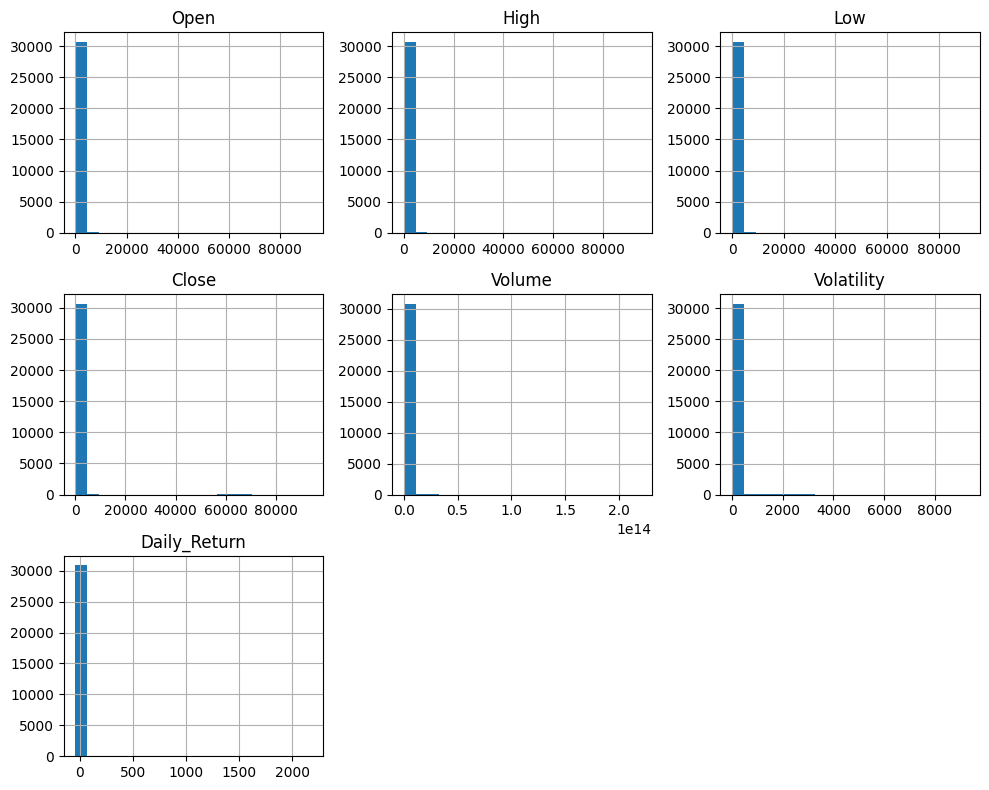

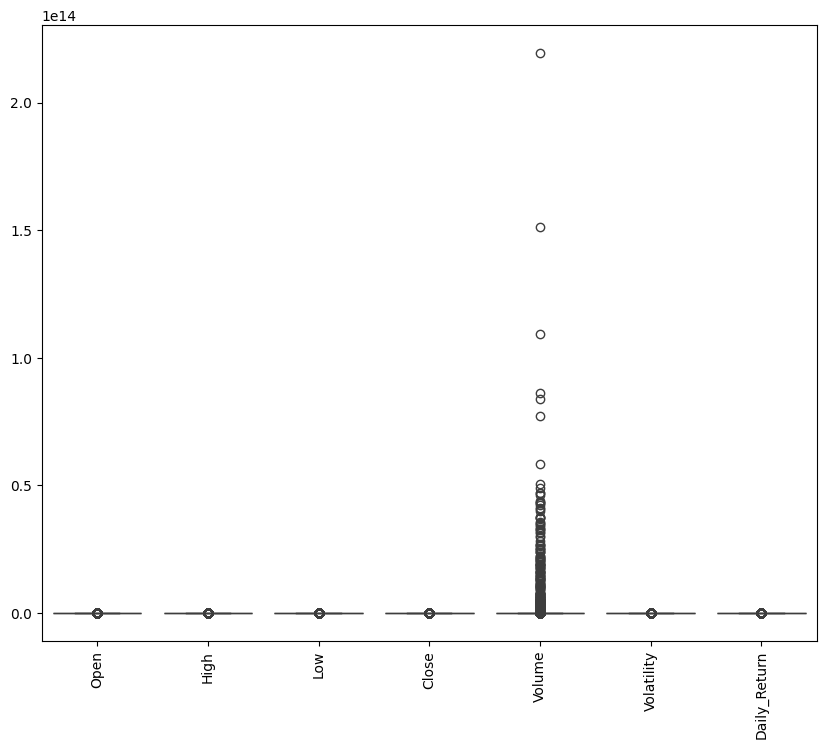

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
data_corr = data.drop(columns=['Date'])
# Histograma para cada variable numérica
data.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

# Gráficos de caja (boxplots) para detectar outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()


### Análisis de Tendencias Temporales

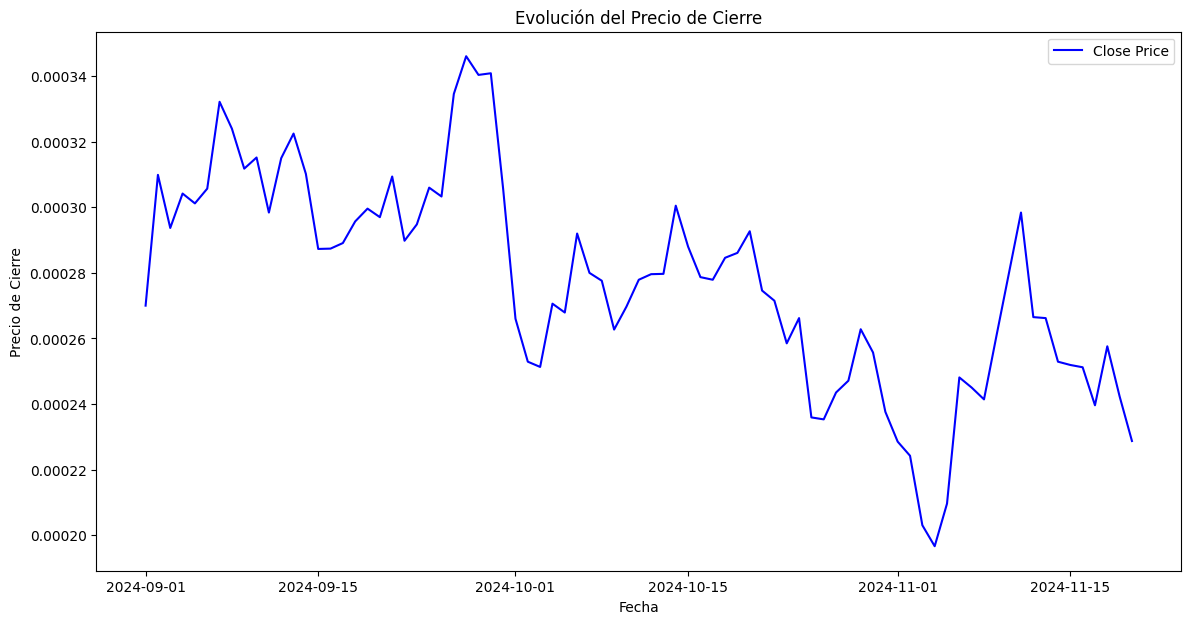

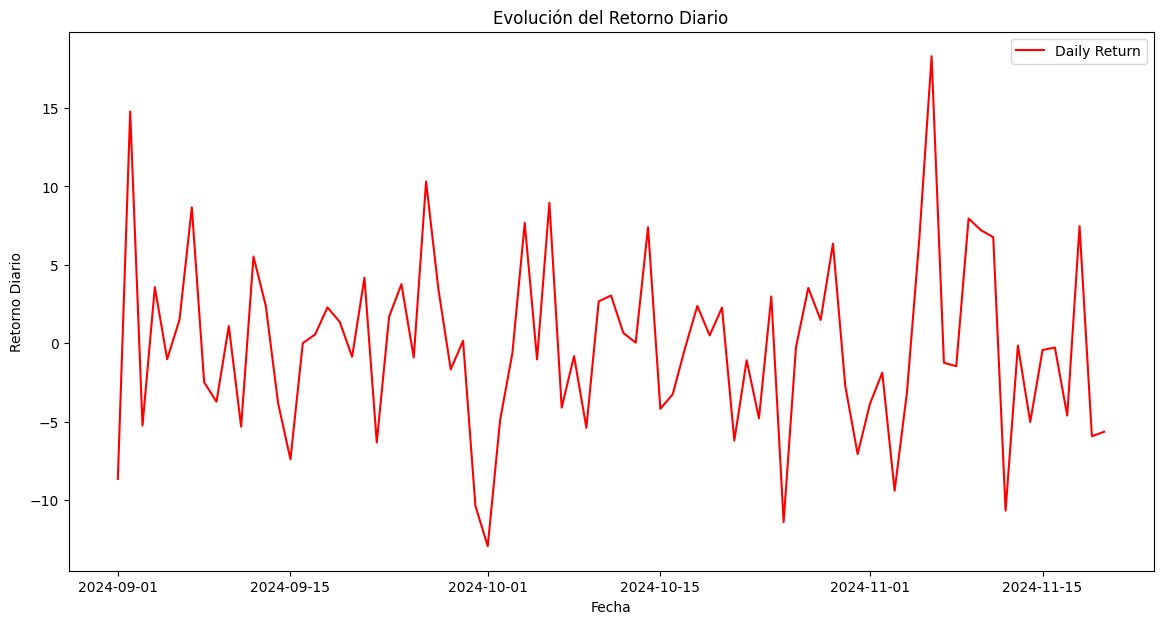

In [13]:
# Convertir la columna Date a formato datetime
data['Date'] = pd.to_datetime(df['Date'])

# Graficar algunas de las variables en función del tiempo (por ejemplo, 'Close', 'Daily_Return')
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Evolución del Precio de Cierre')
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Daily_Return'], label='Daily Return', color='red')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.title('Evolución del Retorno Diario')
plt.legend()
plt.show()


# PRUEBA DE SHAPIRO

In [14]:
#Prueba de normalidad
#Ho: la variable se aproxima a una distribución normal
#Ha: la variable no se aproxima a una distribución normal

In [15]:
ss.shapiro(data.Open)

c:\Users\magic\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 30903.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=np.float64(0.05316589403523453), pvalue=np.float64(2.0944674054119046e-147))

In [16]:
ss.shapiro(data.Close)

ShapiroResult(statistic=np.float64(0.05309444414279718), pvalue=np.float64(2.0832595564146983e-147))

In [17]:
ss.shapiro(data.High)

ShapiroResult(statistic=np.float64(0.05315309674556001), pvalue=np.float64(2.0924555042742748e-147))

In [18]:
ss.shapiro(data.Low)

ShapiroResult(statistic=np.float64(0.053084299071204155), pvalue=np.float64(2.0816731004100256e-147))

In [19]:
ss.shapiro(data.Volume)

ShapiroResult(statistic=np.float64(0.025402902150178375), pvalue=np.float64(2.6745489574403248e-148))

In [20]:
ss.shapiro(data.Volatility)

ShapiroResult(statistic=np.float64(0.045690004462406786), pvalue=np.float64(1.197036671311988e-147))

In [21]:
ss.shapiro(data.Daily_Return)

ShapiroResult(statistic=np.float64(0.08162665234739463), pvalue=np.float64(1.8281744379052441e-146))

In [22]:
# Aplicar prueba de Shapiro-Wilk
ss.shapiro(data.Daily_Return)

ShapiroResult(statistic=np.float64(0.08162665234739463), pvalue=np.float64(1.8281744379052441e-146))

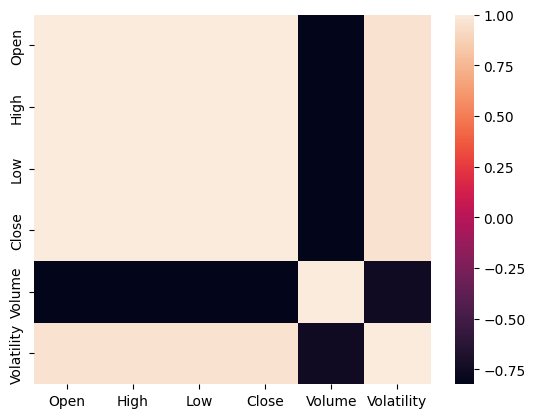

In [23]:
#Heatmap
sns.heatmap(data.loc[:,['Open', 'High', 'Low', 'Close', 'Volume', 'Volatility']].corr(method = "spearman"))
plt.show()

In [24]:
data.loc[:,['Open', 'High', 'Low', 'Close', 'Volume', 'Volatility']].corr(method = "spearman")

,Open,High,Low,Close,Volume,Volatility
Open,1.000000,0.999558,0.999870,0.999586,-0.821602,0.952681
High,0.999558,1.000000,0.999503,0.999835,-0.817204,0.956193
Low,0.999870,0.999503,1.000000,0.999719,-0.823108,0.950755
Close,0.999586,0.999835,0.999719,1.000000,-0.820080,0.953465
Volume,-0.821602,-0.817204,-0.823108,-0.820080,1.000000,-0.745786
Volatility,0.952681,0.956193,0.950755,0.953465,-0.745786,1.000000


### PREPARACION DE DATOS

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
# Dividir en características (X) y variable objetivo (y)
X = data.drop(columns=['Daily_Return', 'Date', 'name'])  # Elimina la columna 'Daily_Return' y 'Date' si es necesario
y = data['Daily_Return']


* Primer valor (Daily_Return = -8.66): El valor de este activo ha caído un 8.66% con respecto al día anterior. Esto indica una disminución significativa en el precio de ese día en comparación con el día anterior.

* Segundo valor (Daily_Return = 14.77): El activo ha subido un 14.77%. Esto muestra una gran apreciación en el precio de ese día en relación al día anterior.

* Tercer valor (Daily_Return = -5.26): El valor ha caído 5.26% con respecto al día anterior. Aunque no tan fuerte como el primer caso, sigue representando una baja en el precio del activo comparado con el día anterior.

In [27]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.45, random_state=42)

In [28]:
modelos = {}

In [29]:
# Entrenar y almacenar RandomForest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
modelos['RandomForest'] = rf

In [30]:
# Entrenar y almacenar GradientBoosting
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
modelos['GradientBoosting'] = gb

In [31]:
# Entrenar y almacenar AdaBoost
ab = AdaBoostRegressor(n_estimators=100, random_state=42)
ab.fit(X_train, y_train)
modelos['AdaBoost'] = ab

In [32]:
# Evaluar los modelos y almacenar los resultados
resultados = {}

for modelo_name, modelo in modelos.items():
    # Realizar predicciones
    y_pred = modelo.predict(X_test)
    
    # Calcular las métricas de evaluación
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Almacenar los resultados en un diccionario
    resultados[modelo_name] = {
        'MSE': mse,
        'R2': r2
    }

In [33]:
# Imprimir los resultados de los modelos
for modelo_name, metricas in resultados.items():
    print(f"Modelo: {modelo_name}")
    print(f"MSE: {metricas['MSE']:.4f}")
    print(f"R2: {metricas['R2']:.4f}")
    print("-" * 50)


Modelo: RandomForest
MSE: 521.2156
R2: 0.0561
--------------------------------------------------
Modelo: GradientBoosting
MSE: 458.1594
R2: 0.1703
--------------------------------------------------
Modelo: AdaBoost
MSE: 531.2184
R2: 0.0380
--------------------------------------------------


### MEJORANDO LOS HIPERPARAMETROS

In [34]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para GridSearch
param_grid = {
    'RandomForest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 10],
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
    }
}

In [35]:
# Crear los modelos base
modelos_base = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
}

In [36]:
# Almacenar los mejores modelos y sus hiperparámetros óptimos
mejores_modelos = {}
mejores_parametros = {}

In [37]:

for modelo_name, modelo in modelos_base.items():
    print(f"Optimización de hiperparámetros para: {modelo_name}")
    
    # Configurar el GridSearchCV
    grid_search = GridSearchCV(
        estimator=modelo,
        param_grid=param_grid[modelo_name],
        scoring='r2',  # Métrica de evaluación, cambiar por 'neg_mean_squared_error' para MSE
        cv=3,  # Validación cruzada con 3 particiones
        verbose=1,
        n_jobs=-1
    )
    
    # Ajustar el modelo con los datos de entrenamiento
    grid_search.fit(X_train, y_train)
    
    # Almacenar el mejor modelo y los parámetros
    mejores_modelos[modelo_name] = grid_search.best_estimator_
    mejores_parametros[modelo_name] = grid_search.best_params_
    print(f"Mejores parámetros para {modelo_name}: {grid_search.best_params_}")
    print("-" * 50)

# Evaluar el desempeño de los modelos optimizados
for modelo_name, modelo in mejores_modelos.items():
    y_pred = modelo.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Modelo optimizado: {modelo_name}")
    print(f"MSE: {mse:.4f}, R²: {r2:.4f}")
    print("-" * 50)


Optimización de hiperparámetros para: RandomForest
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Mejores parámetros para RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
--------------------------------------------------
Optimización de hiperparámetros para: GradientBoosting
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Mejores parámetros para GradientBoosting: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}
--------------------------------------------------
Optimización de hiperparámetros para: AdaBoost
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Mejores parámetros para AdaBoost: {'learning_rate': 0.1, 'n_estimators': 50}
--------------------------------------------------
Modelo optimizado: RandomForest
MSE: 522.7230, R²: 0.0534
--------------------------------------------------
Modelo optimizado: GradientBoosting
MSE: 576.2168, R²: -0.0435
--------------------------------------------------
Modelo 

## GUARDAR LOS MODELOS

In [38]:
import joblib

# Guardar los modelos optimizados en archivos separados
for modelo_name, modelo in mejores_modelos.items():
    filename = f"{modelo_name.lower()}_optimized_model.pkl"
    joblib.dump(modelo, filename)
    print(f"Modelo {modelo_name} guardado en {filename}")


Modelo RandomForest guardado en randomforest_optimized_model.pkl
Modelo GradientBoosting guardado en gradientboosting_optimized_model.pkl
Modelo AdaBoost guardado en adaboost_optimized_model.pkl


In [40]:
print(X.columns)

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Volatility'], dtype='object')
